In [1]:
import qrcode
from qrcode.image.styledpil import StyledPilImage
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image 

In [2]:
path_to_report = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/data/Shipping details 2.3.23.xlsx'
img_folder_path = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/output_qr_codes/'
pdf_path = "/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/ouput_pdf/qr_codes.pdf"
logo_image_path= '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/data/BD_logo_circle_transparent.png'
column_name_for_unique_ID = 'Name on Frame' # 'Unnamed: 2' # 'Name on Frame'
column_name_for_customer_name = 'Customer Name'


In [3]:
global size_dymo_paper_width, resolution_dymo_w
size_dymo_paper_width = 6.2 #cm
resolution_dymo_h = 300 #dpi
resolution_dymo_w = 600 #dpi
url_app_0 = 'https://qr.bd-ops.com/'

In [4]:
df = pd.read_excel(path_to_report, header = 1)
df.head()

PO Number     Customer Name Name on Frame      Frame Type Size  \
0   PO 1874   Maria Alimperti       BD16883        UK Round    S   
1   PO 1879      Andrew Scott       BD15684  UK Rectangular    L   
2   PO 1879     Riyan Rughani       BD16753        UK Round    S   
3   PO 1895     Oscar Hedlund       BD13269  UK Rectangular    L   
4   PO 1895  Maheshi de Silva       BD15681  UK Rectangular    L   

              Color  Type Magnification   WD Remarks  
0        Royal Navy  Ergo            x4  450     NaN  
1        Royal Navy  Ergo            x4  480     NaN  
2          Graphite  Ergo            x4  510     NaN  
3          Graphite  Ergo          x7.5  480     NaN  
4  Westminster Gold  Ergo          x7.5  520     NaN

In [5]:
def generate_qr_code(qr_code_message, qr_code_title_top, qr_code_title_bottom, img_folder_path, logo = False):
    qr = qrcode.QRCode(
        version = 2, # from 1 [27x27] to 40 [177x177]
        box_size=30,
        border=1)
    qr.add_data(qr_code_message)
    qr.make()
    plt.clf()
    if logo == True:
        img = qr.make_image(image_factory=StyledPilImage, embeded_image_path= logo_image_path)
    else:
        img = qr.make_image()
    cm = 1/2.54  # centimeters in inches
    plt.figure(figsize=(size_dymo_paper_width*cm, size_dymo_paper_width*cm), dpi=resolution_dymo_w)
    im = img.convert('LA')
    im = plt.imshow(im, cmap='gray')
    xmin, xmax, ymin, ymax = plt.axis()
    im = plt.title(qr_code_title_top,fontsize=30)
    im = plt.text(s = qr_code_title_bottom, fontsize=15, x = (xmin + xmax)/2, y = ymin - 0.15*(ymax -ymin), horizontalalignment = 'center')
    # 
    im = plt.text(s = '.', fontsize=1, x = xmin, y = ymin, color = 'w')
    im = plt.text(s = '.', fontsize=1, x = xmax, y = ymax, color = 'w')
    im = plt.text(s = '.', fontsize=1, x = xmin, y = ymin - 0.3*(ymax -ymin), color = 'w')
    im = plt.text(s = '.', fontsize=1, x = xmax, y = ymax + 0.3*(ymax -ymin), color = 'w')
    im = plt.text(s = '.', fontsize=1, x = xmin, y = ymax)
    im = plt.text(s = '.', fontsize=1, x = xmax, y = ymin)
    im = plt.text(s = '.', fontsize=1, x = xmin  - 0.3*(xmax -xmin), y = ymax)
    im = plt.text(s = '.', fontsize=1, x = xmax  + 0.3*(xmax -xmin), y = ymin)
    im = plt.axis('off')
    # 
    filename = qr_code_title_top + '_QR_code.jpg'
    # plt.tight_layout(pad=3, h_pad = 3)
    plt.rcParams["figure.figsize"] = (size_dymo_paper_width*cm, size_dymo_paper_width*cm)
    plt.savefig(img_folder_path + filename, transparent  = True, dpi = resolution_dymo_w, bbox_inches = 'tight') #   
    
    return im, filename
    

In [6]:
TEST = True

zsh:1: no matches found: /Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/output_test/*
zsh:1: no matches found: /Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/ouput_pdf/qr_codes.pdf*
56


<Figure size 640x480 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

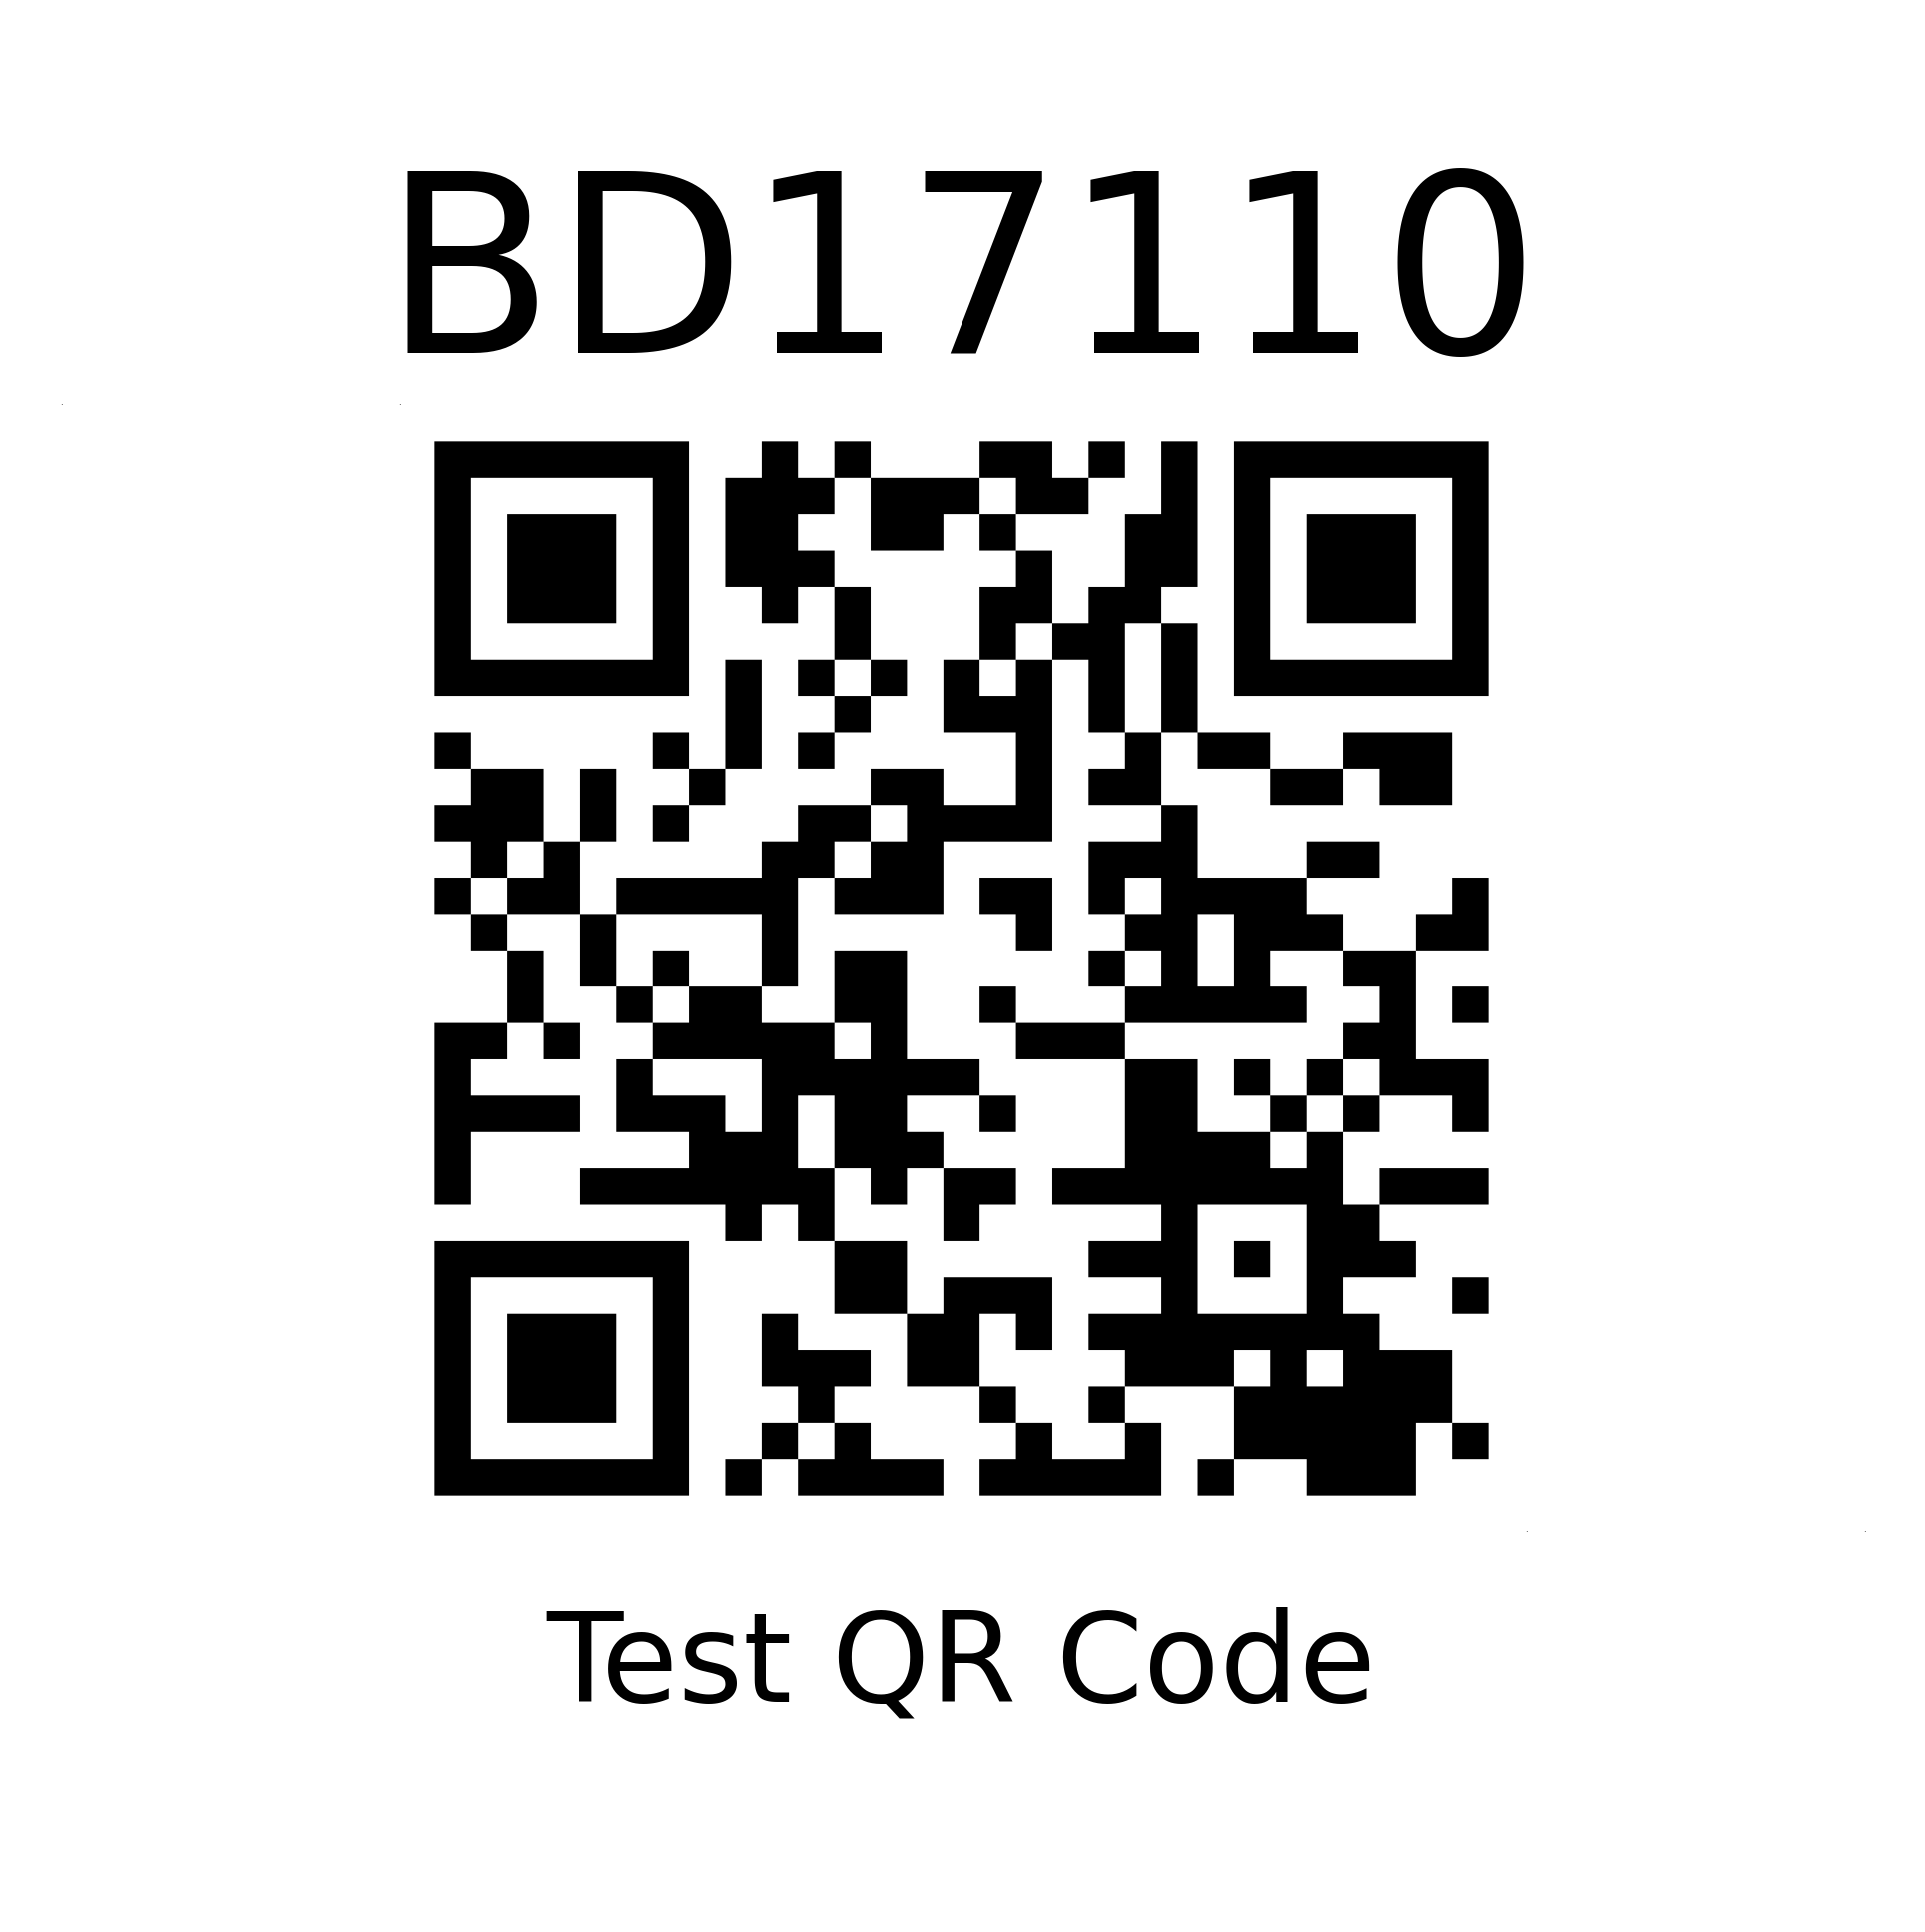

In [7]:
if TEST == True:
    img_folder_path_test = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/output_test/'
    !rm -r {img_folder_path_test+'*'}
    !rm -r {pdf_path+'*'}
    from random import randrange
    range_df = len(df[column_name_for_unique_ID])
    i = randrange(range_df)
    print(i)
    unique_id_temp = str(df[column_name_for_unique_ID].iloc[i])
    customer_name_temp = str(df[column_name_for_customer_name].iloc[i])
    qr_code_message = url_app_0 + '/' + str(unique_id_temp)
    qr_code_title_top = unique_id_temp
    qr_code_title_bottom = customer_name_temp
    # 
    im, filename = generate_qr_code(qr_code_message, qr_code_title_top, qr_code_title_bottom, img_folder_path_test, logo = False)
    #
    # Test CRM Order BD17110
    unique_id_temp = 'BD17110'
    qr_code_message = url_app_0 + '/' + str(unique_id_temp)
    qr_code_title_top = unique_id_temp
    qr_code_title_bottom = 'Test QR Code'
    #
    im, filename = generate_qr_code(qr_code_message, qr_code_title_top, qr_code_title_bottom, img_folder_path_test, logo = False)
    #

In [8]:
# stop!

<Figure size 244.094x244.094 with 0 Axes>

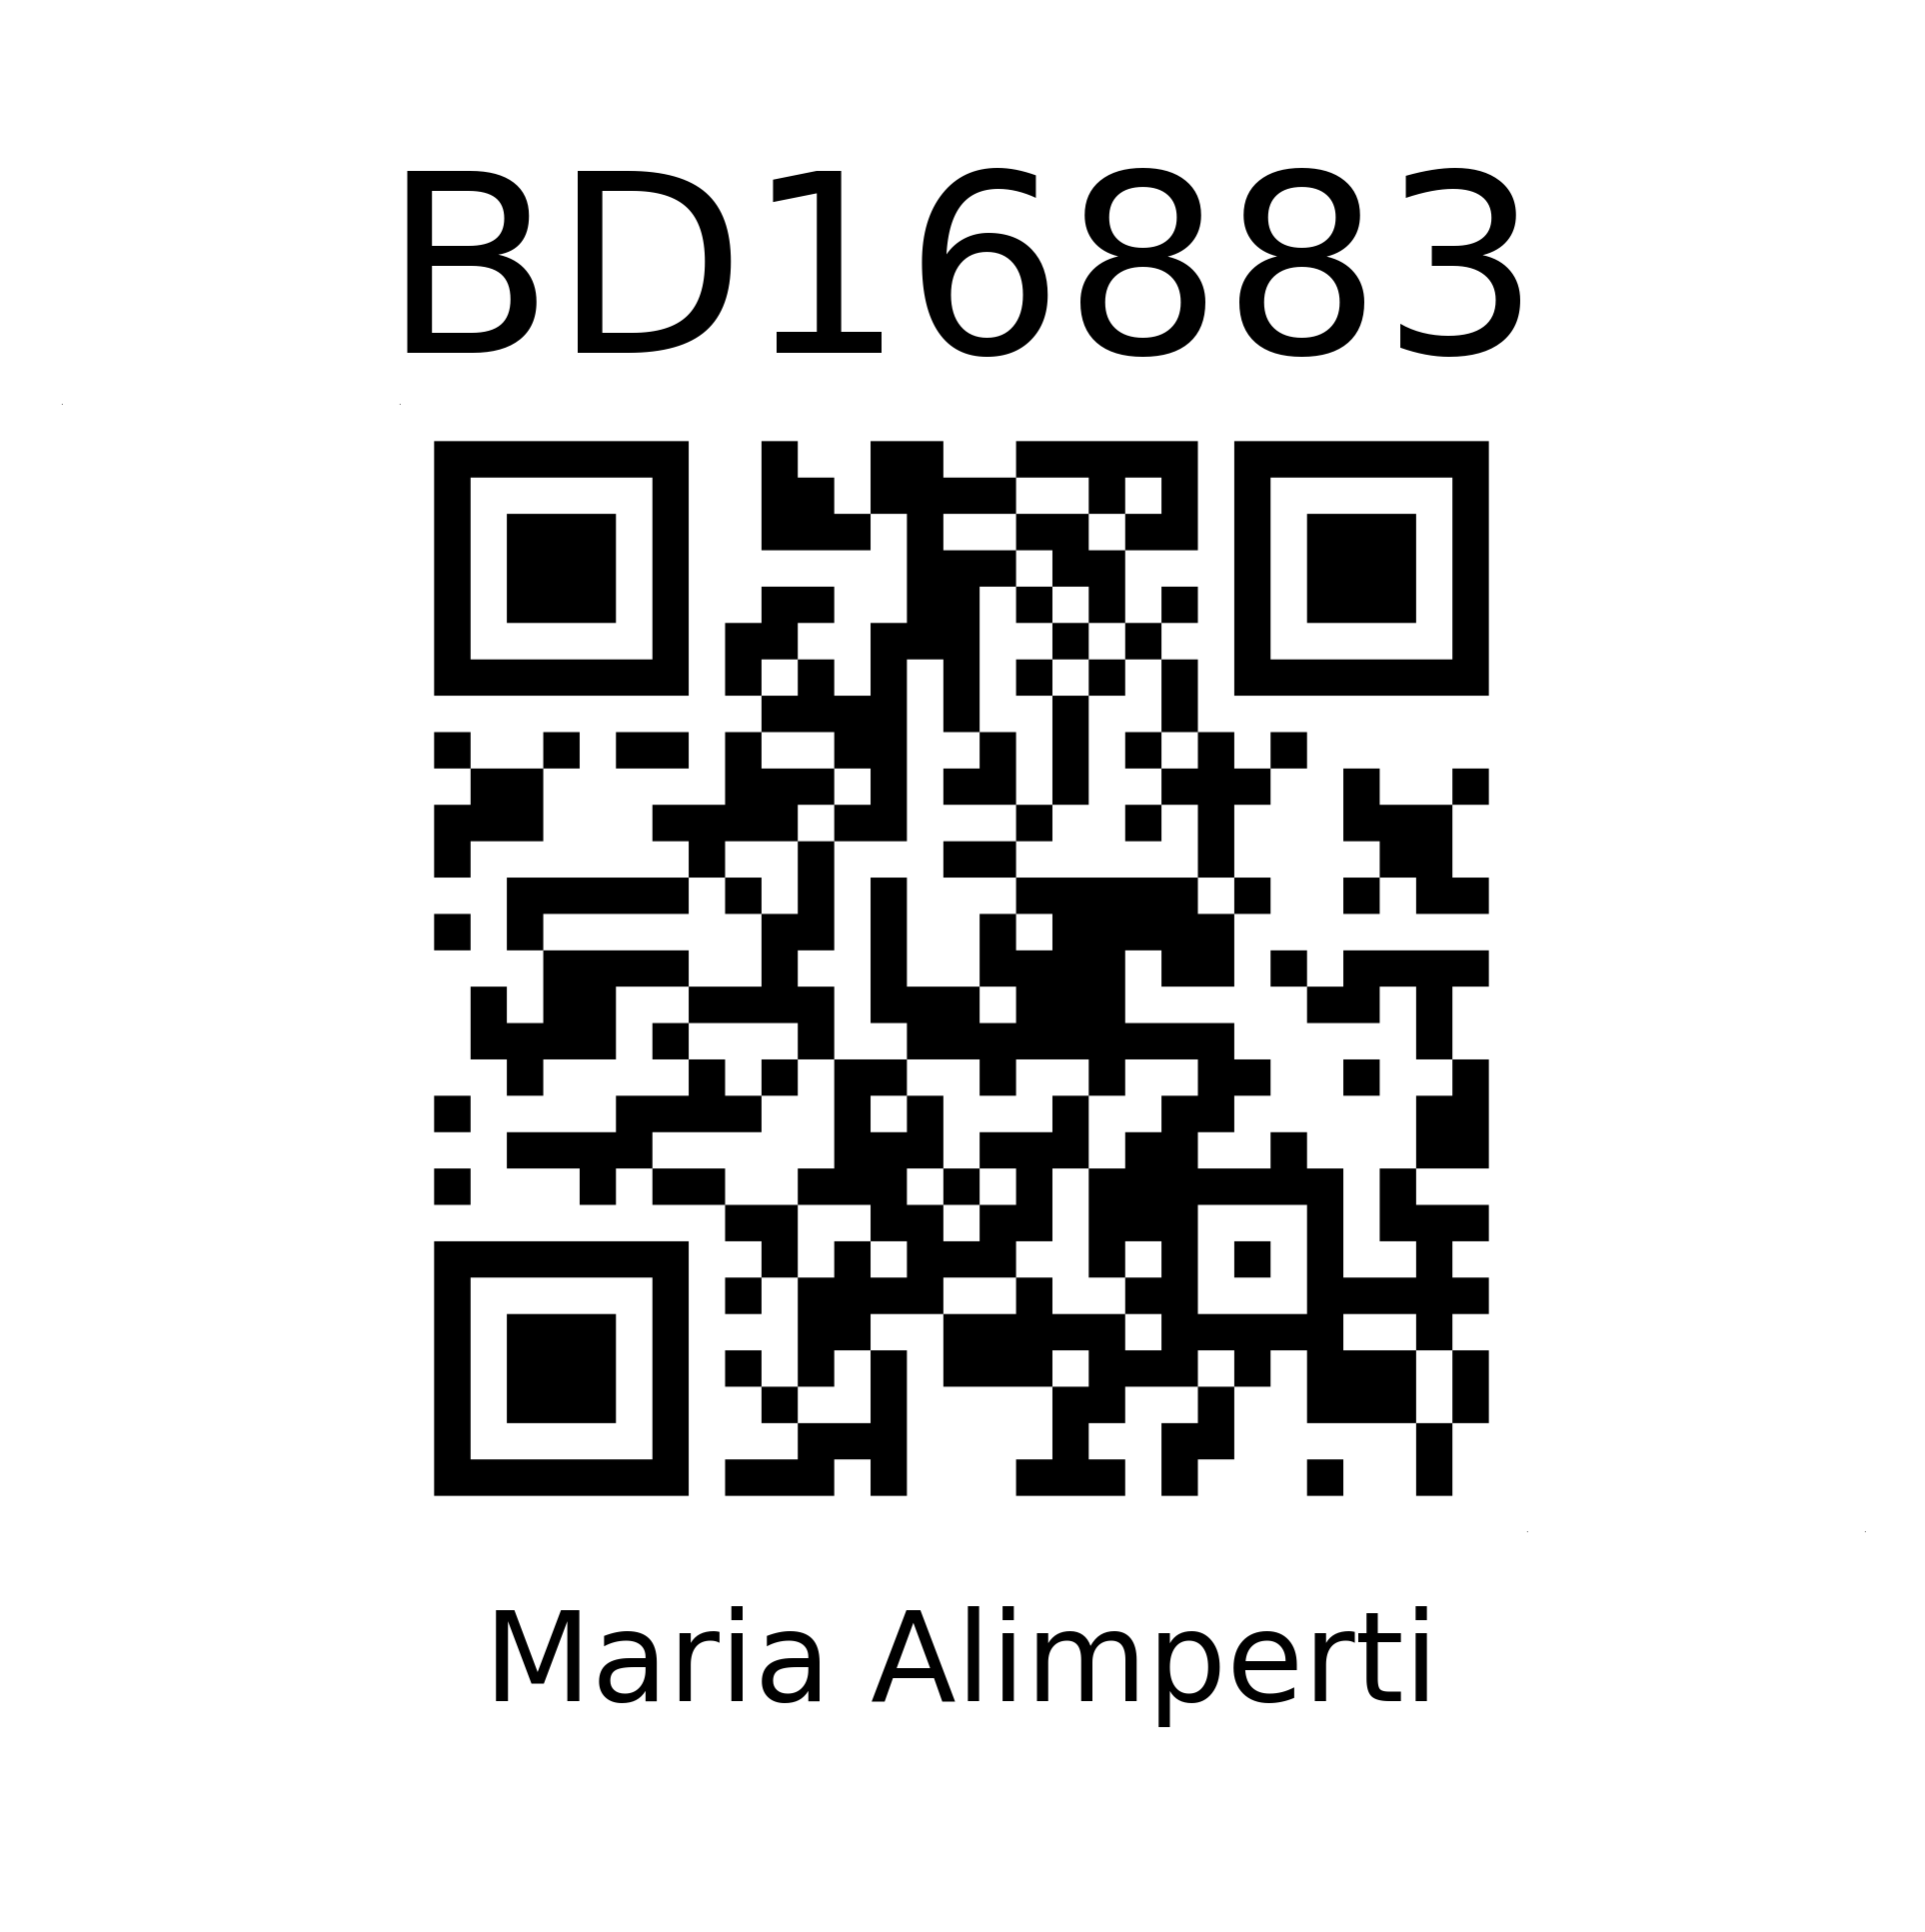

<Figure size 244.094x244.094 with 0 Axes>

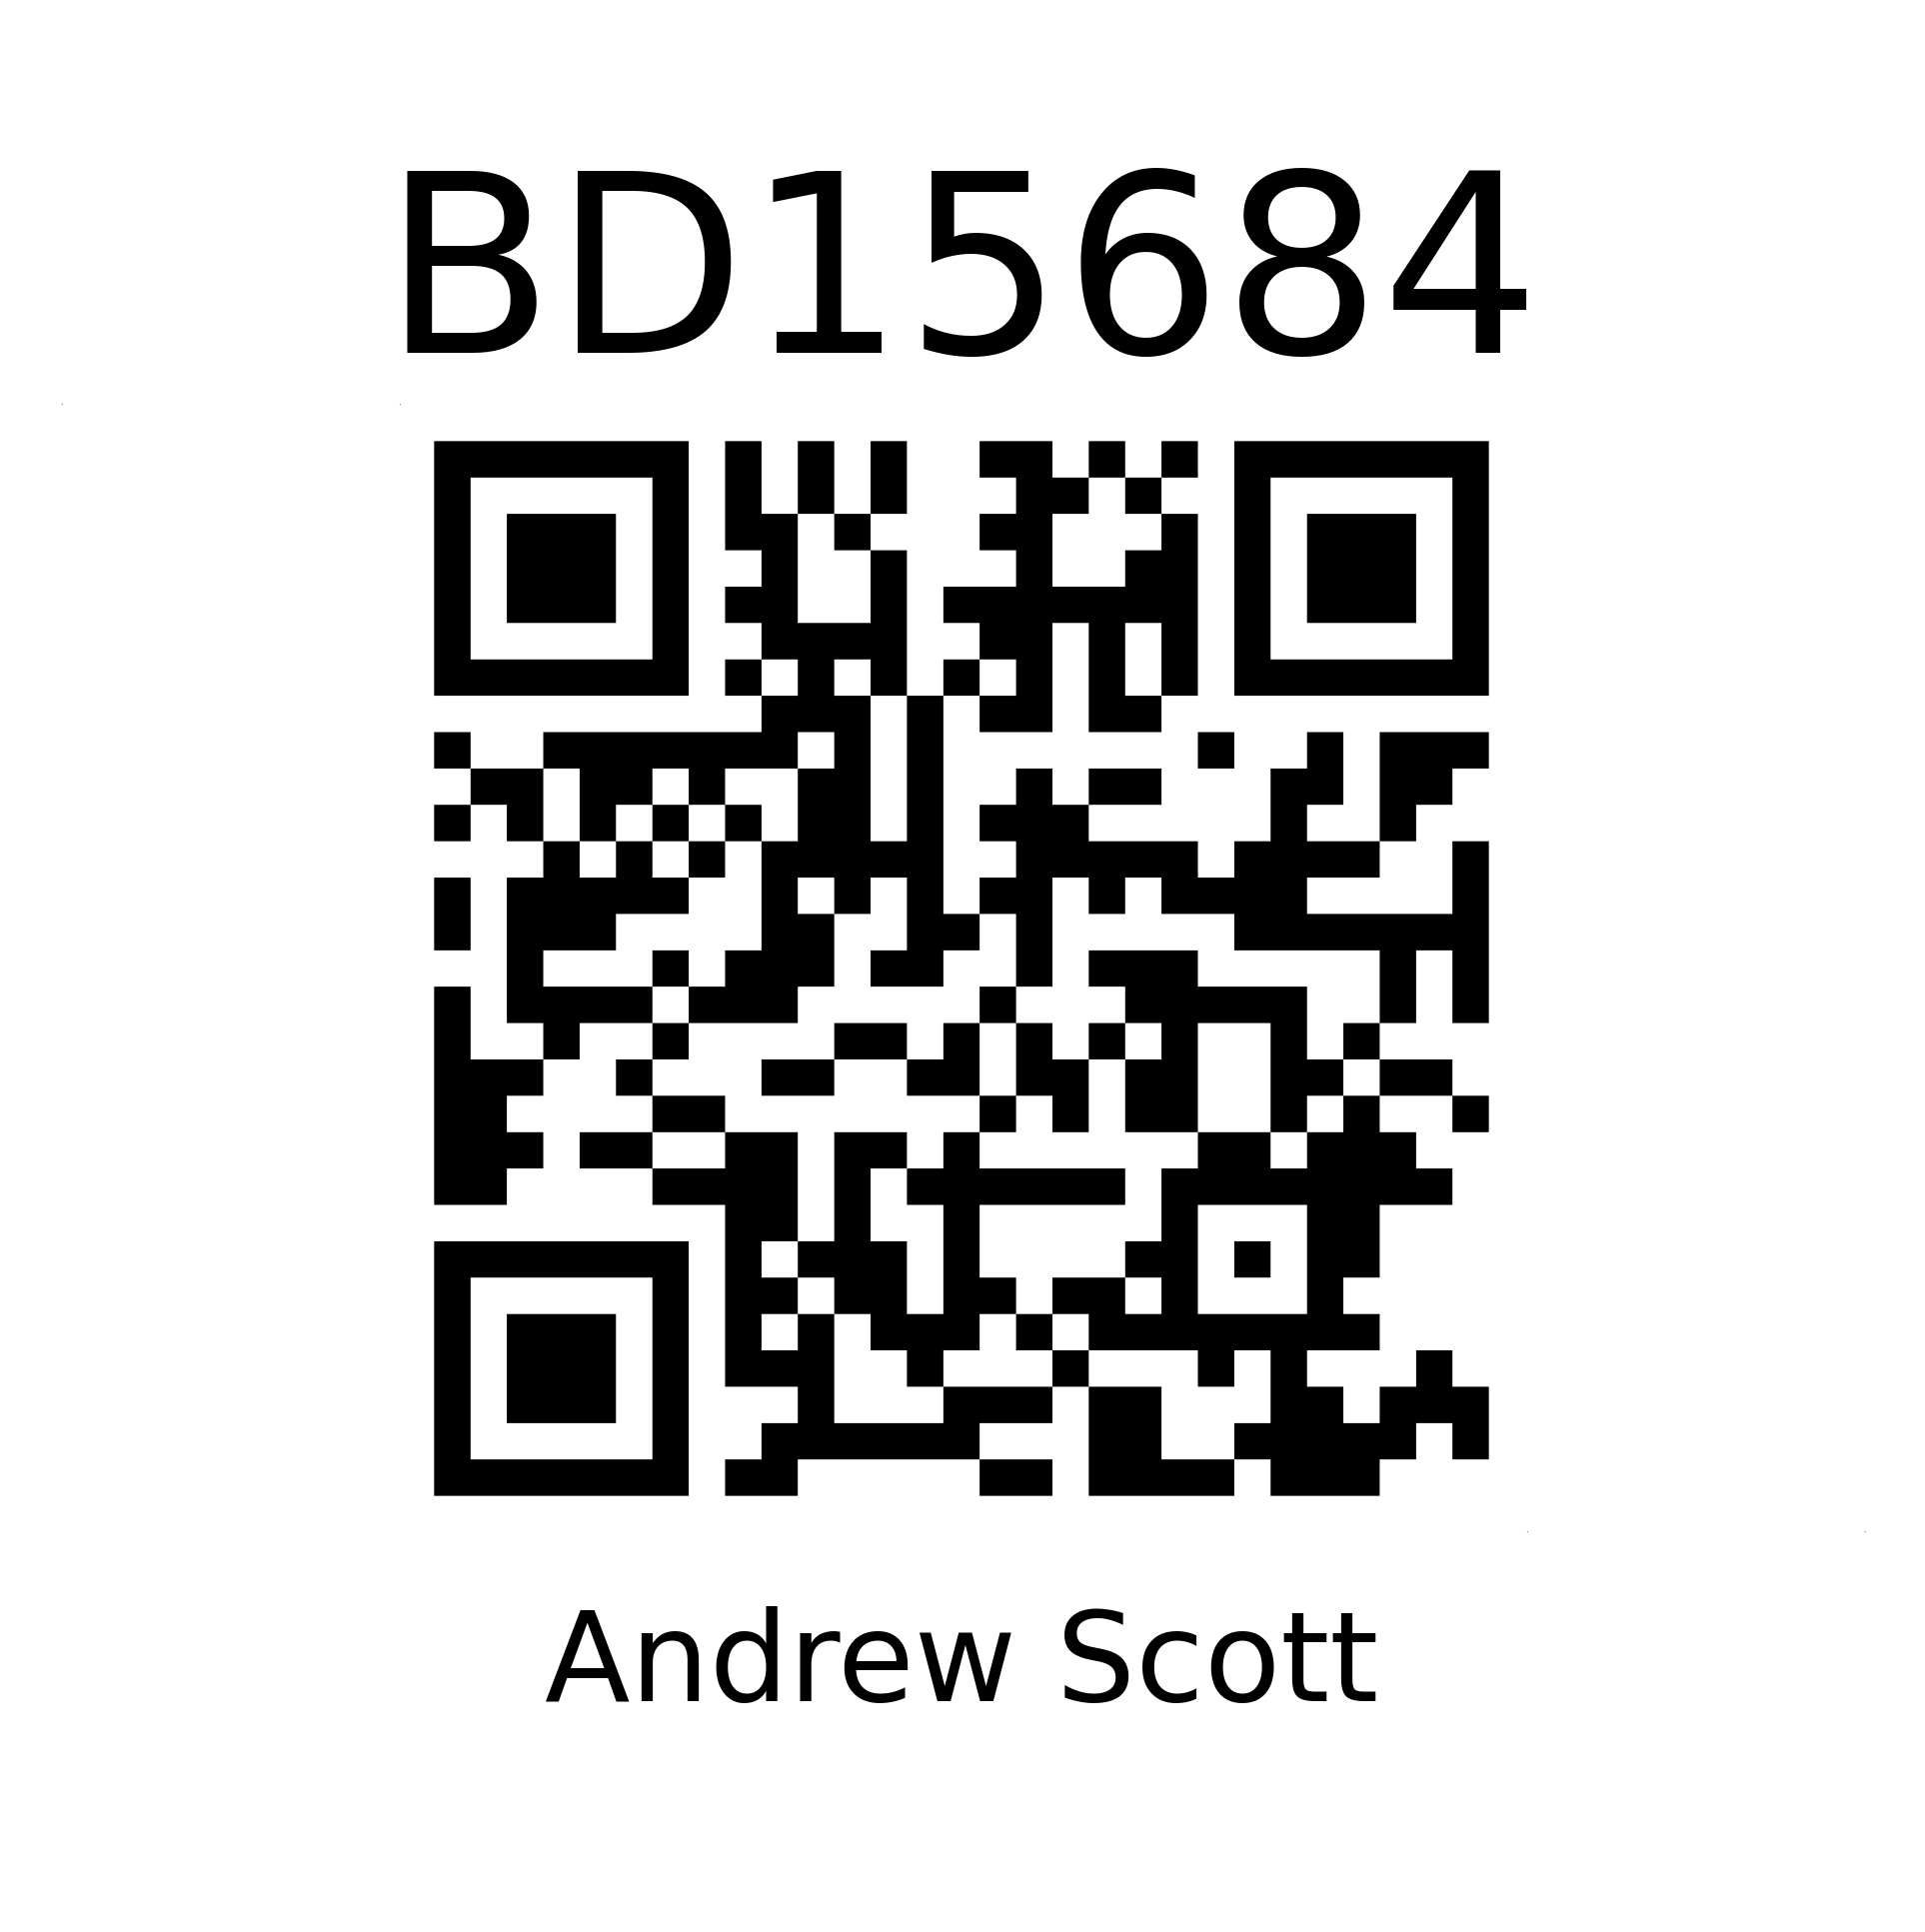

<Figure size 244.094x244.094 with 0 Axes>

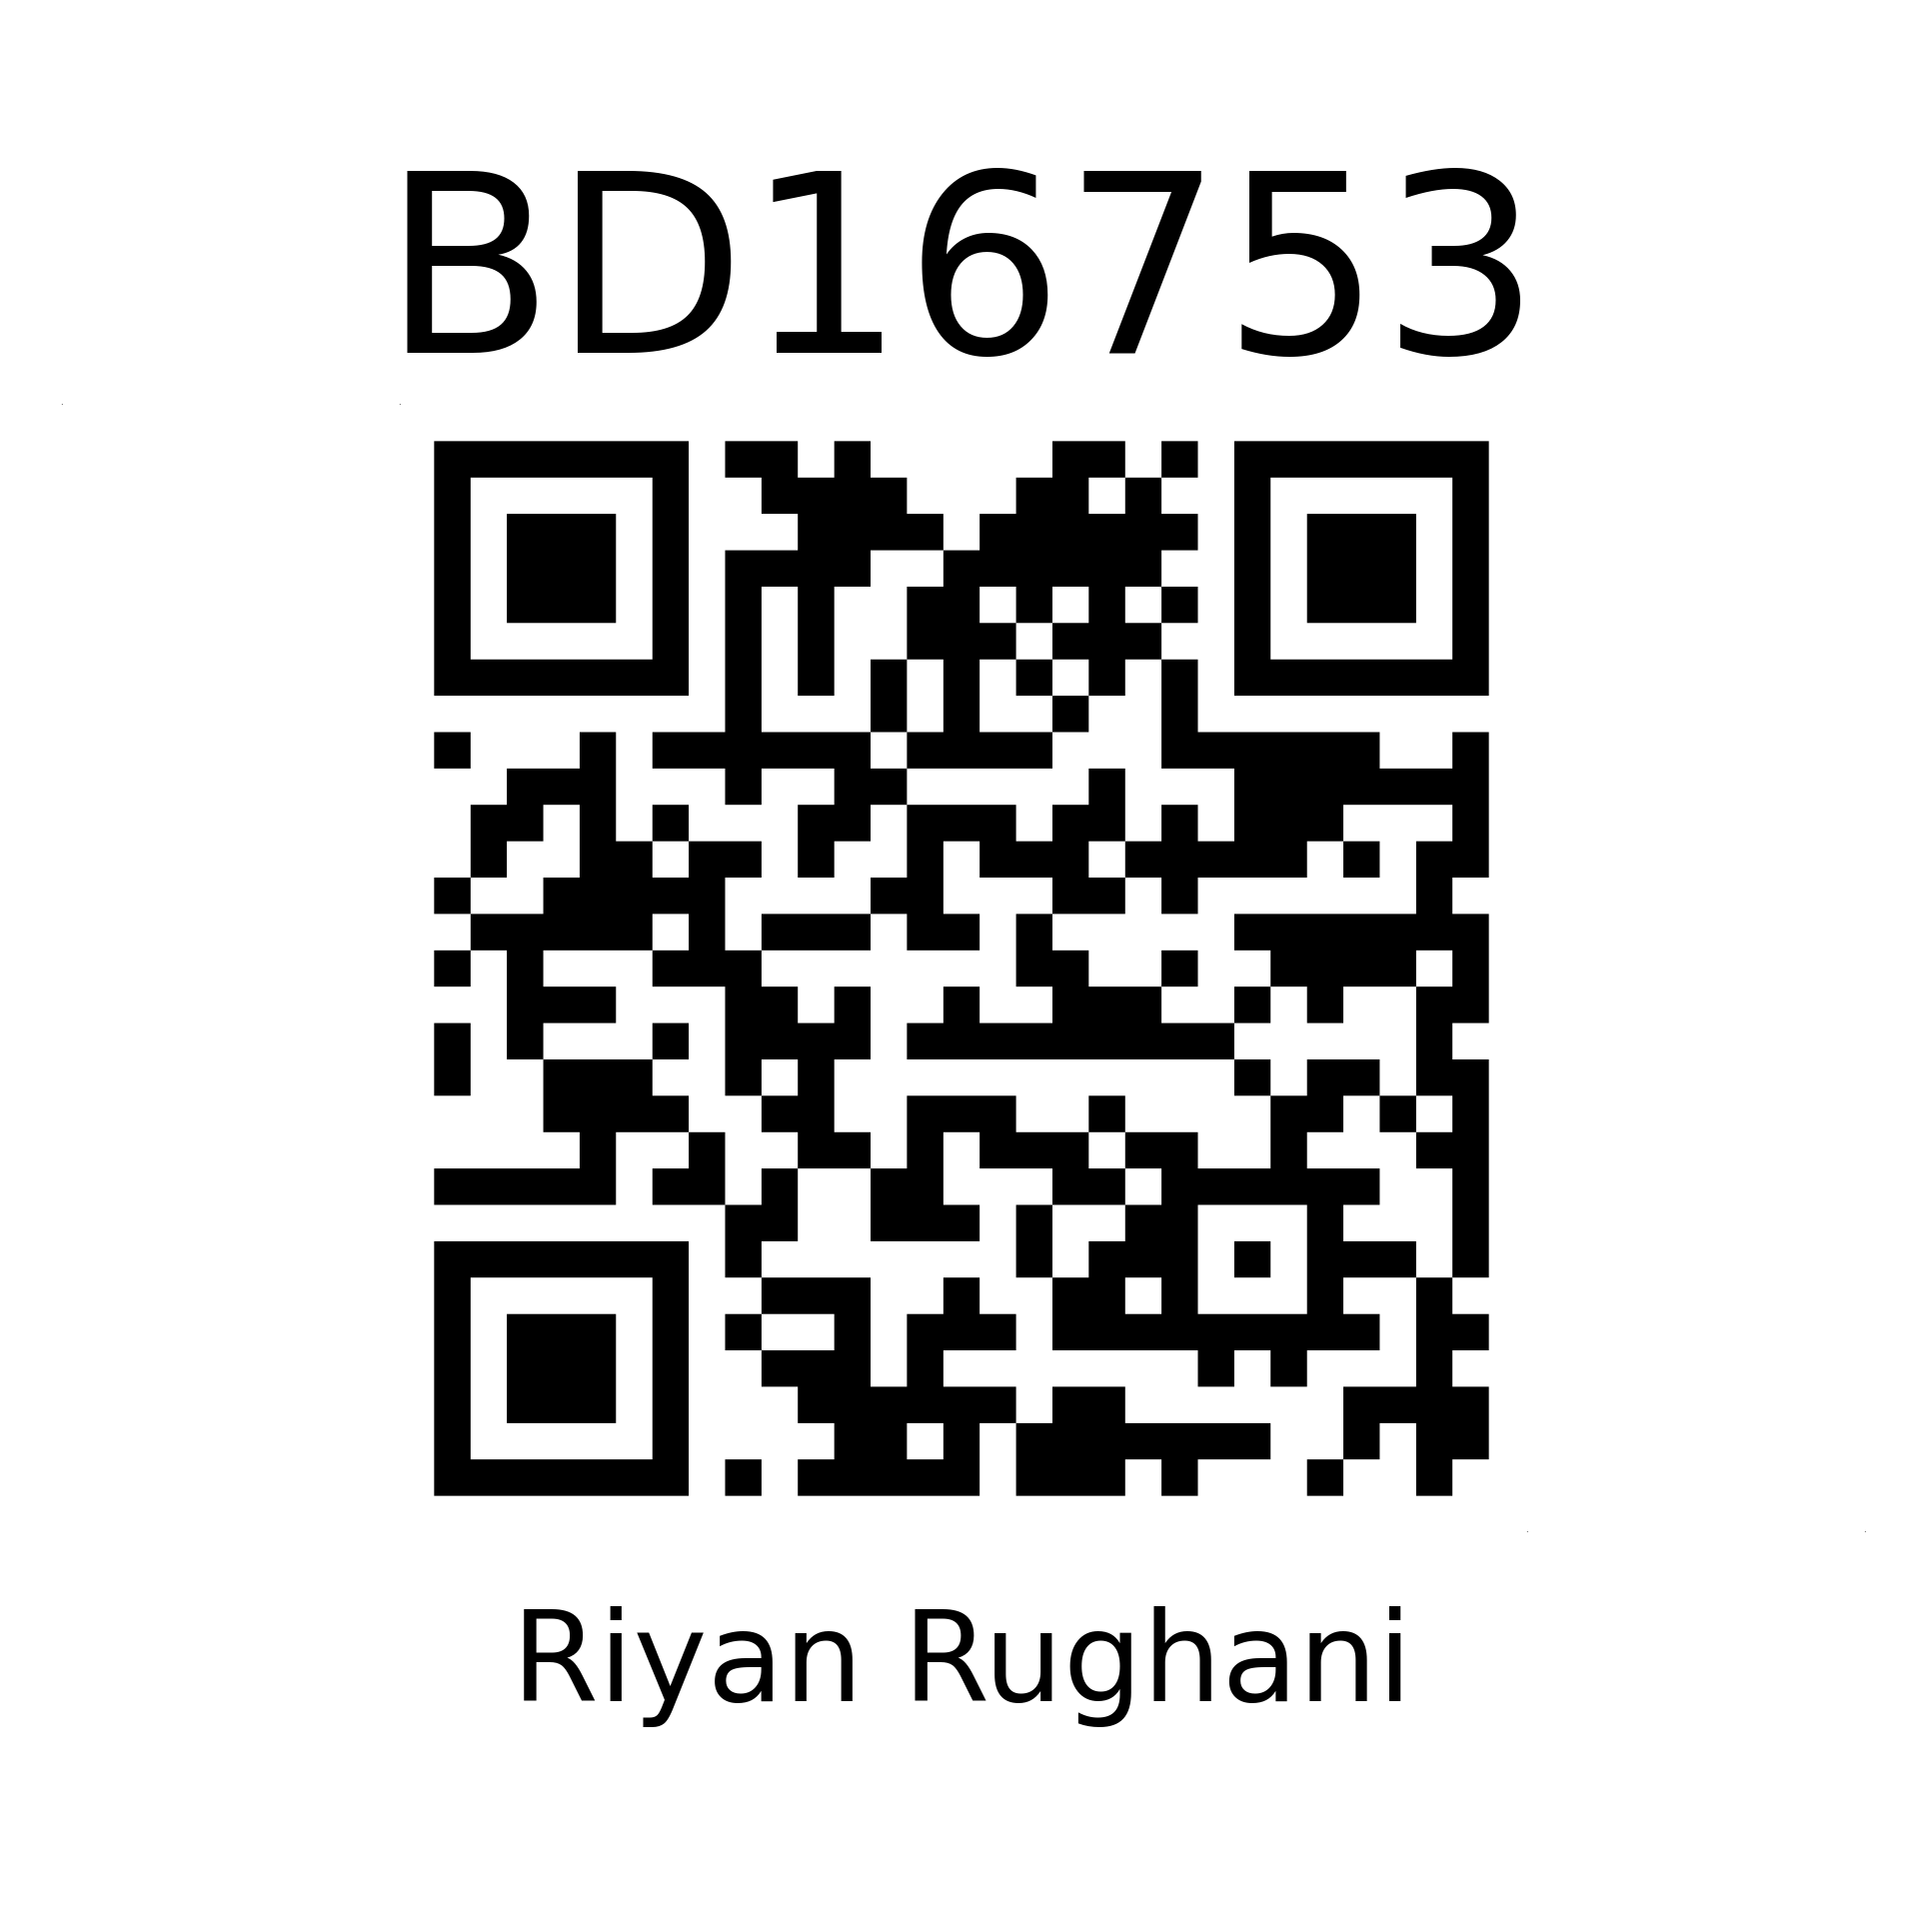

<Figure size 244.094x244.094 with 0 Axes>

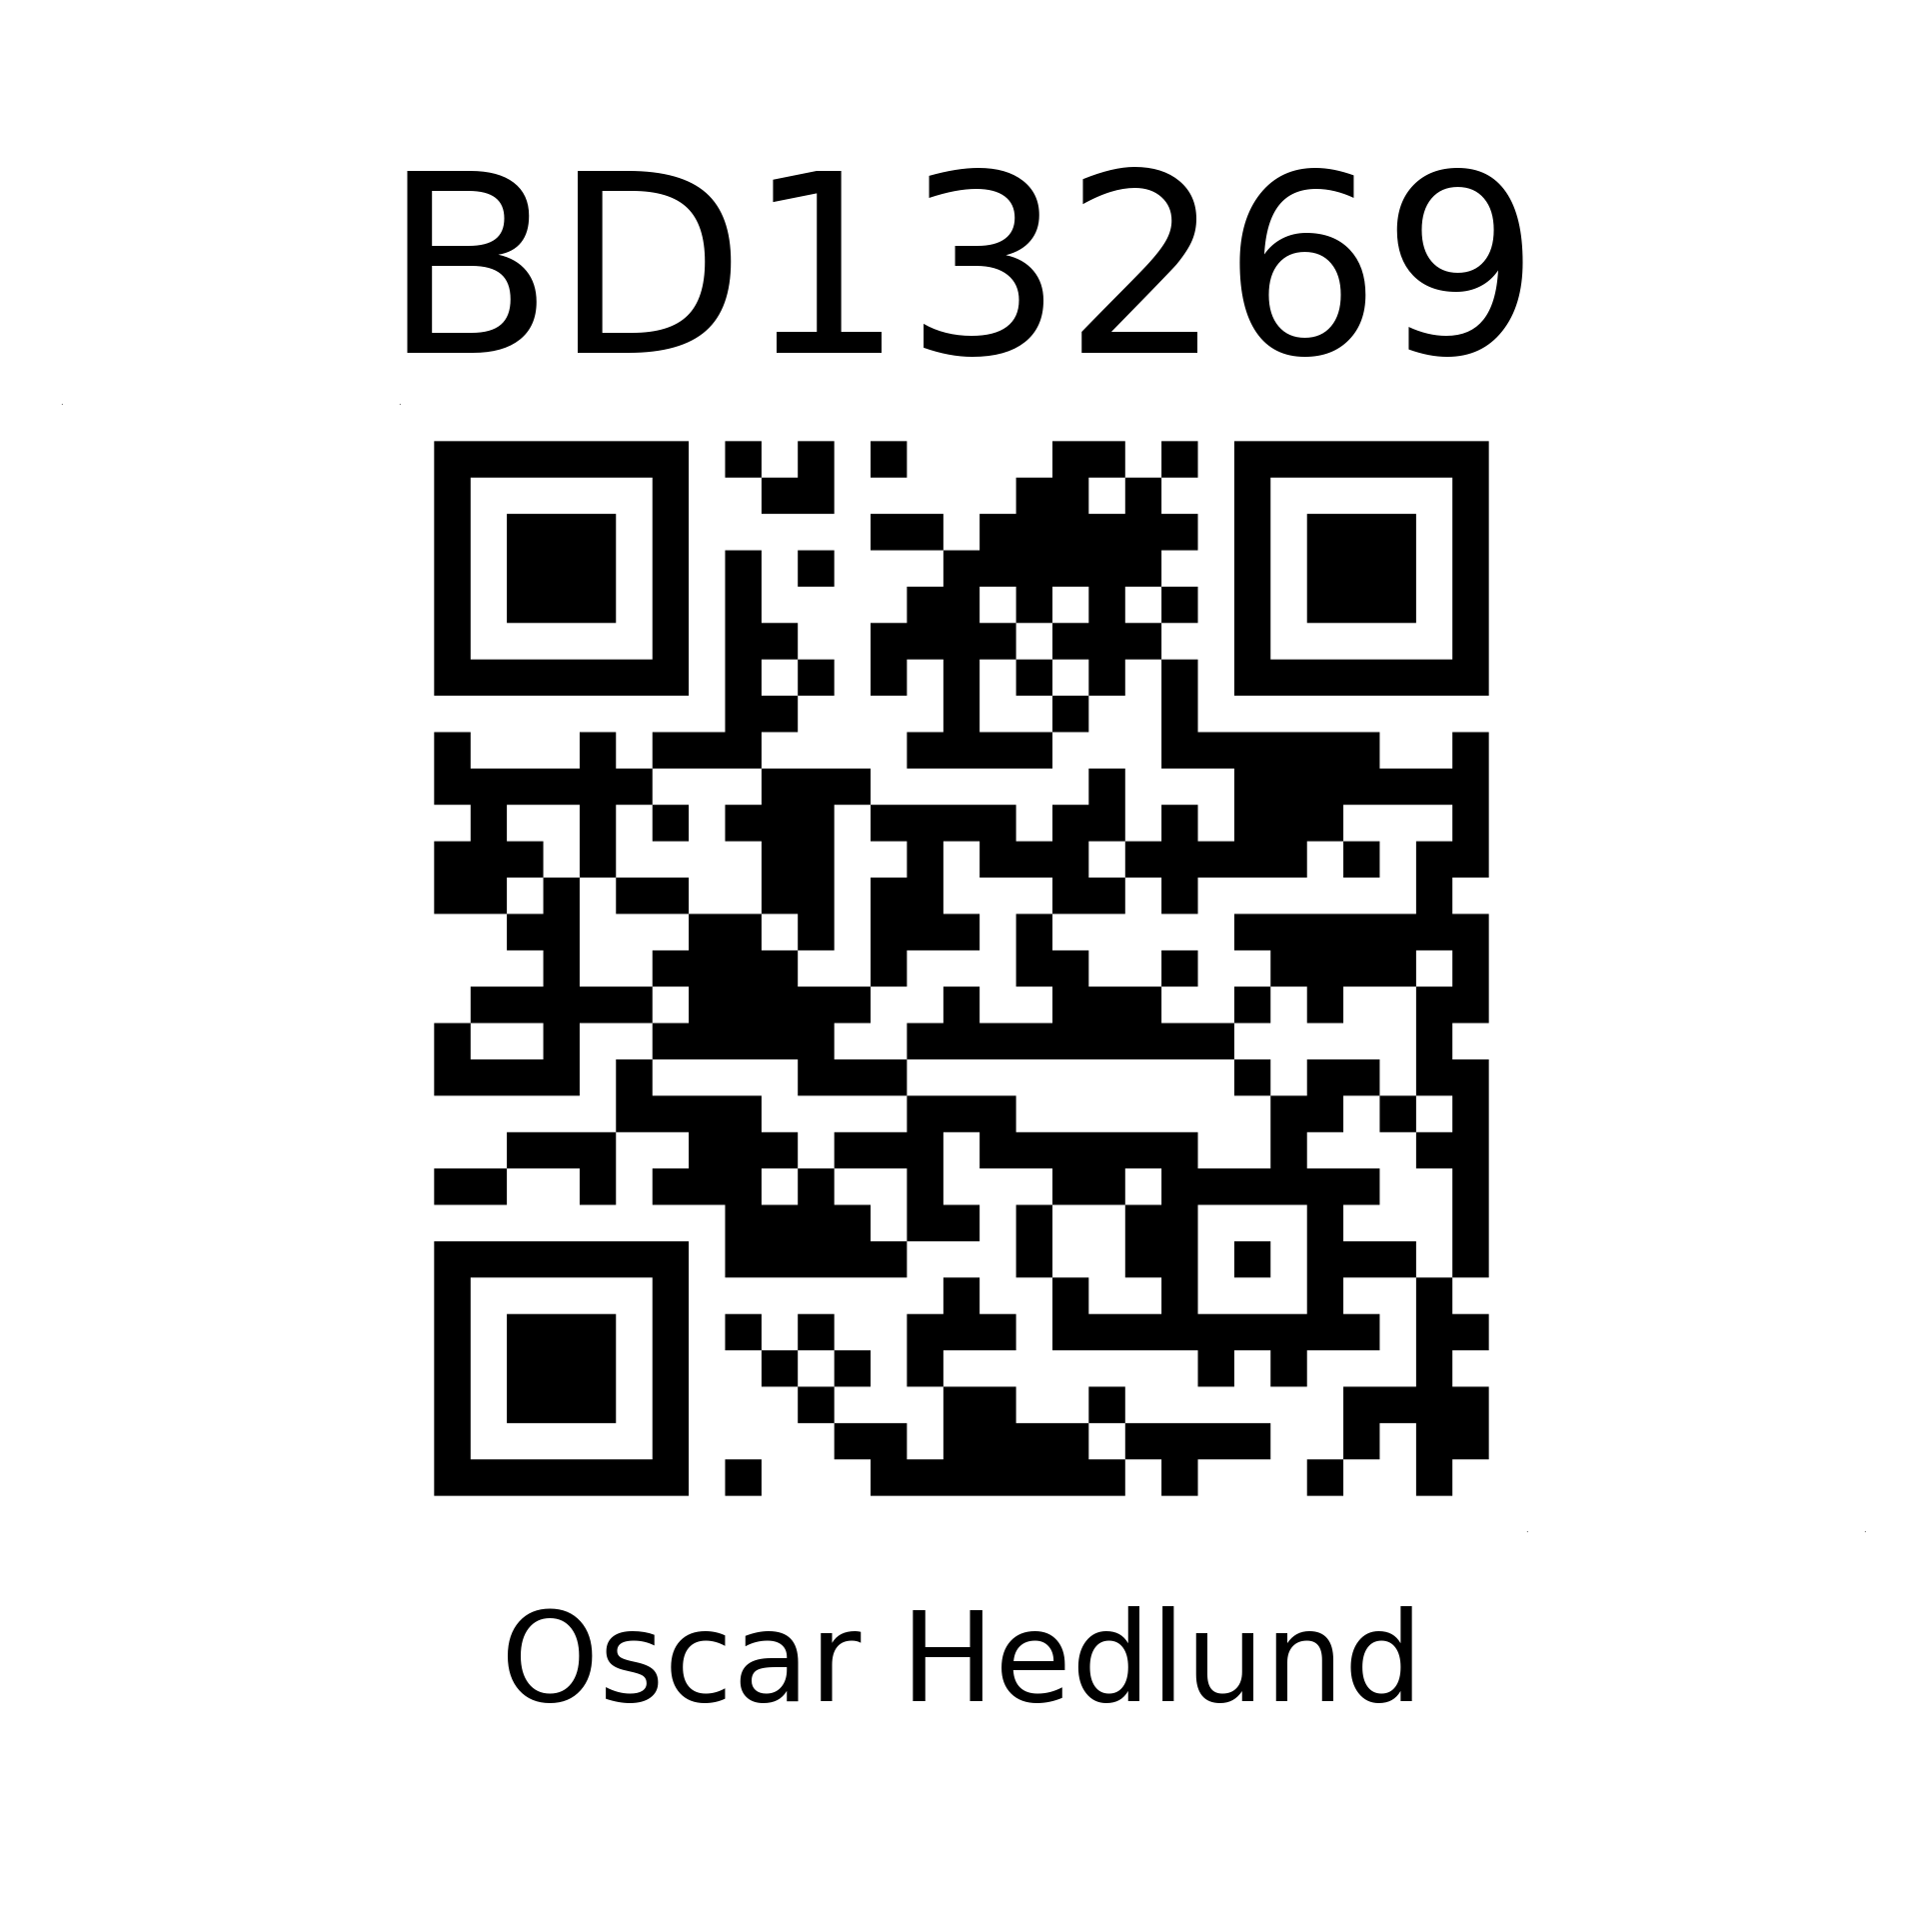

<Figure size 244.094x244.094 with 0 Axes>

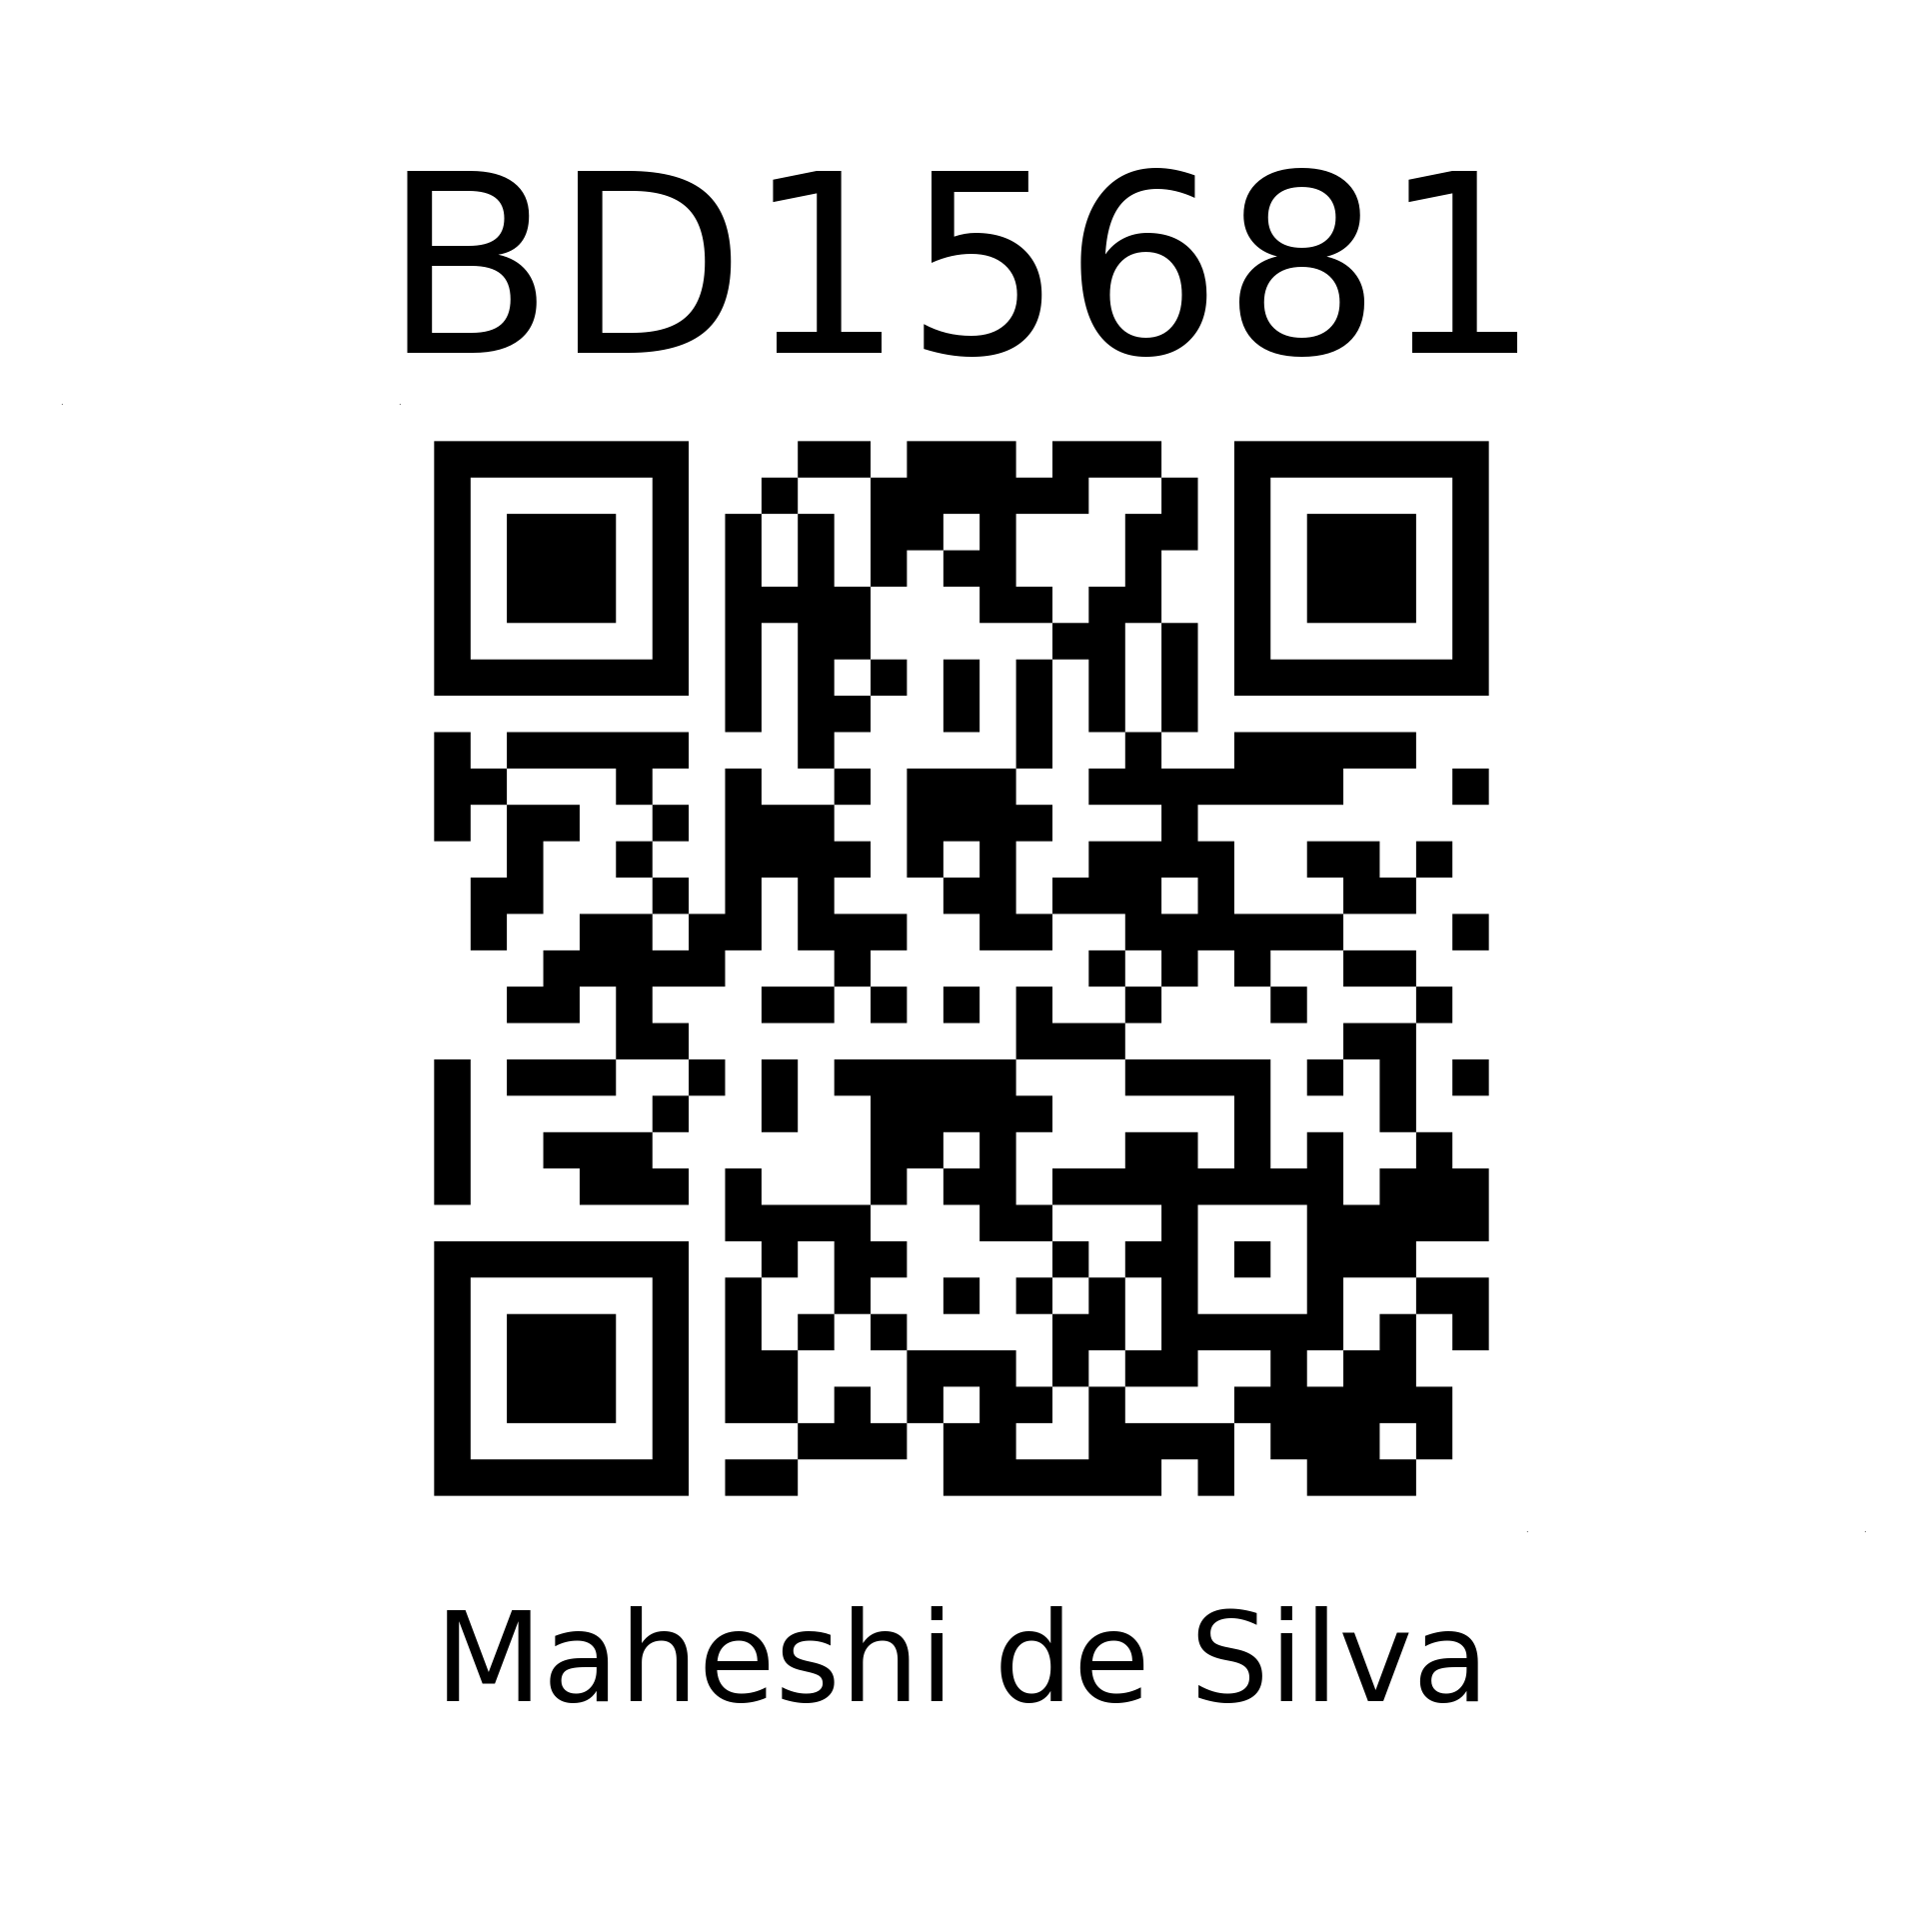

<Figure size 244.094x244.094 with 0 Axes>

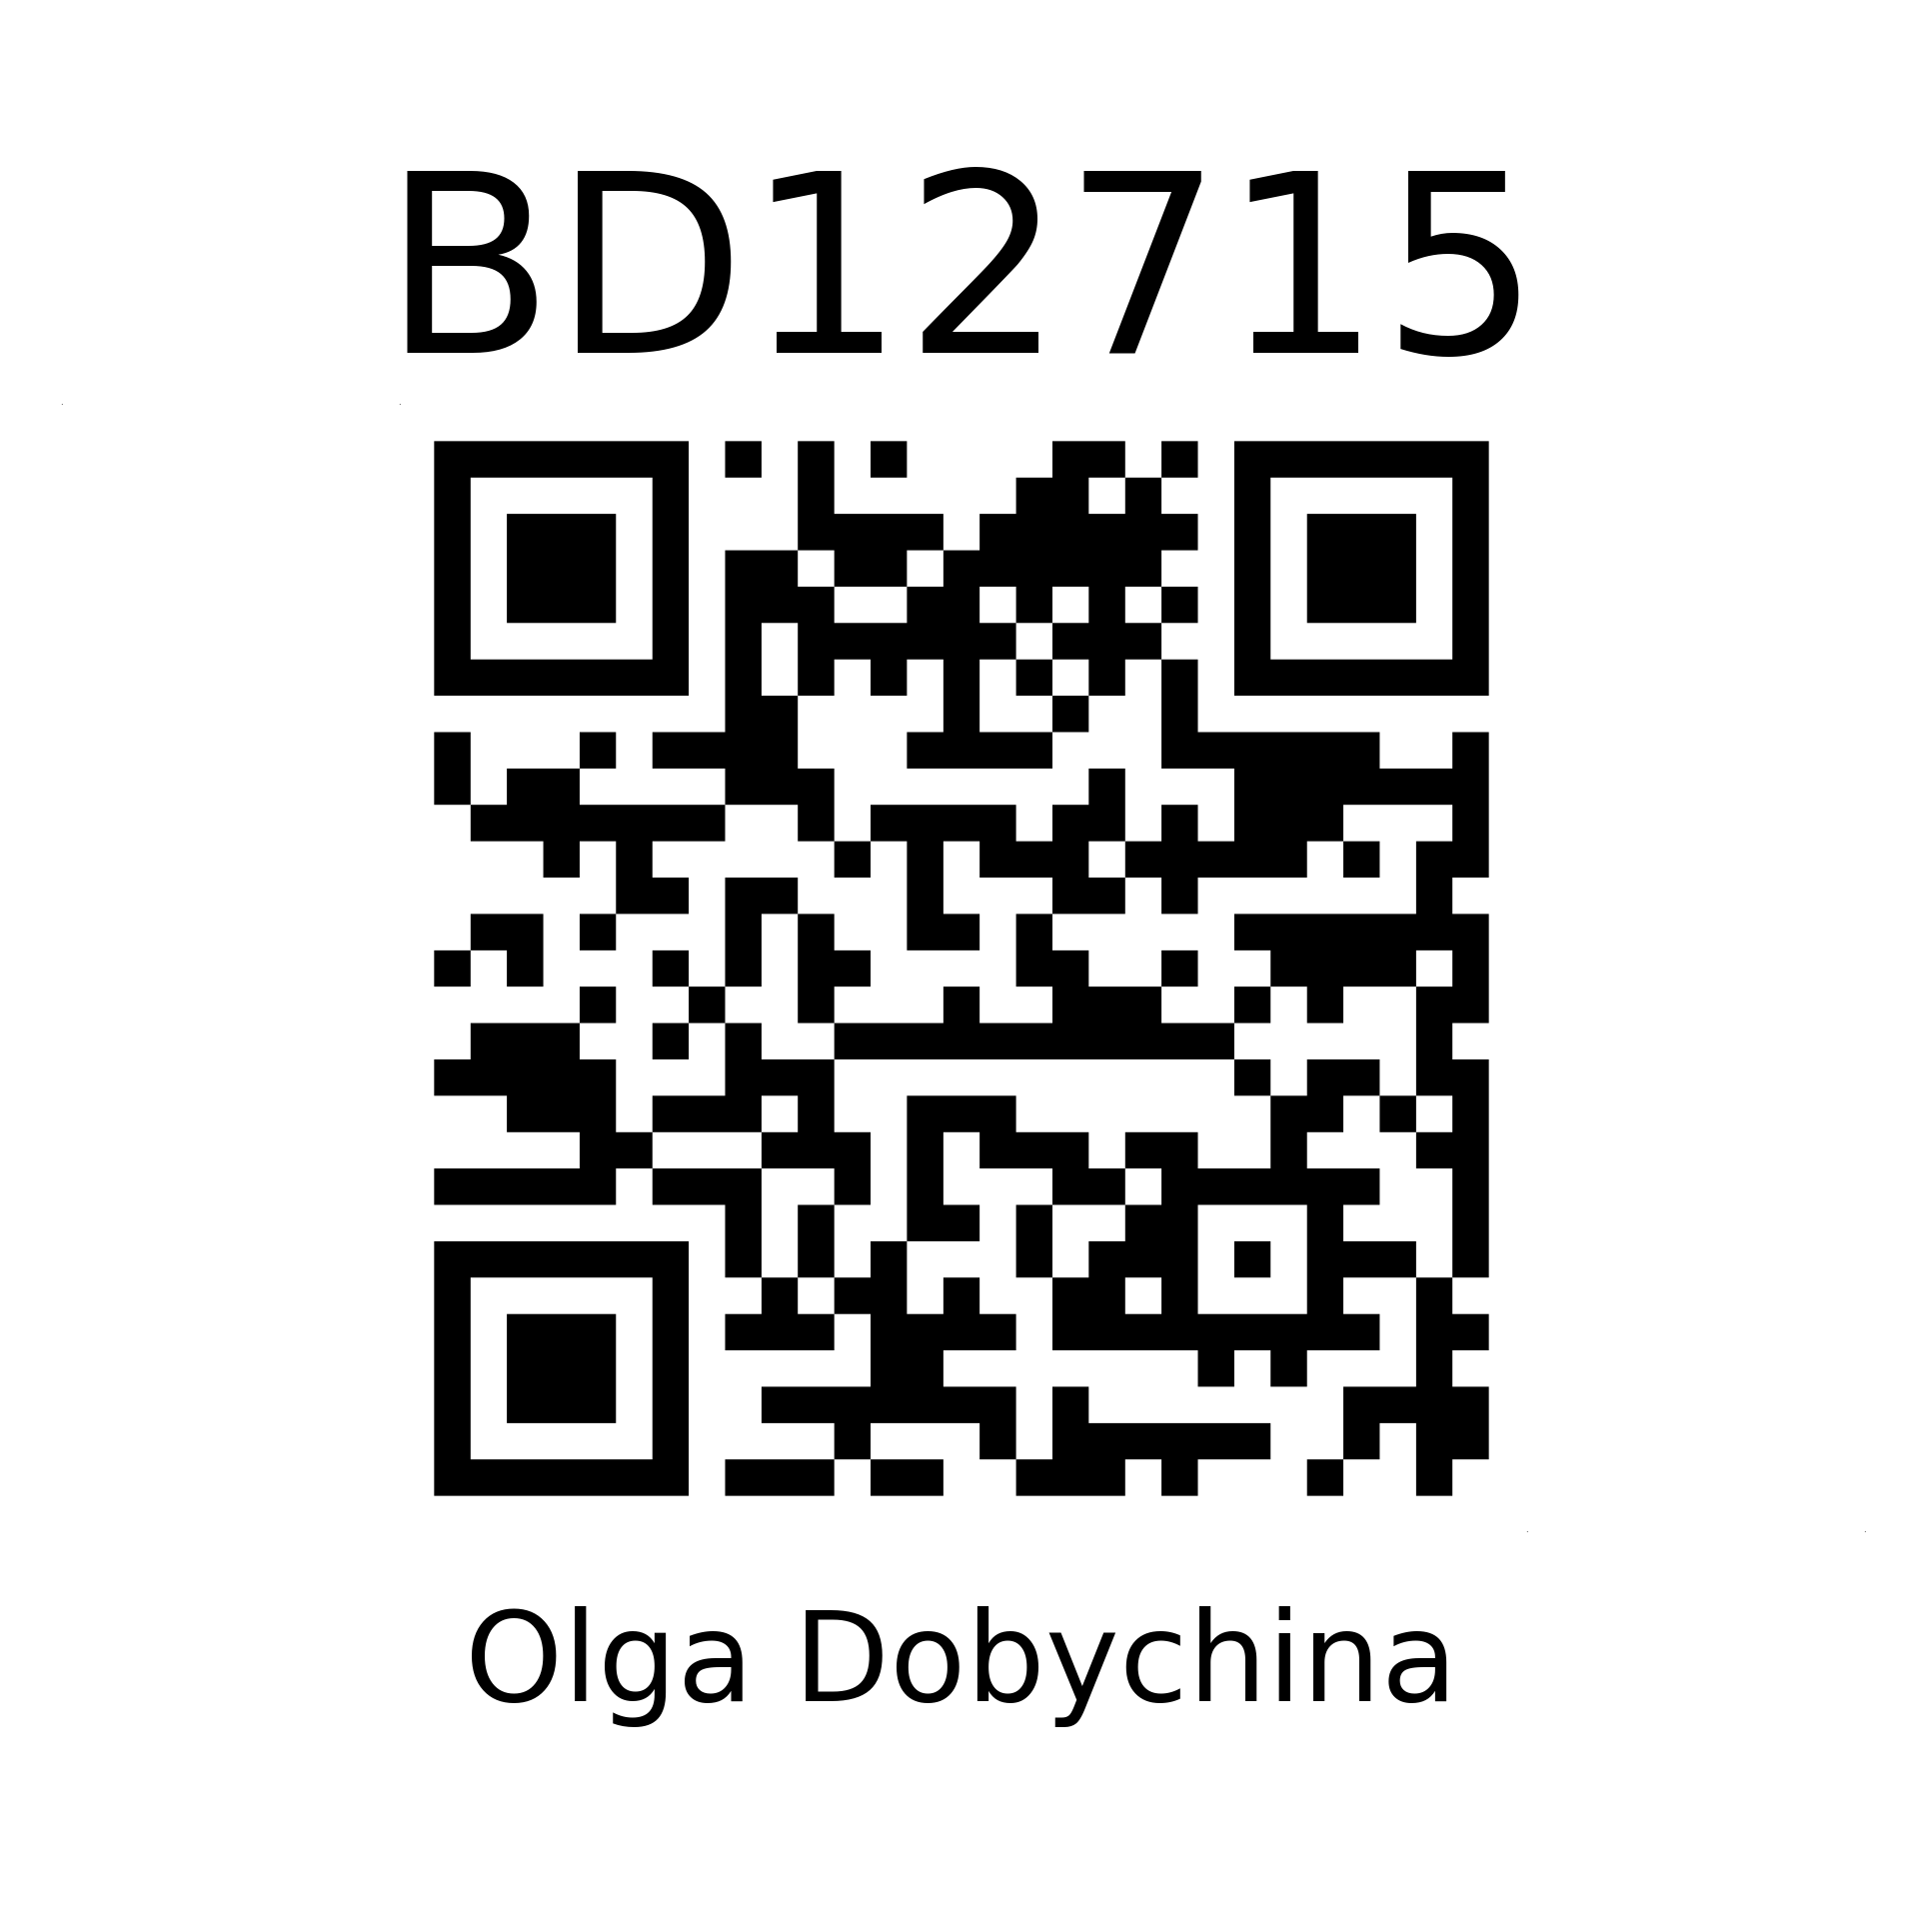

<Figure size 244.094x244.094 with 0 Axes>

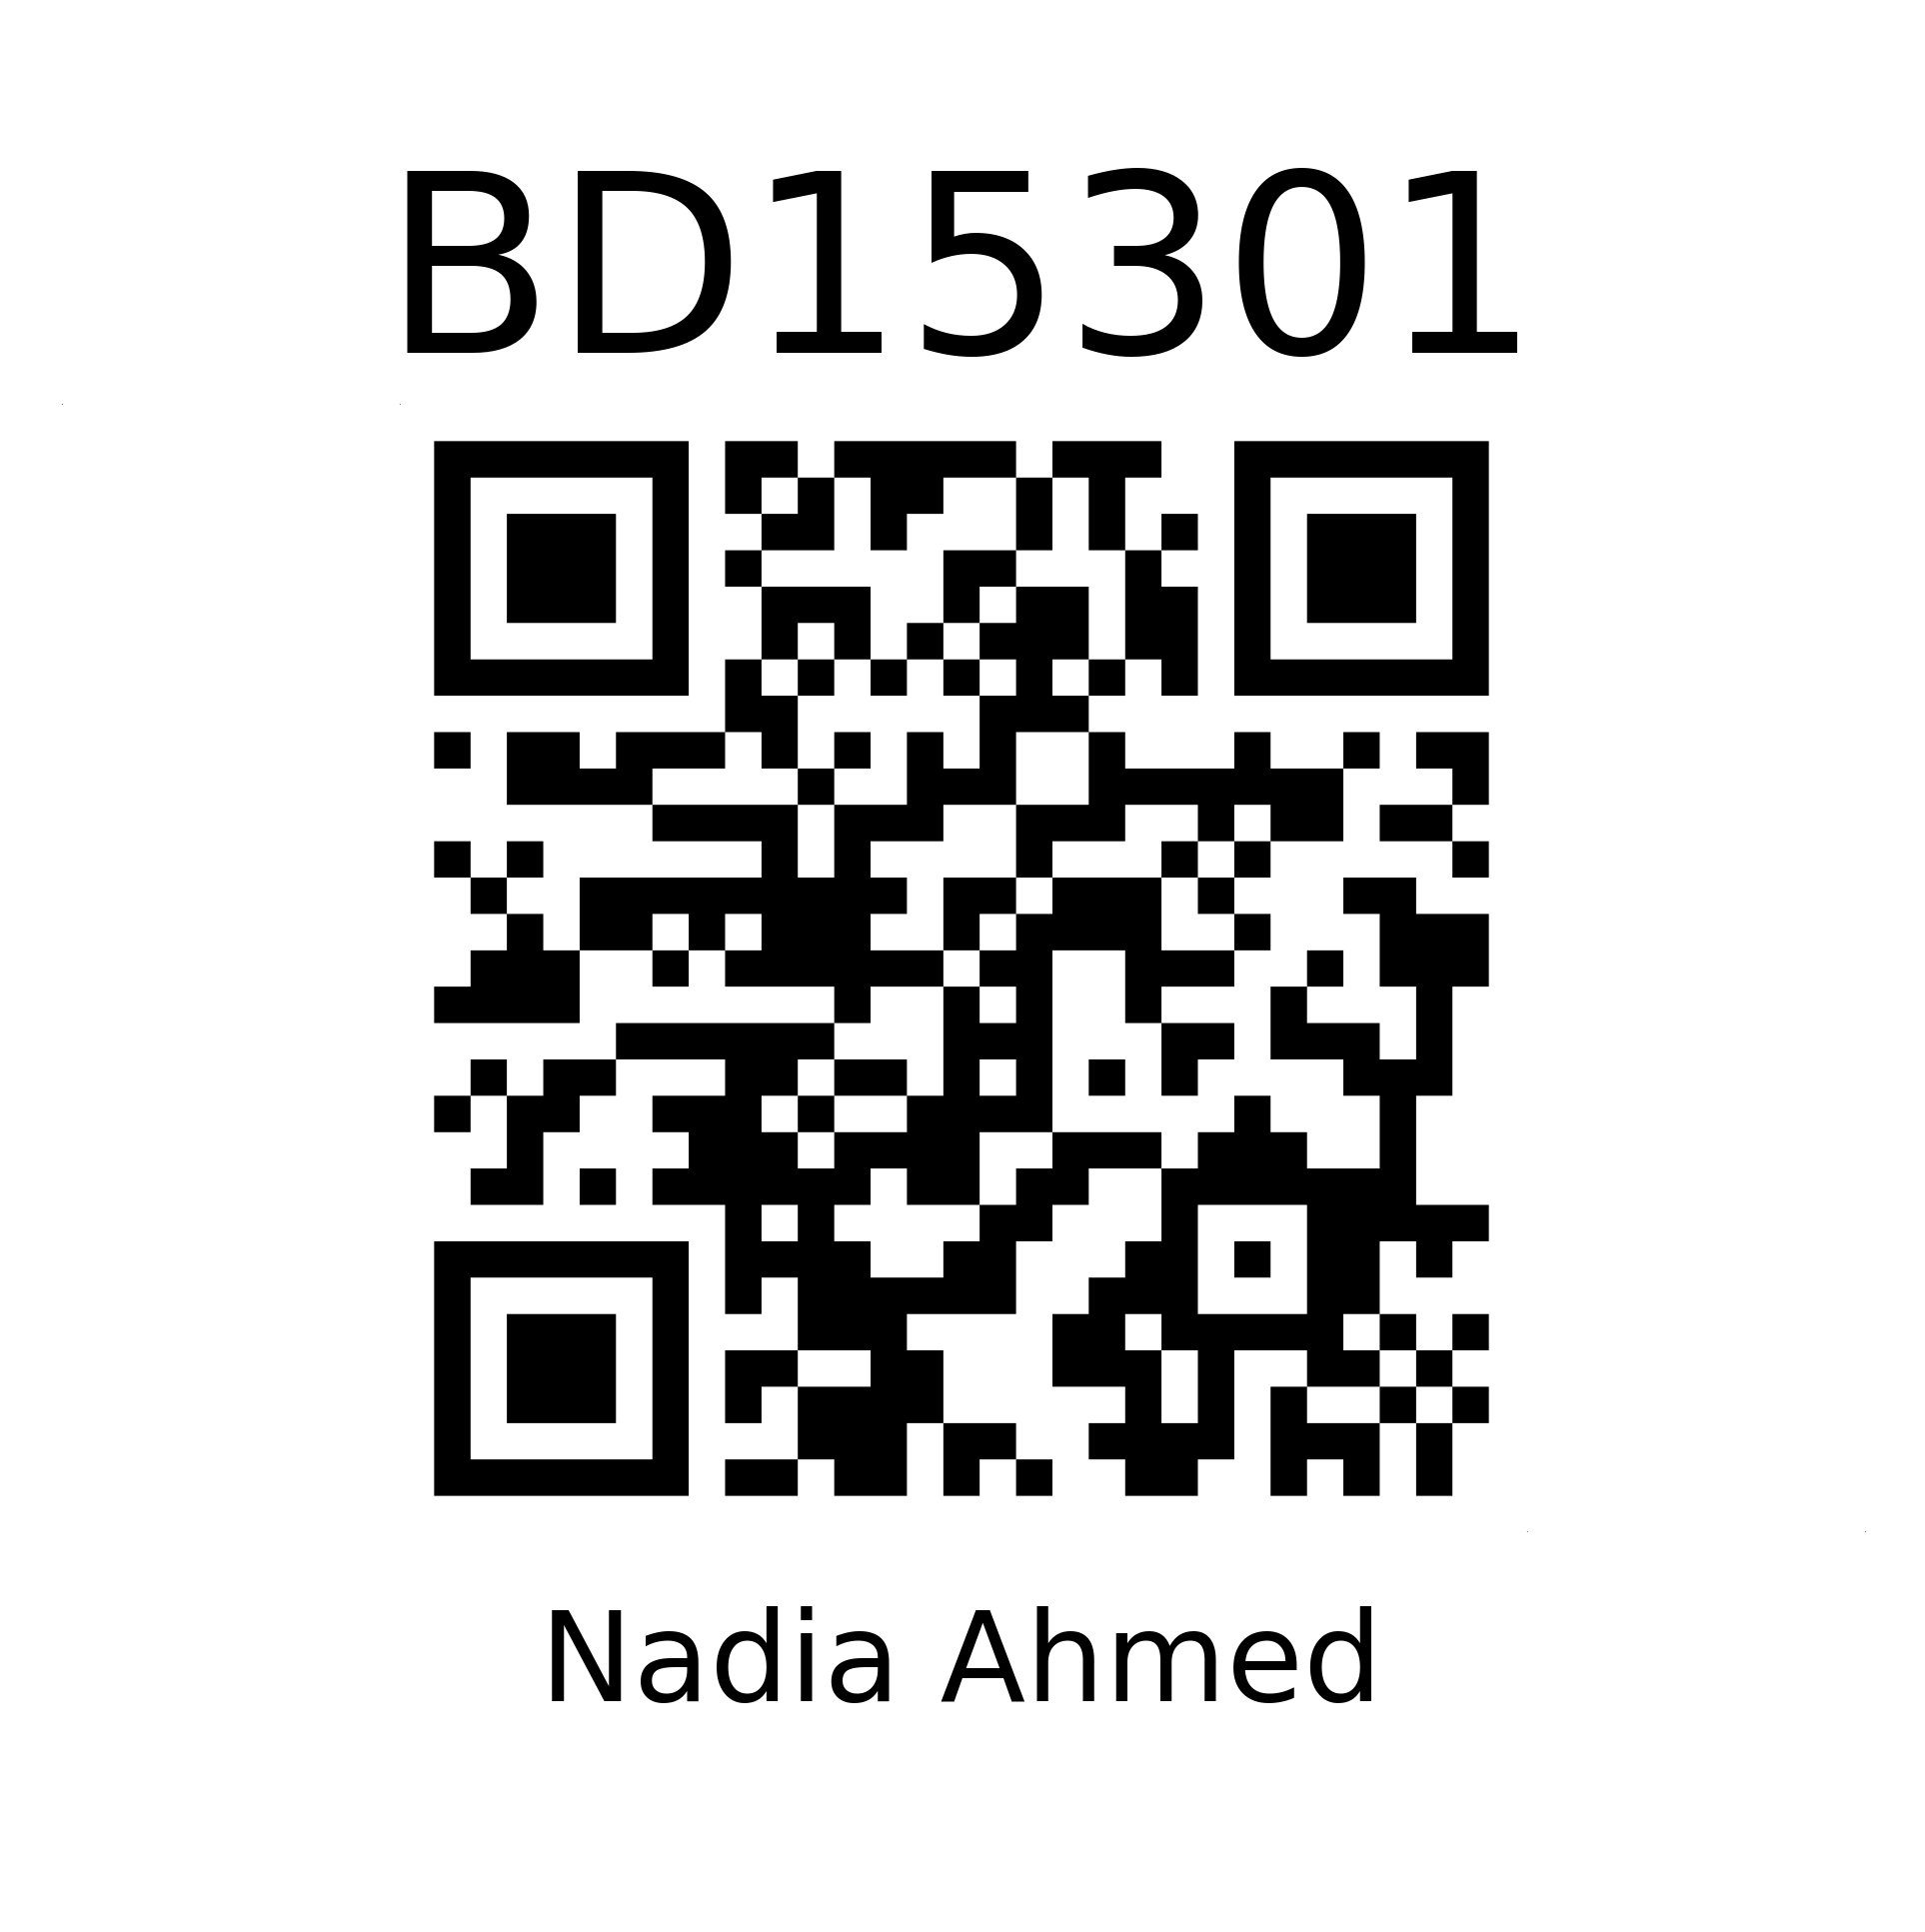

<Figure size 244.094x244.094 with 0 Axes>

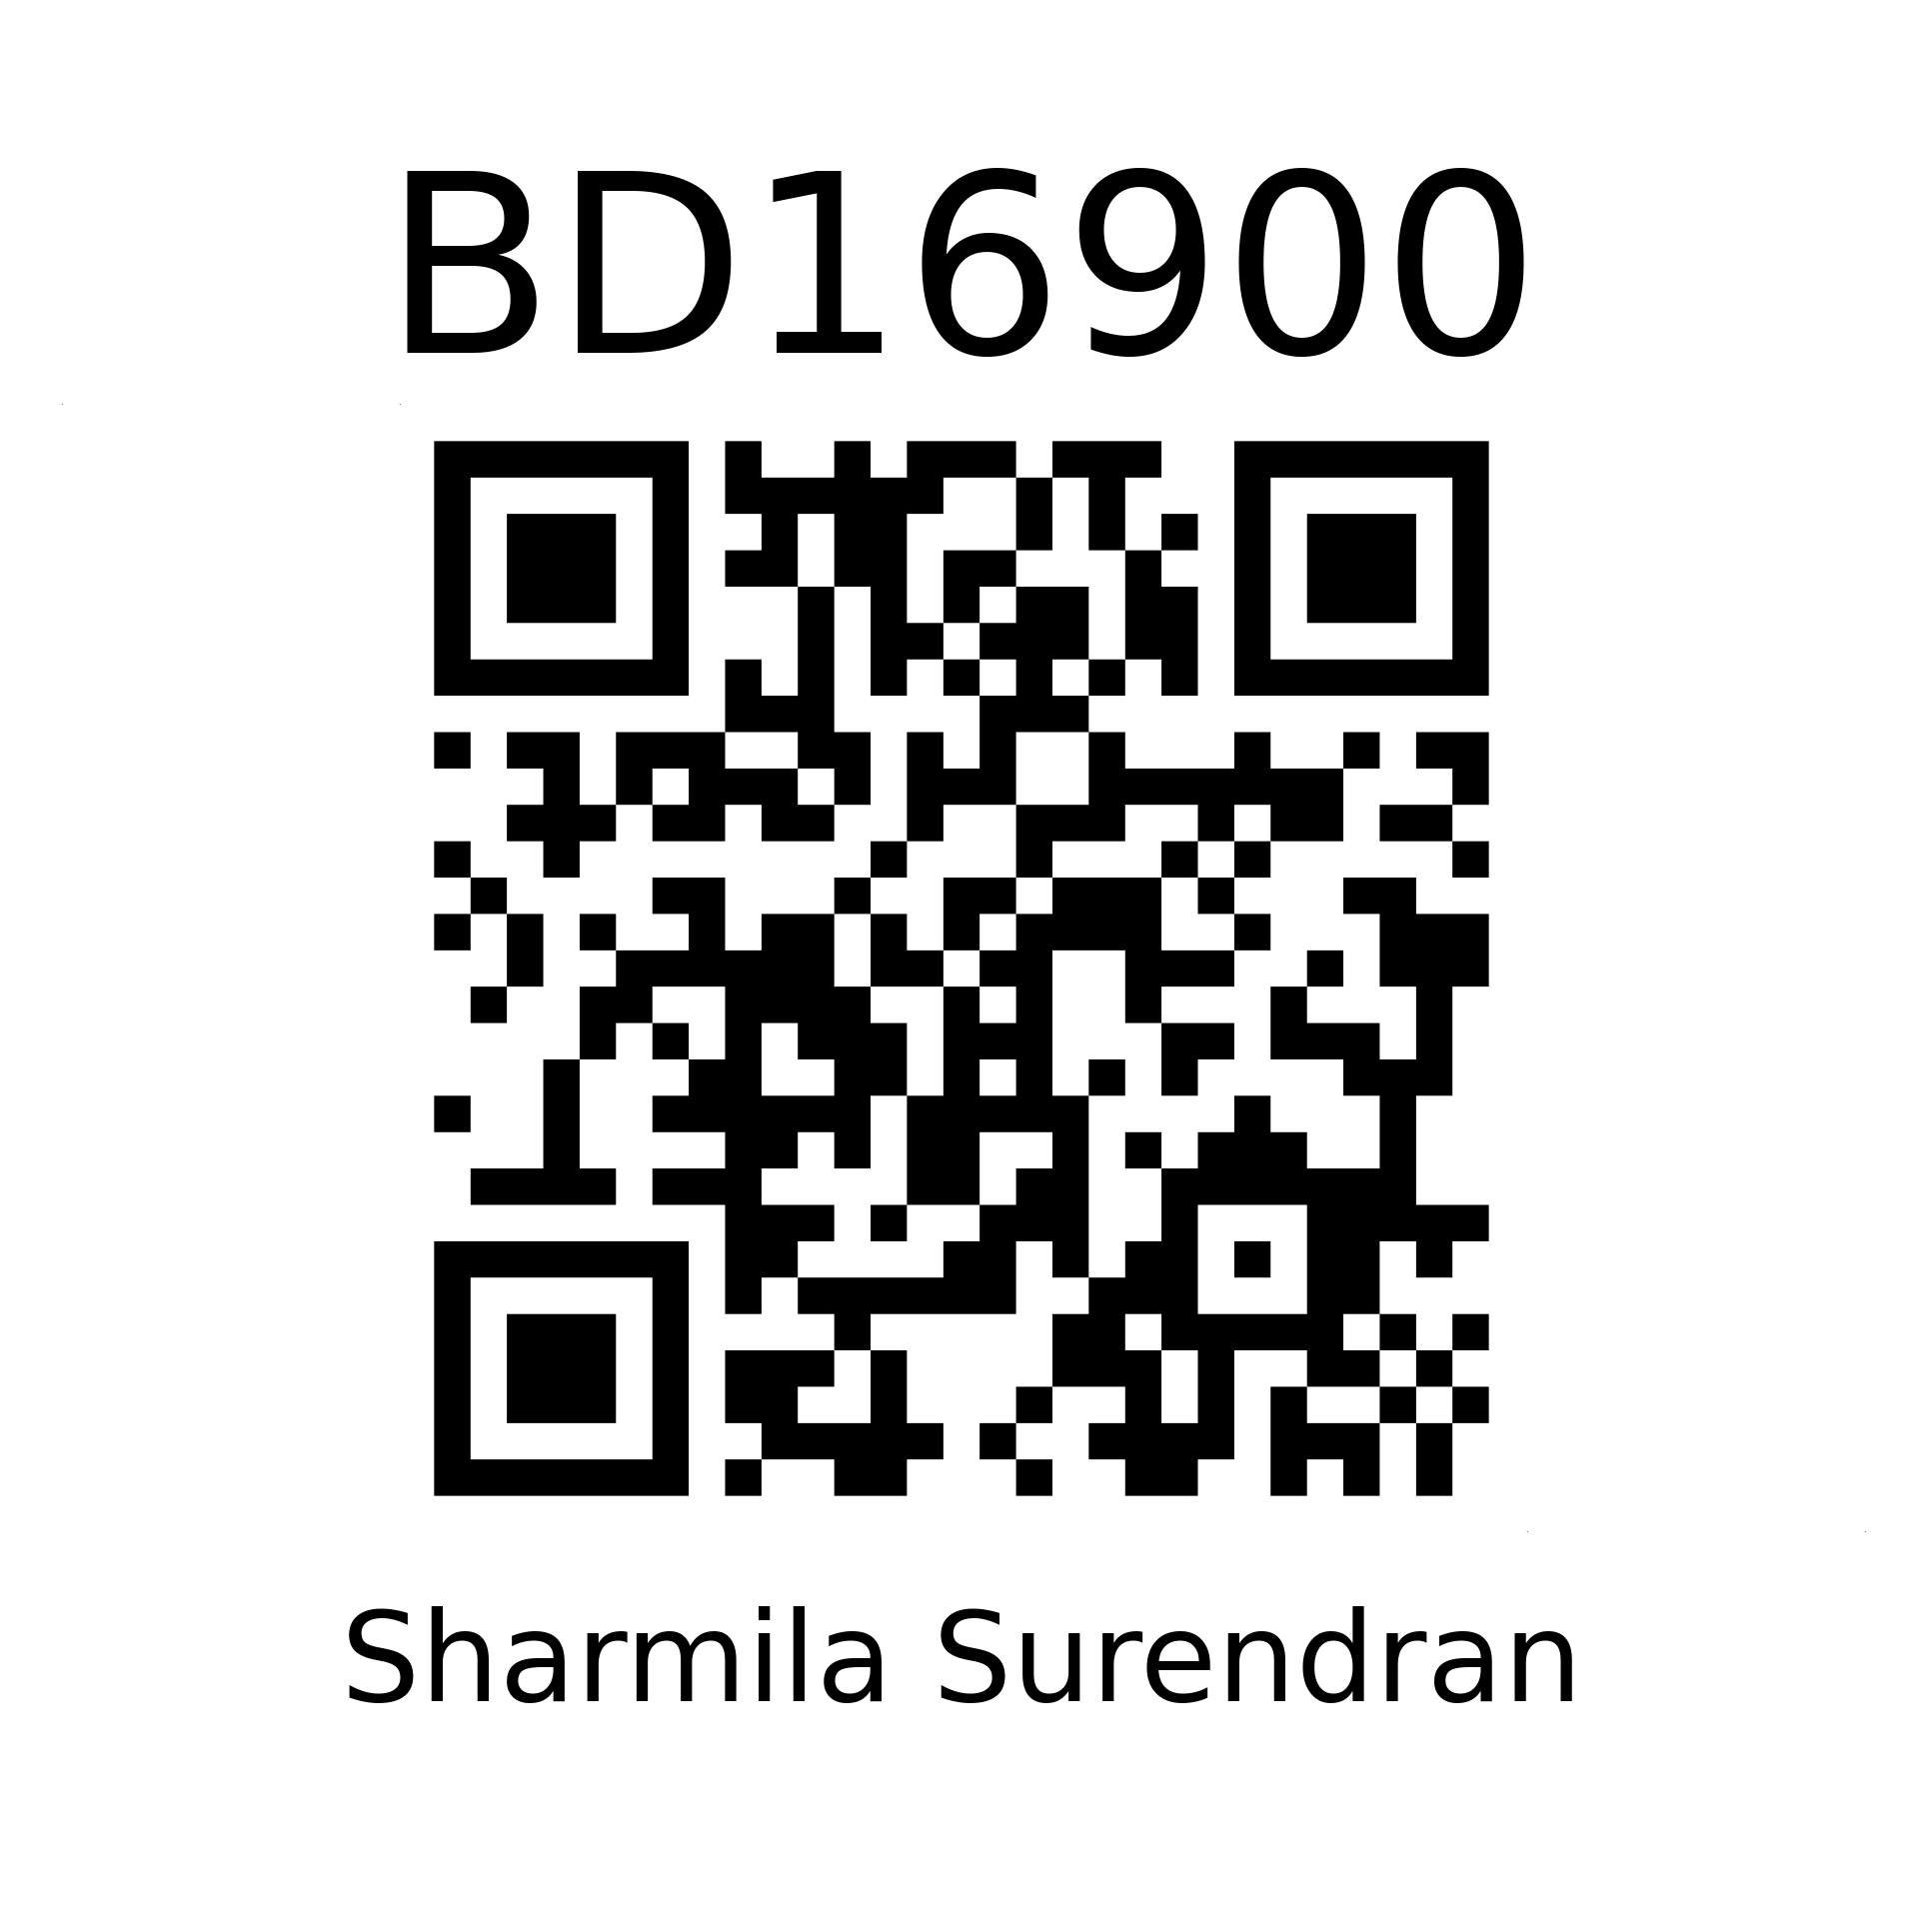

<Figure size 244.094x244.094 with 0 Axes>

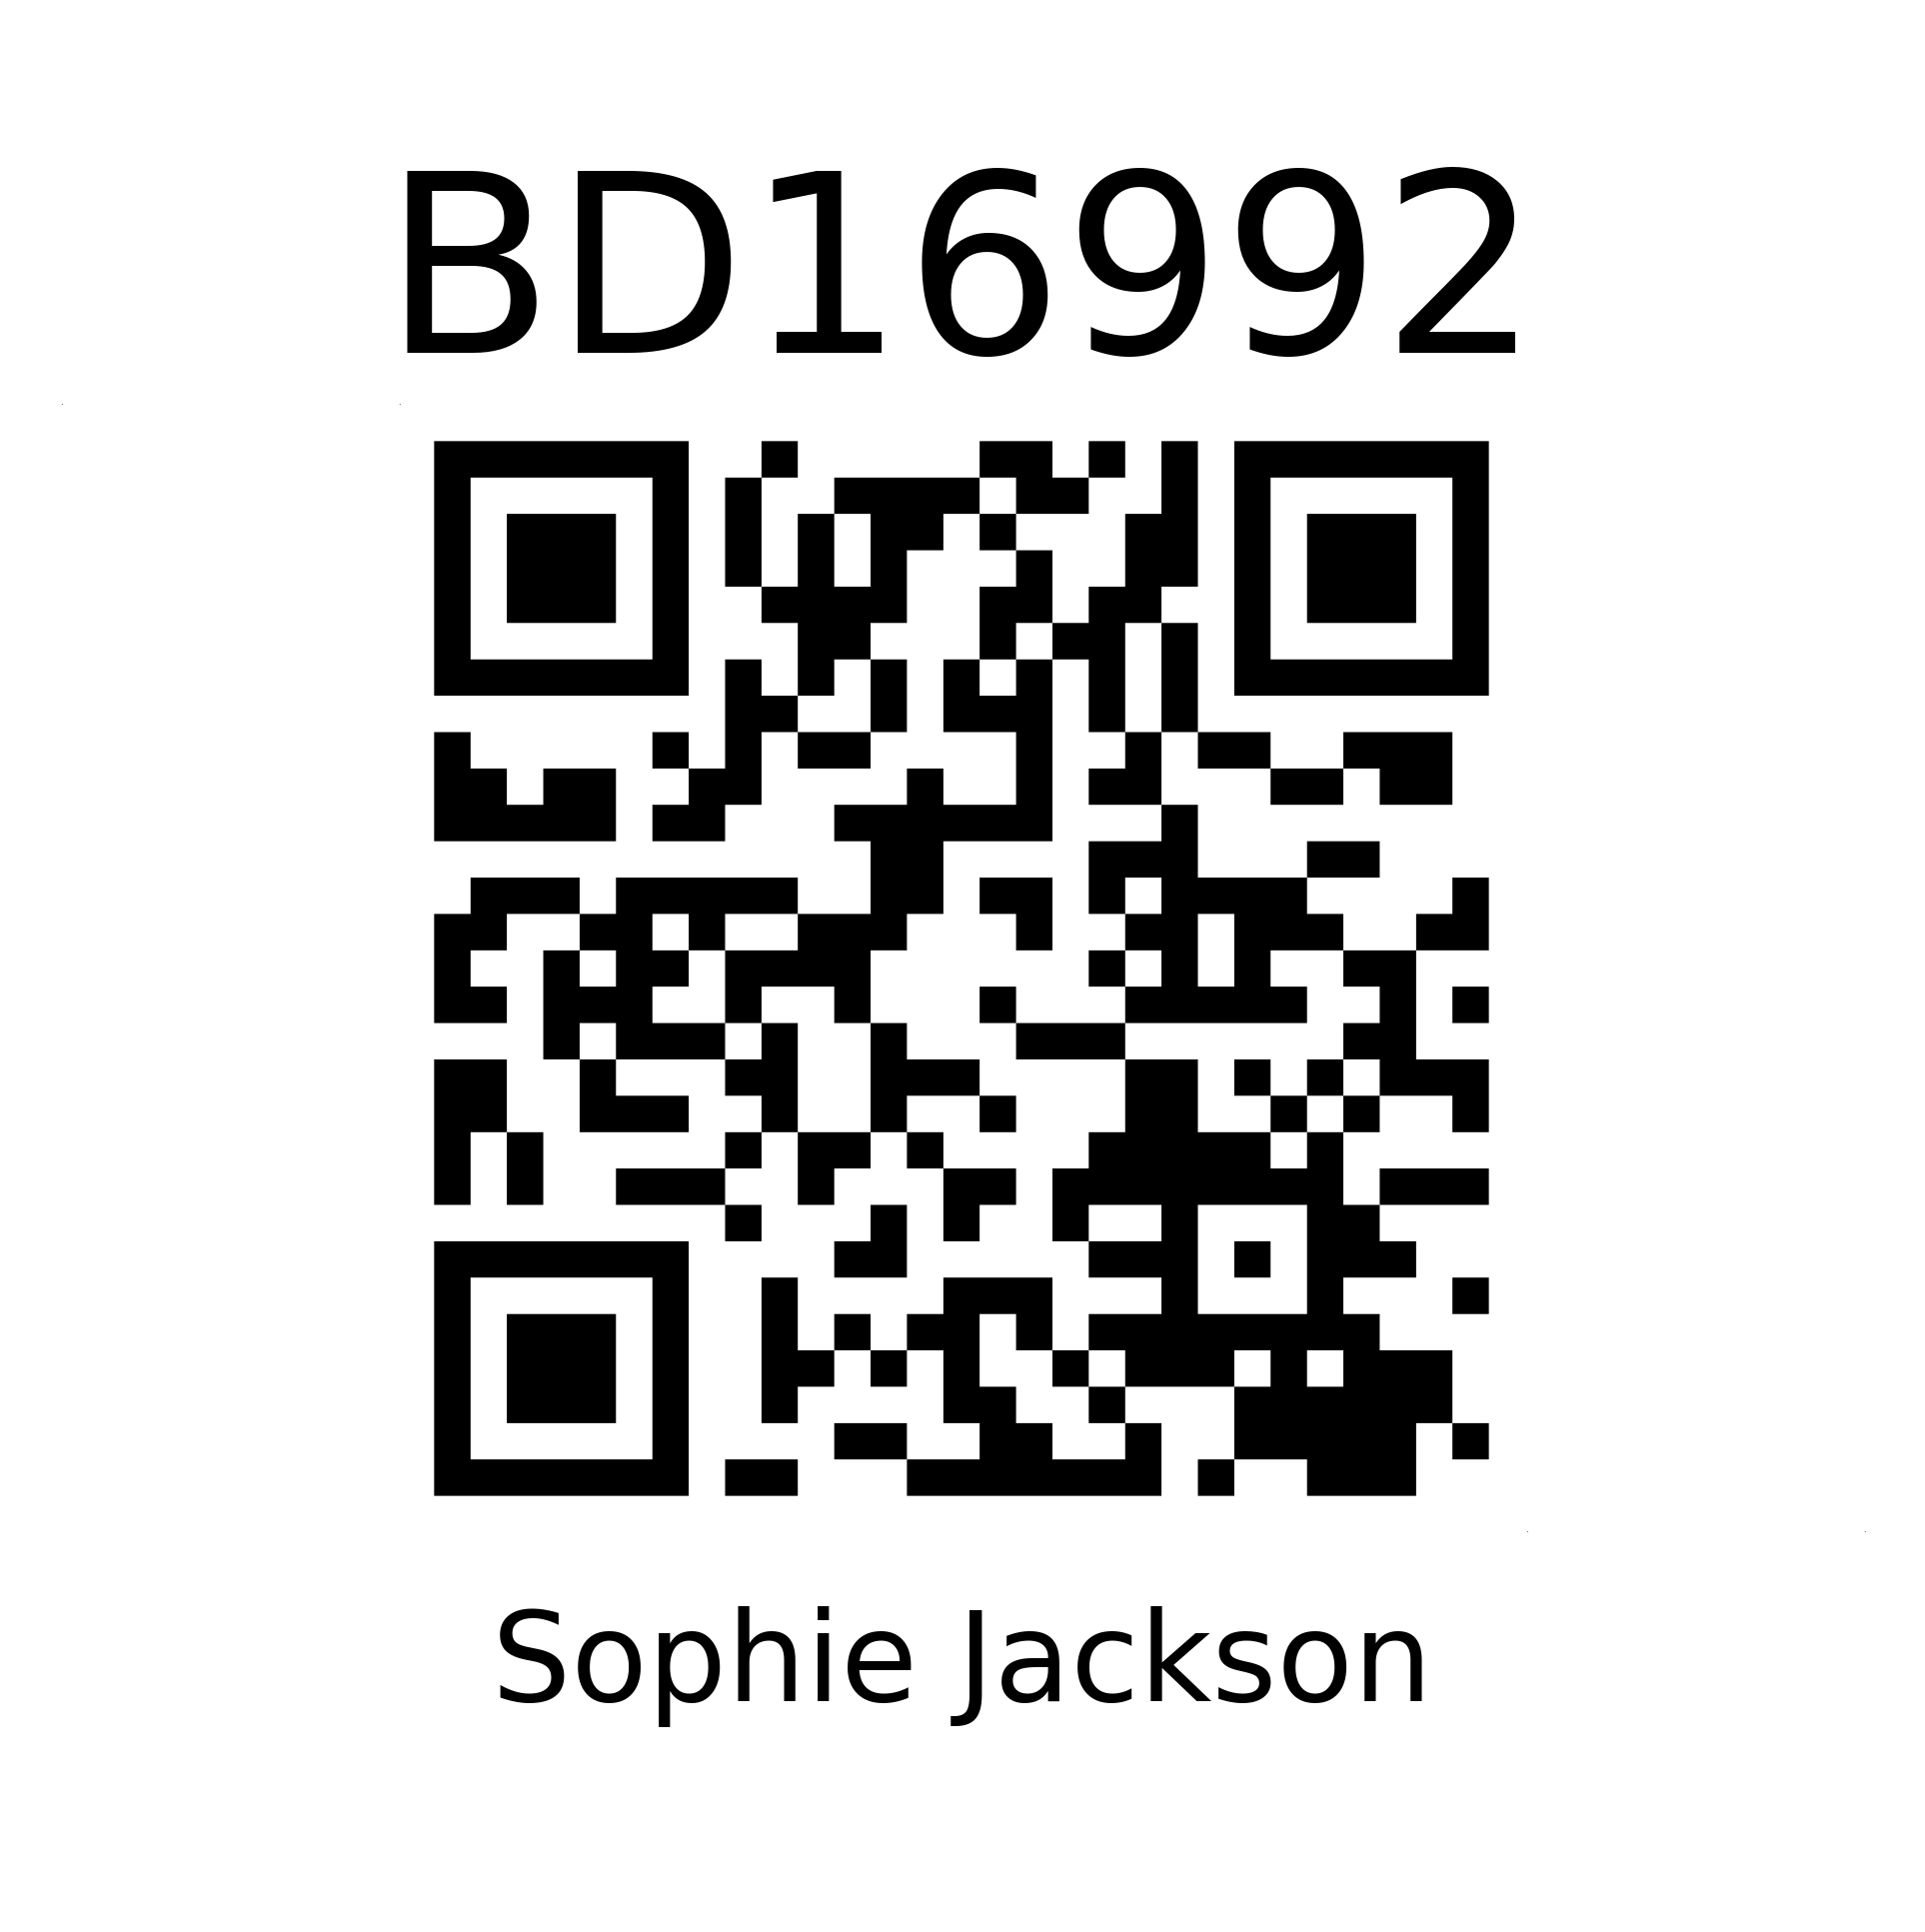

<Figure size 244.094x244.094 with 0 Axes>

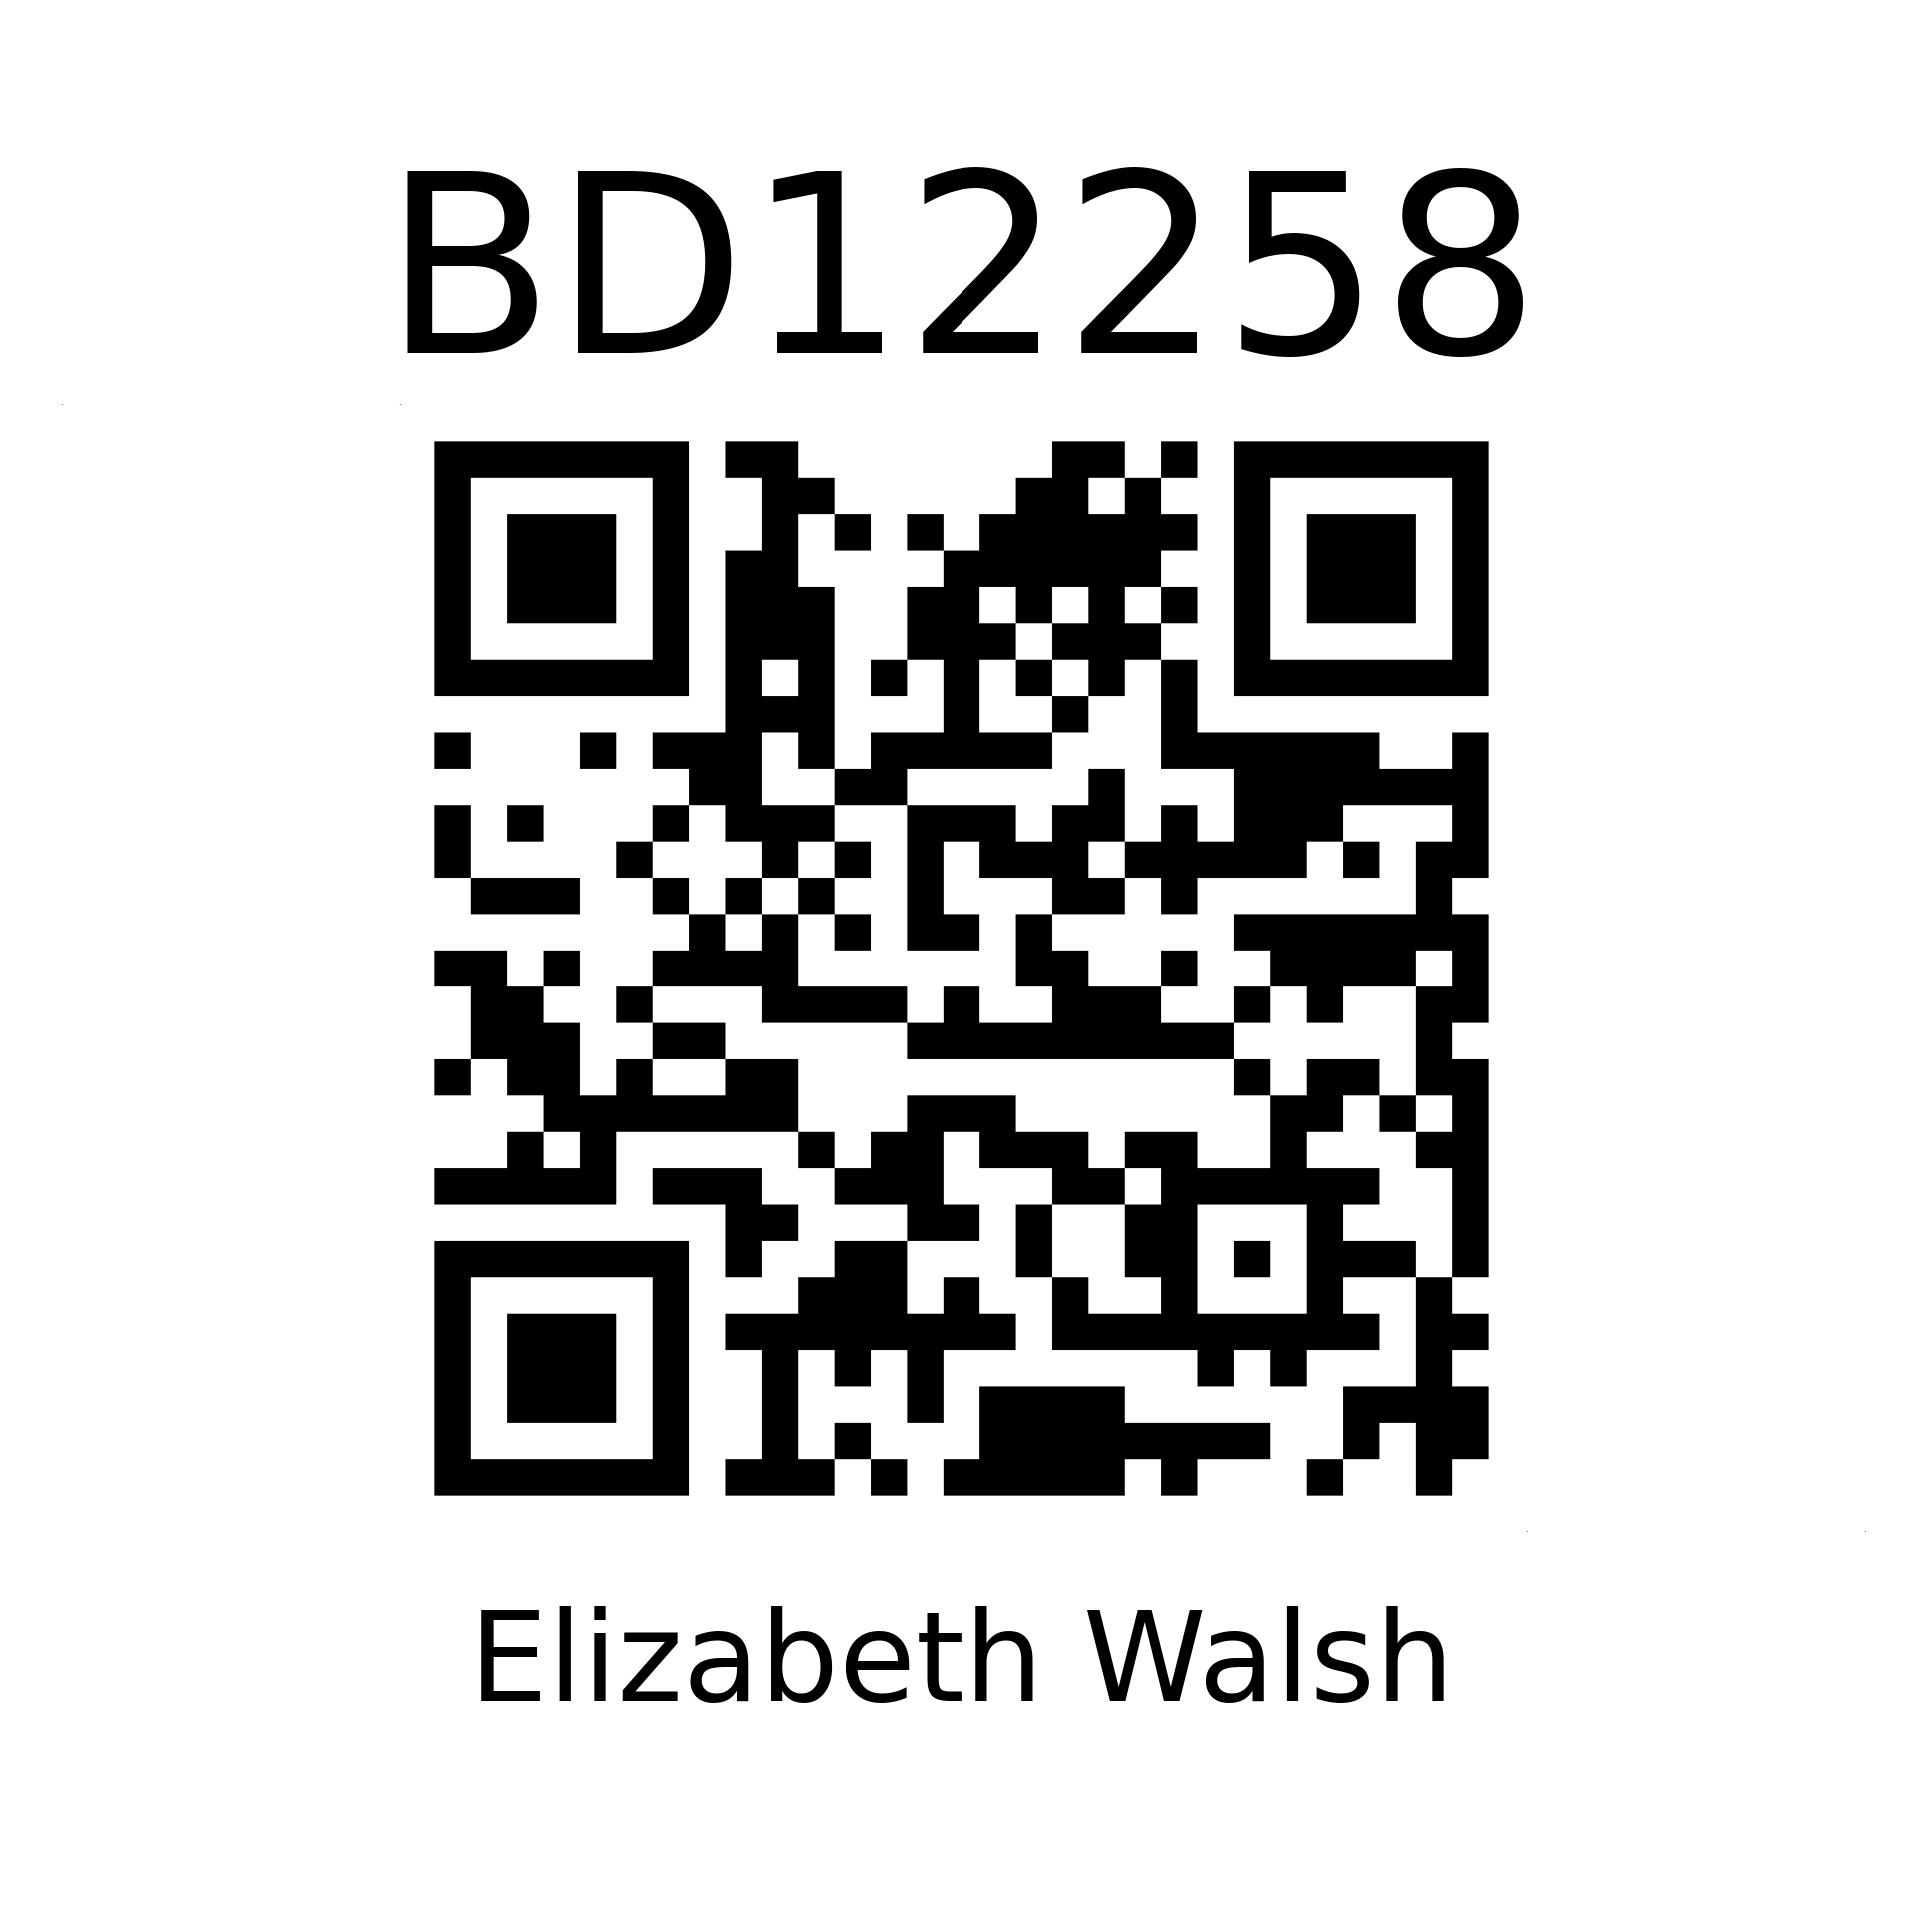

<Figure size 244.094x244.094 with 0 Axes>

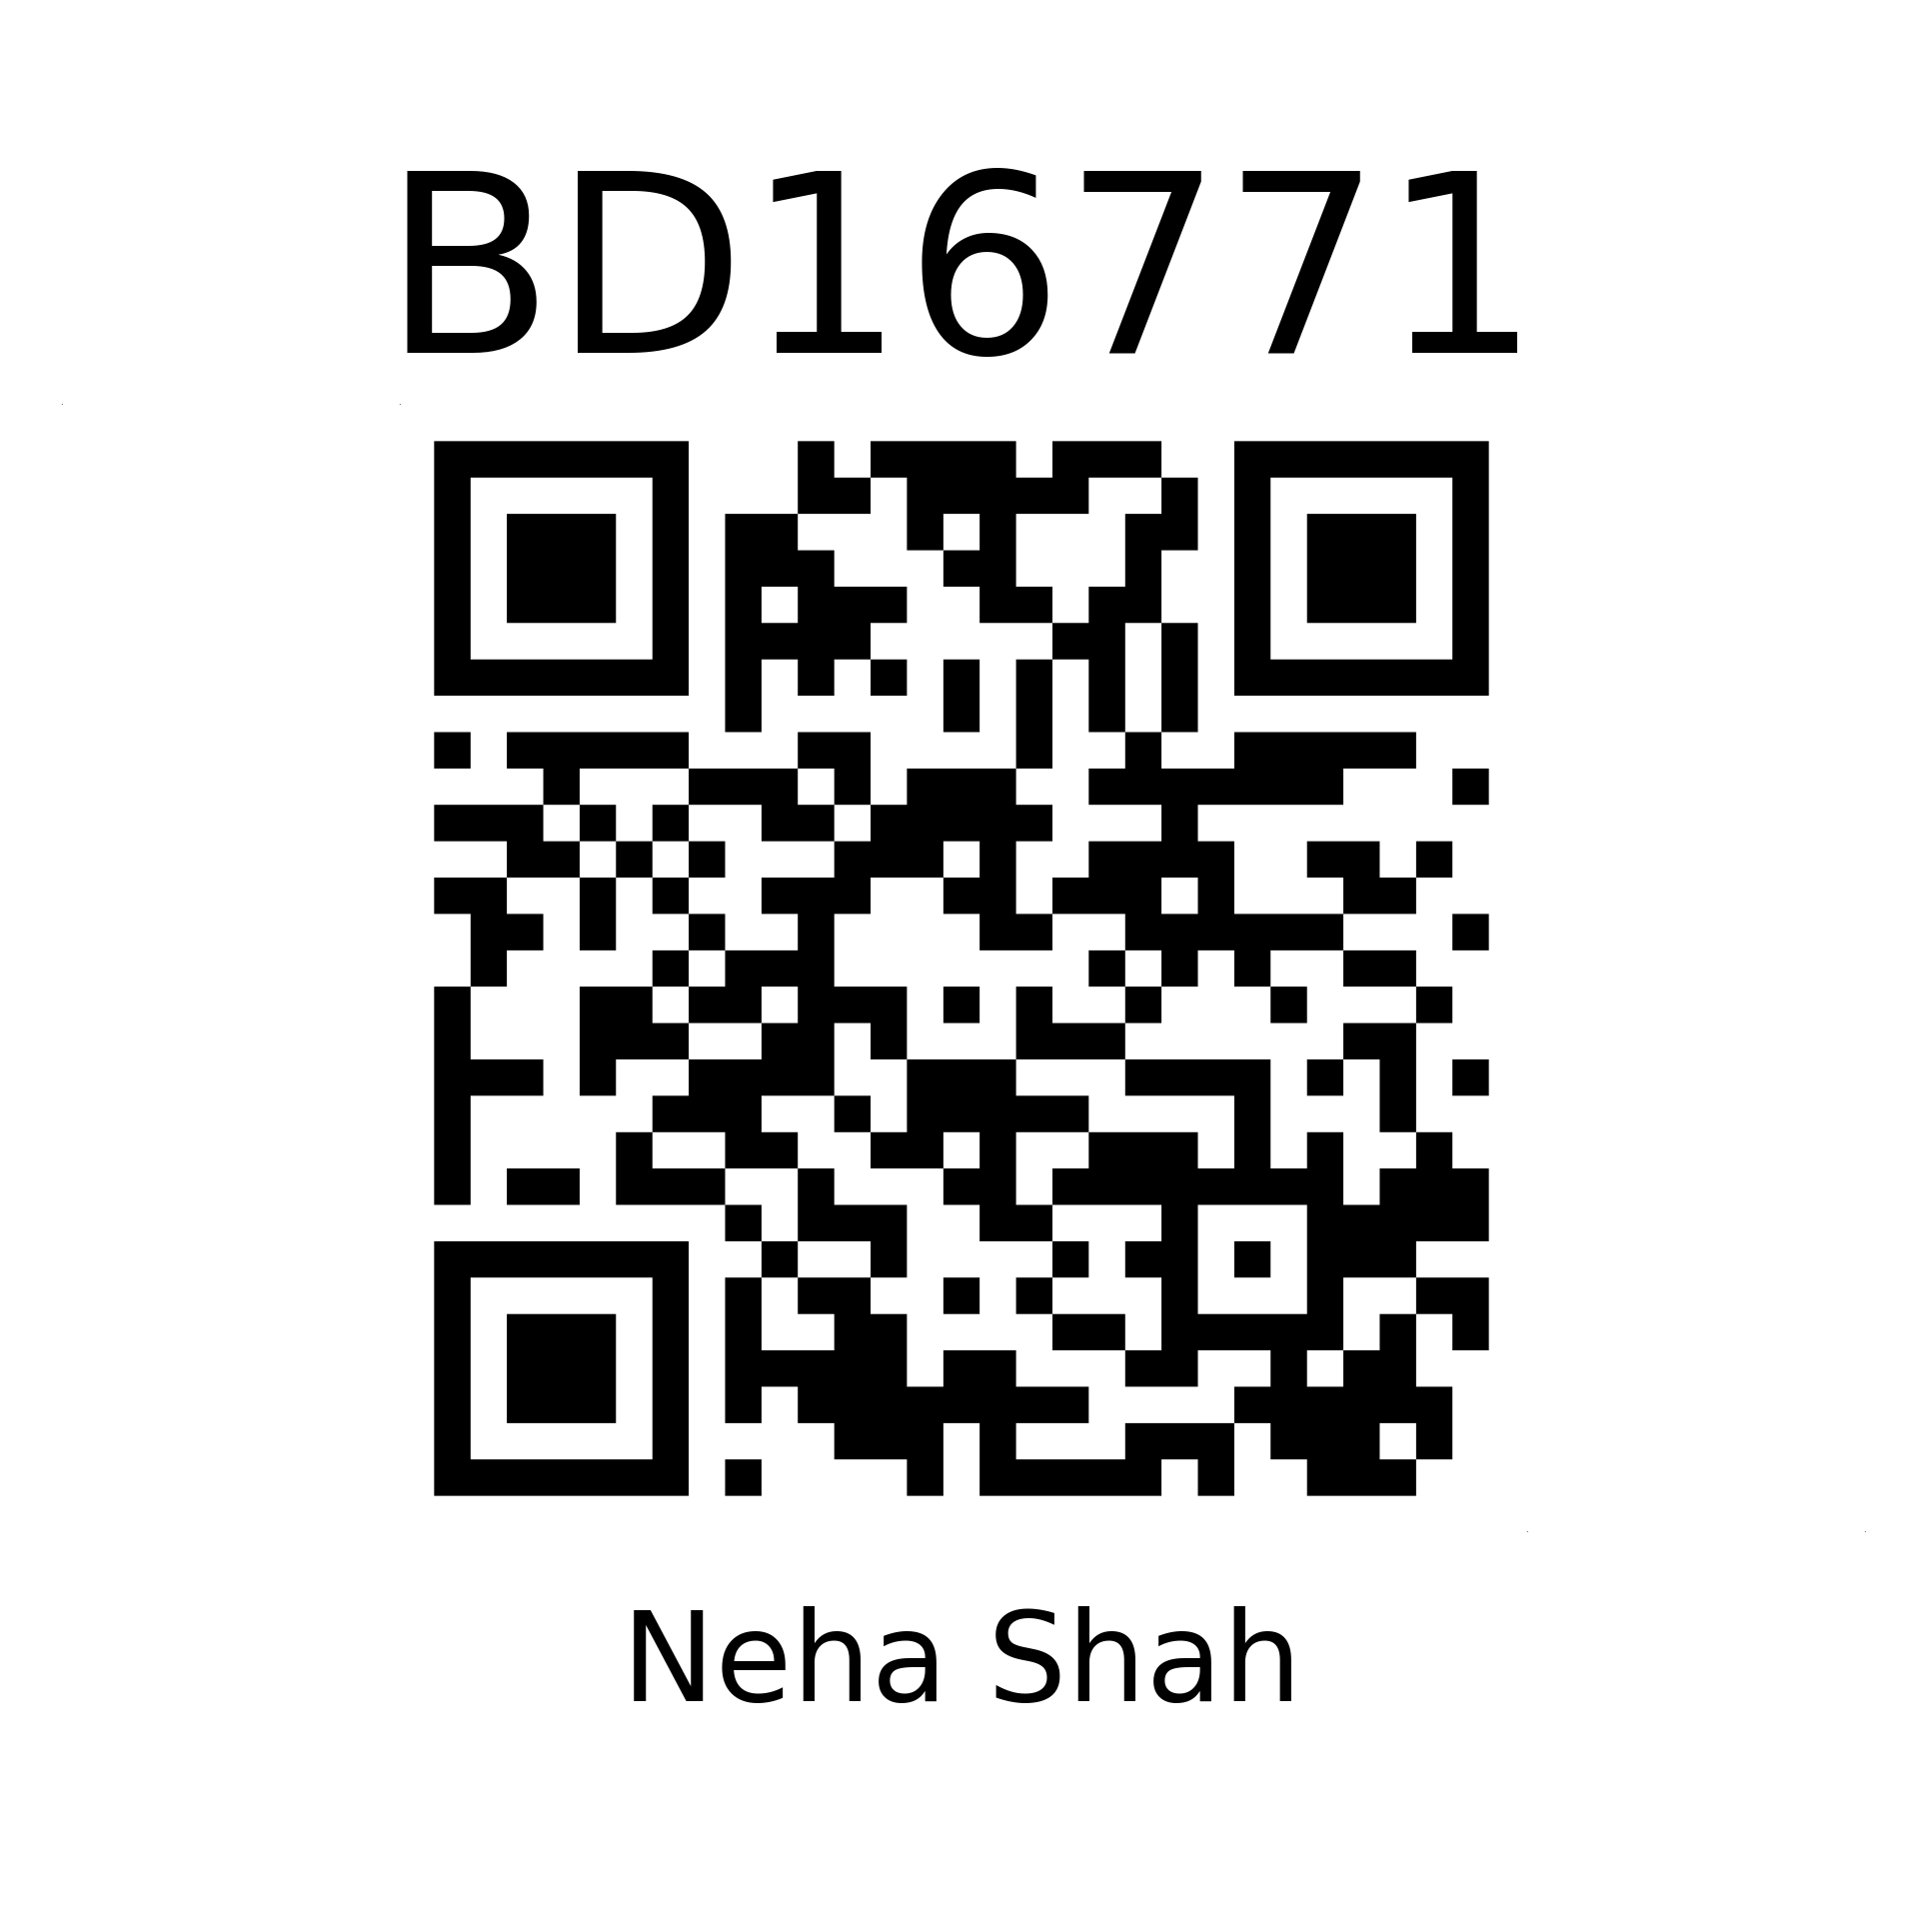

<Figure size 244.094x244.094 with 0 Axes>

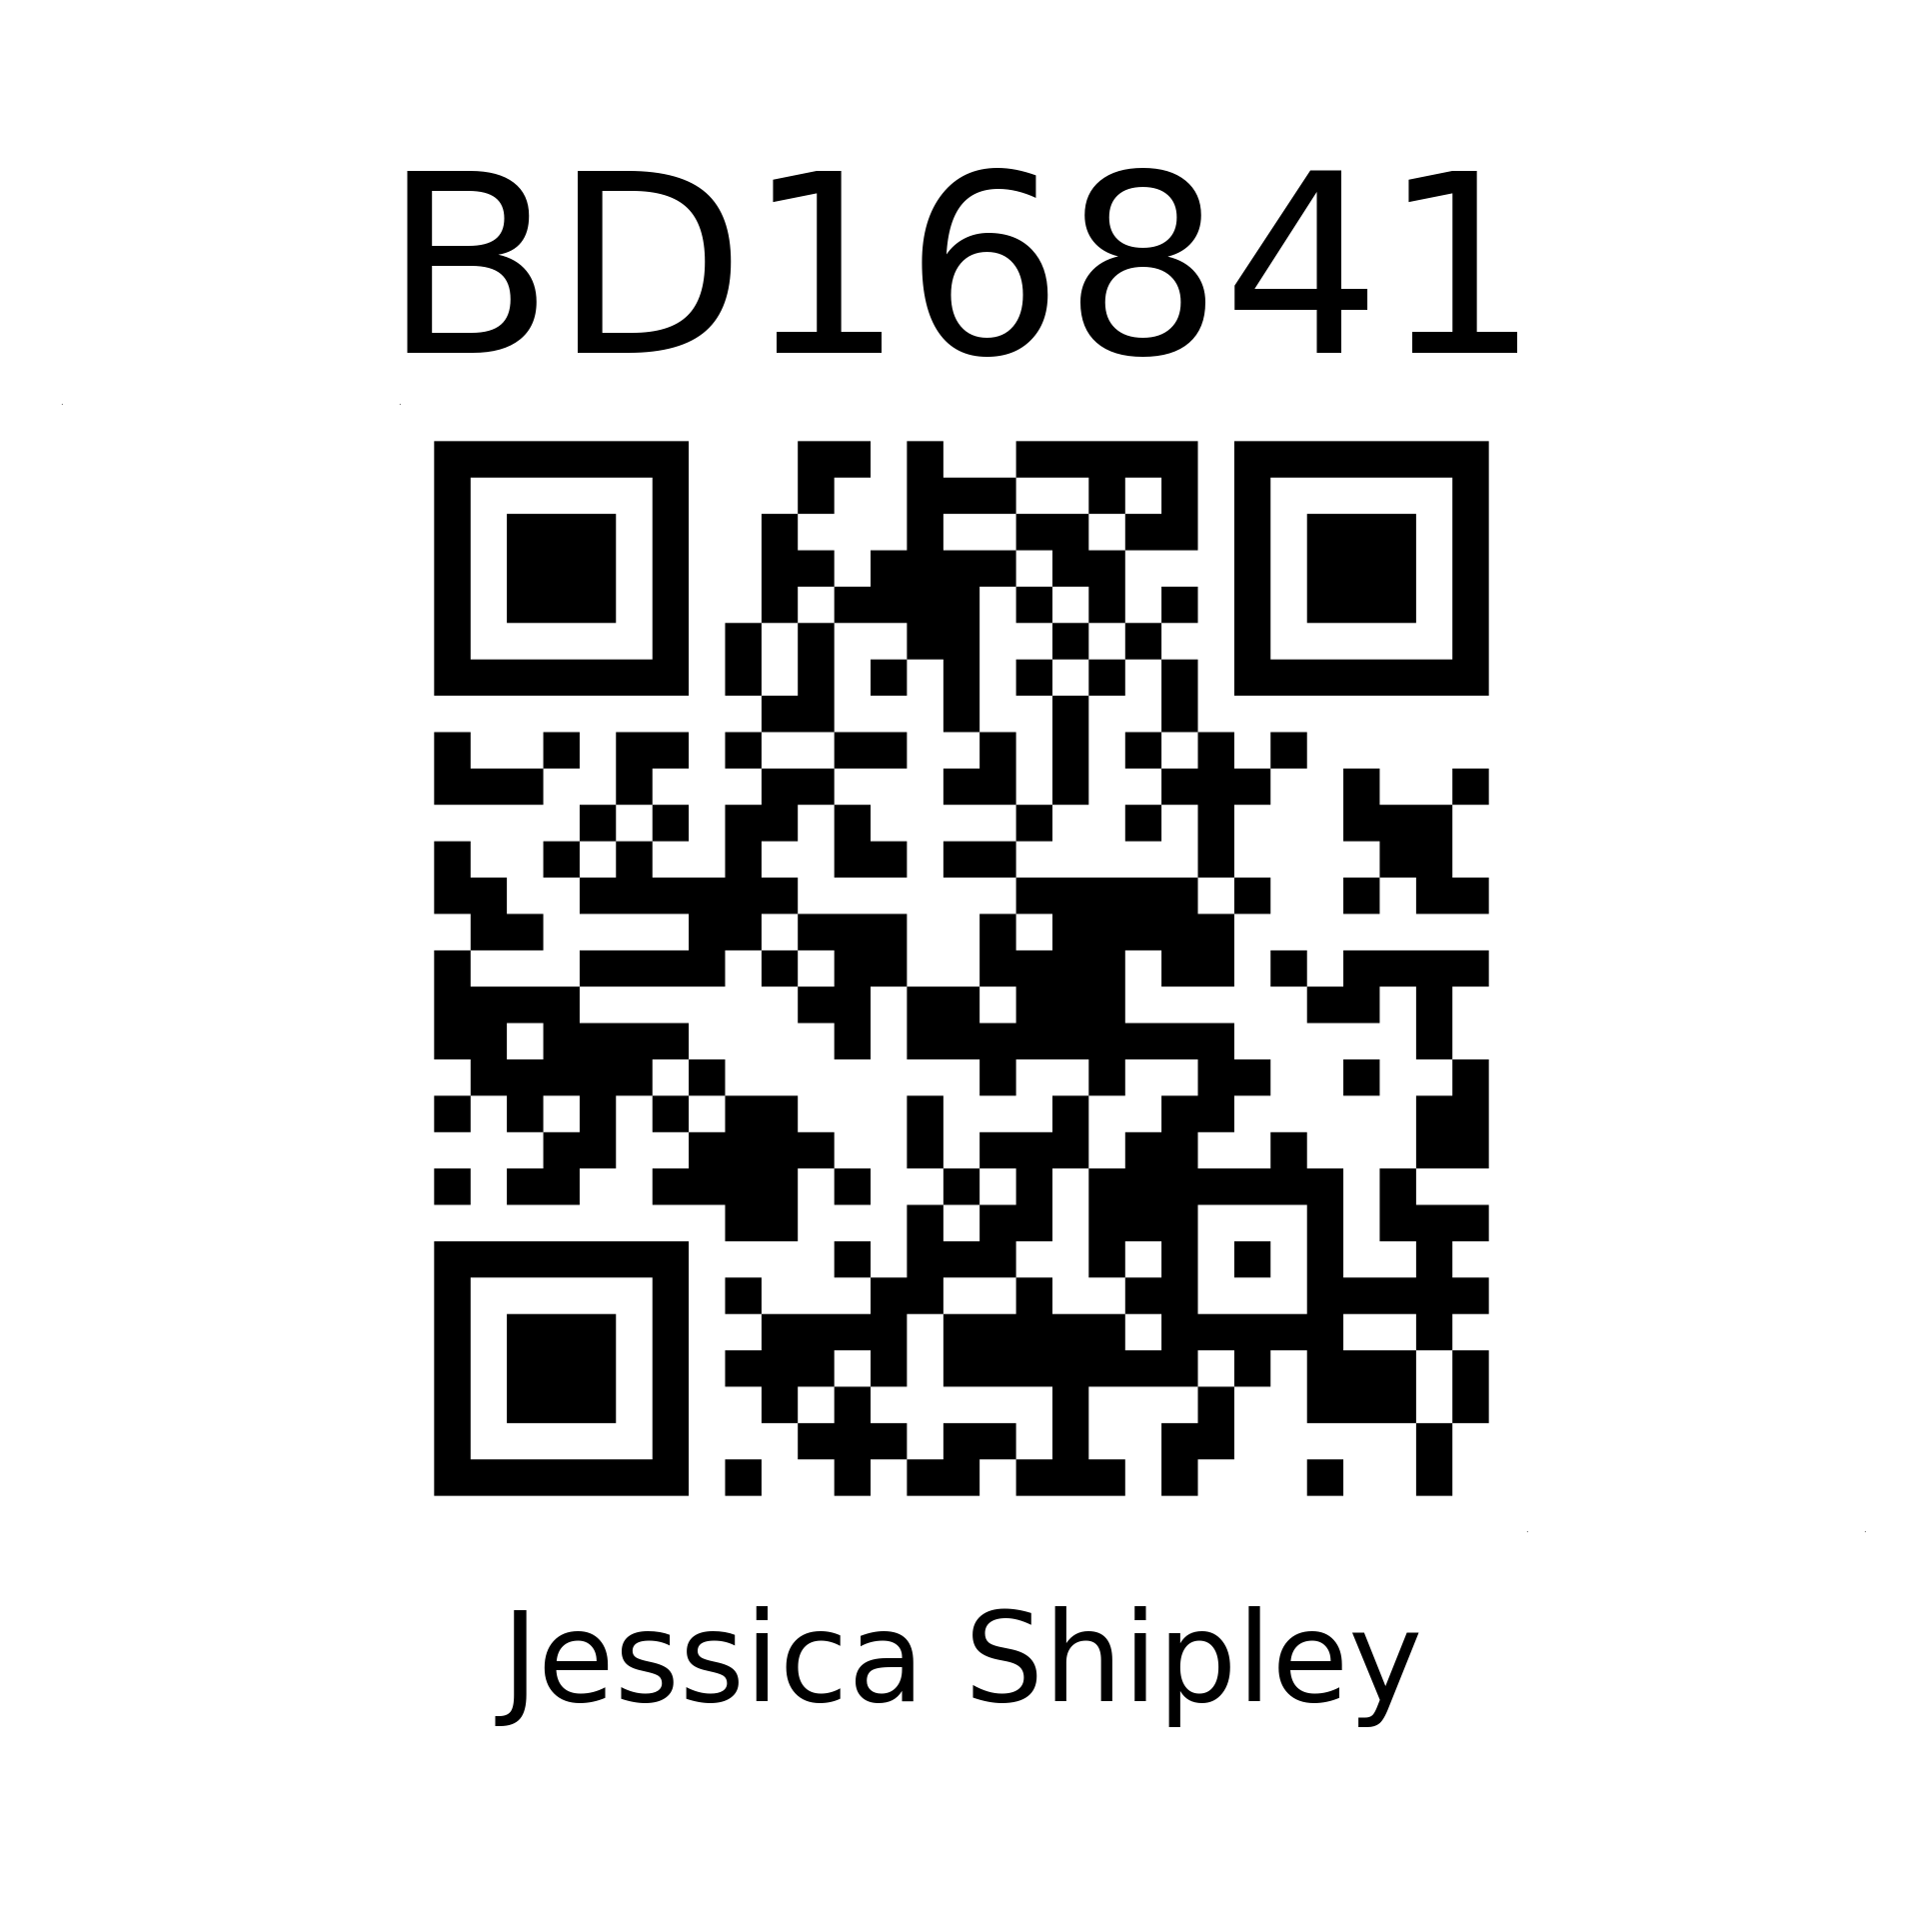

<Figure size 244.094x244.094 with 0 Axes>

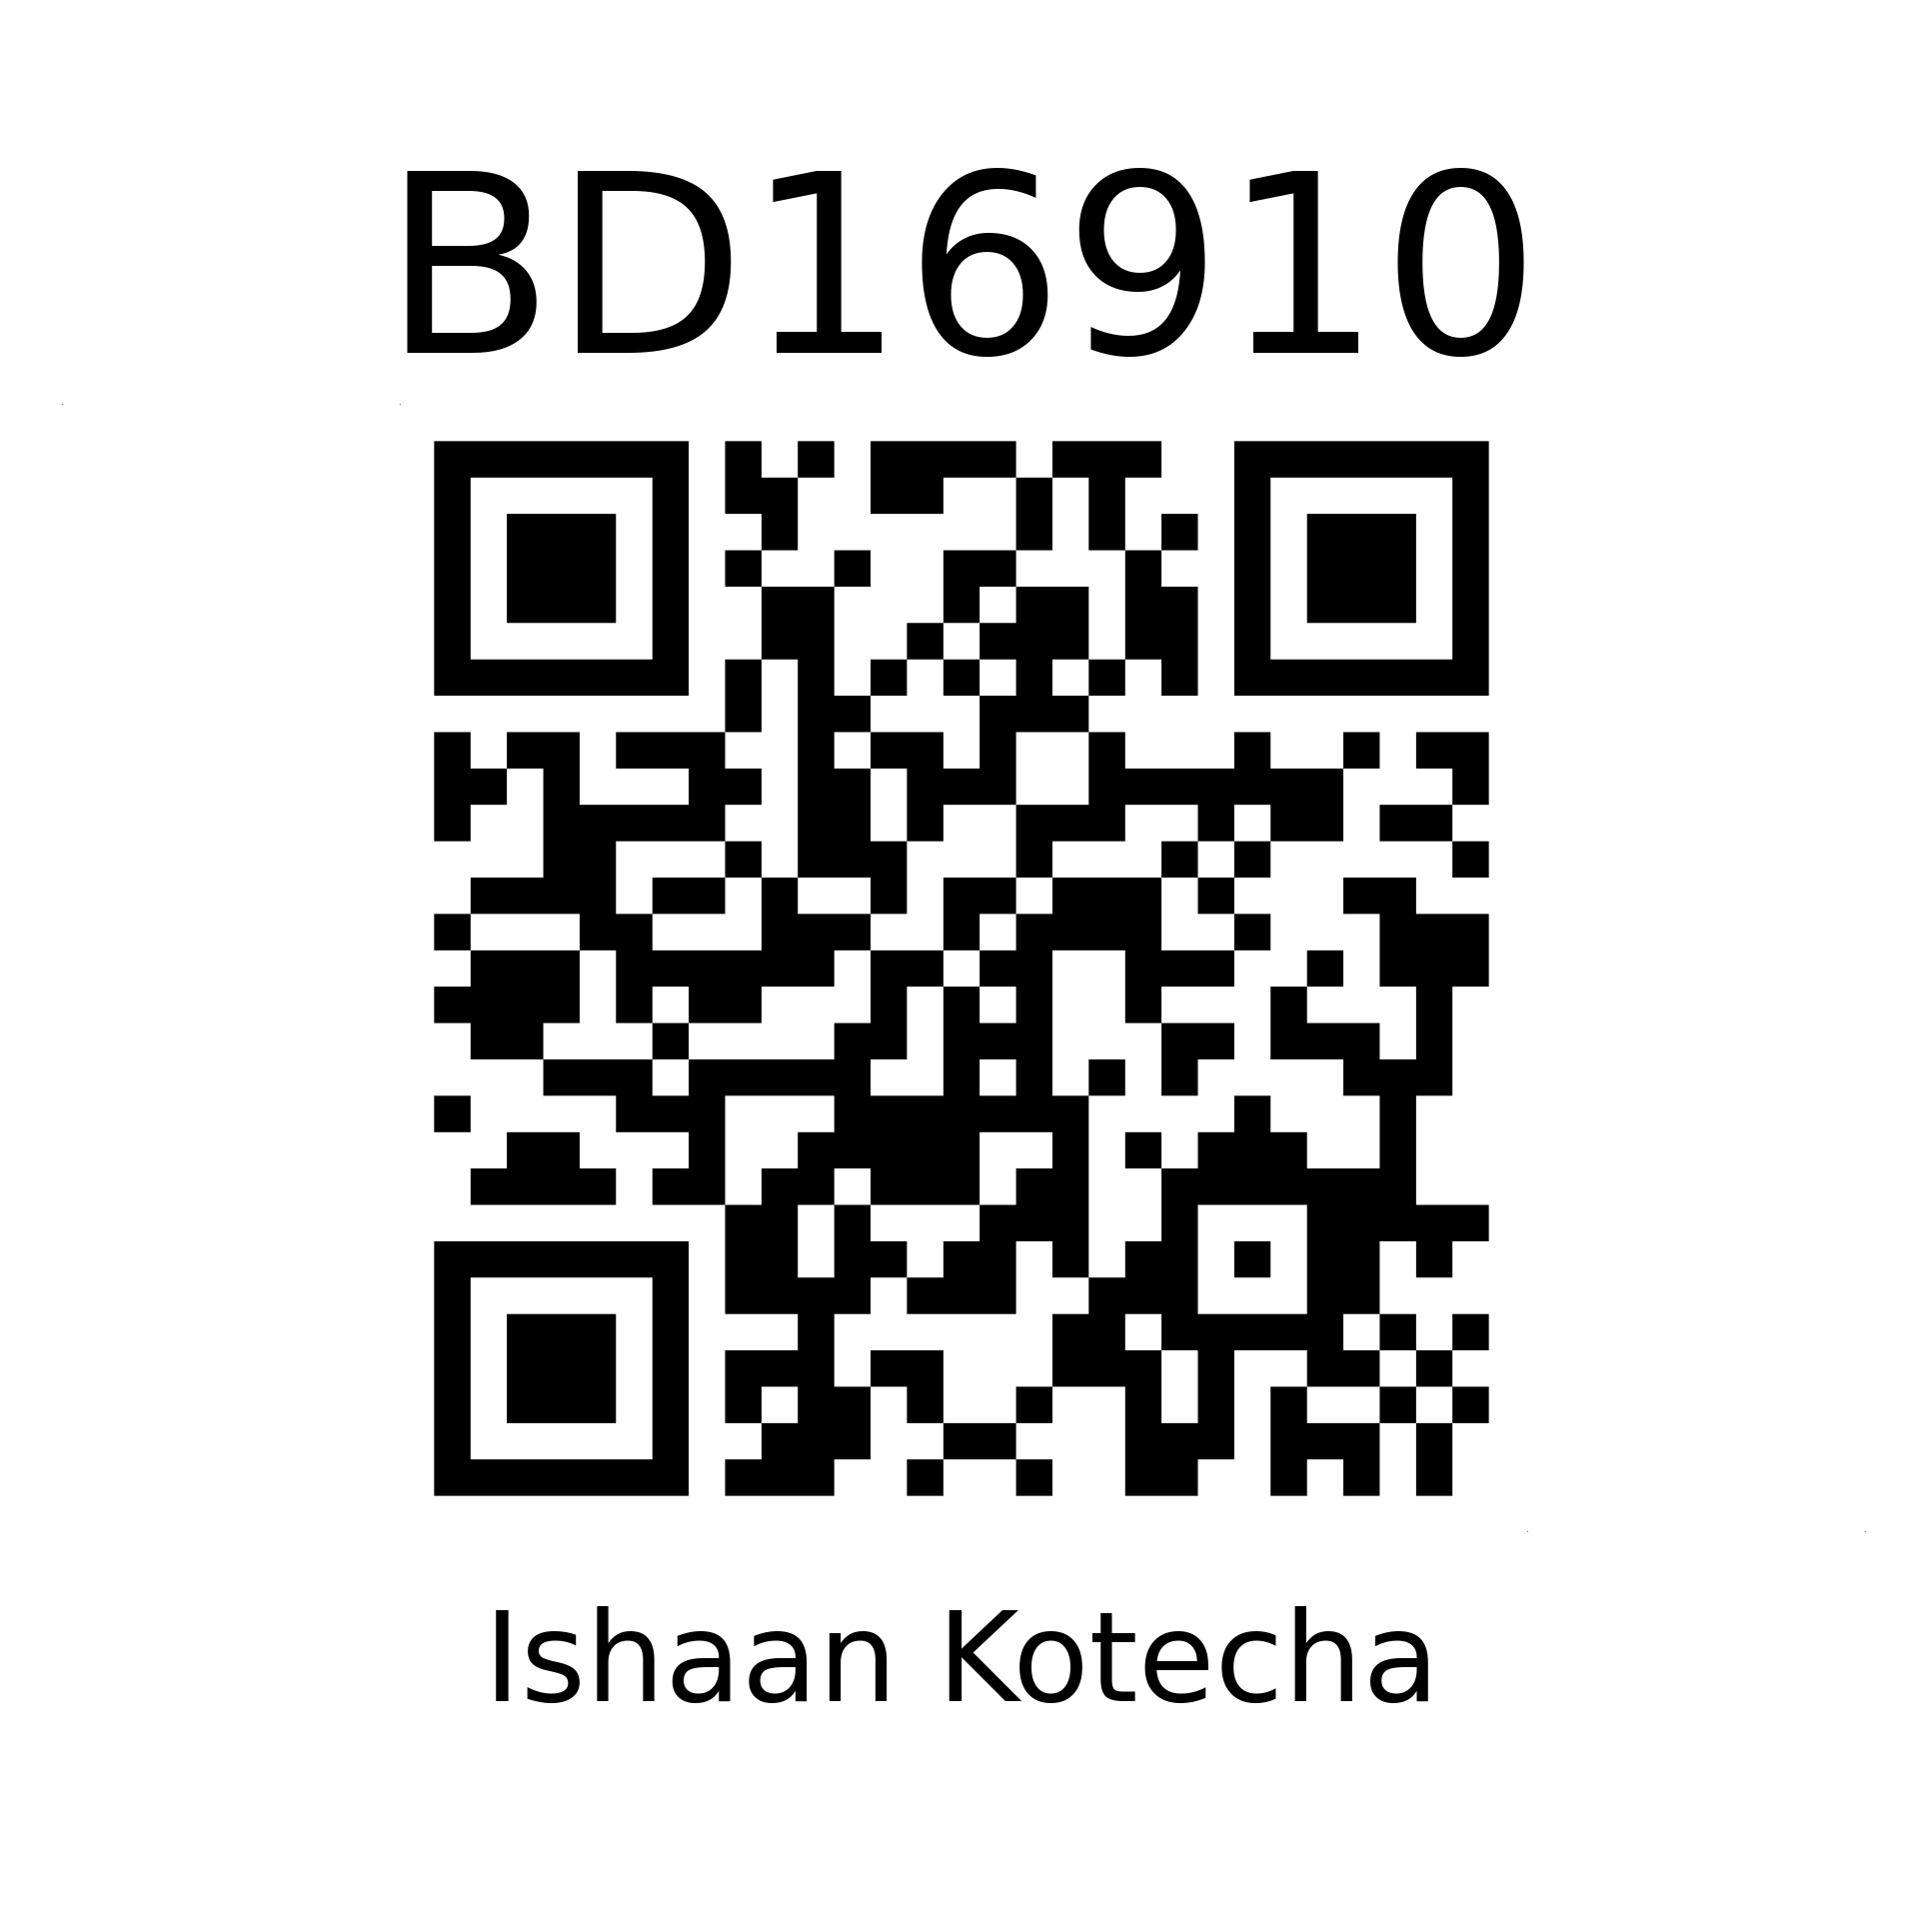

<Figure size 244.094x244.094 with 0 Axes>

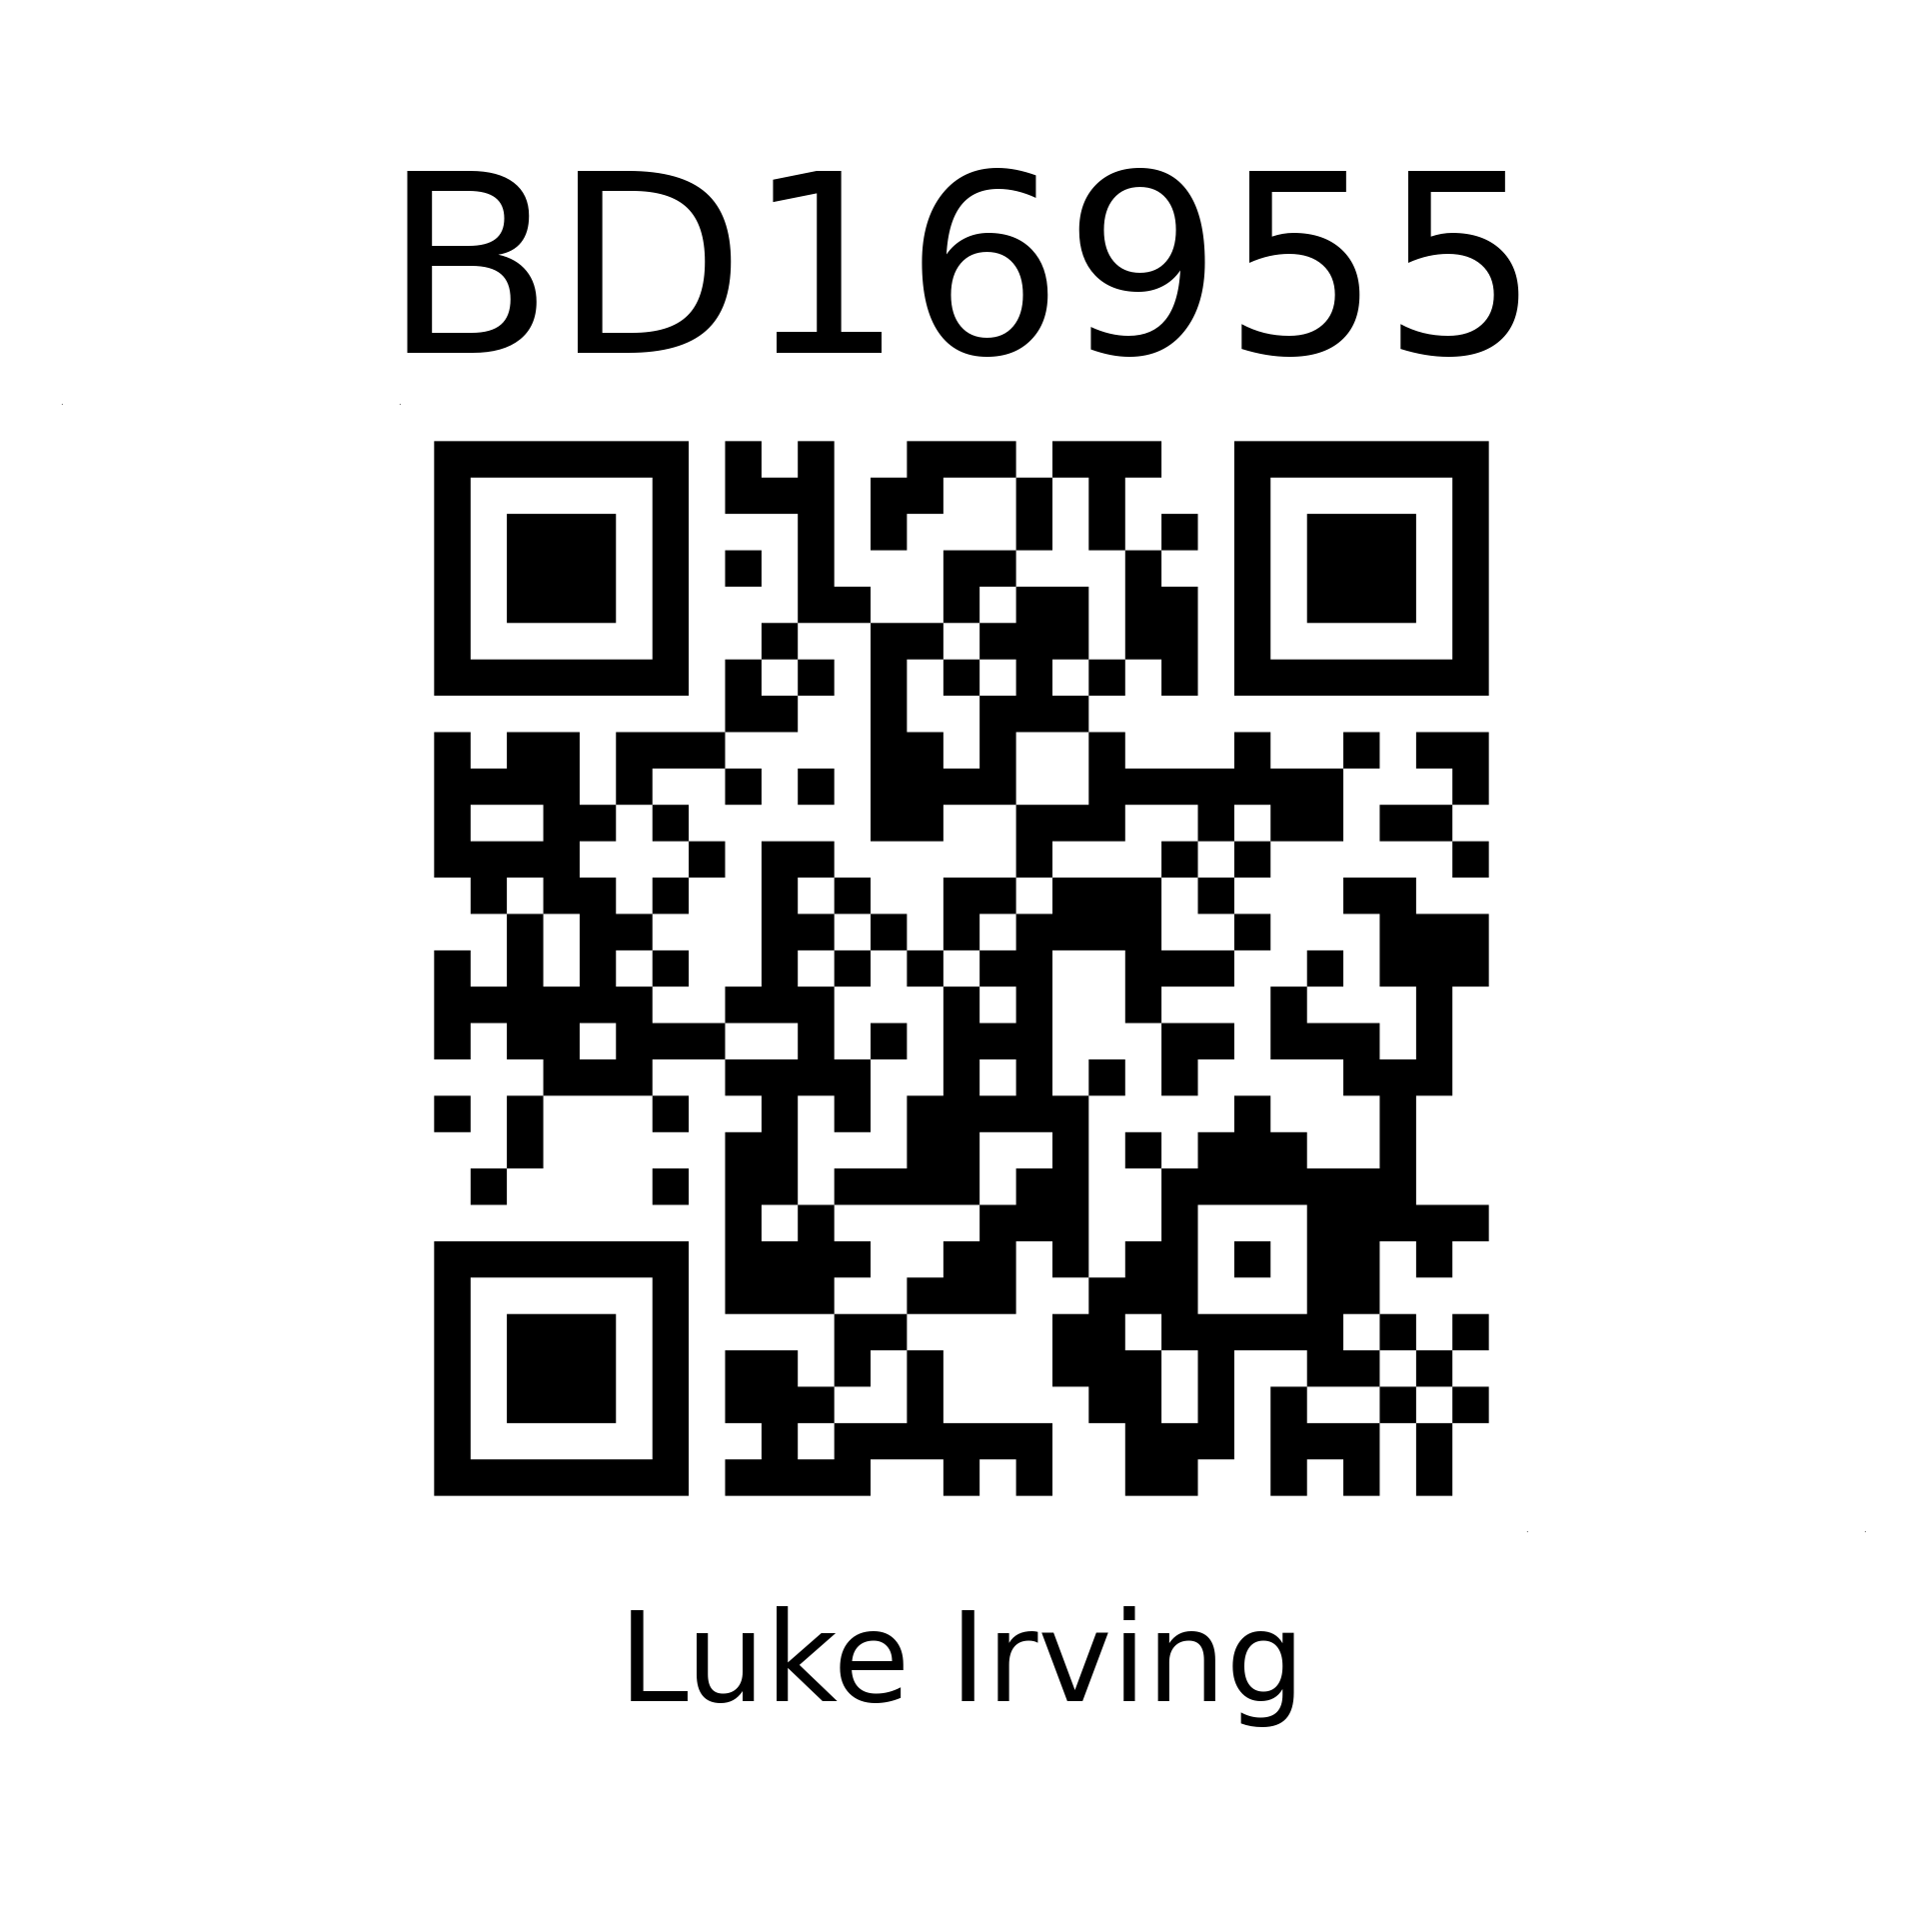

<Figure size 244.094x244.094 with 0 Axes>

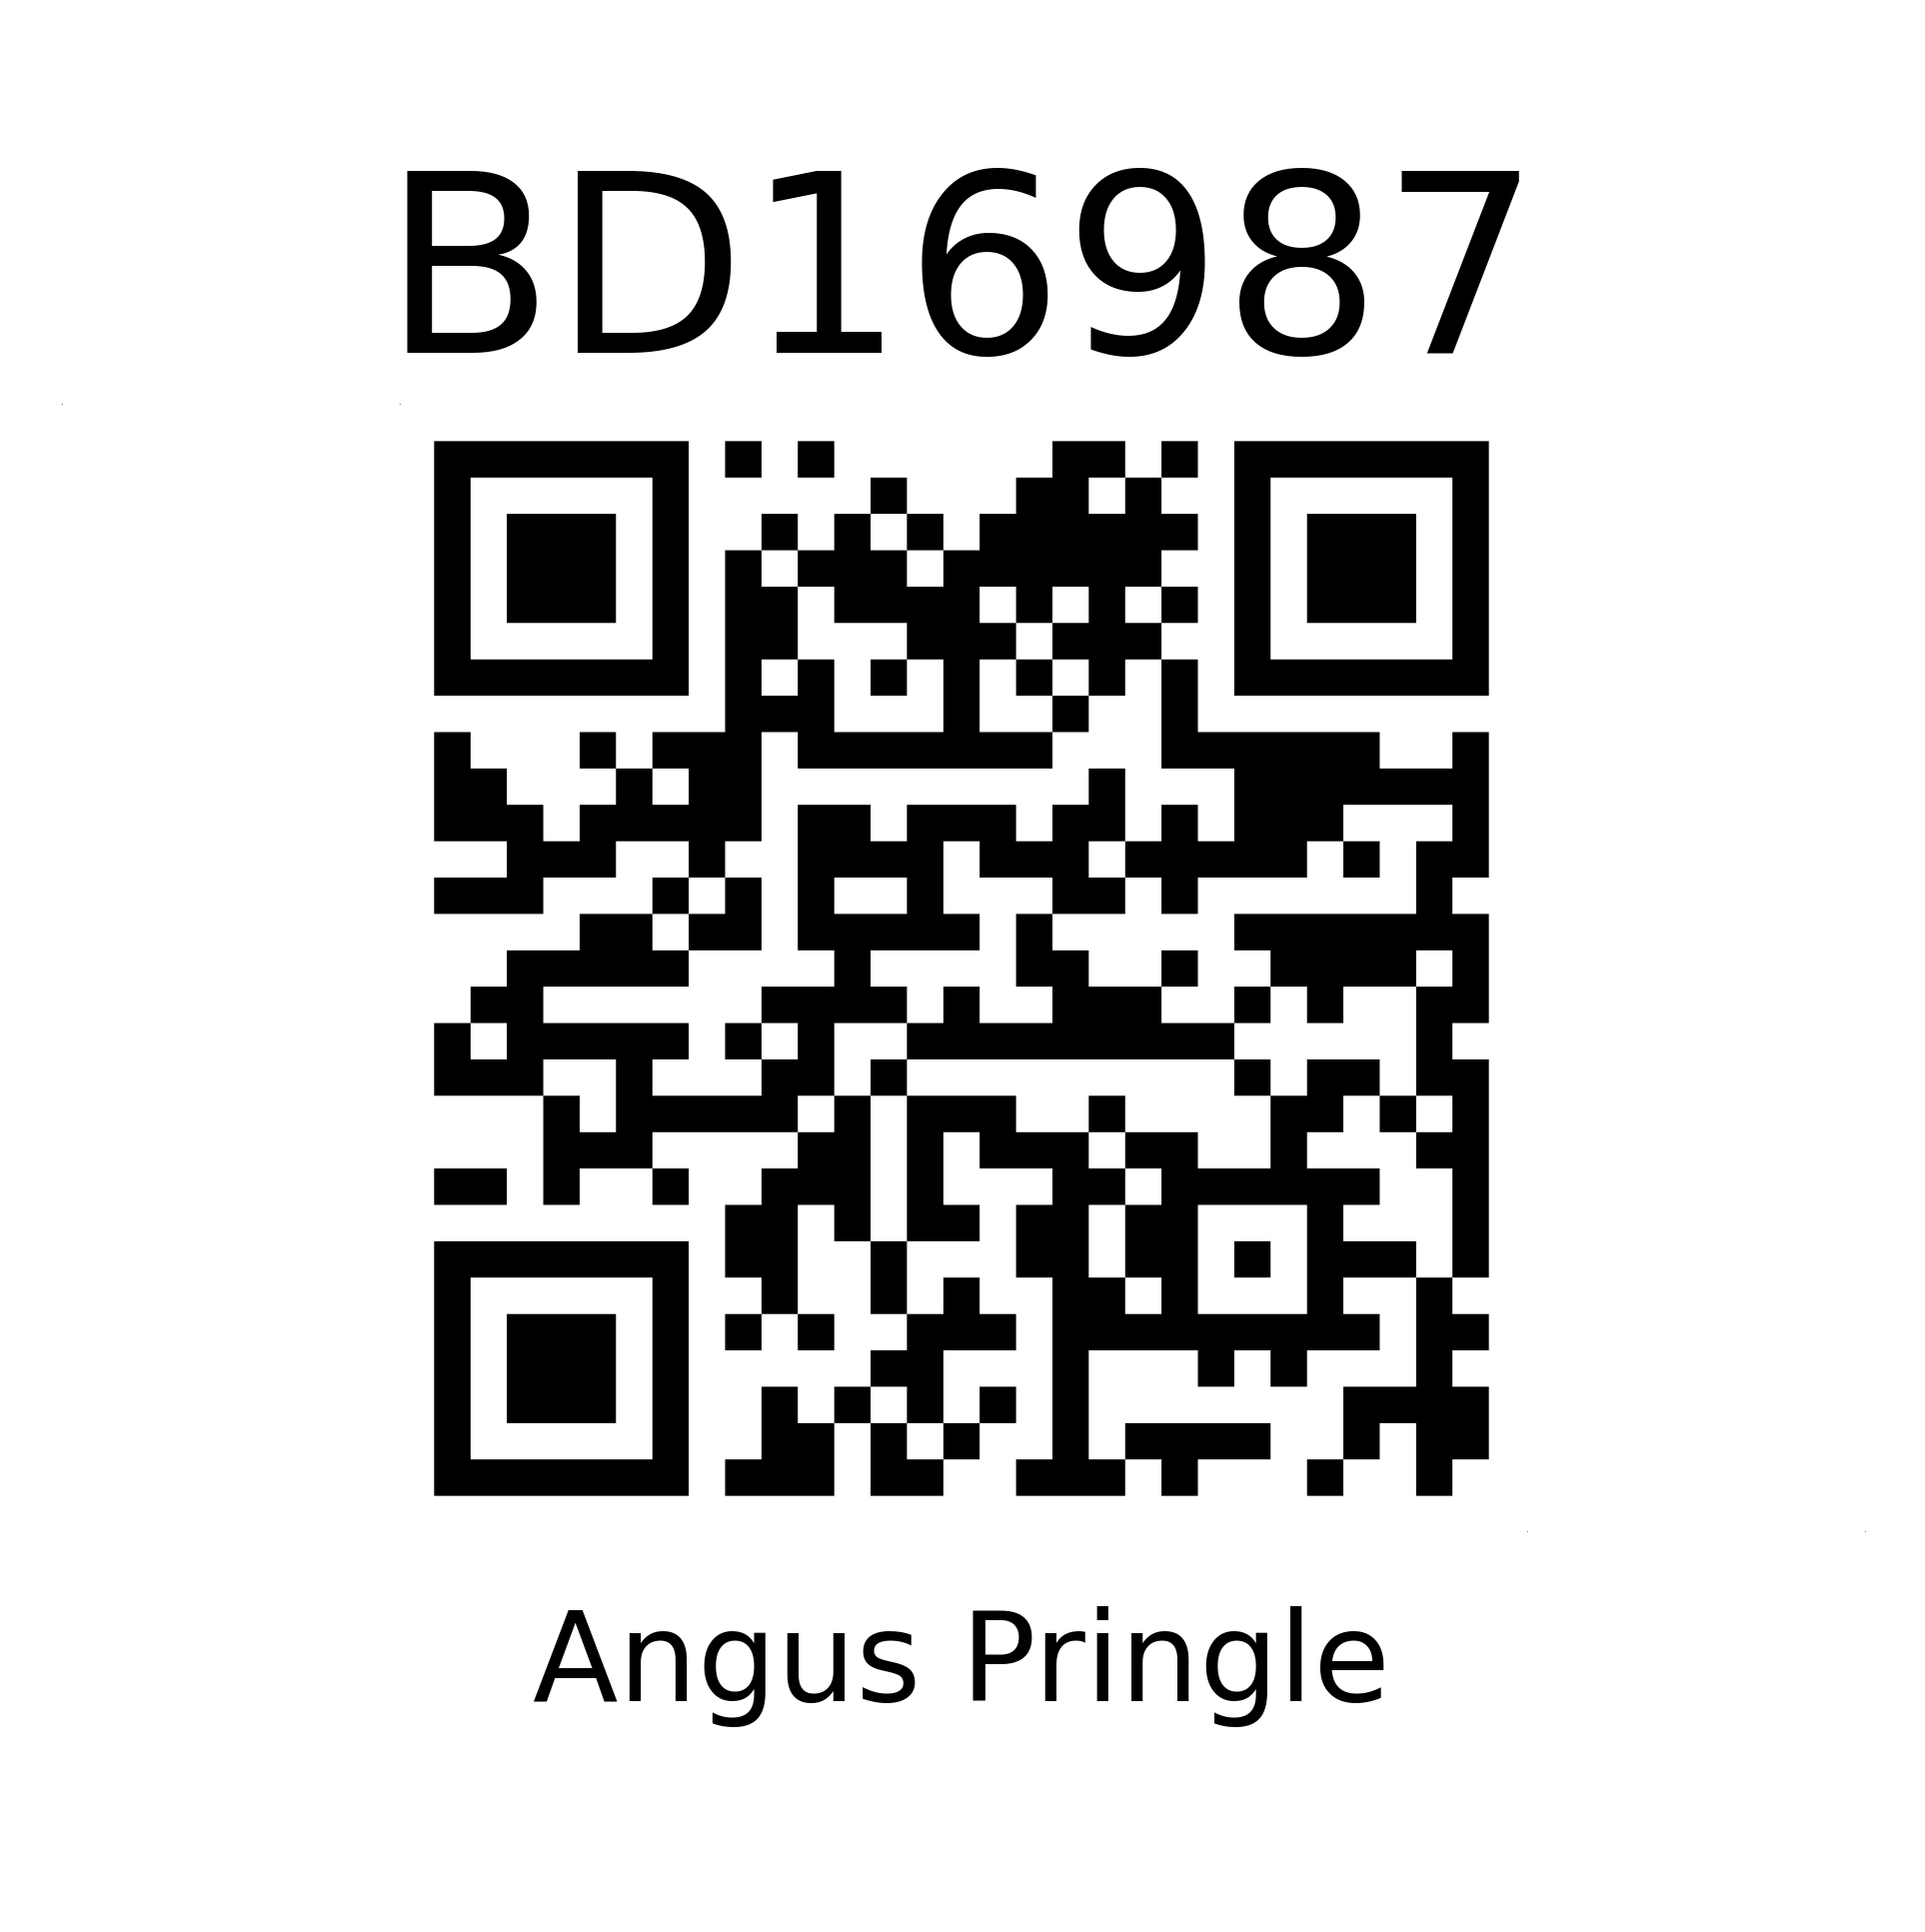

<Figure size 244.094x244.094 with 0 Axes>

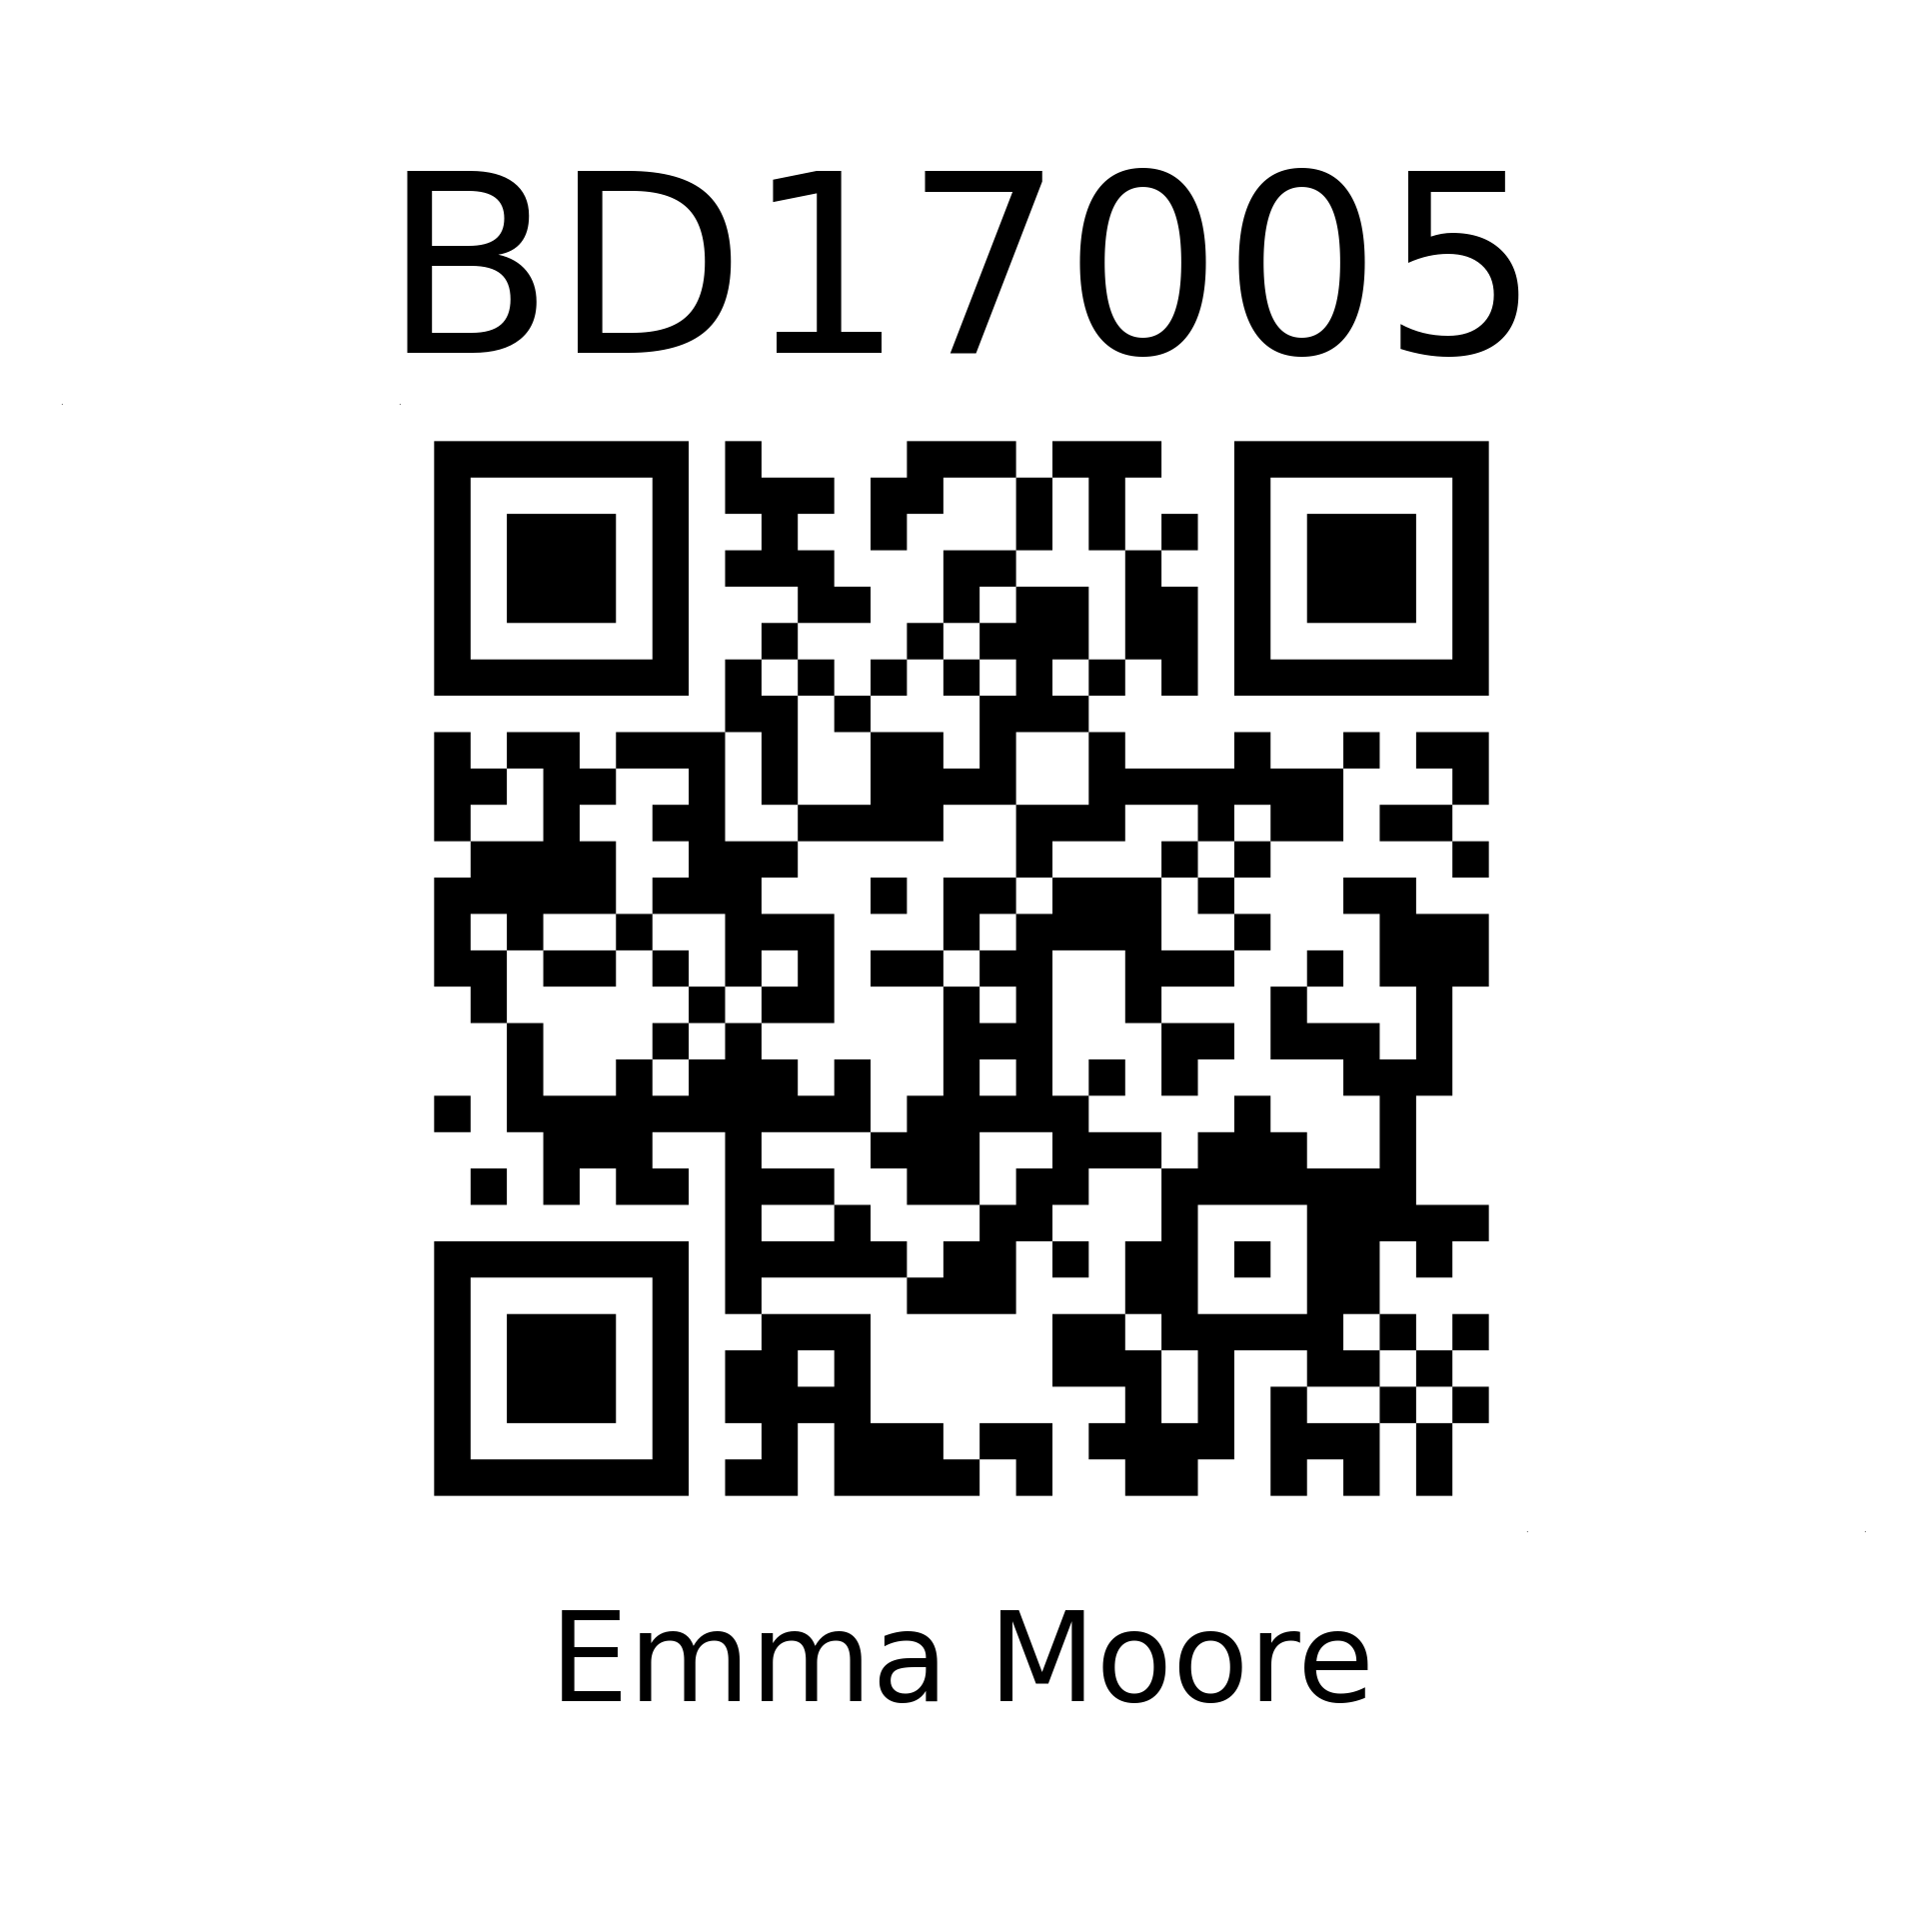

<Figure size 244.094x244.094 with 0 Axes>

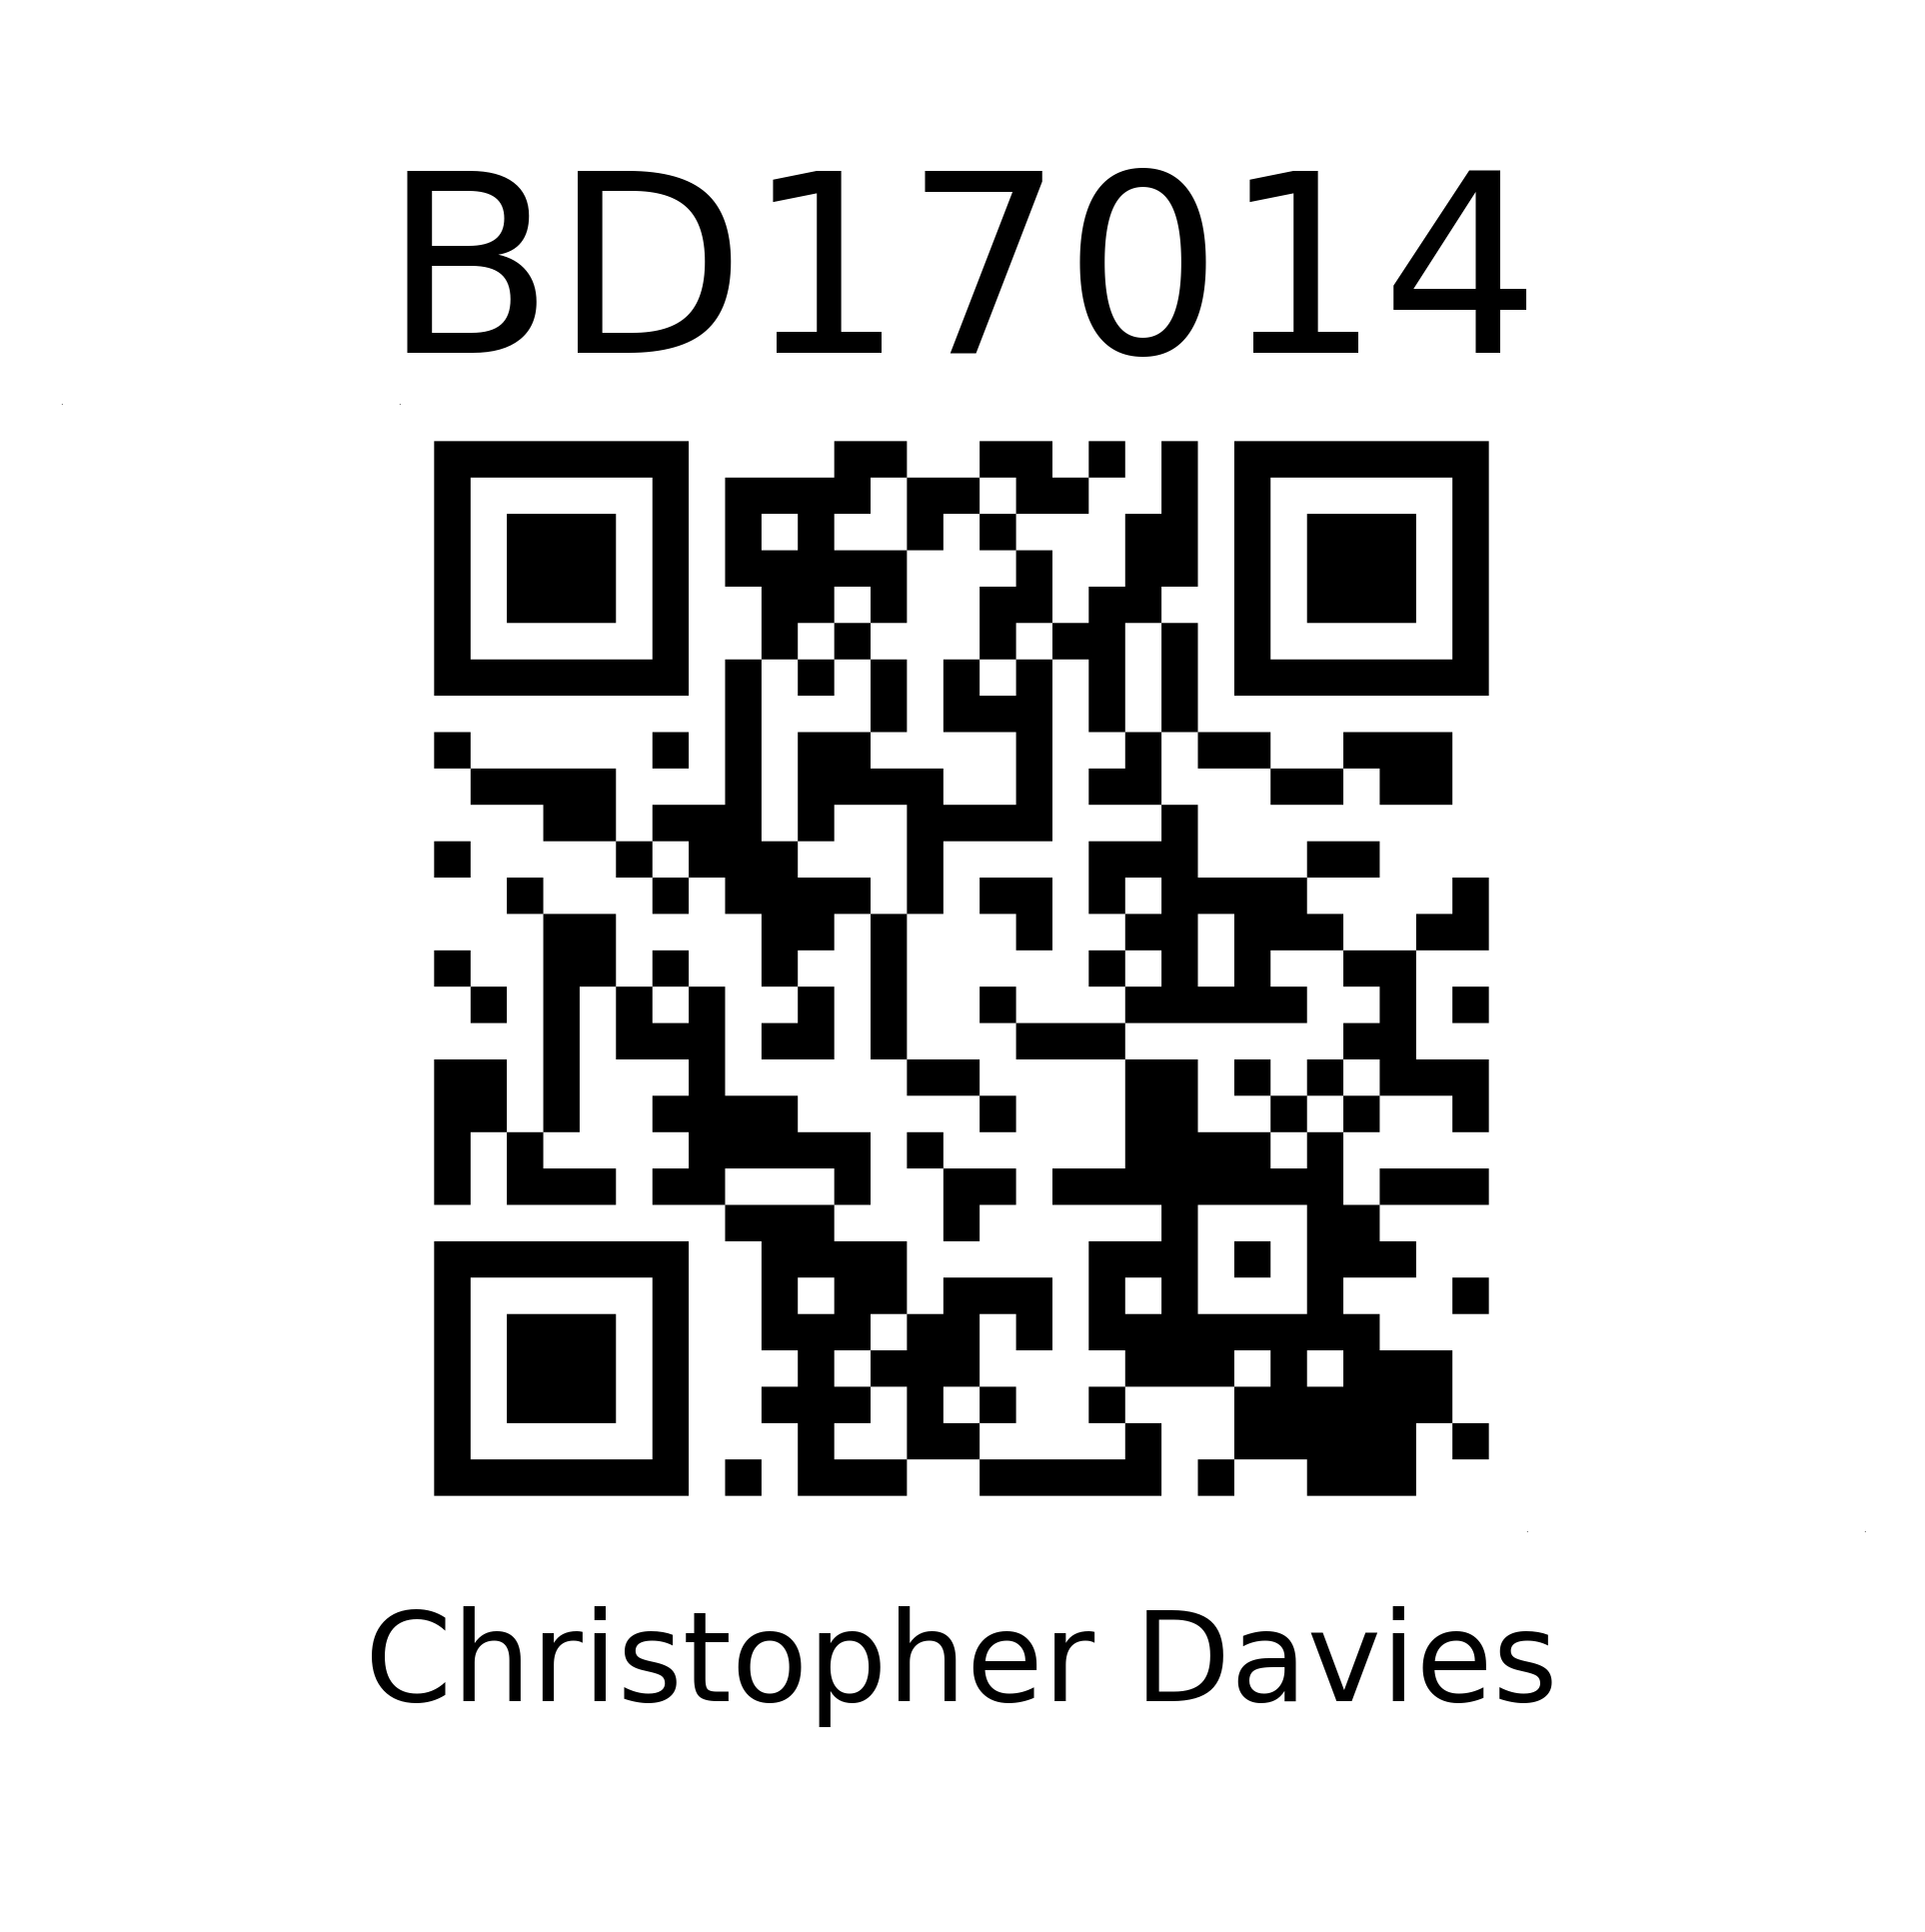

<Figure size 244.094x244.094 with 0 Axes>

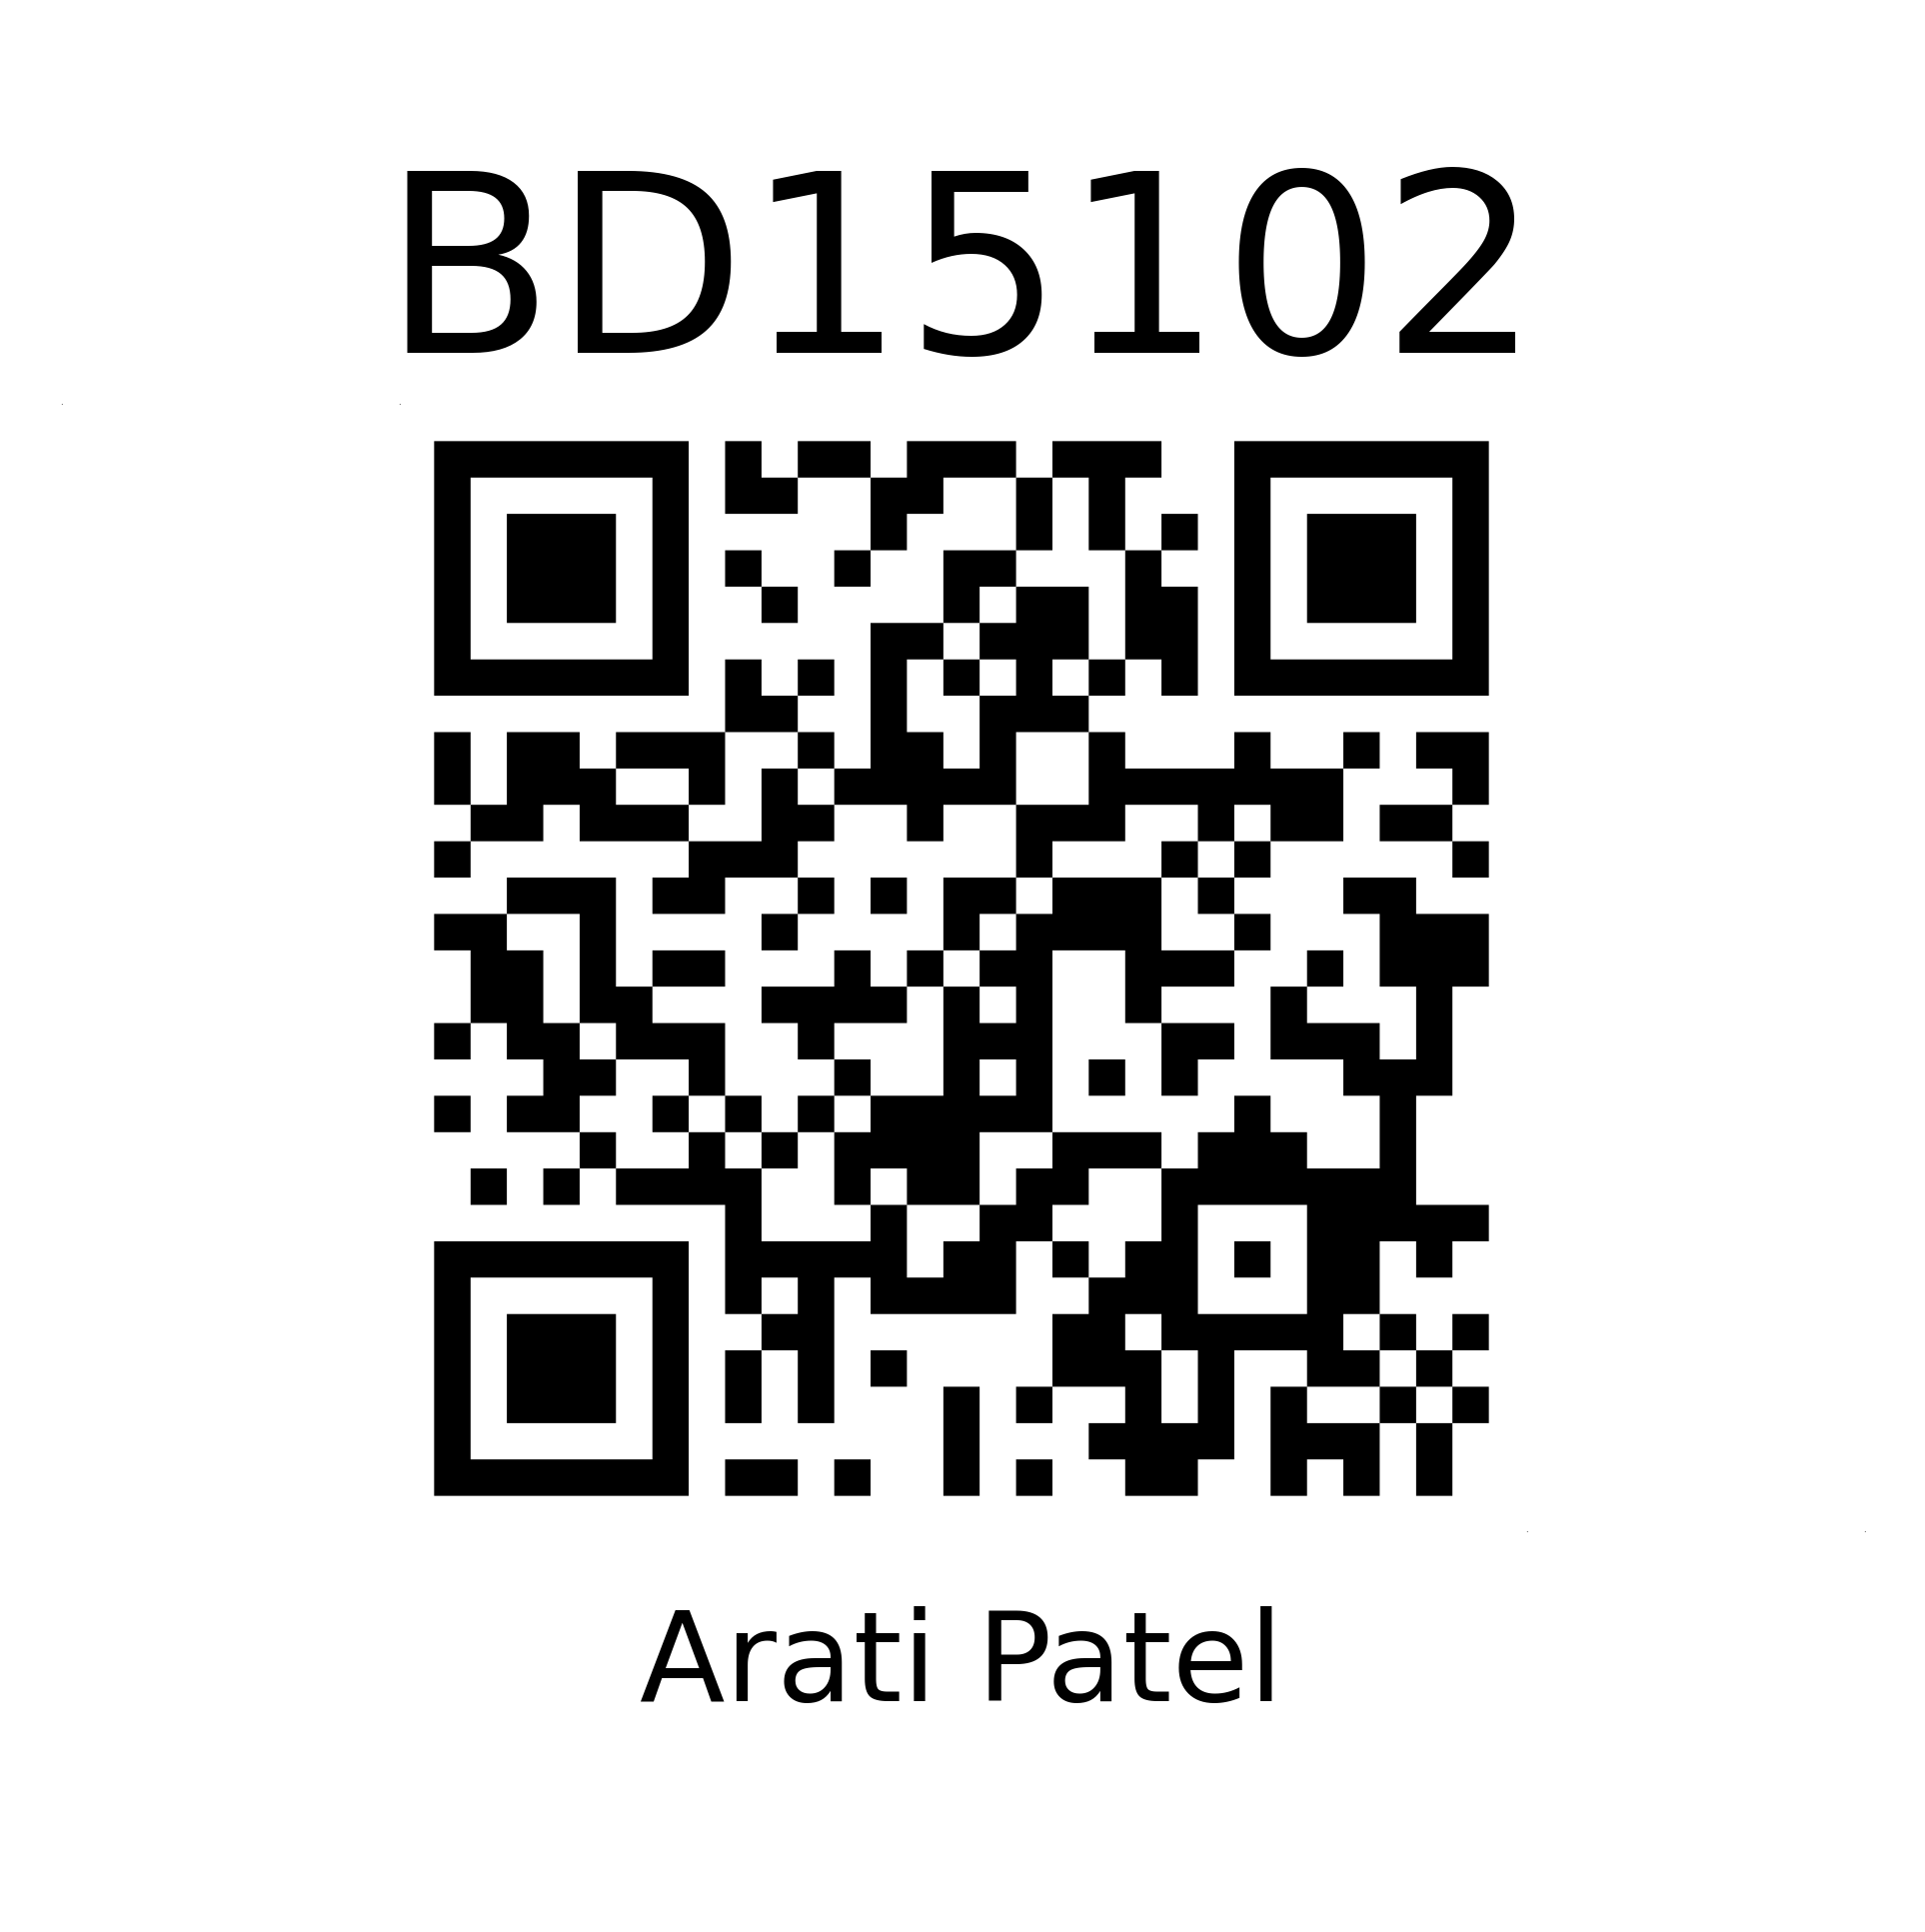

<Figure size 244.094x244.094 with 0 Axes>

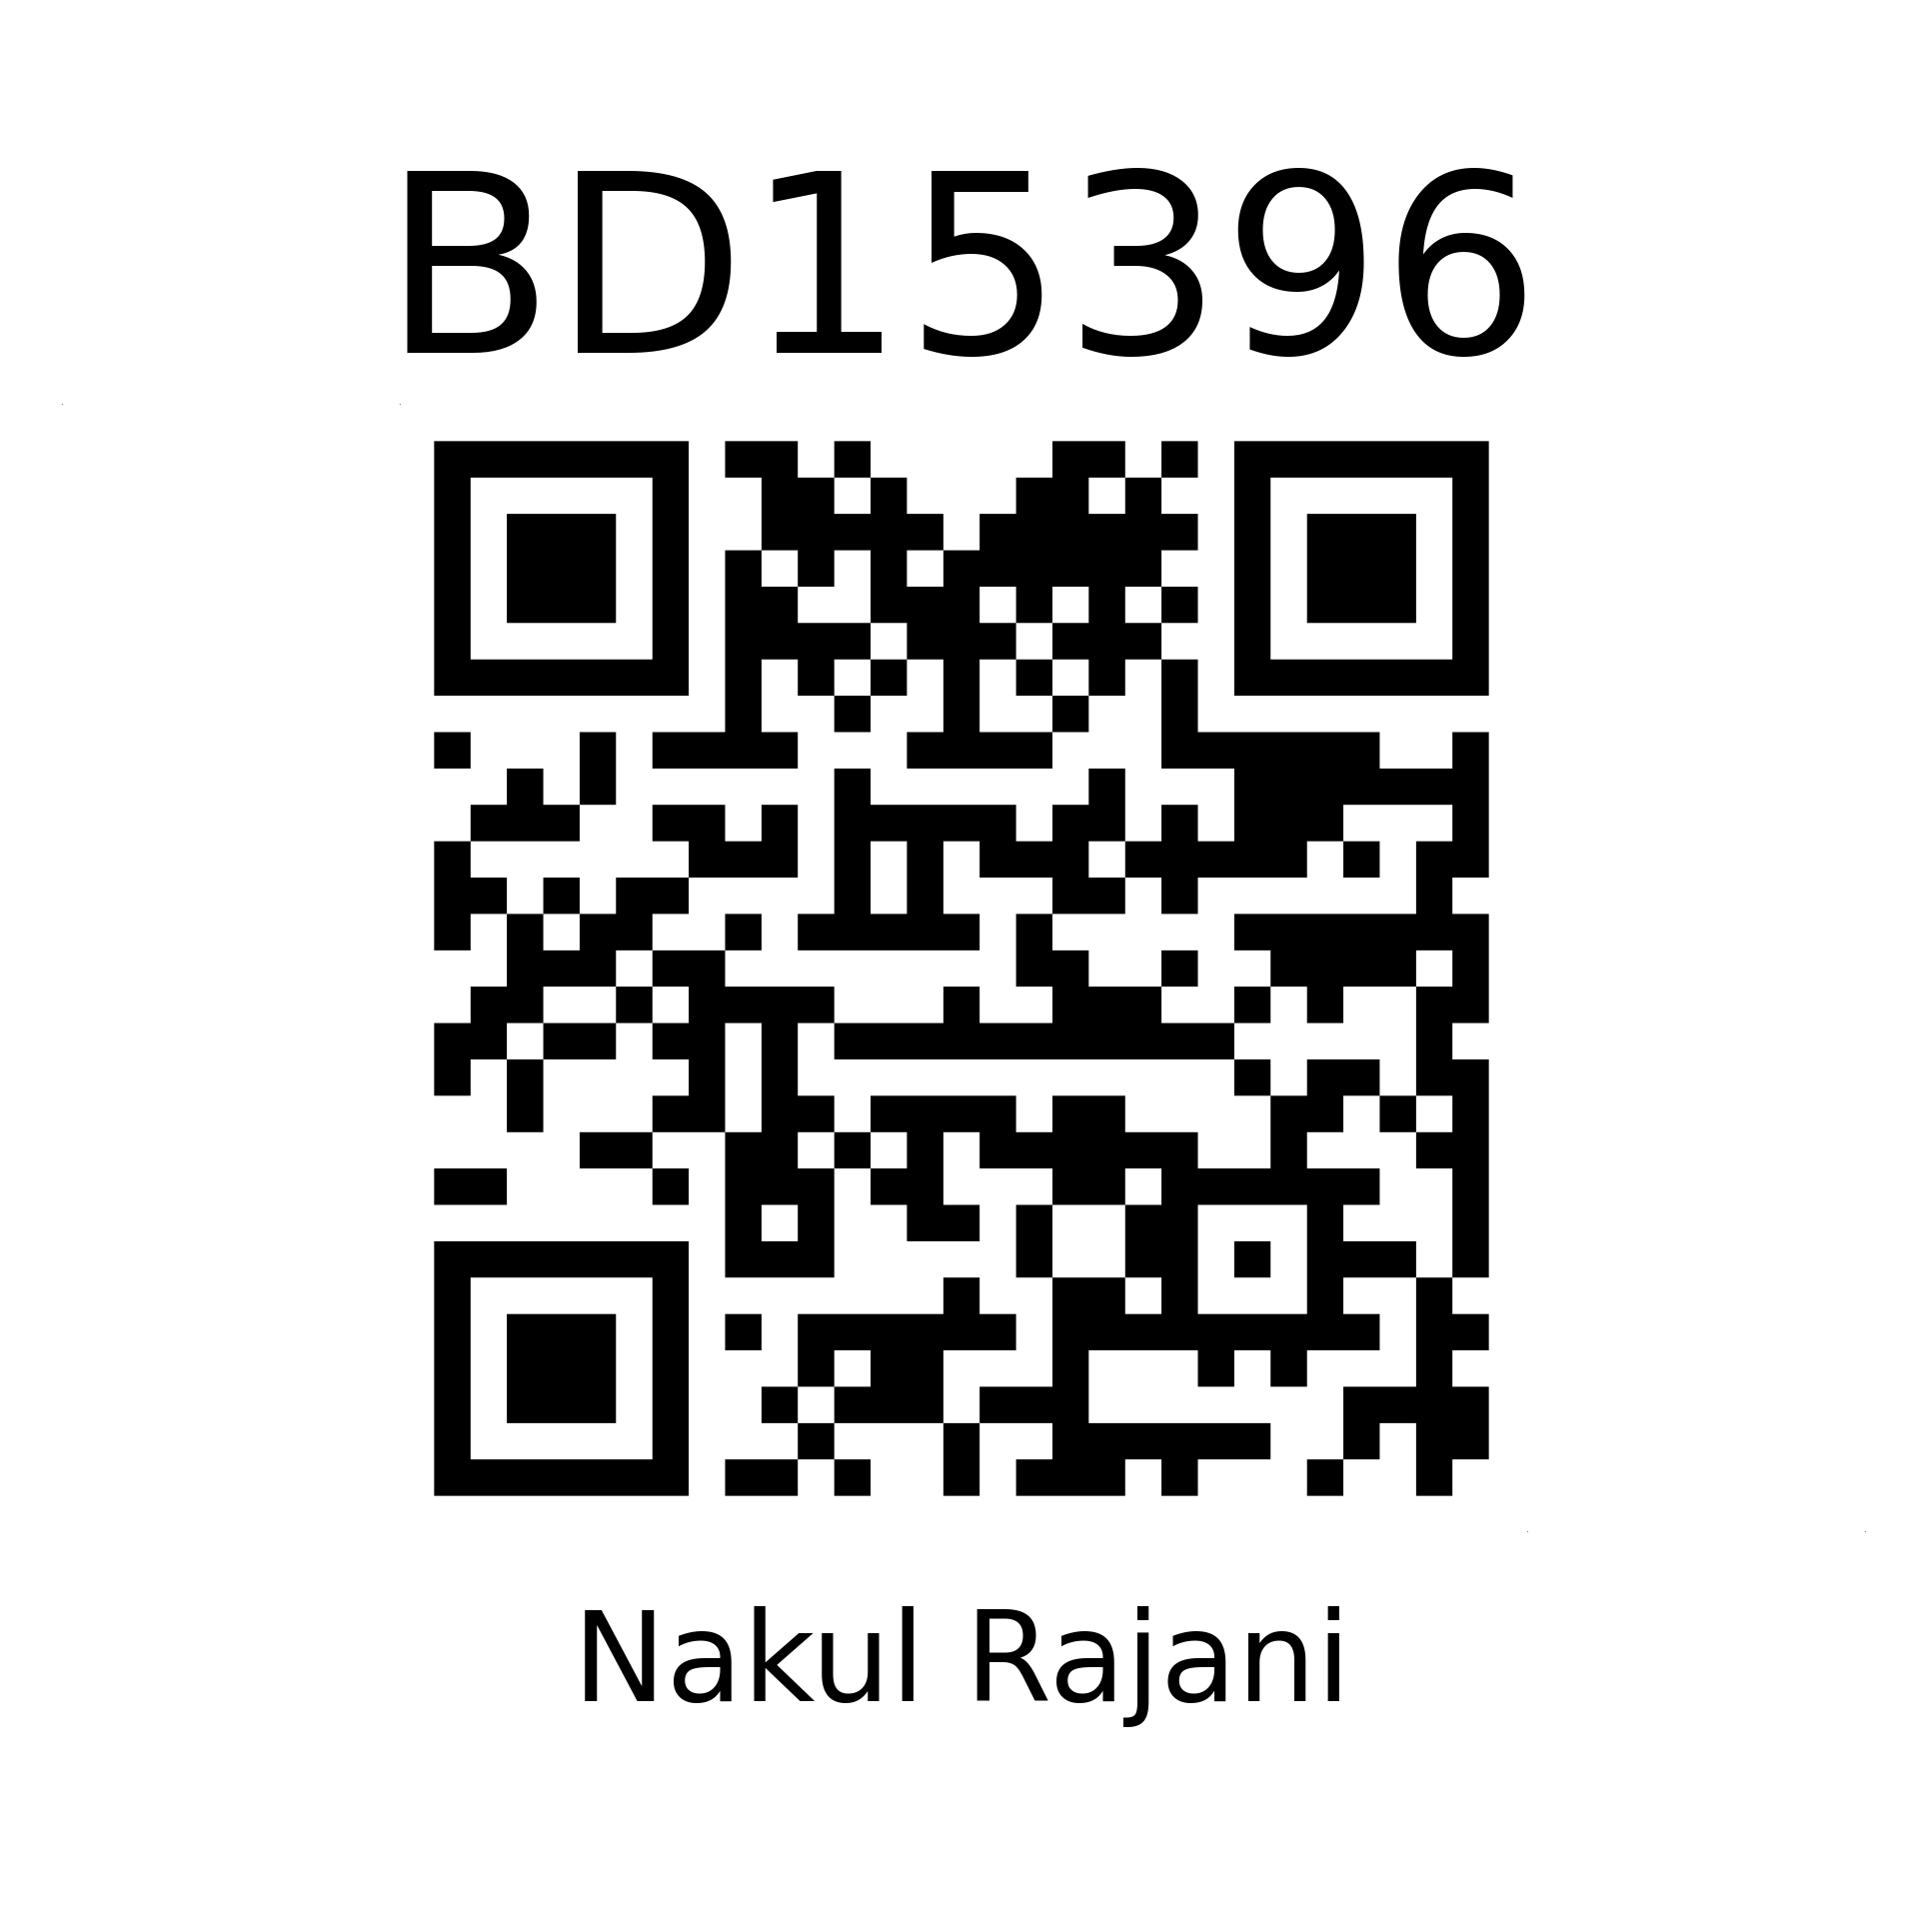

<Figure size 244.094x244.094 with 0 Axes>

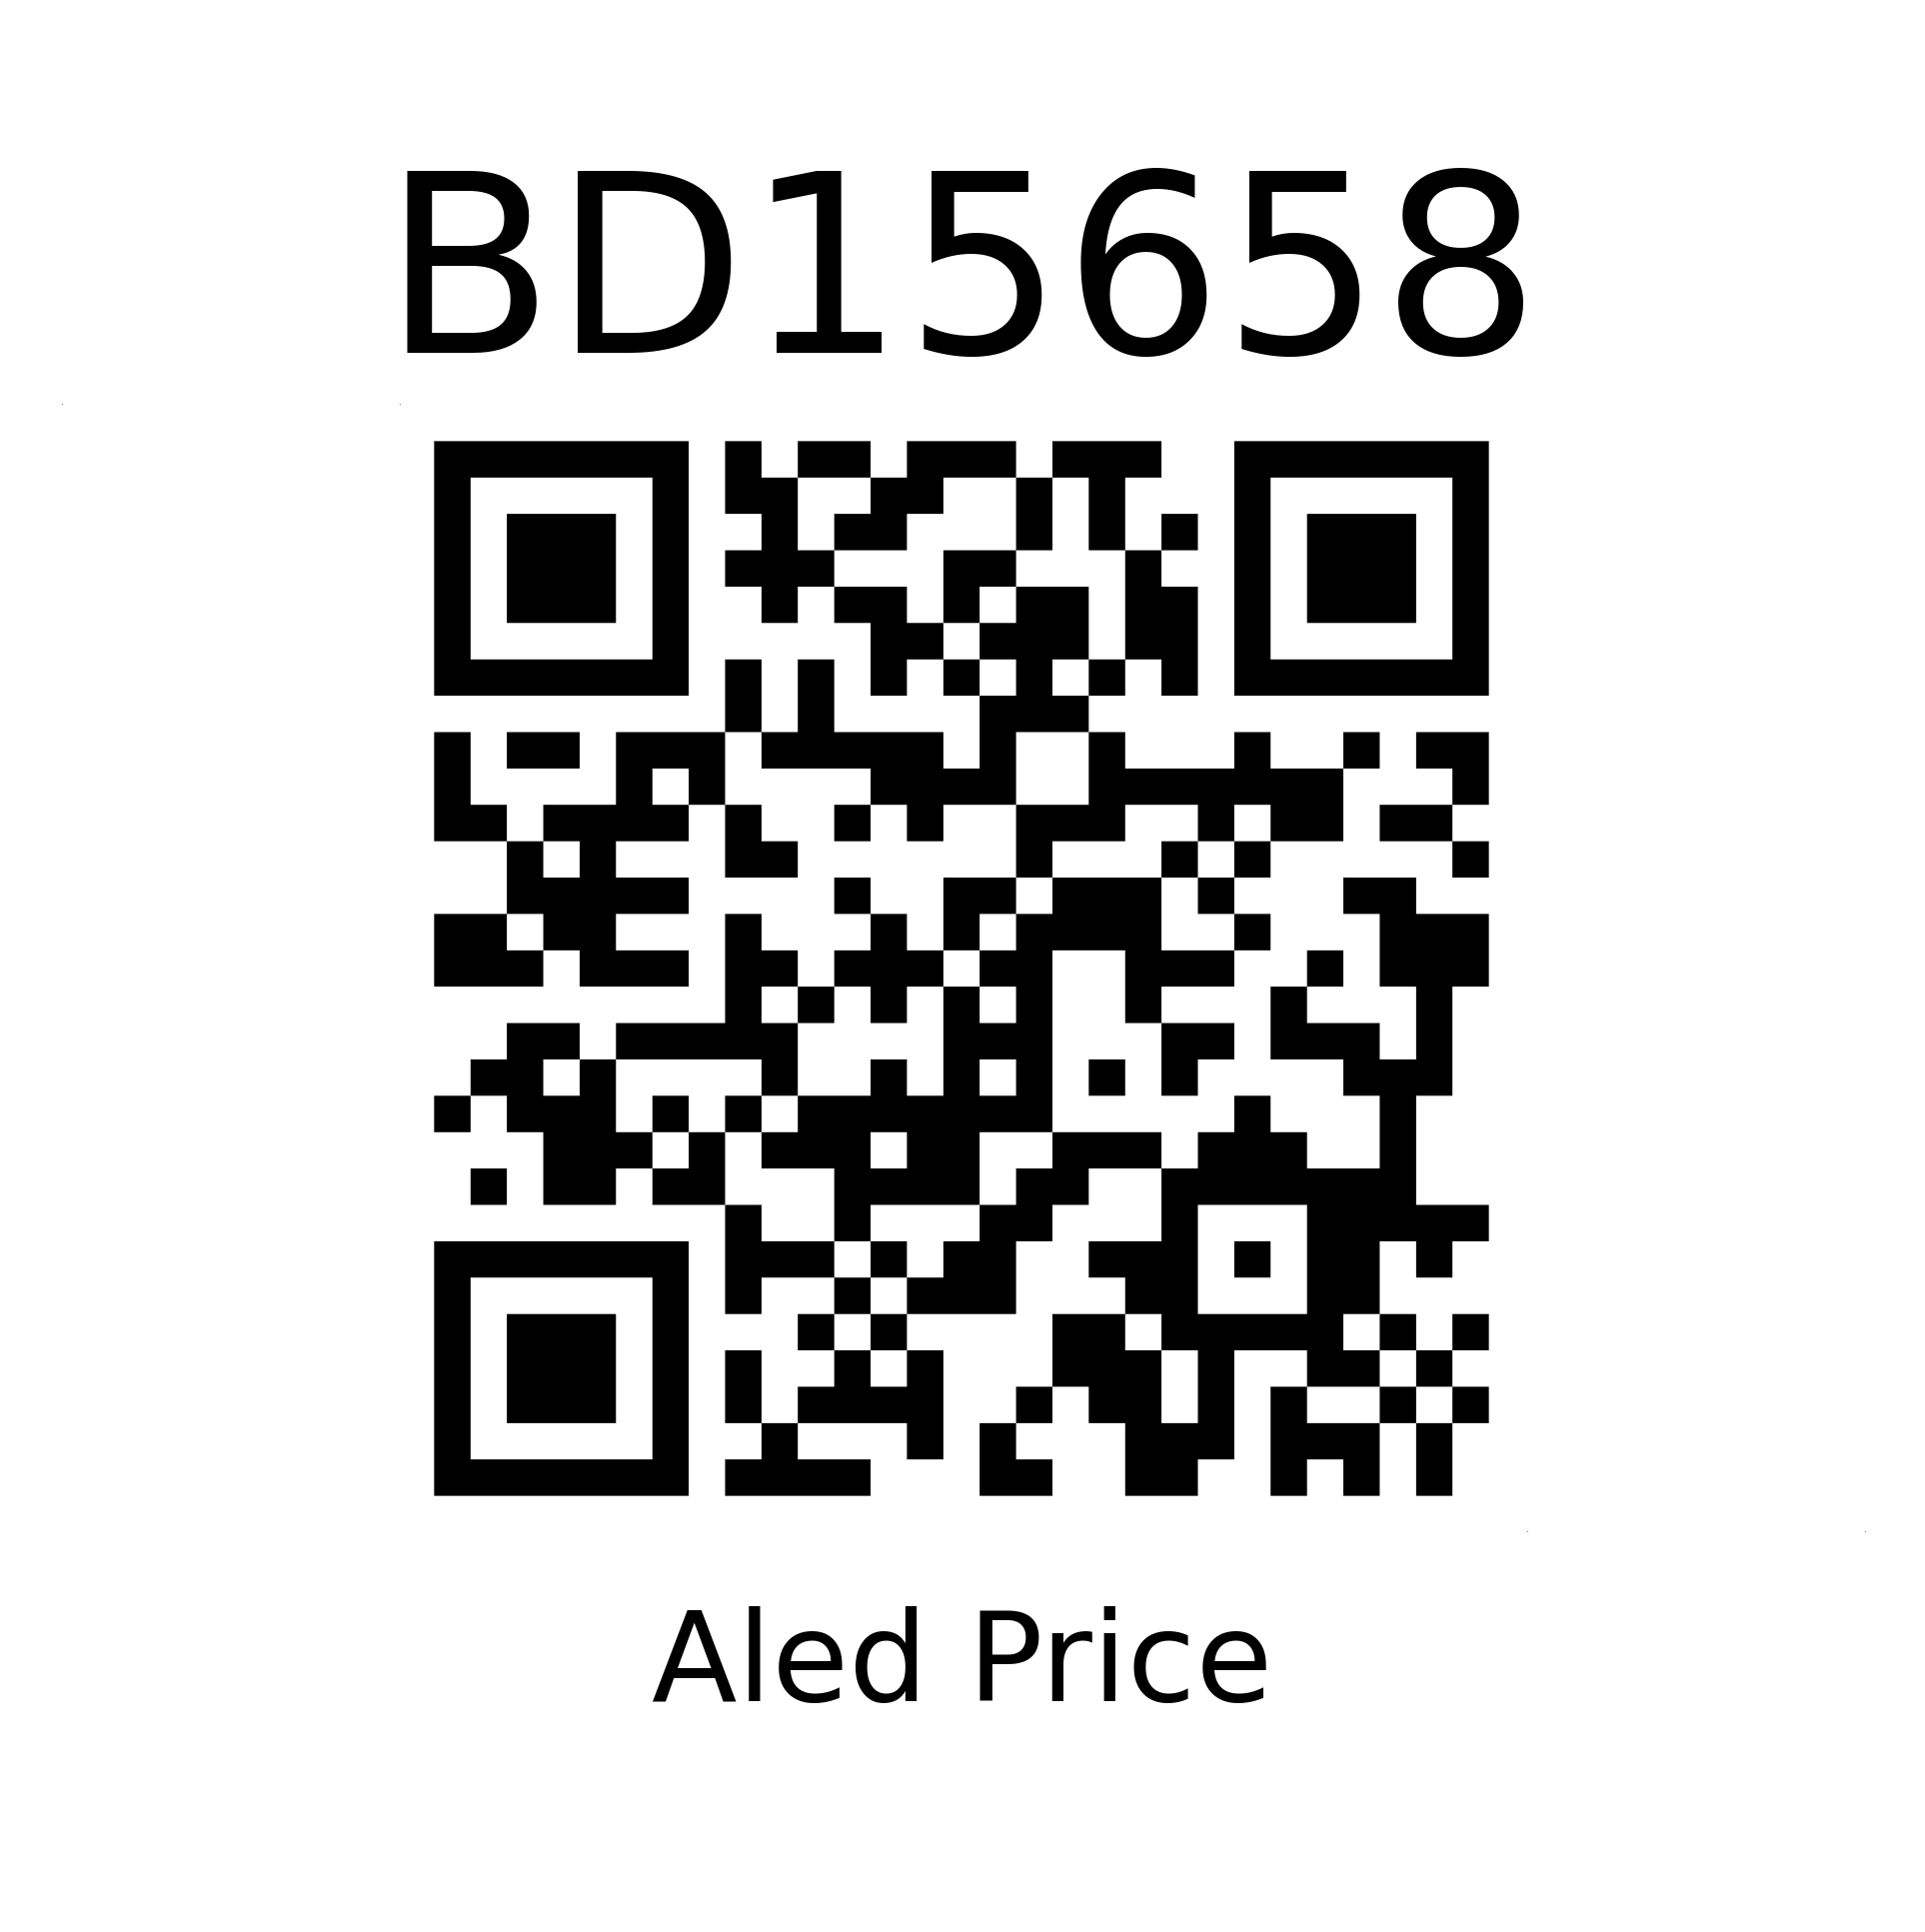

<Figure size 244.094x244.094 with 0 Axes>

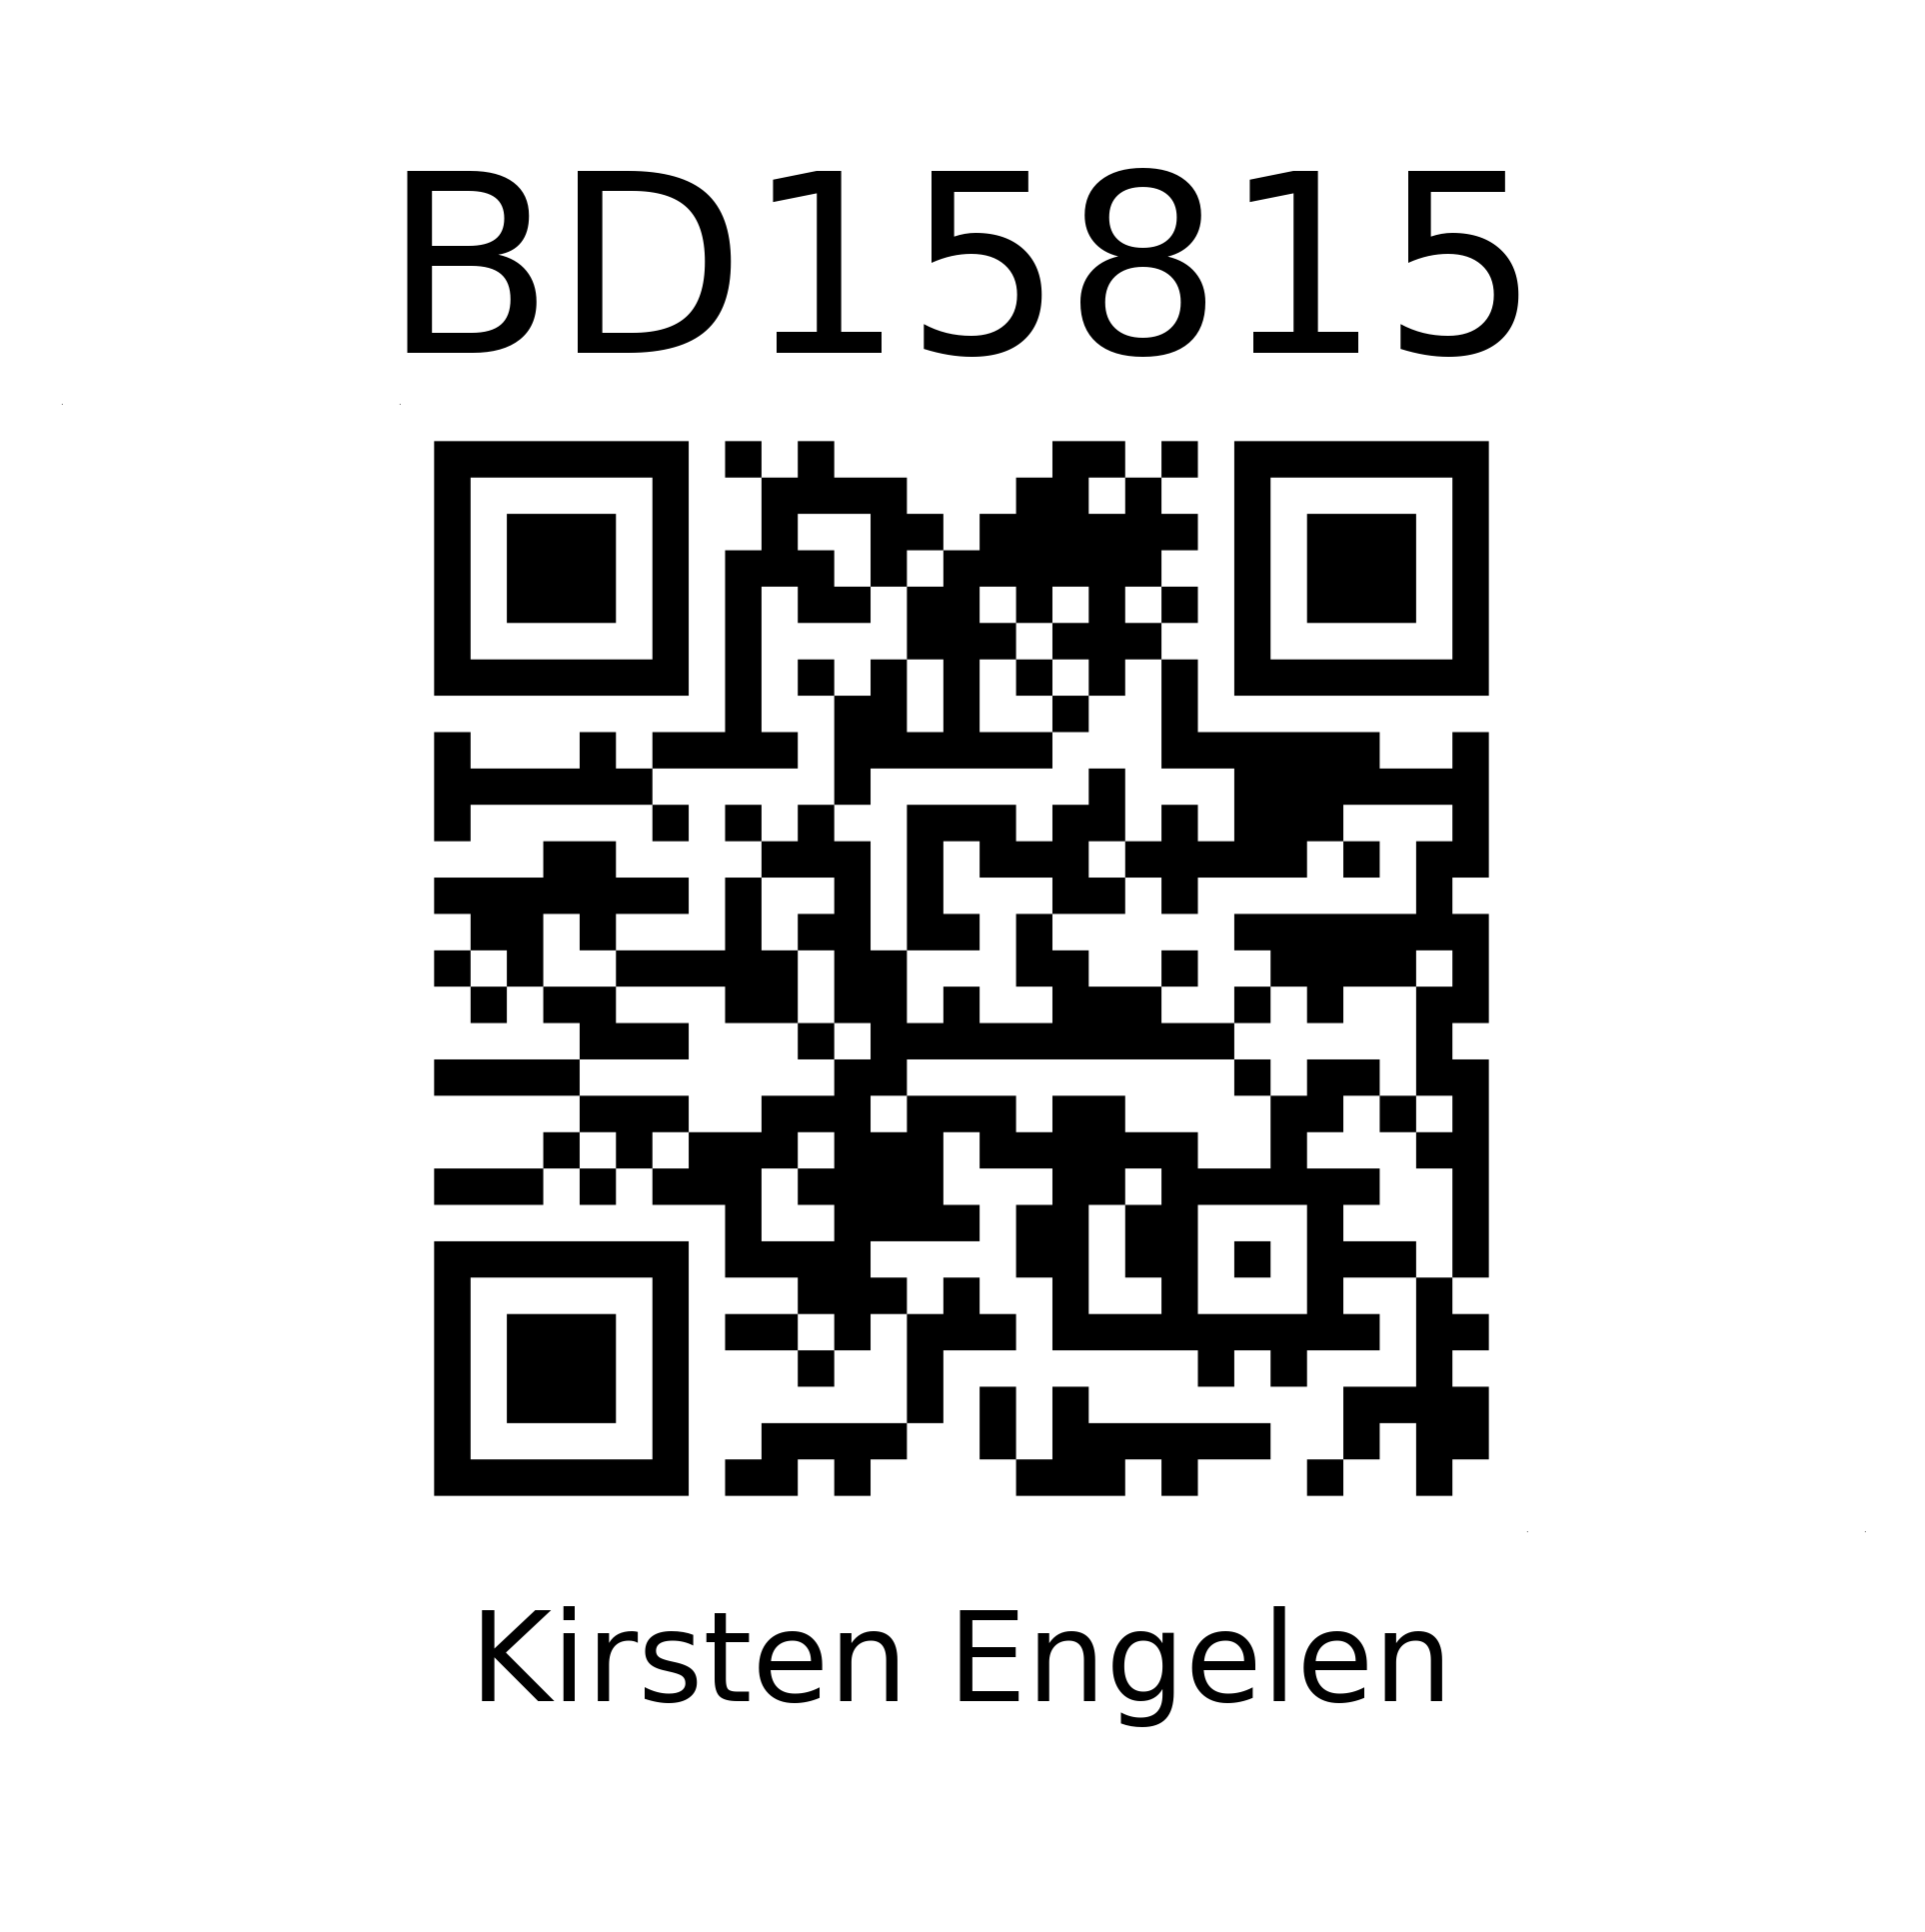

<Figure size 244.094x244.094 with 0 Axes>

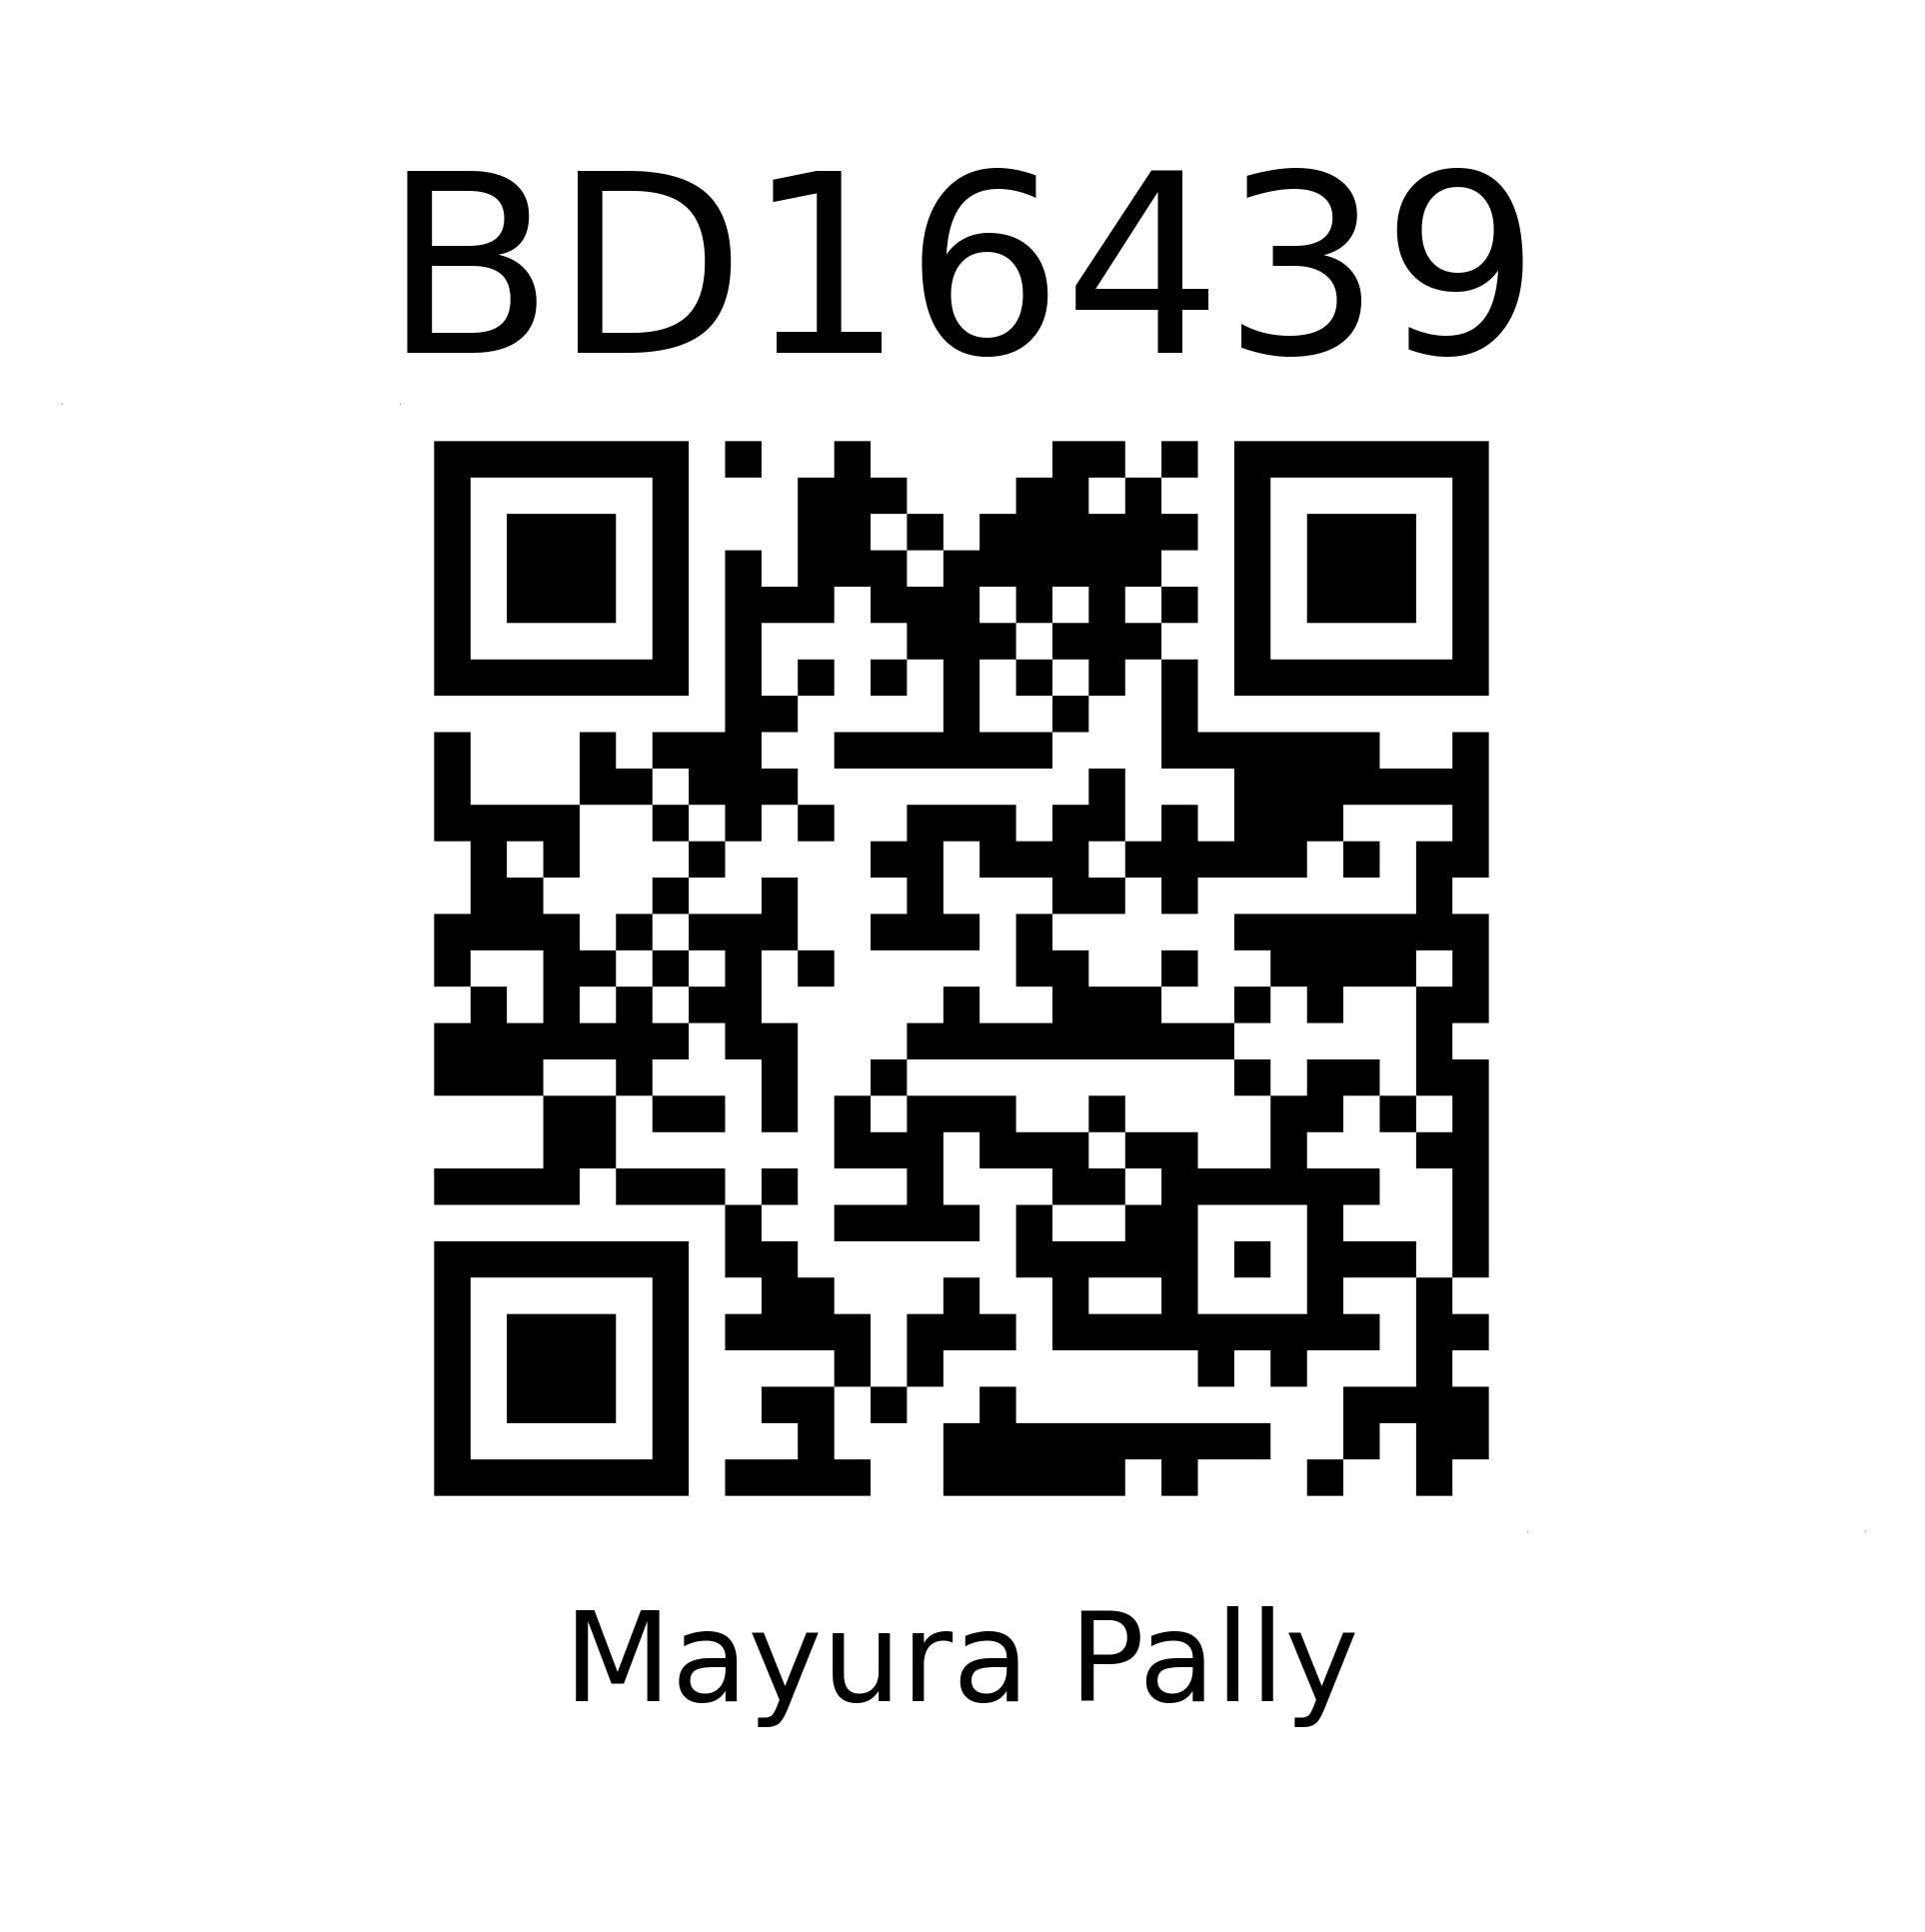

<Figure size 244.094x244.094 with 0 Axes>

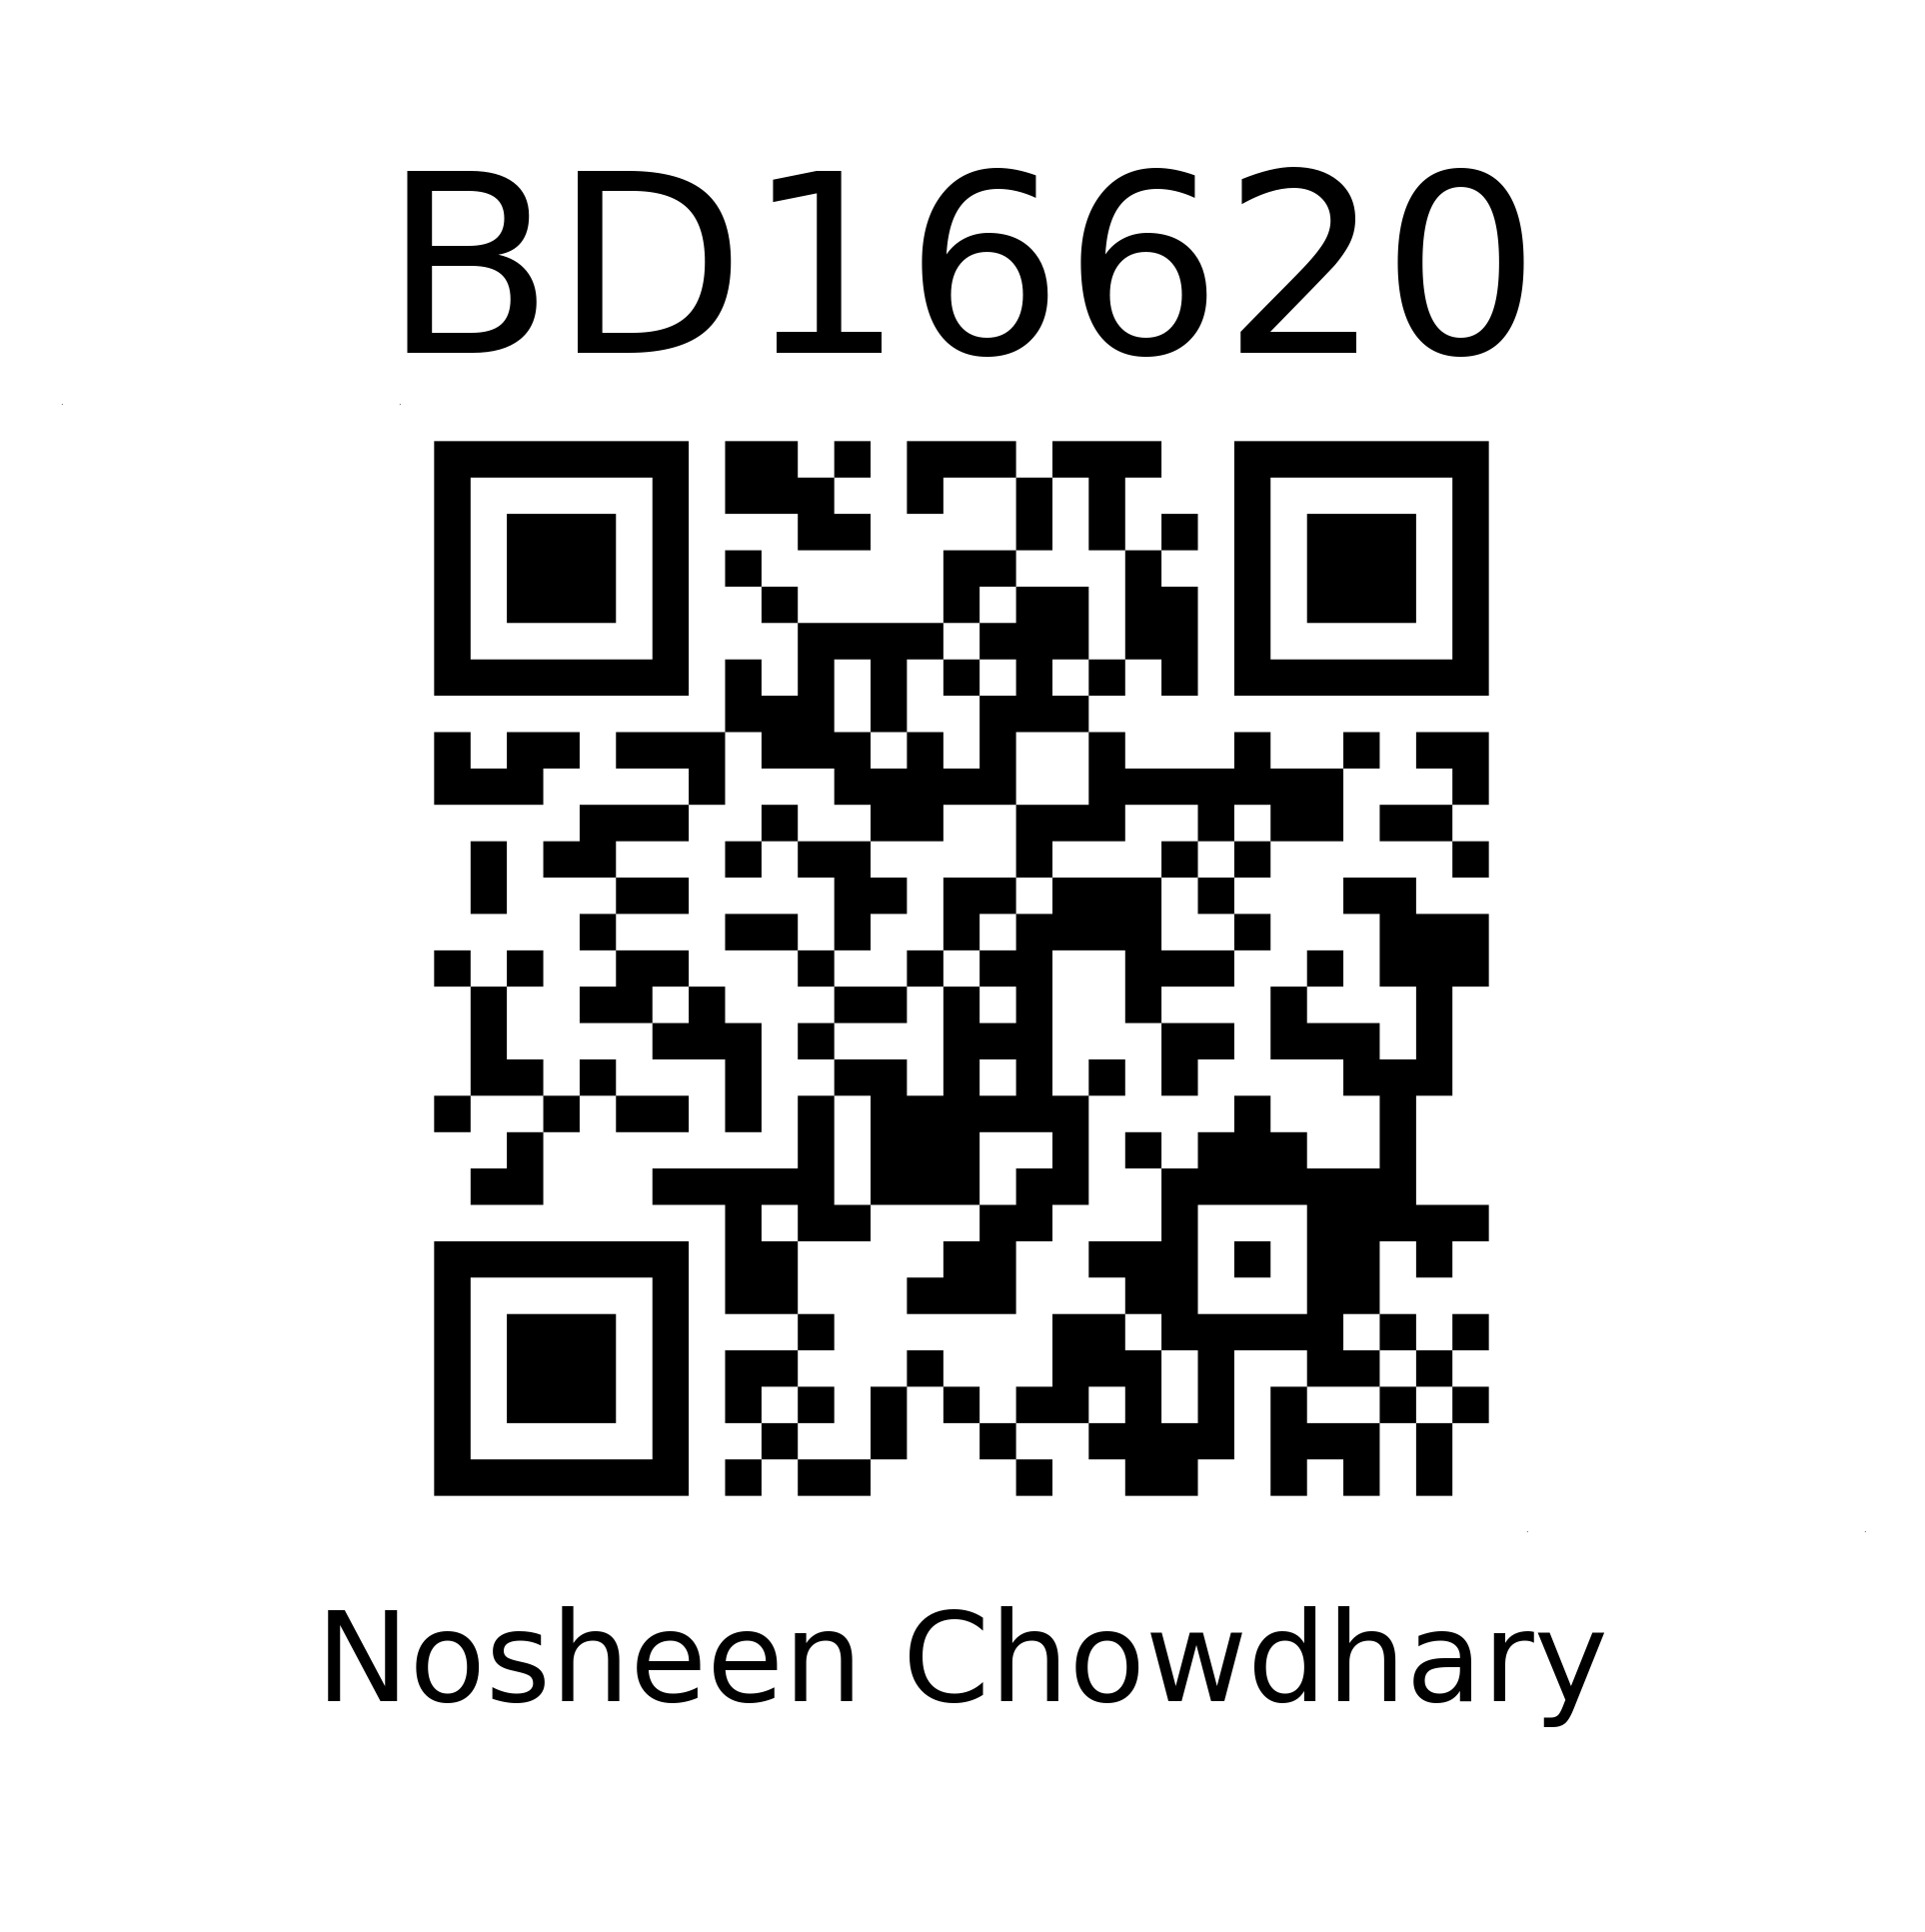

<Figure size 244.094x244.094 with 0 Axes>

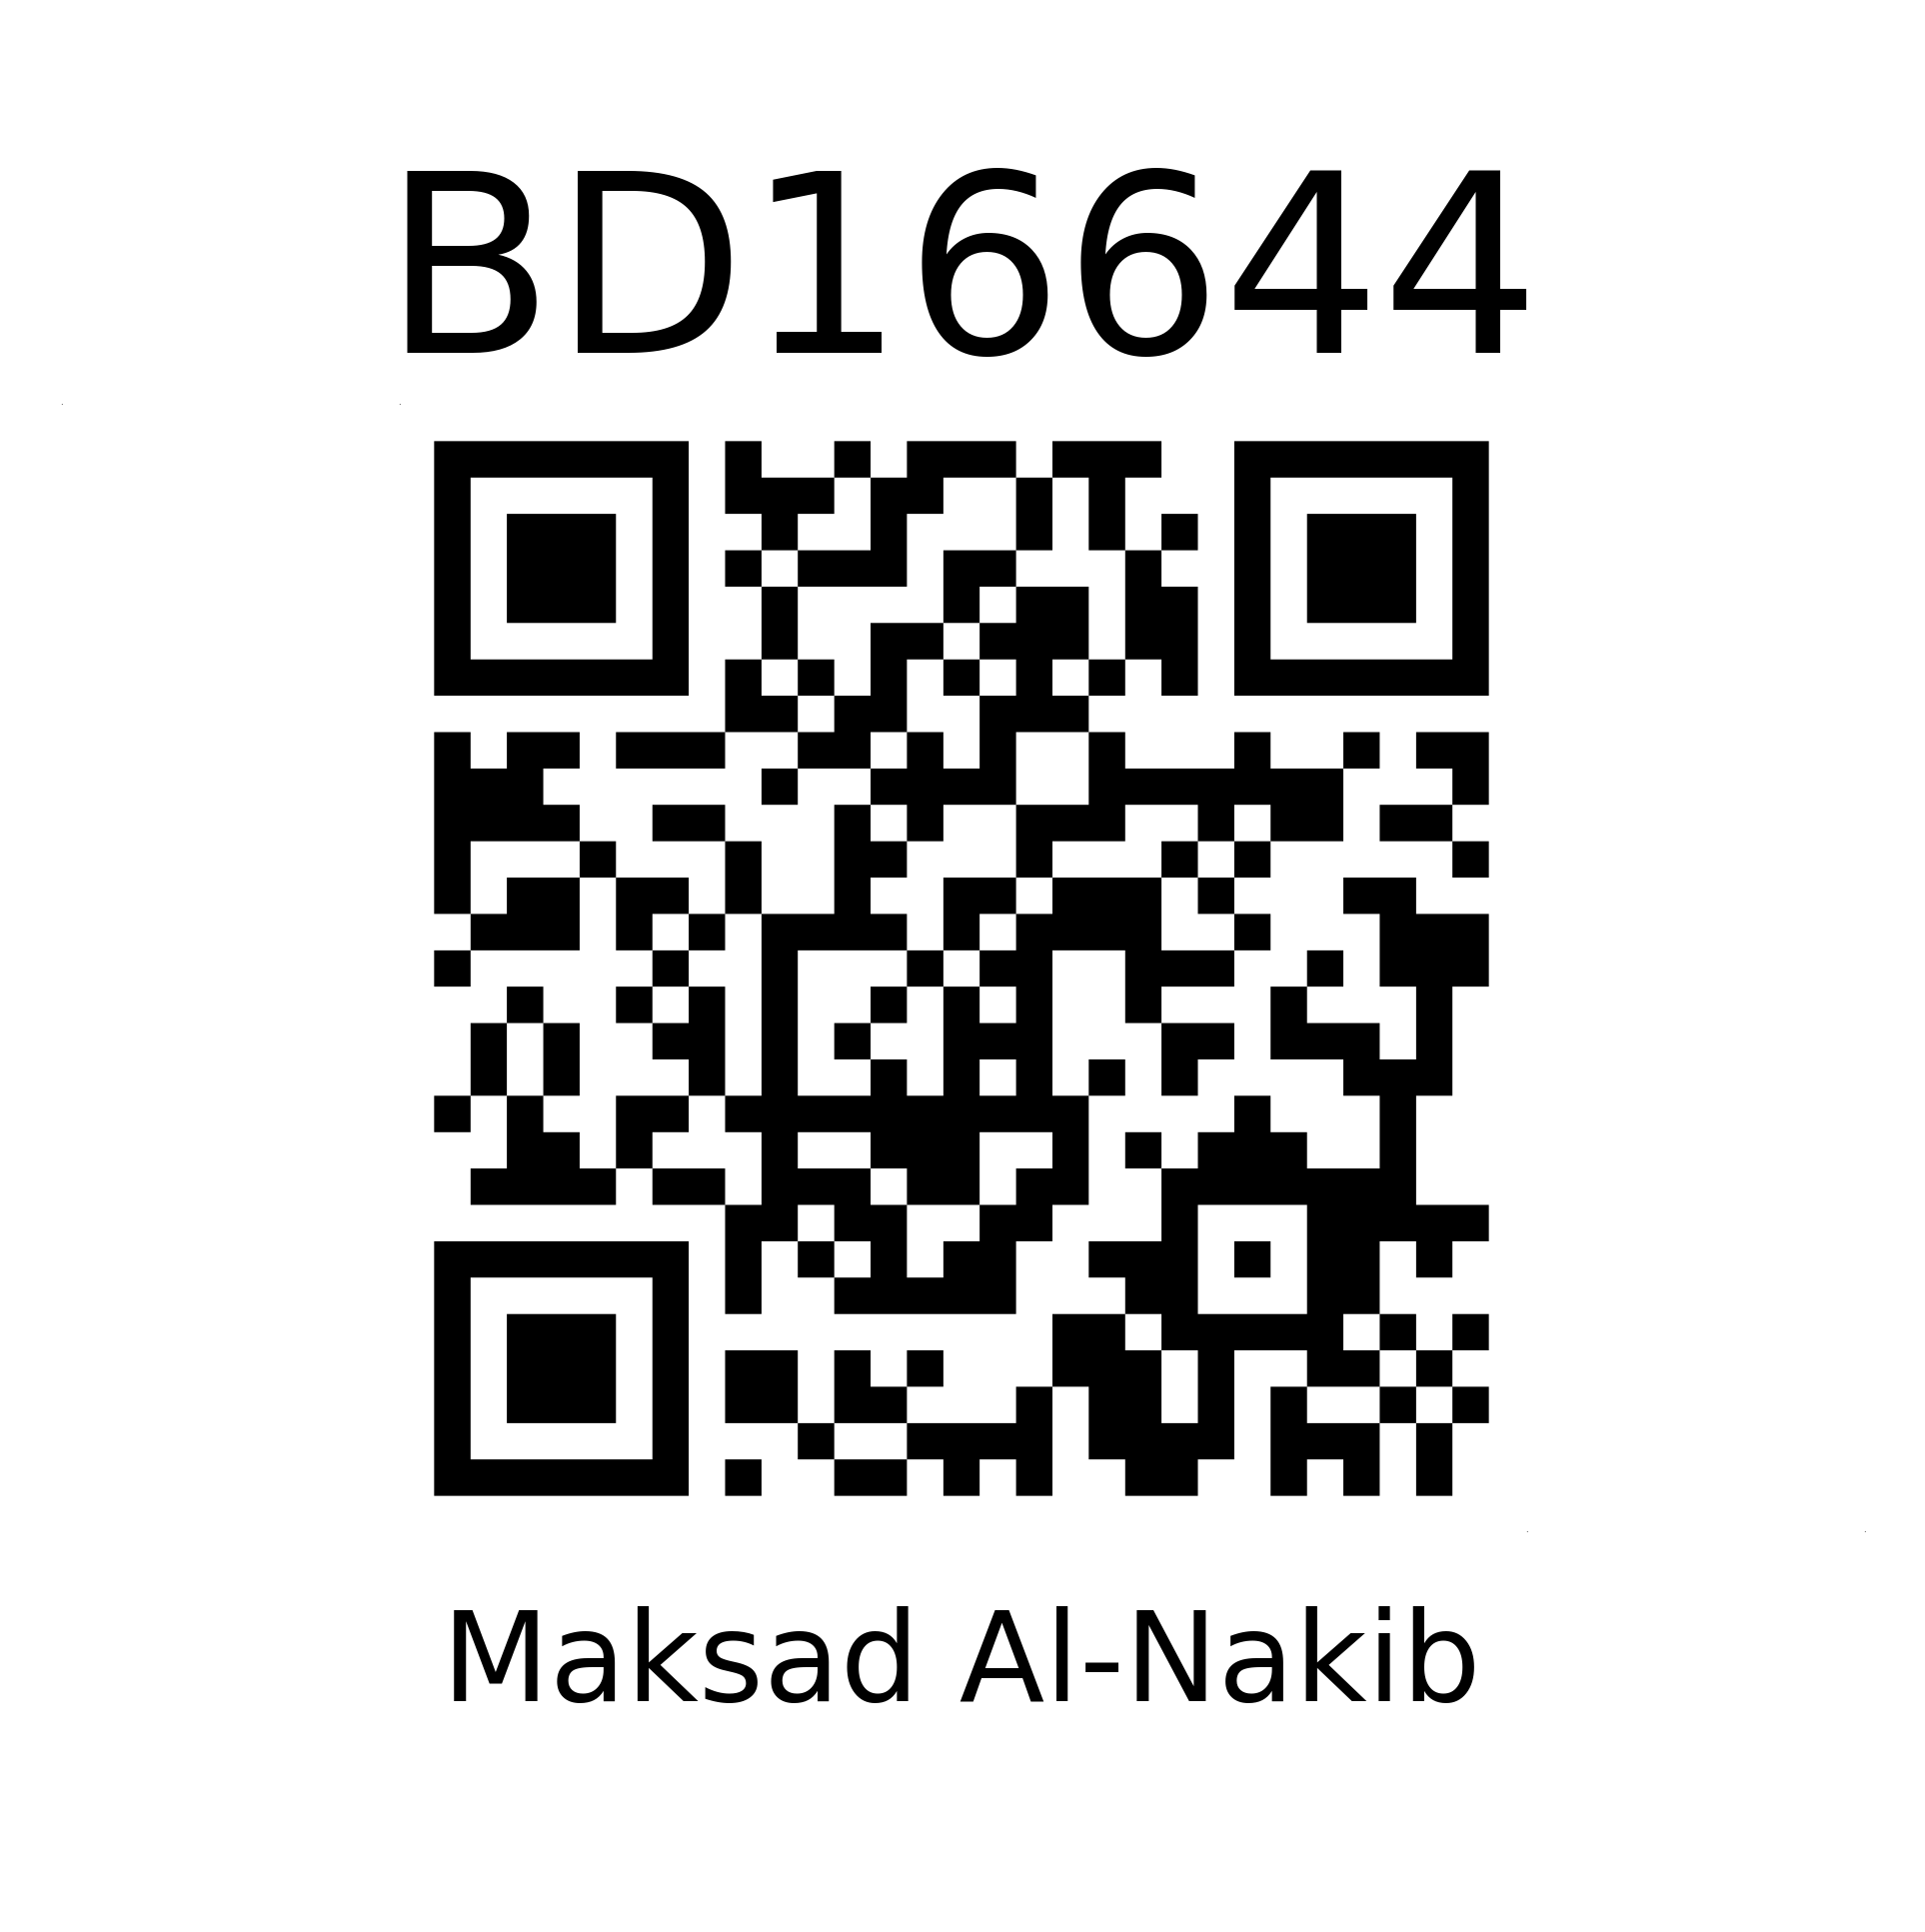

<Figure size 244.094x244.094 with 0 Axes>

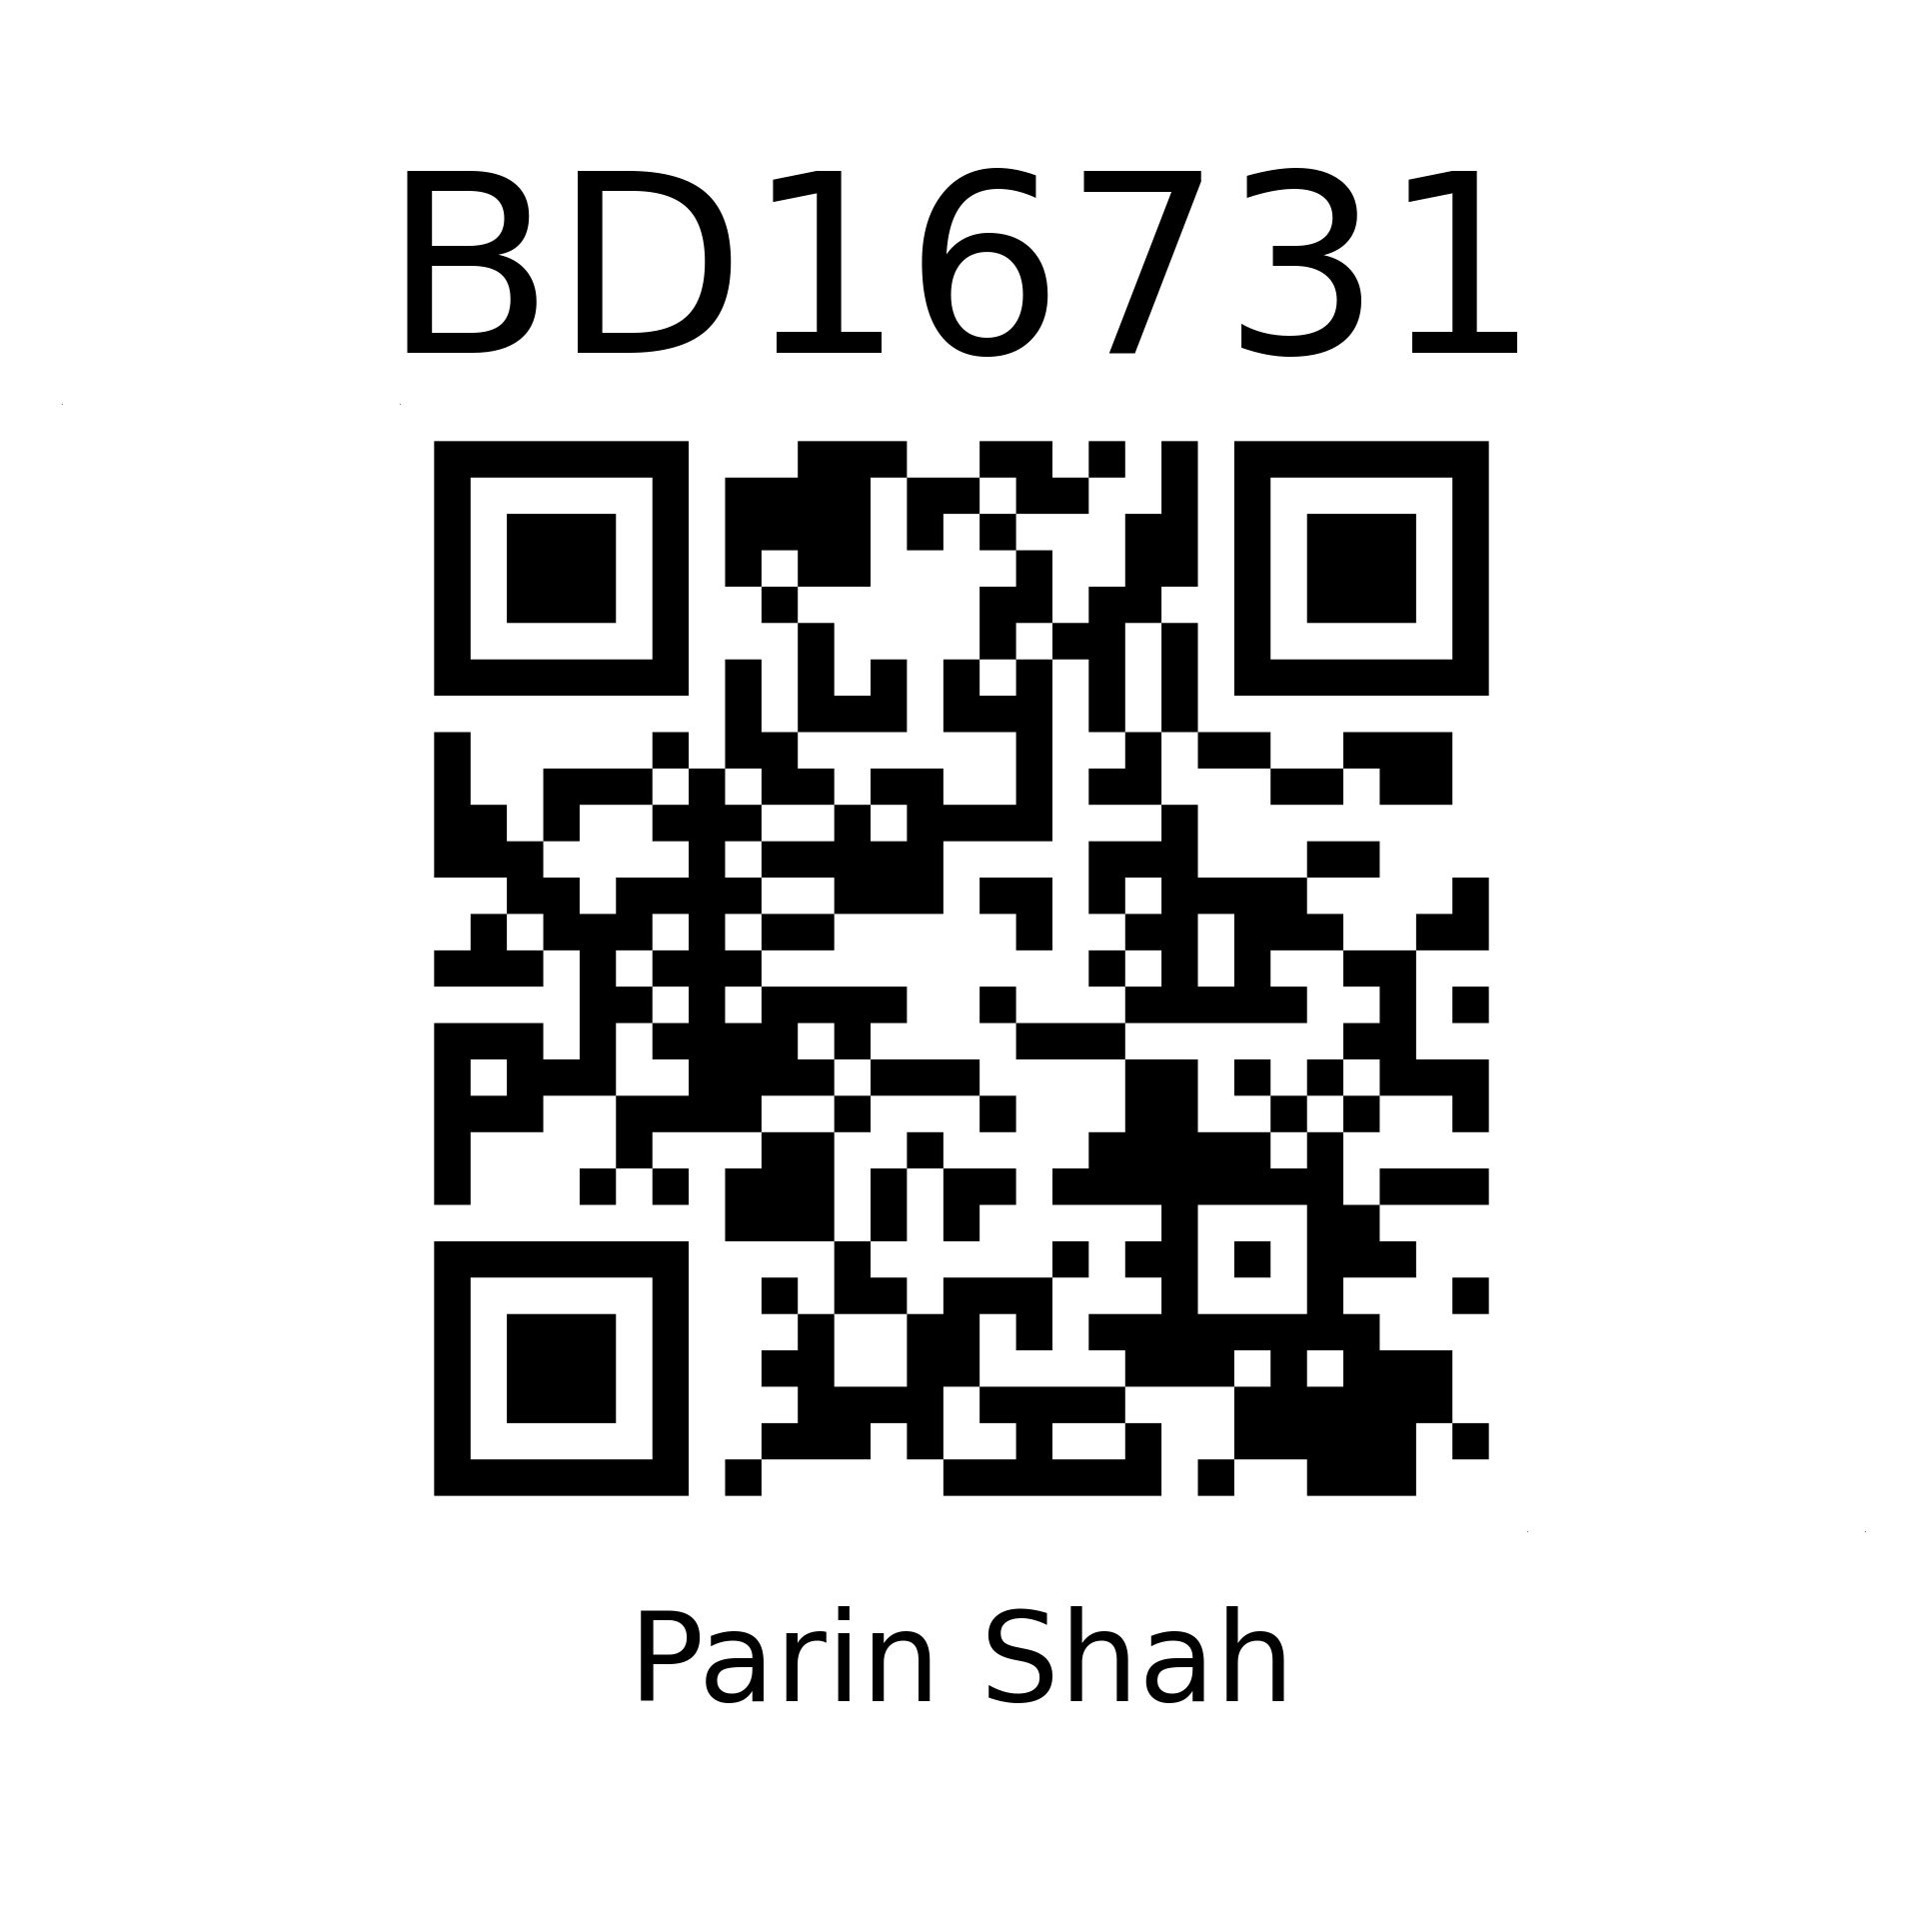

<Figure size 244.094x244.094 with 0 Axes>

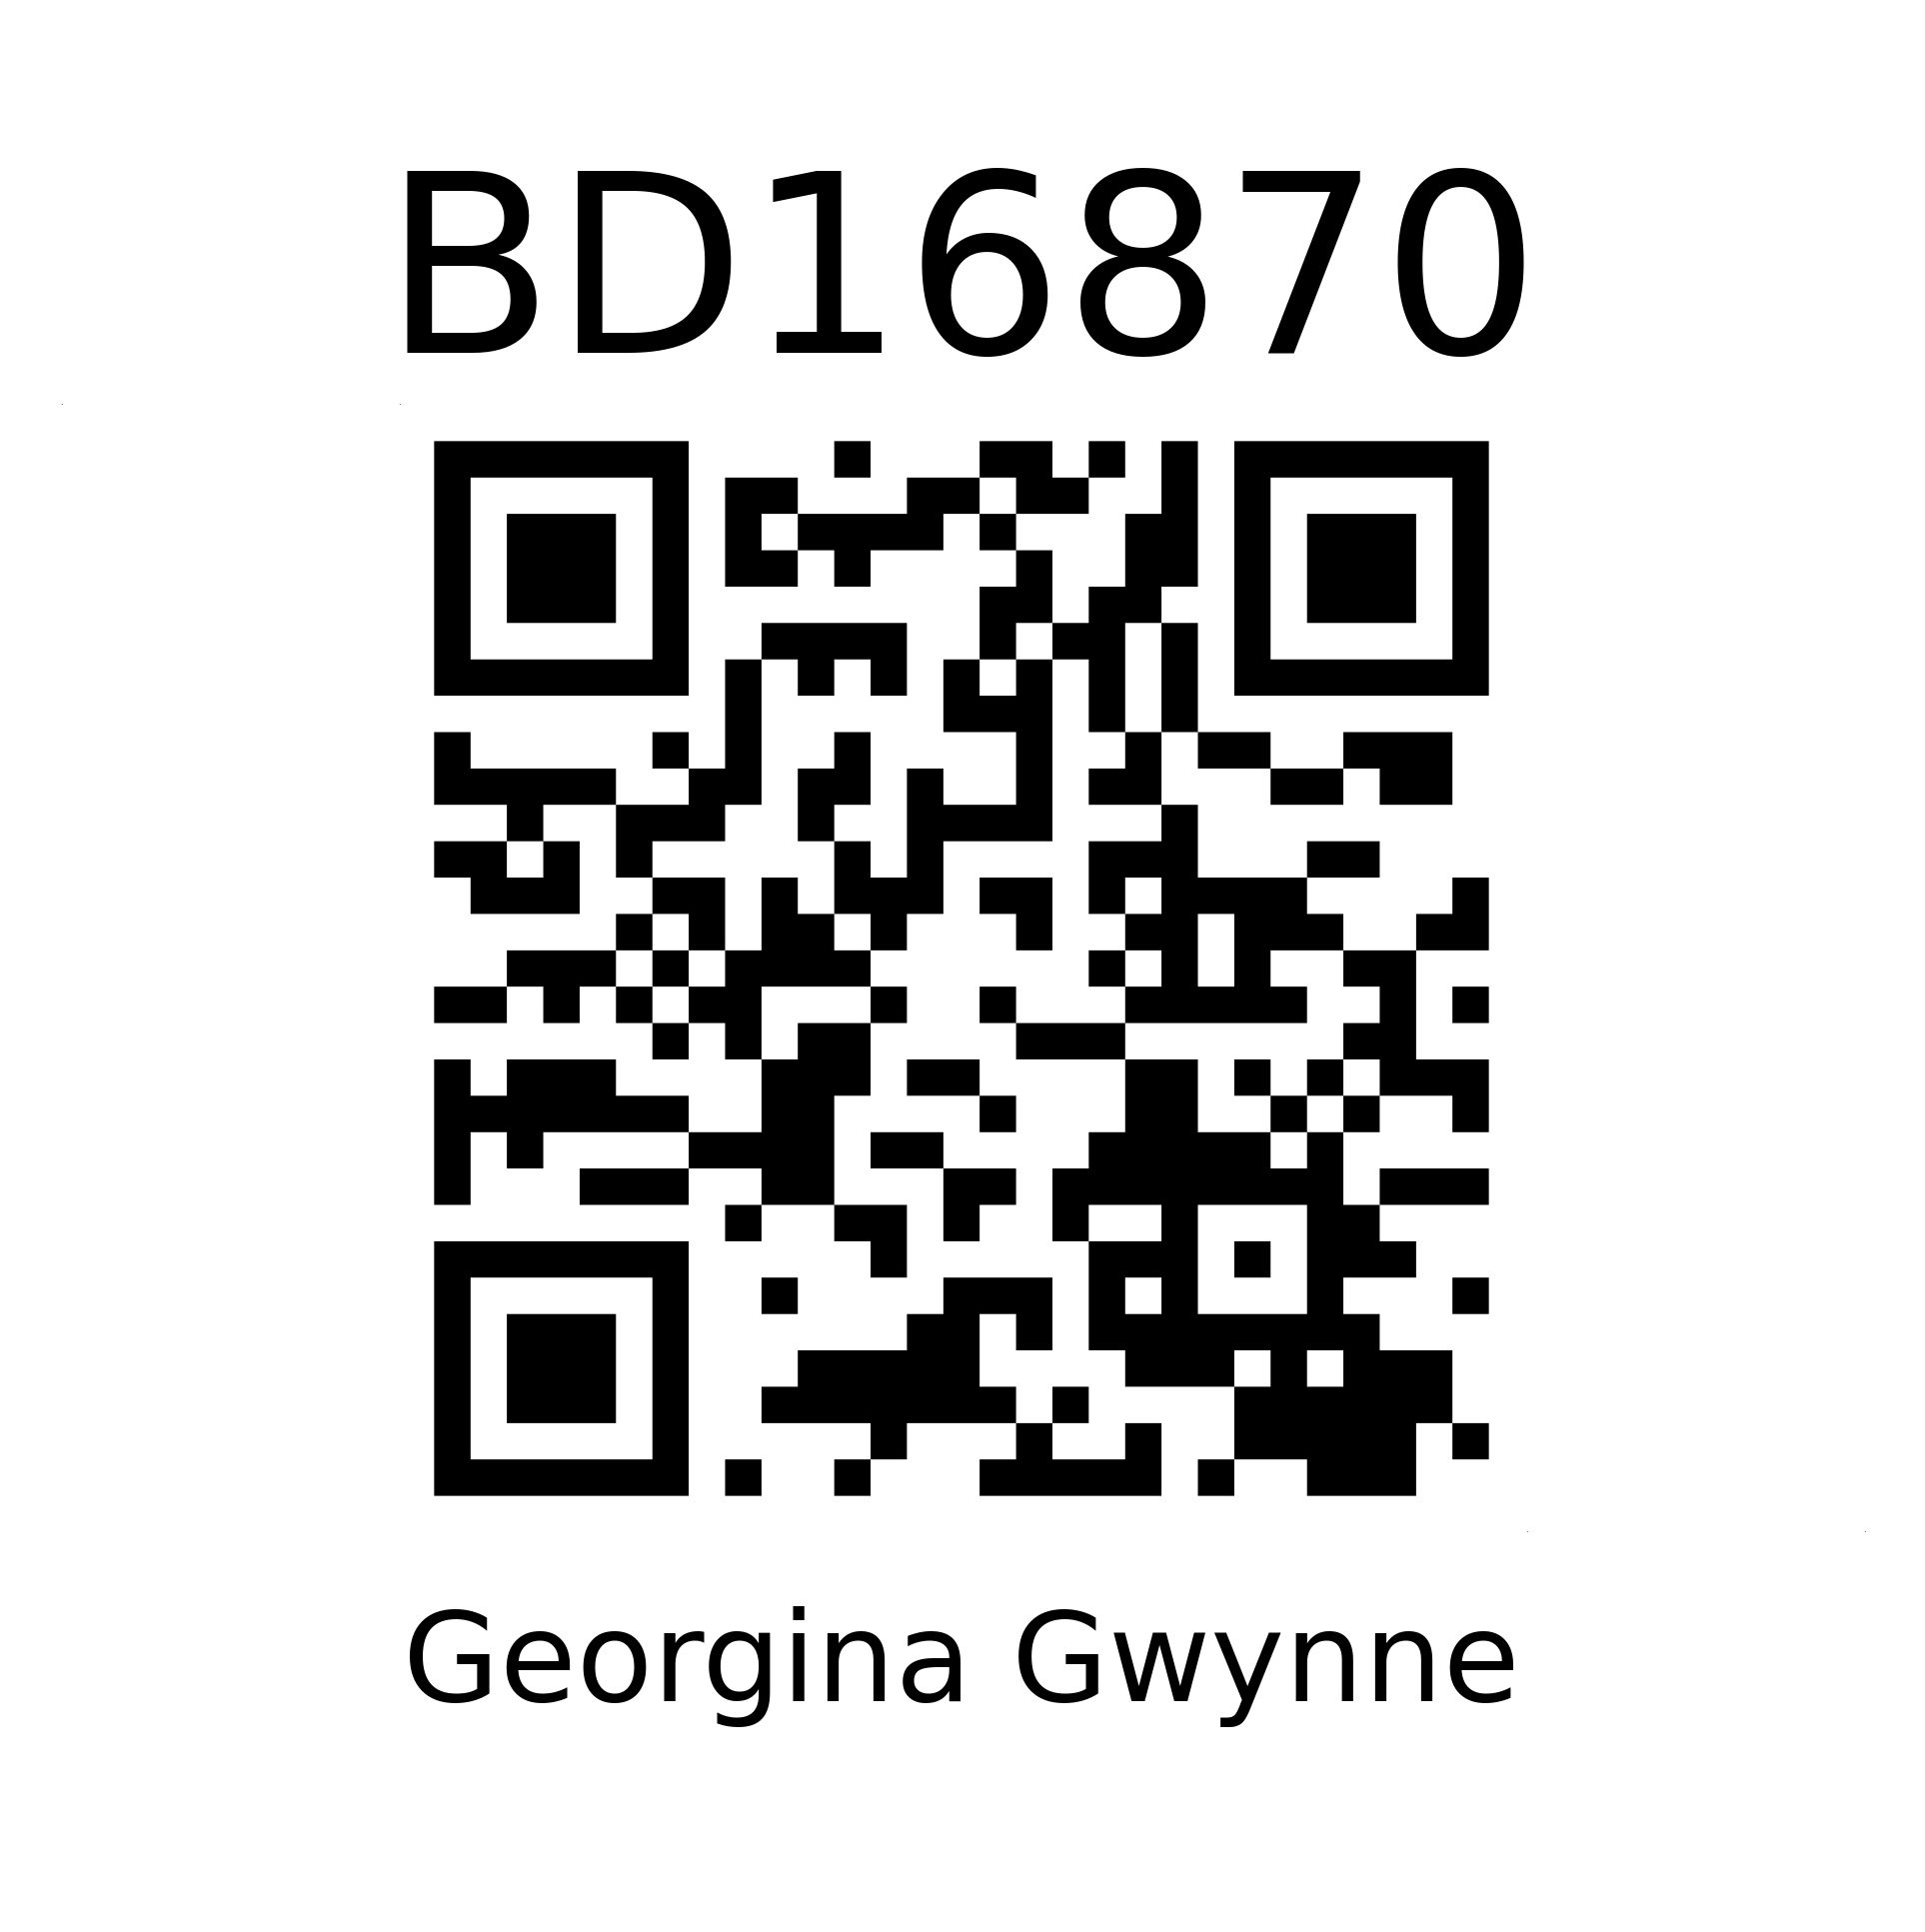

<Figure size 244.094x244.094 with 0 Axes>

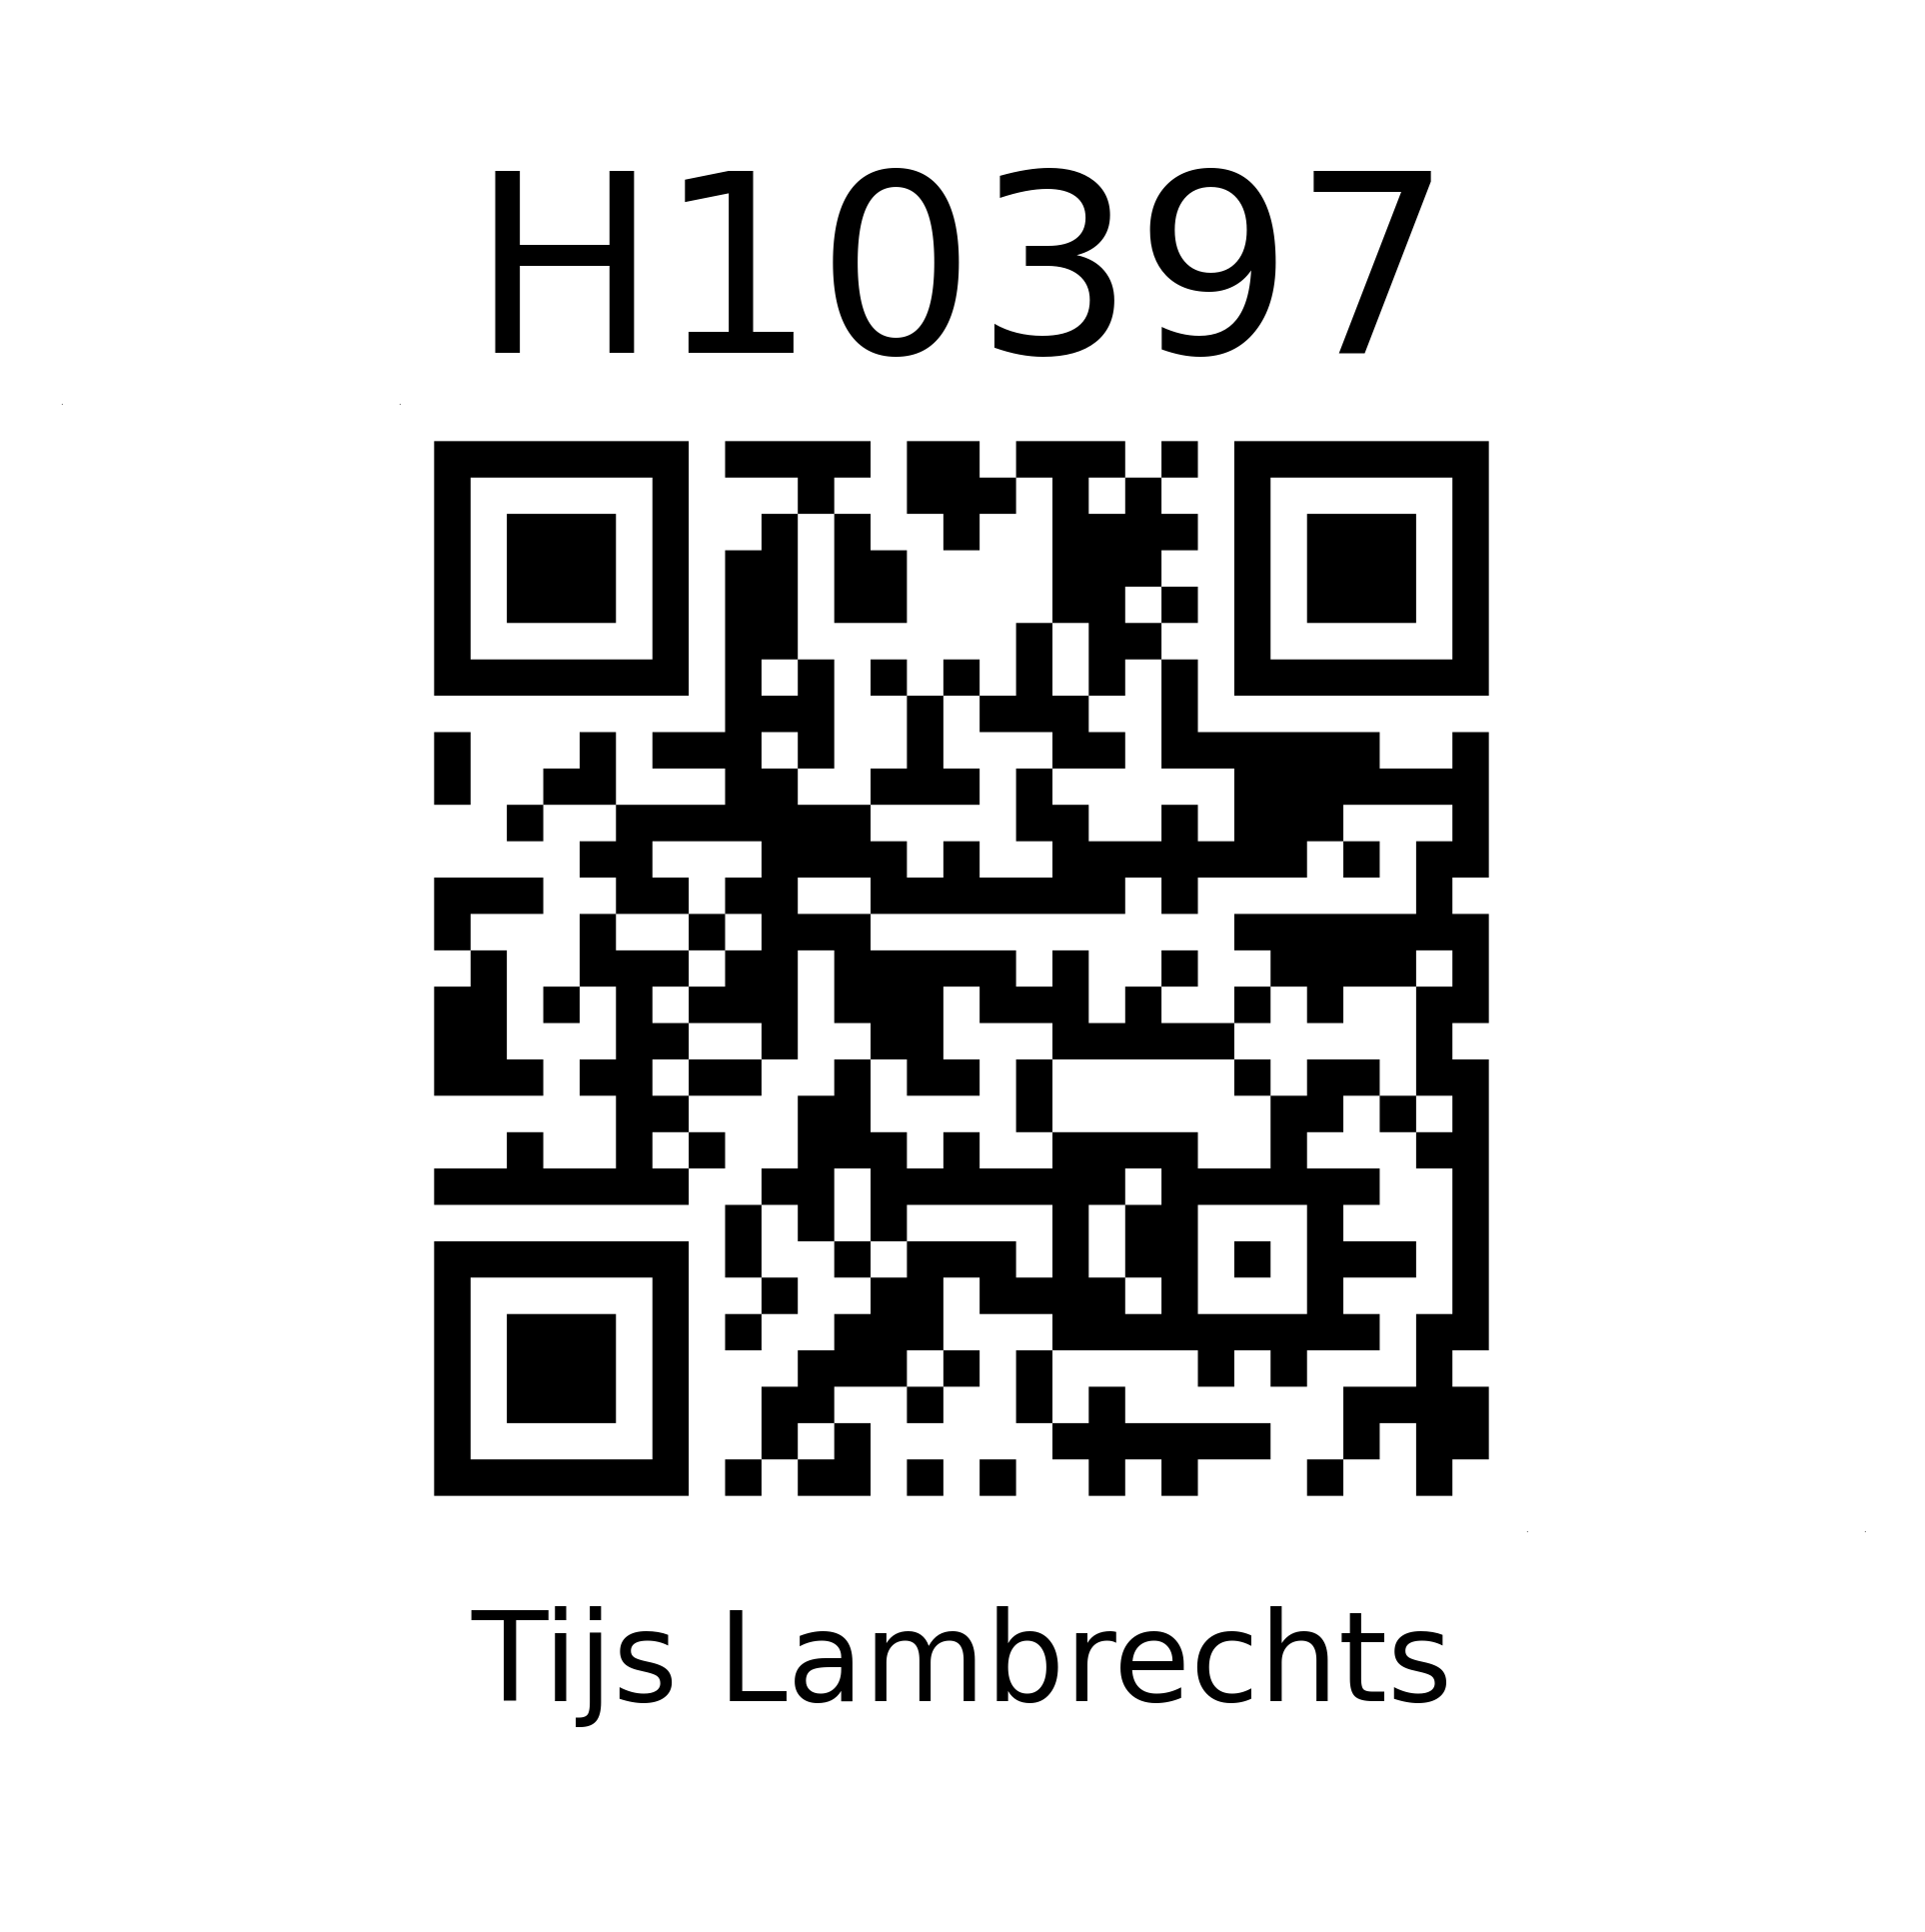

<Figure size 244.094x244.094 with 0 Axes>

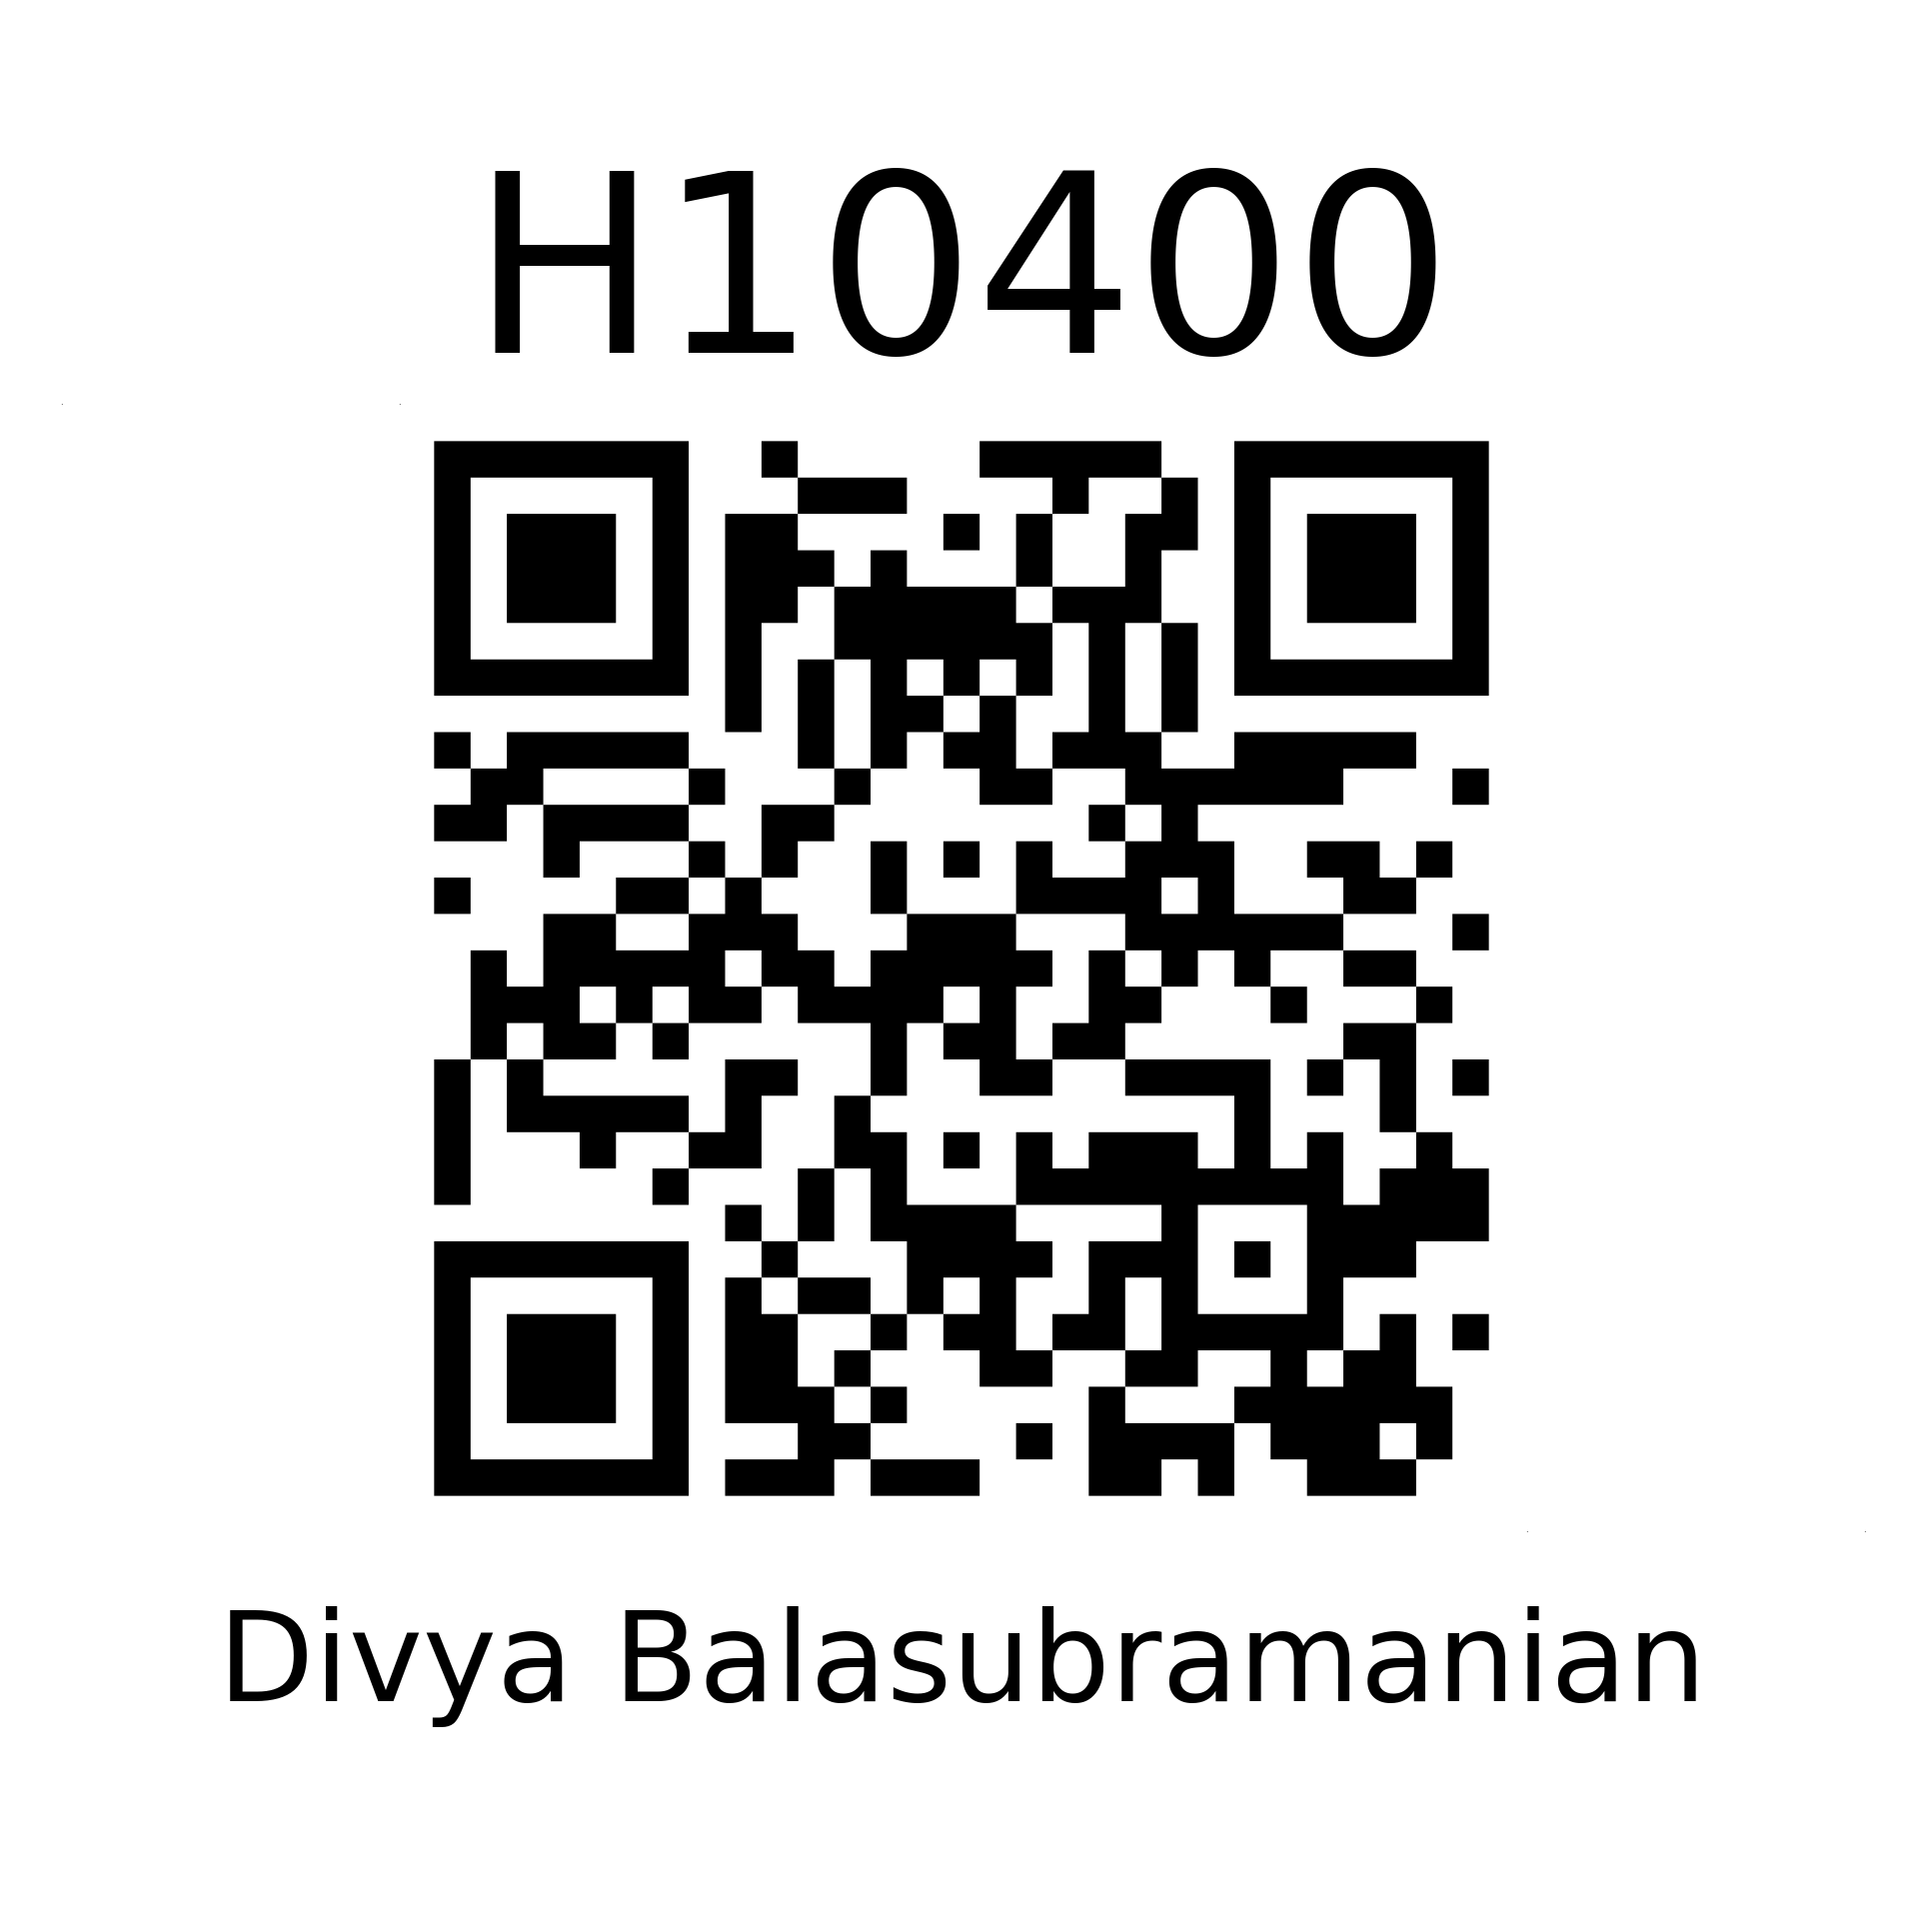

<Figure size 244.094x244.094 with 0 Axes>

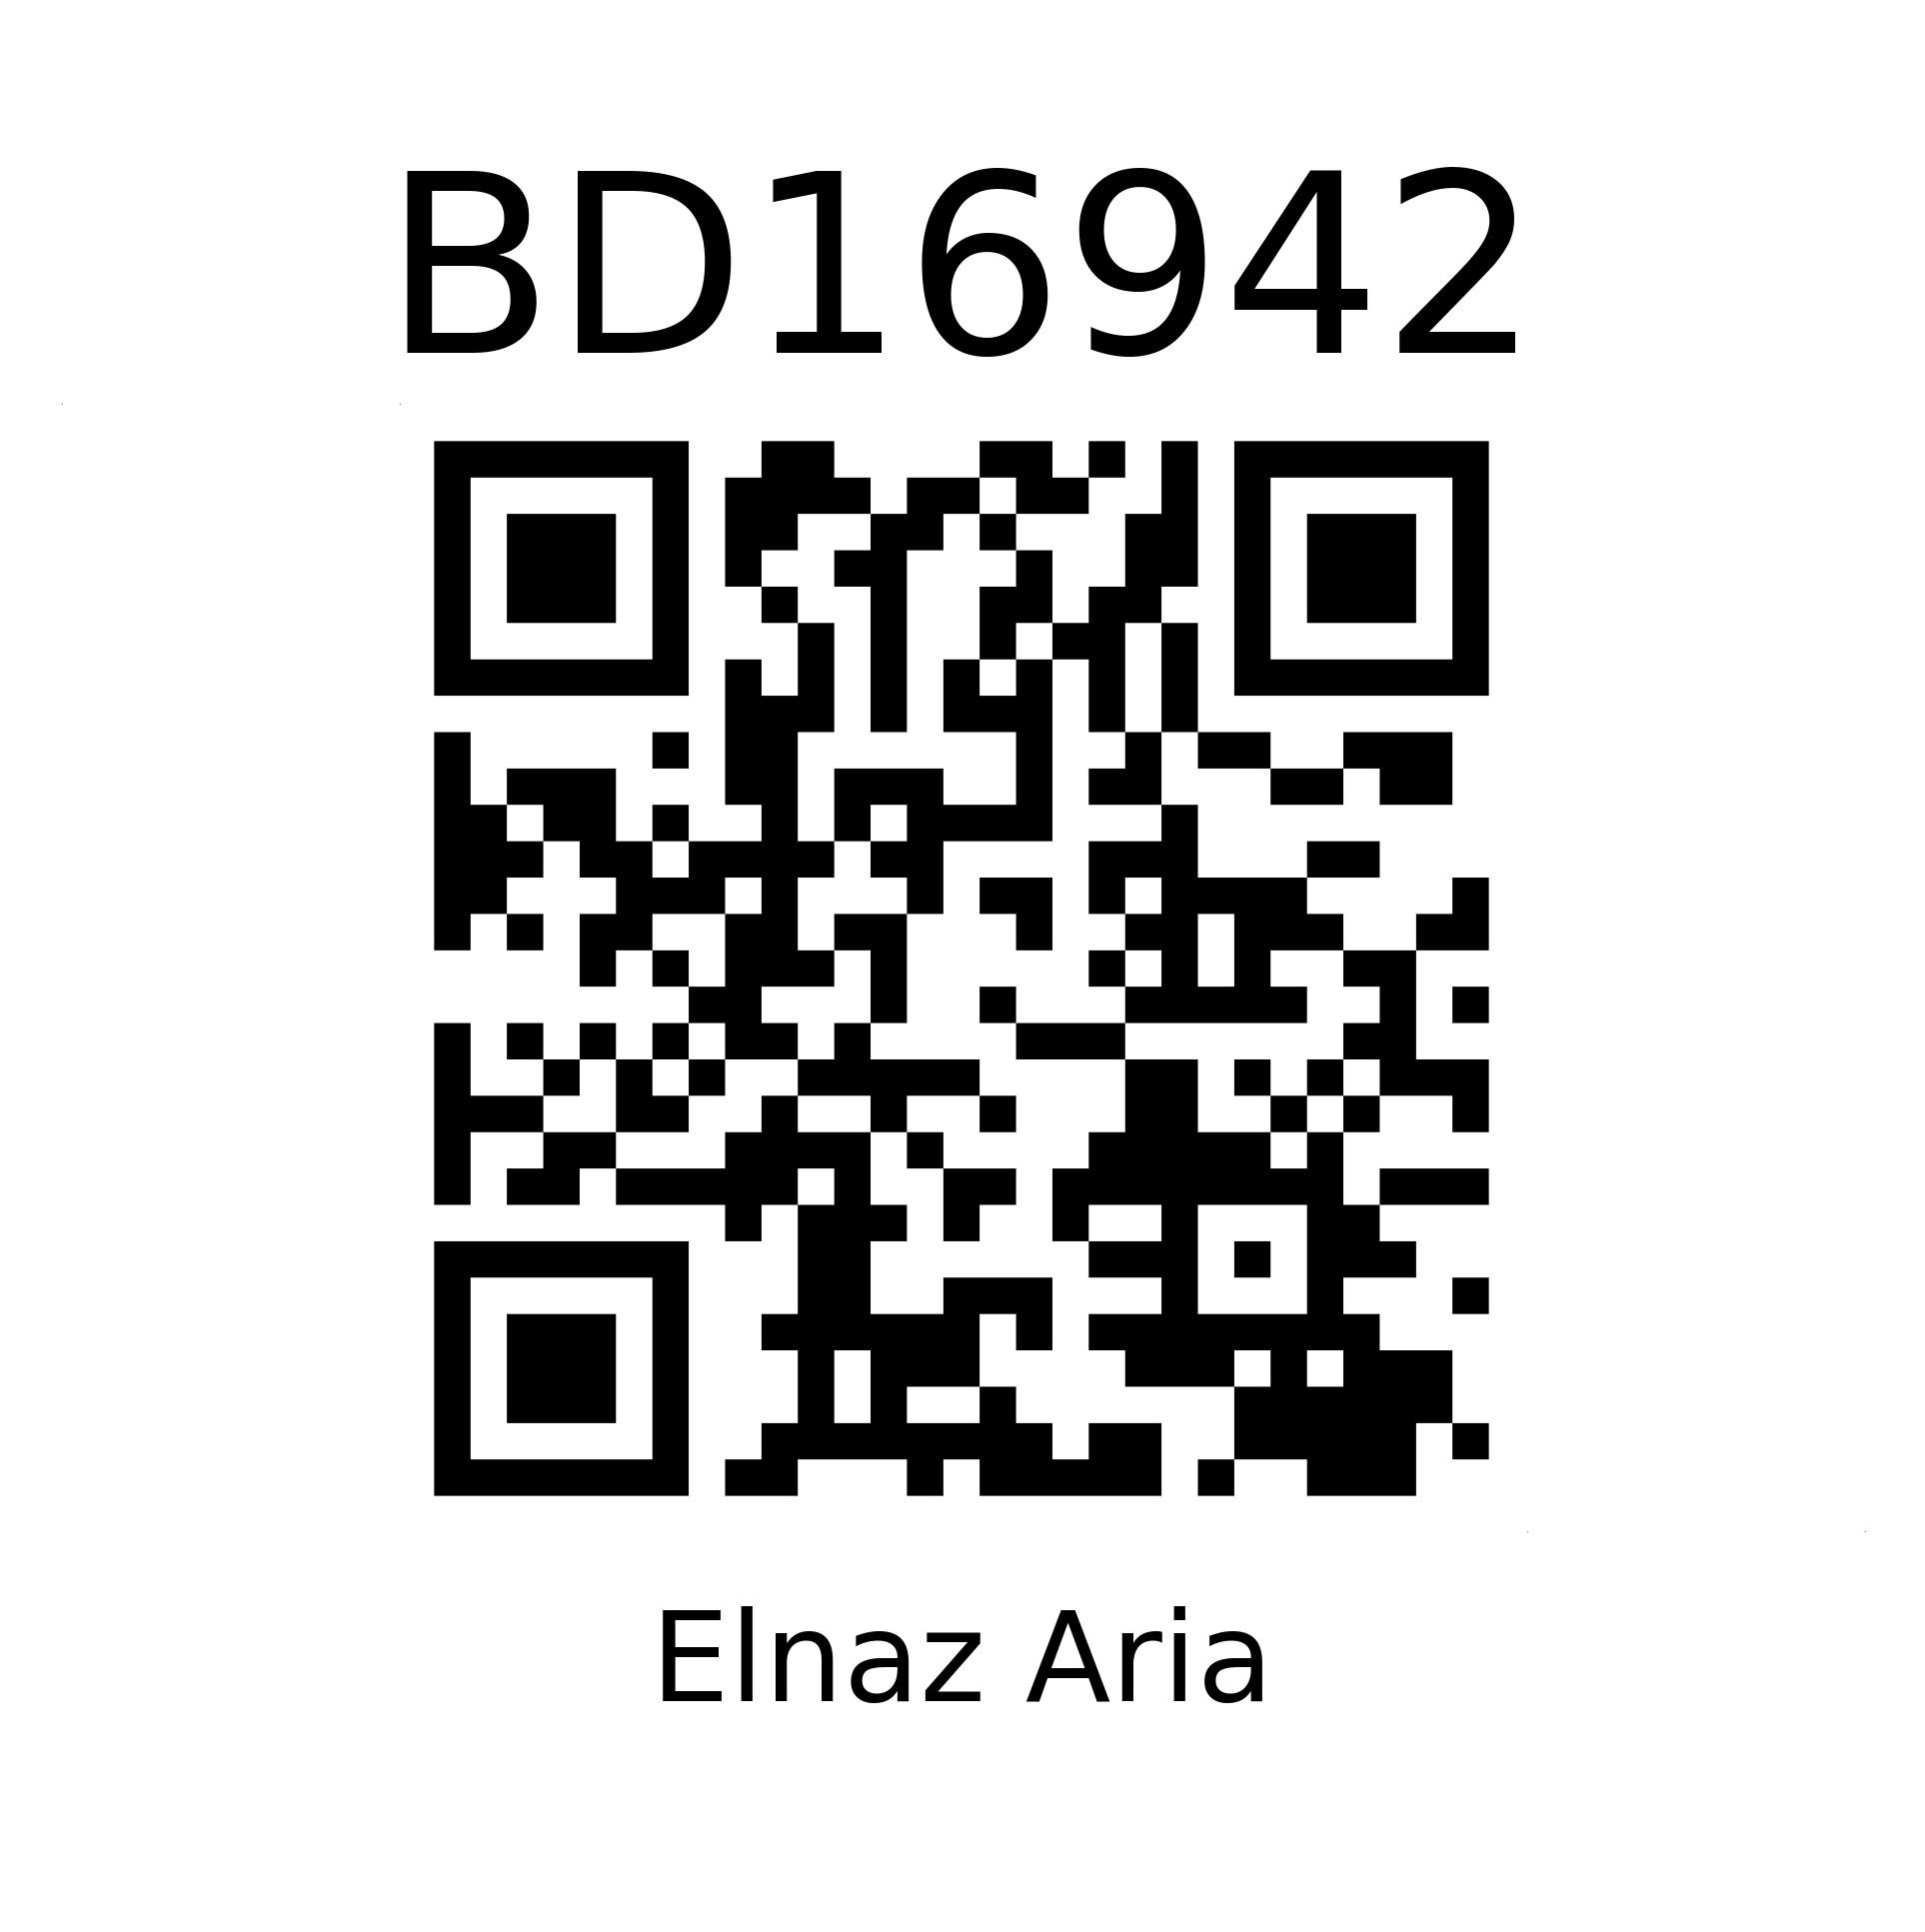

<Figure size 244.094x244.094 with 0 Axes>

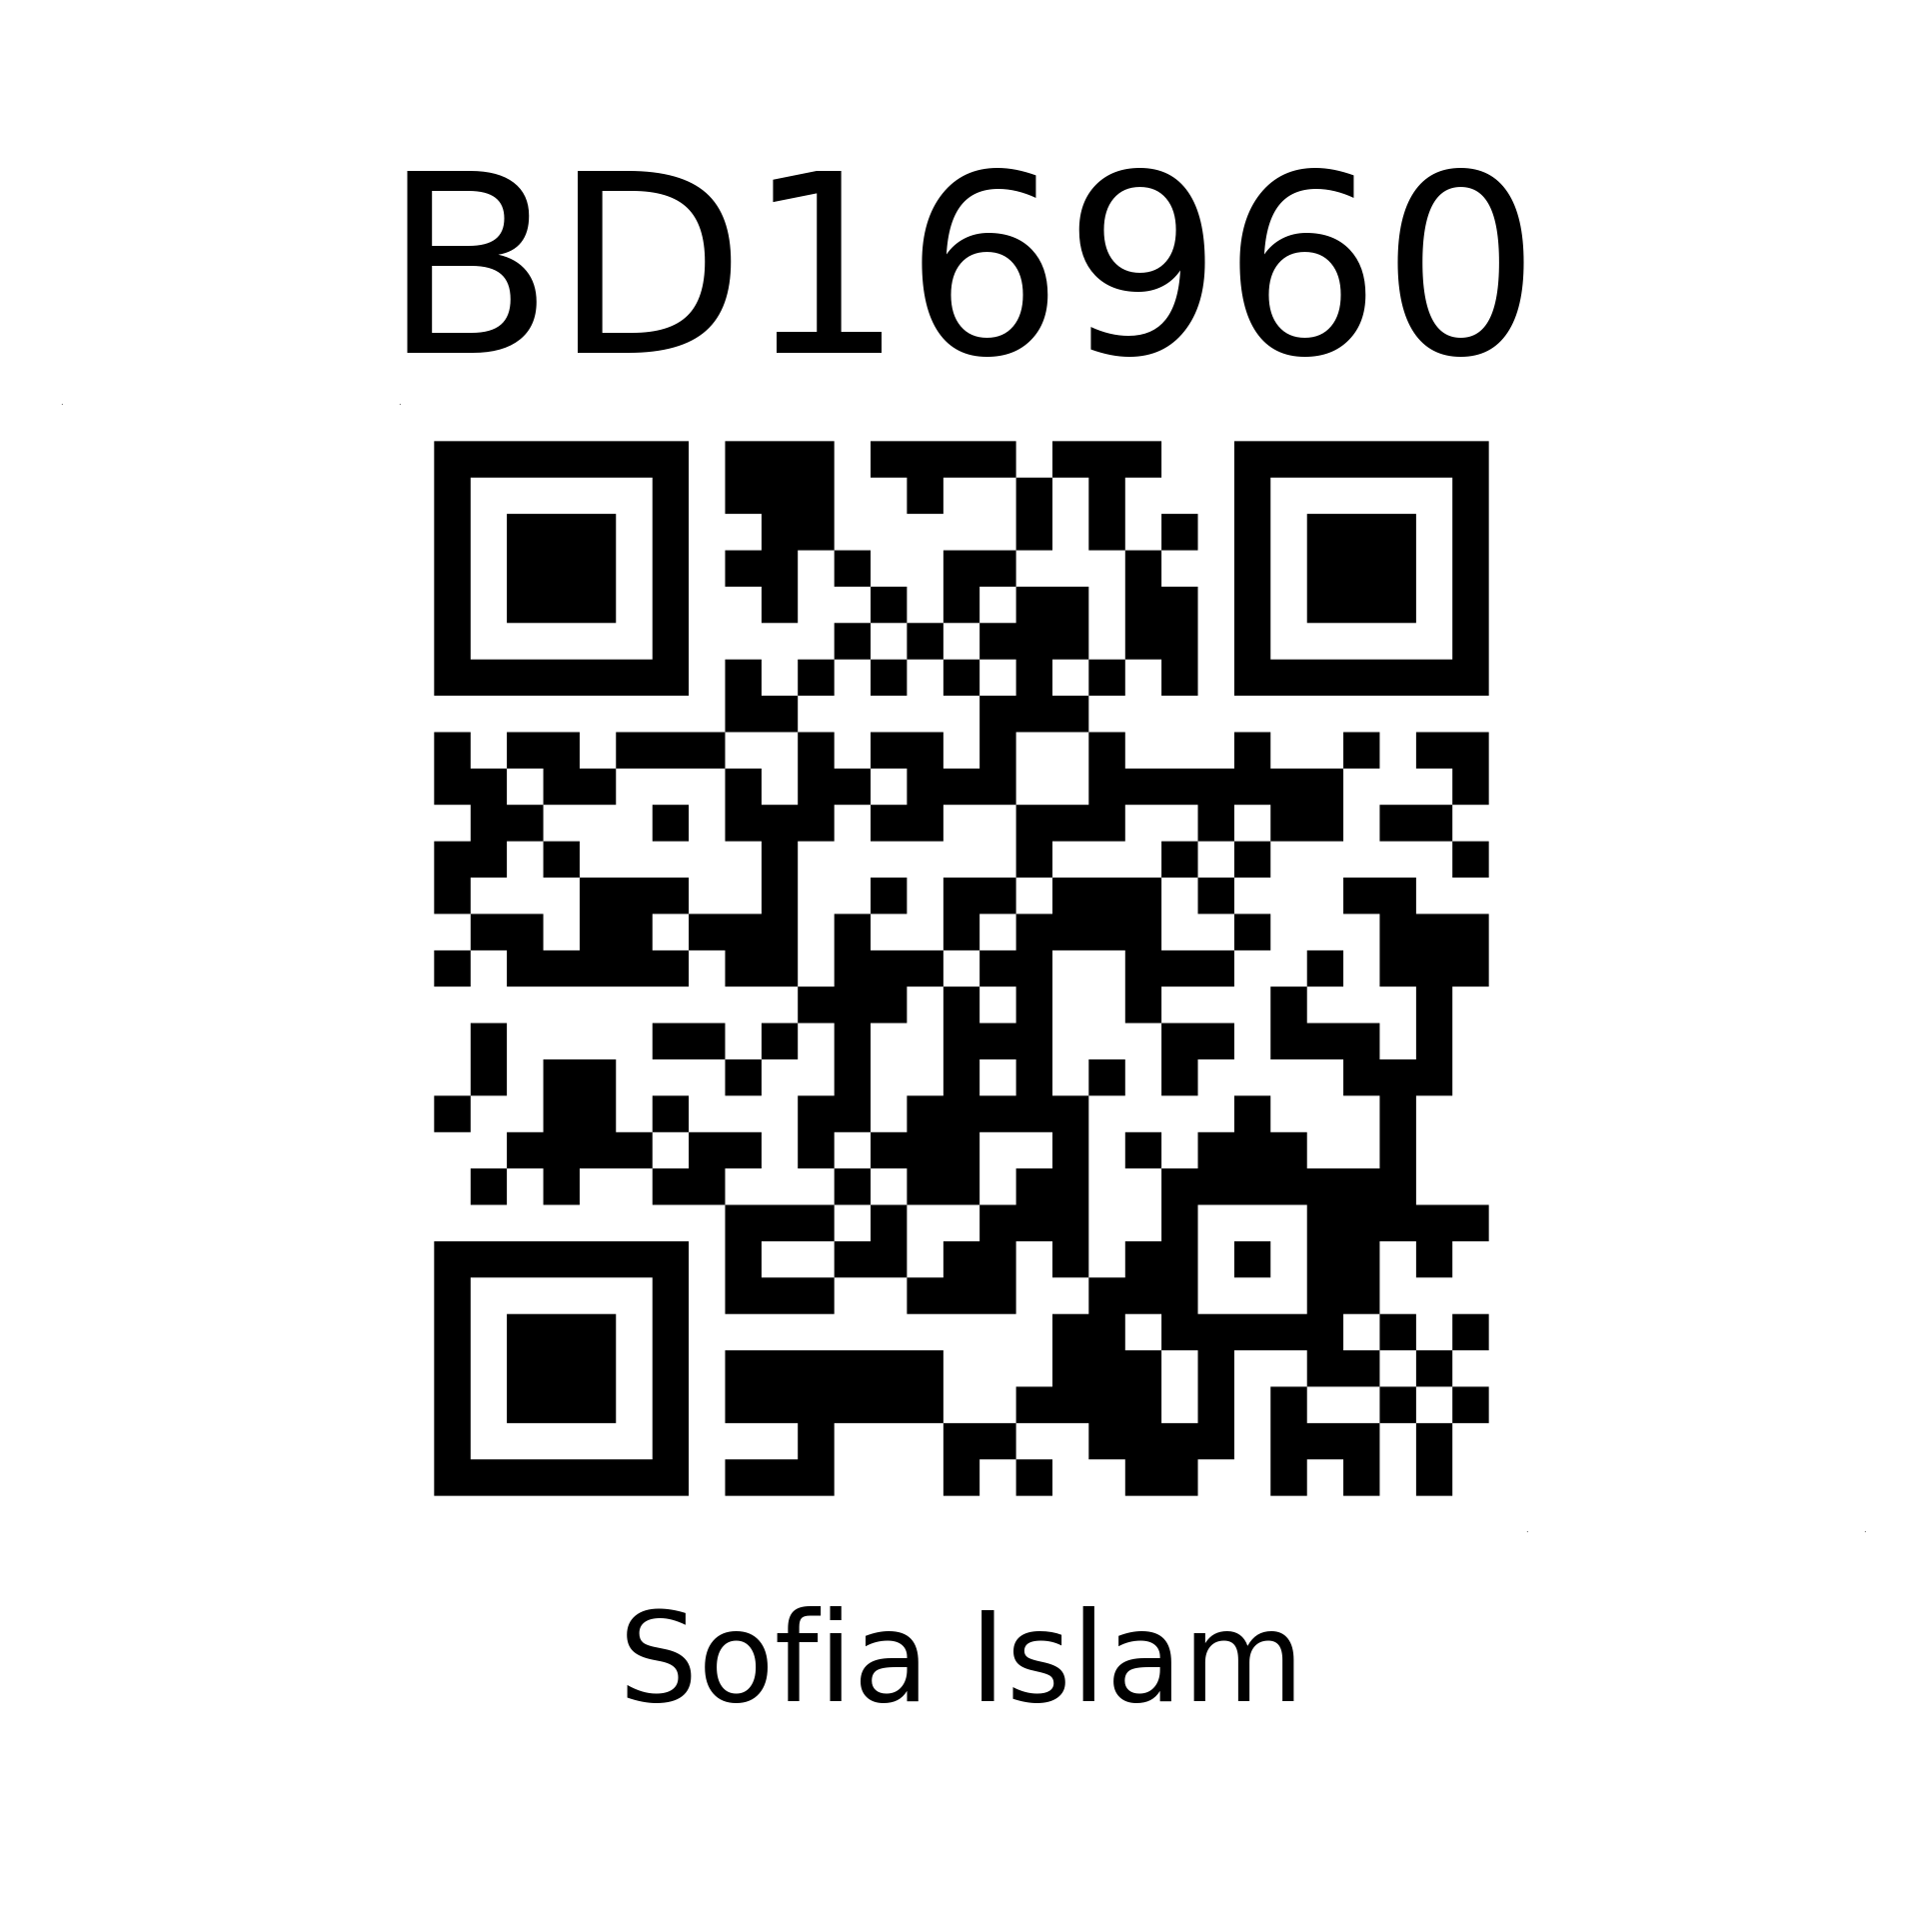

<Figure size 244.094x244.094 with 0 Axes>

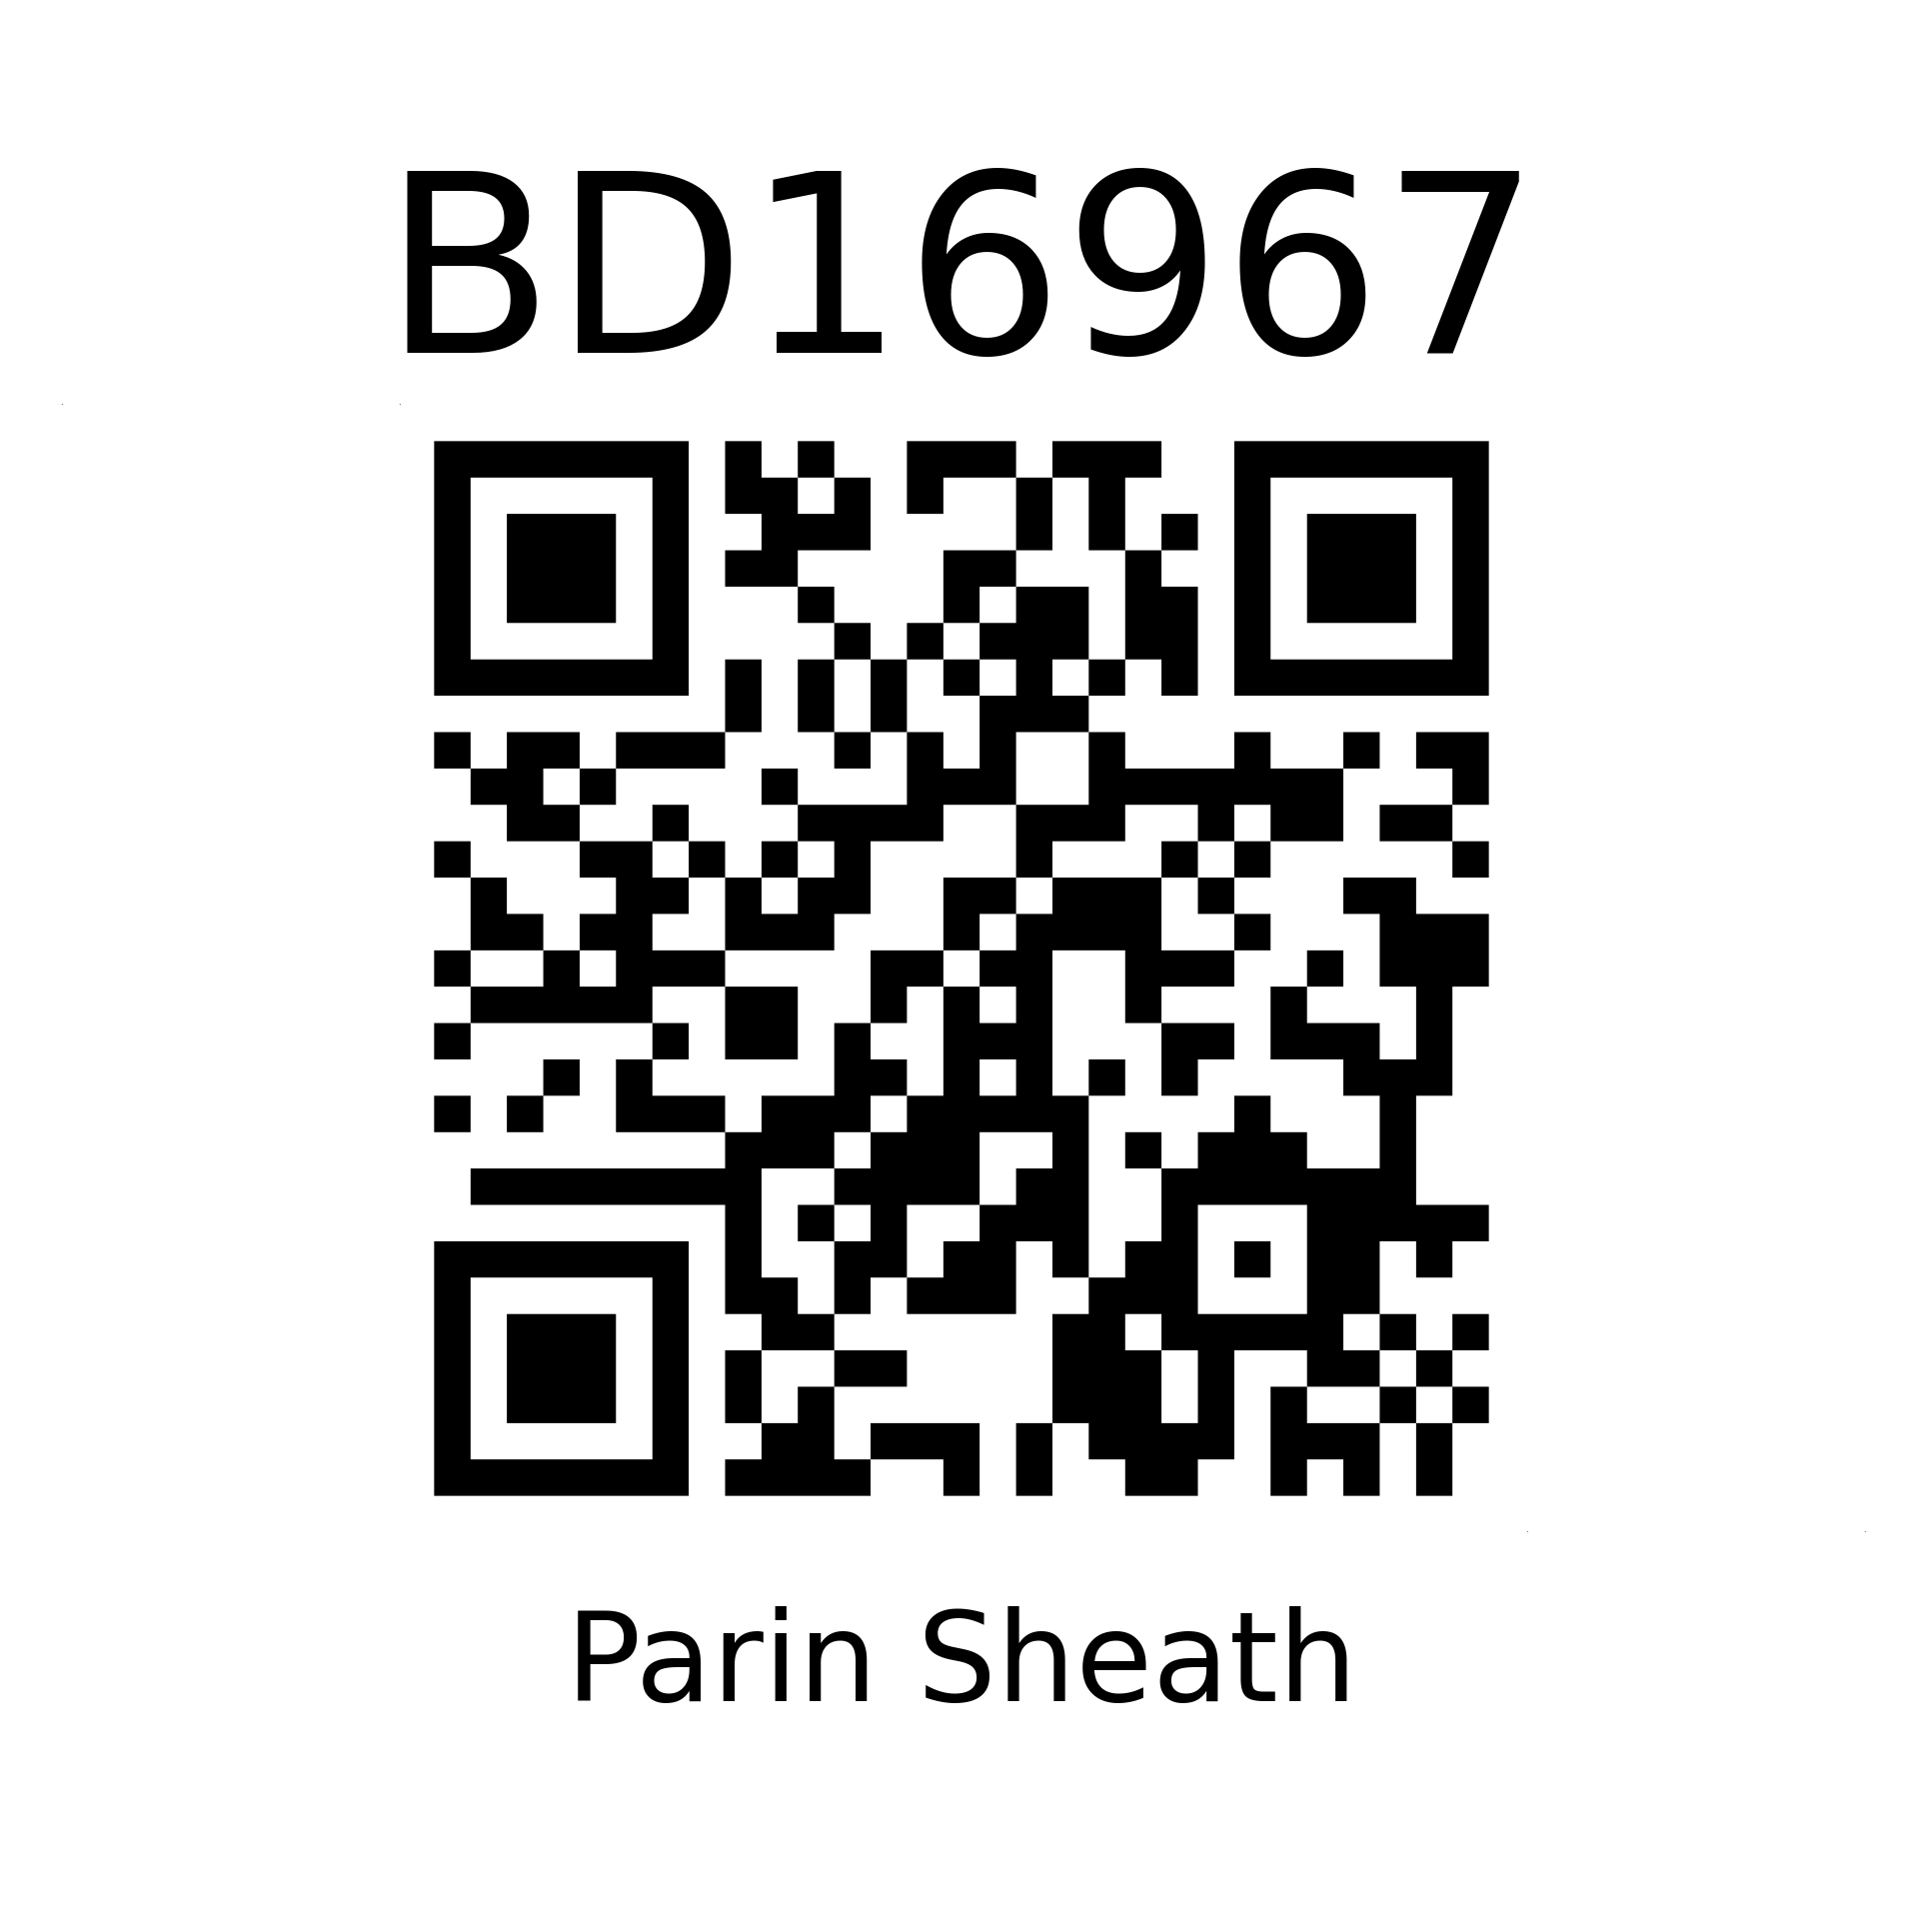

<Figure size 244.094x244.094 with 0 Axes>

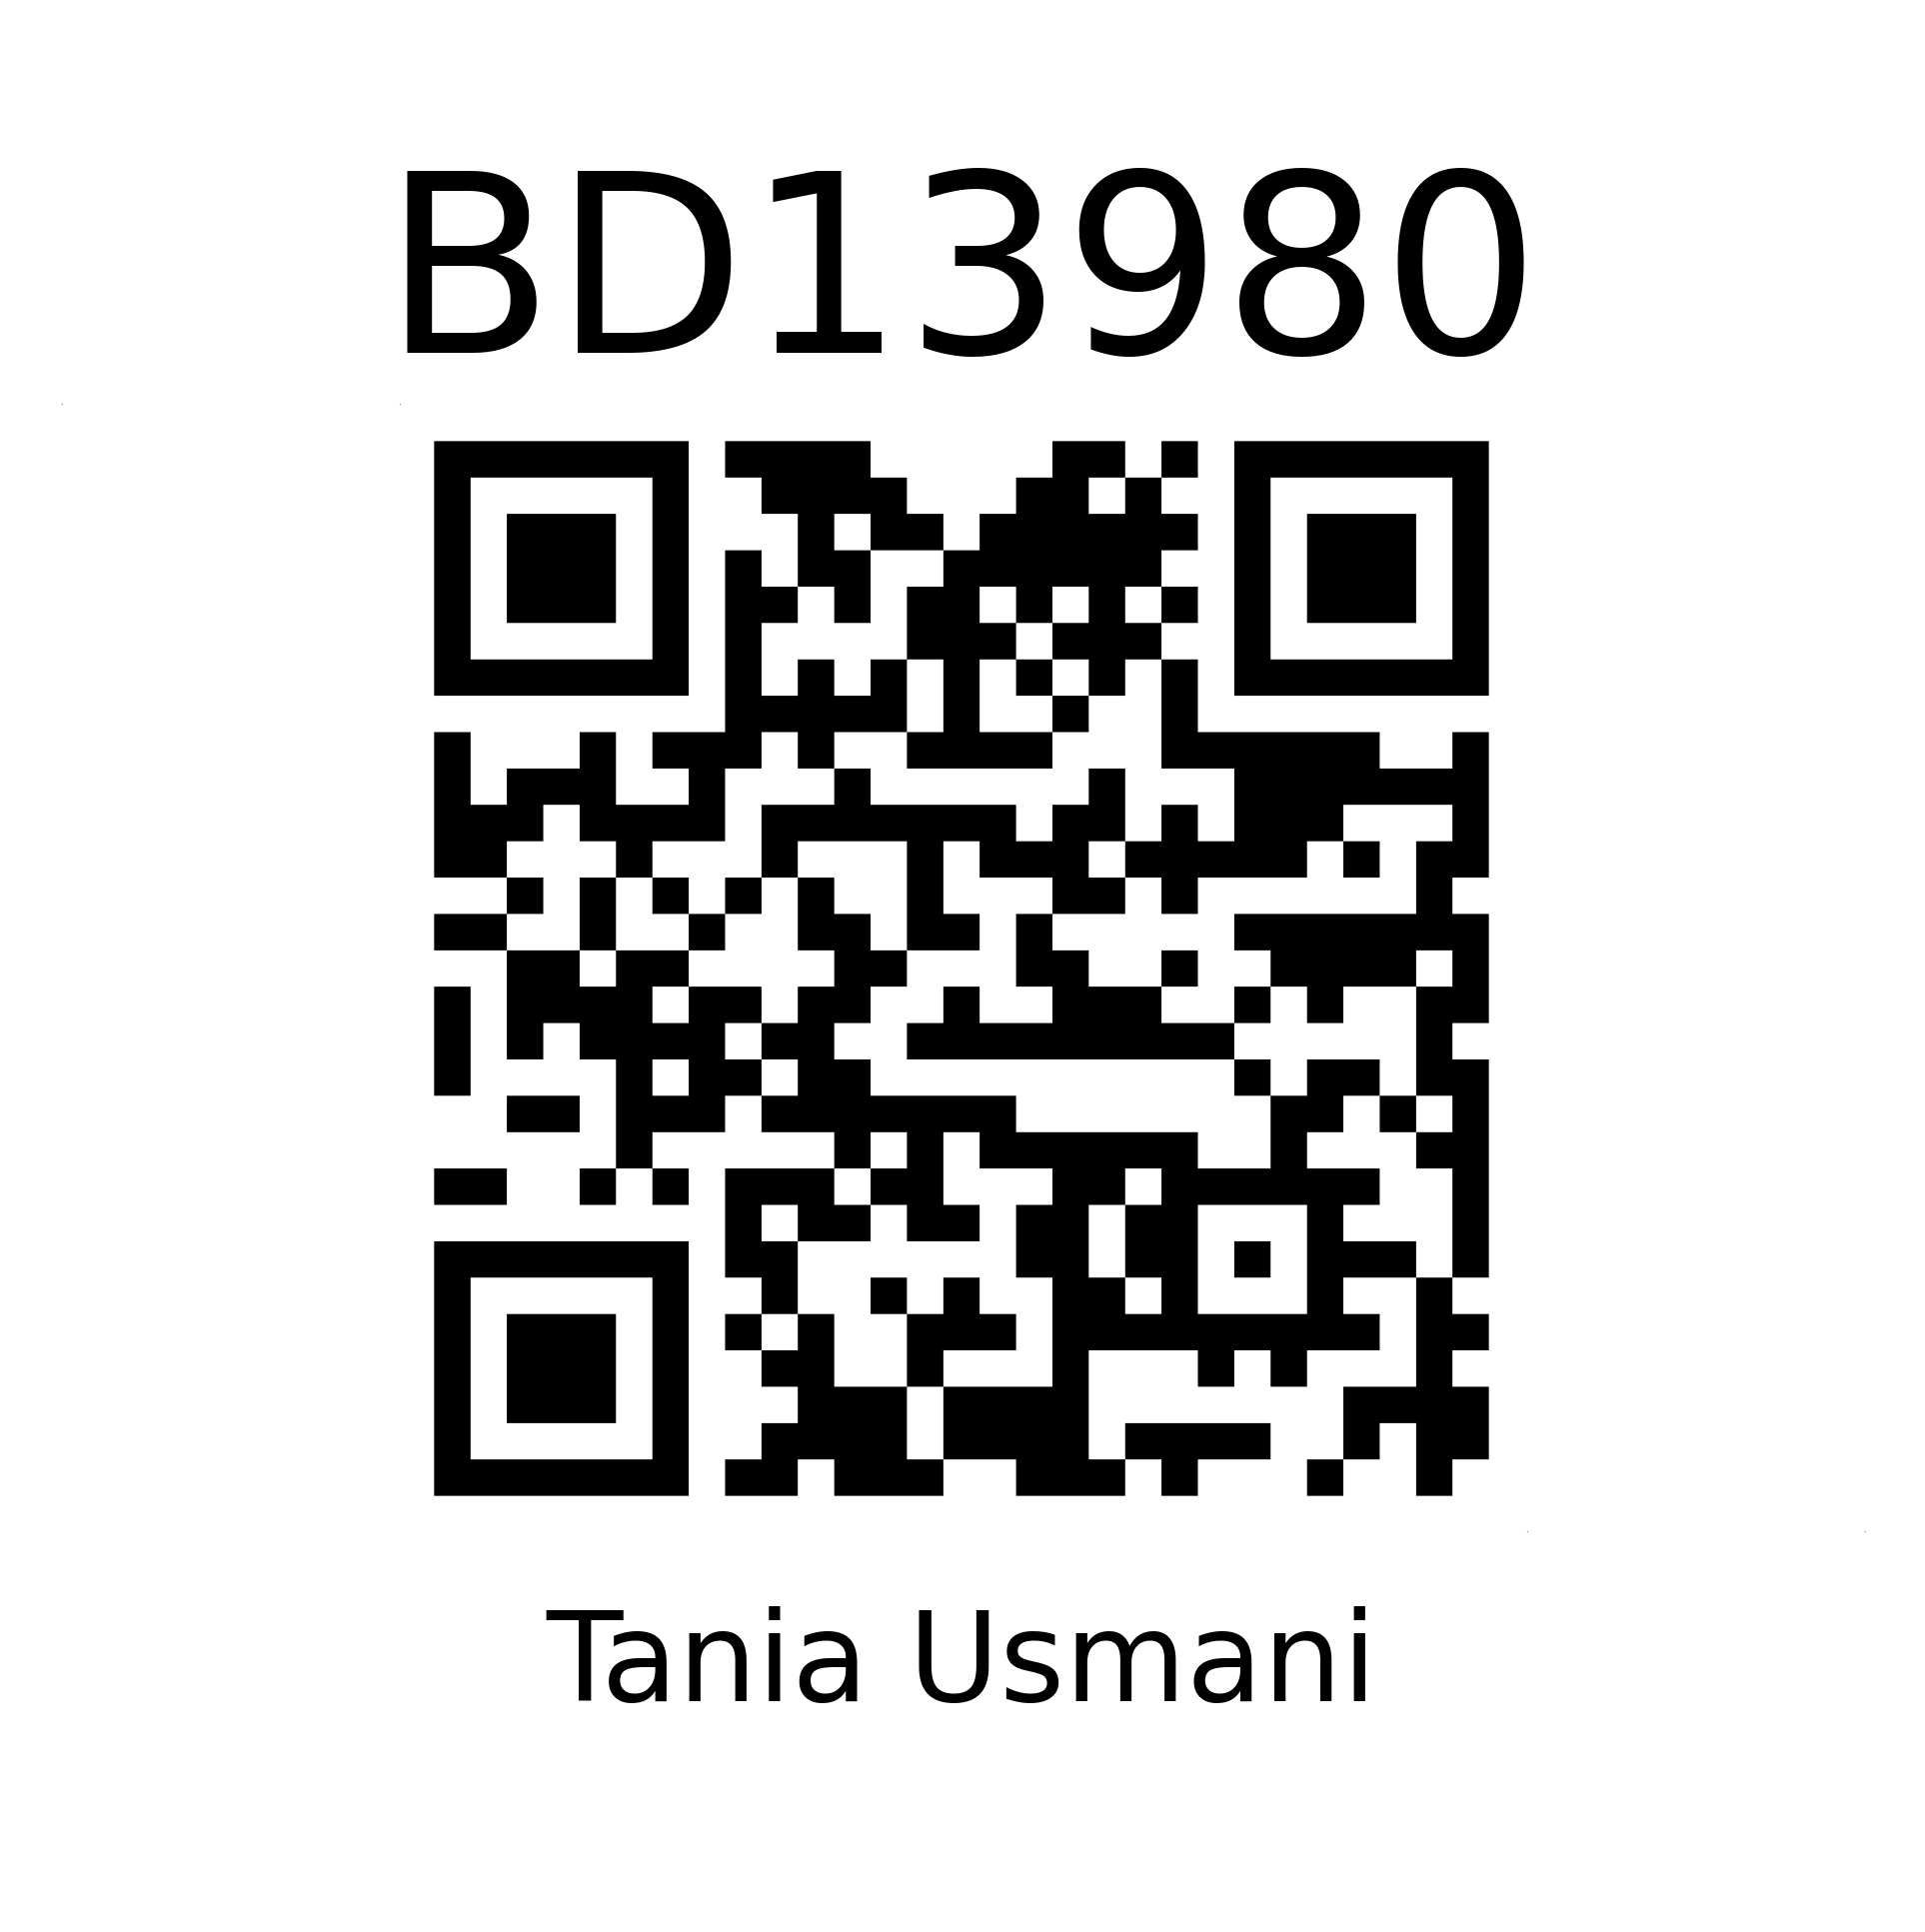

<Figure size 244.094x244.094 with 0 Axes>

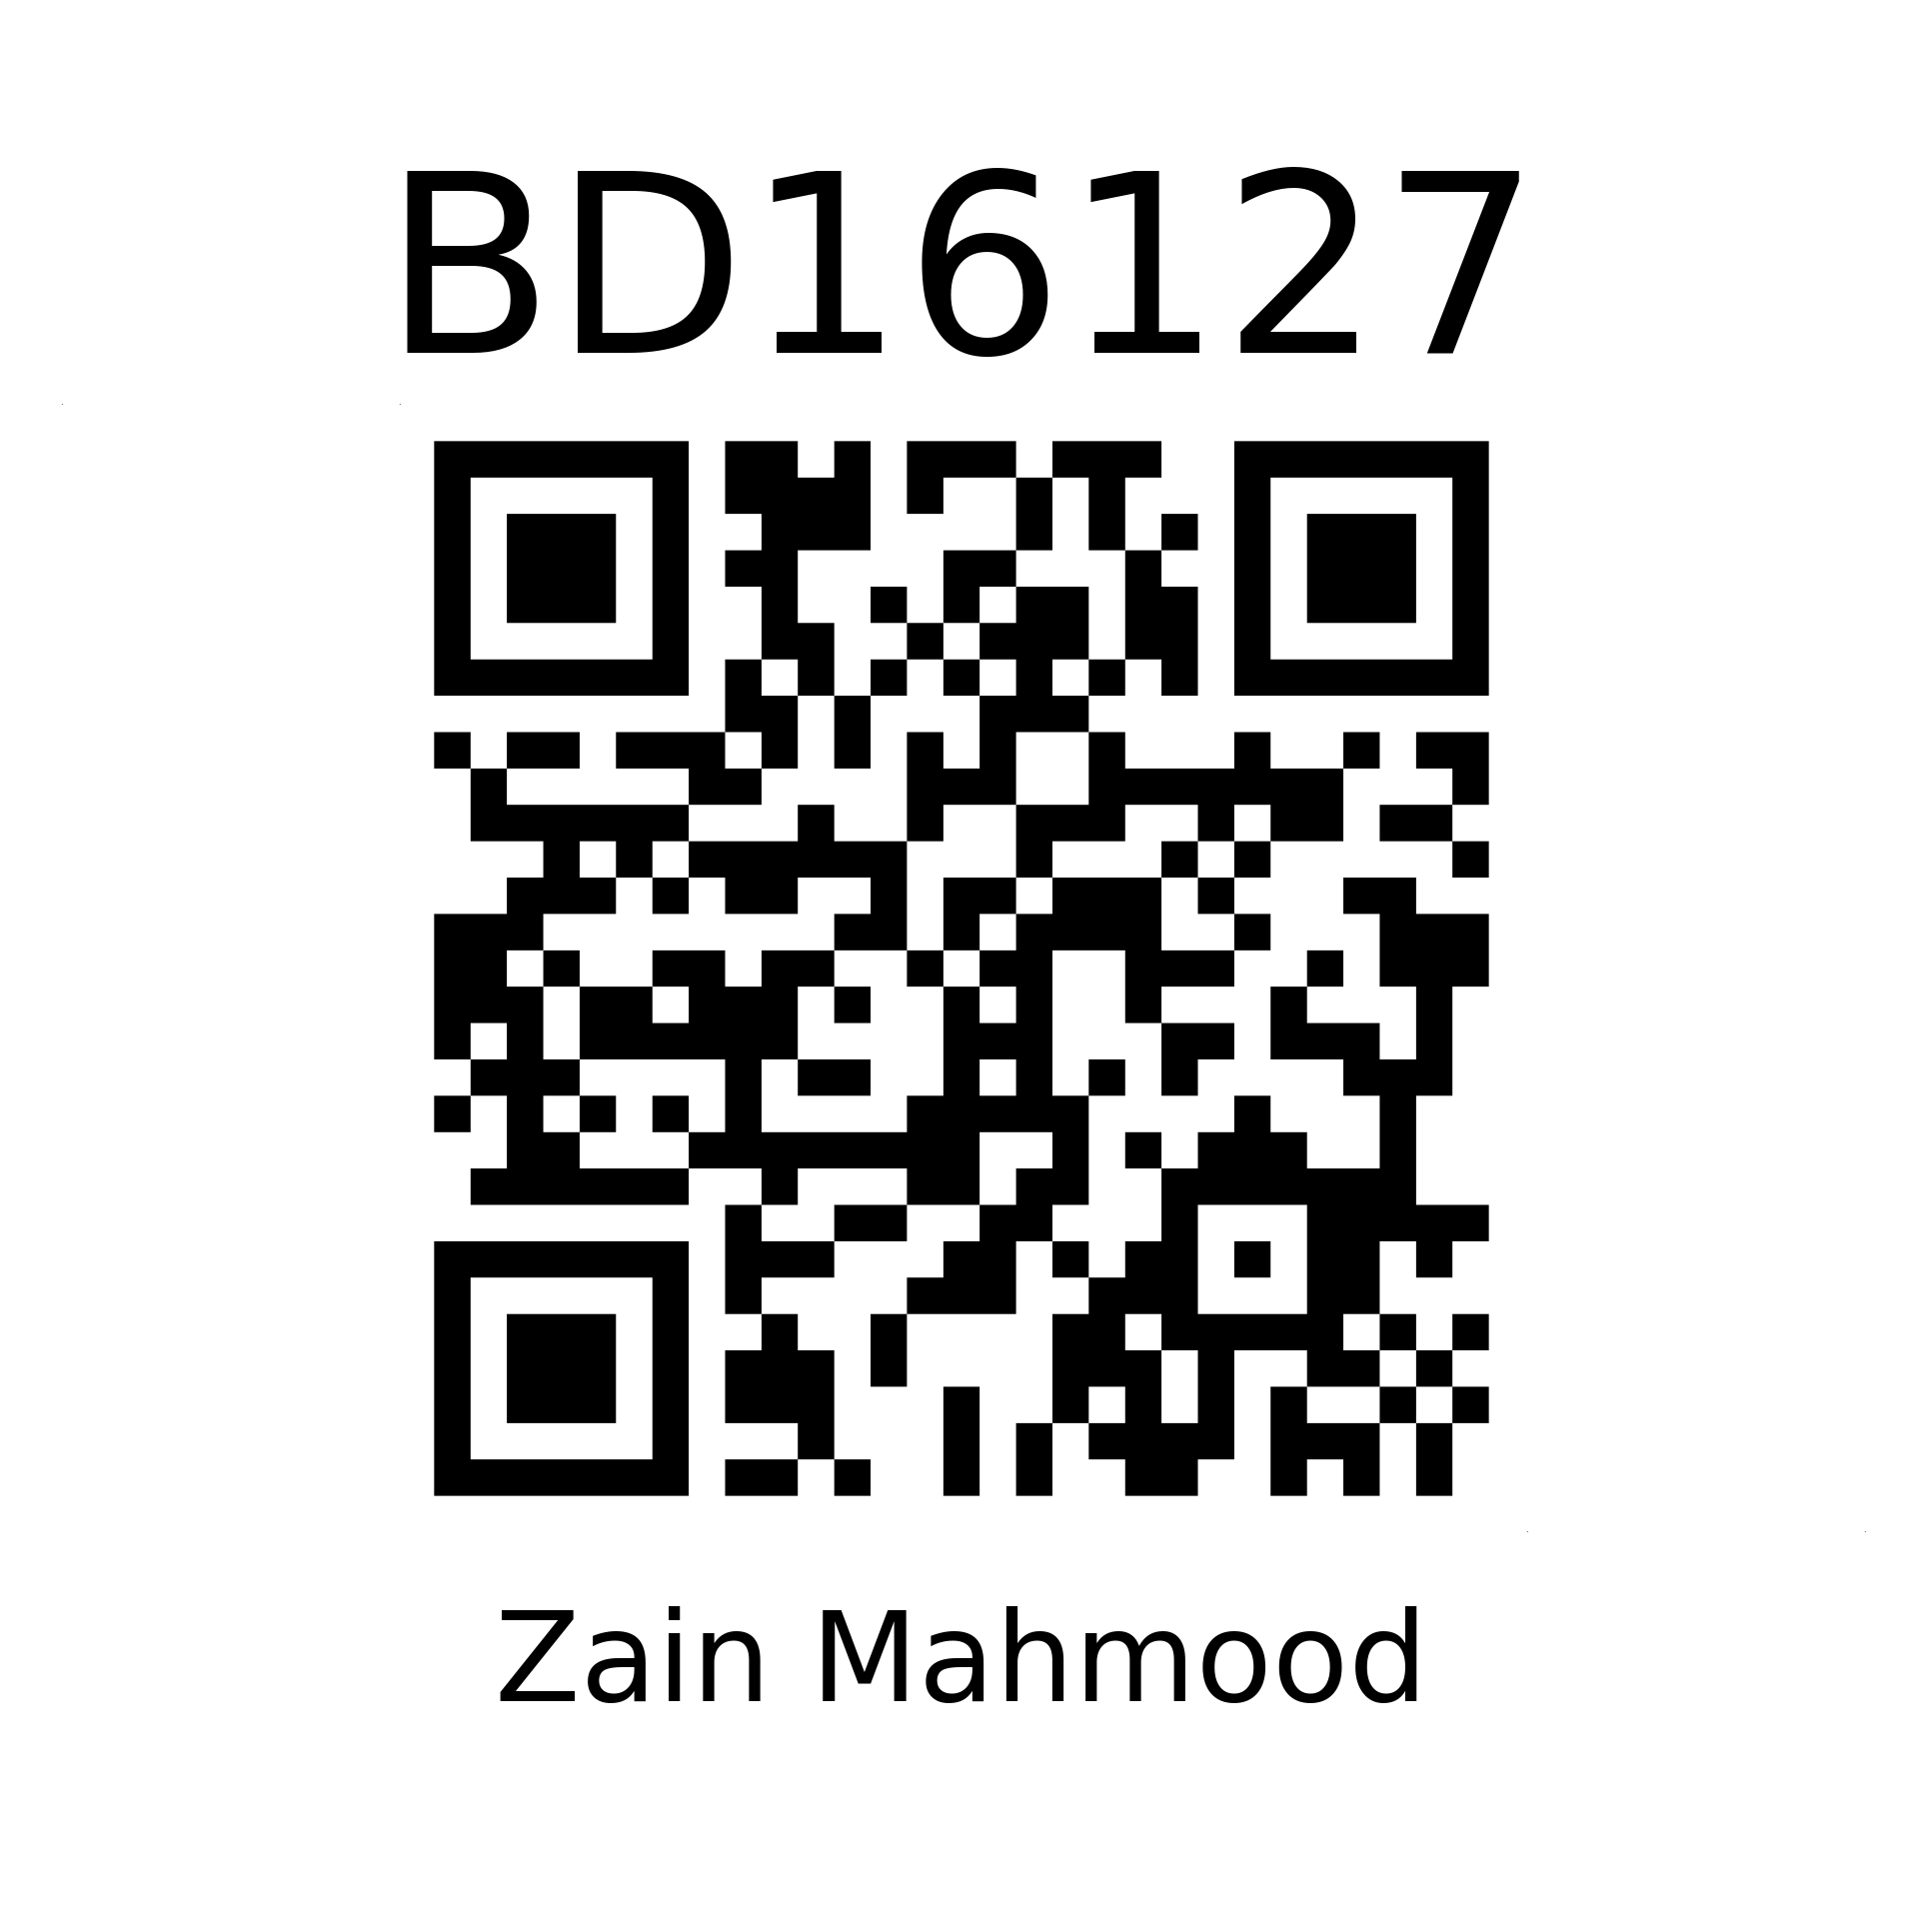

<Figure size 244.094x244.094 with 0 Axes>

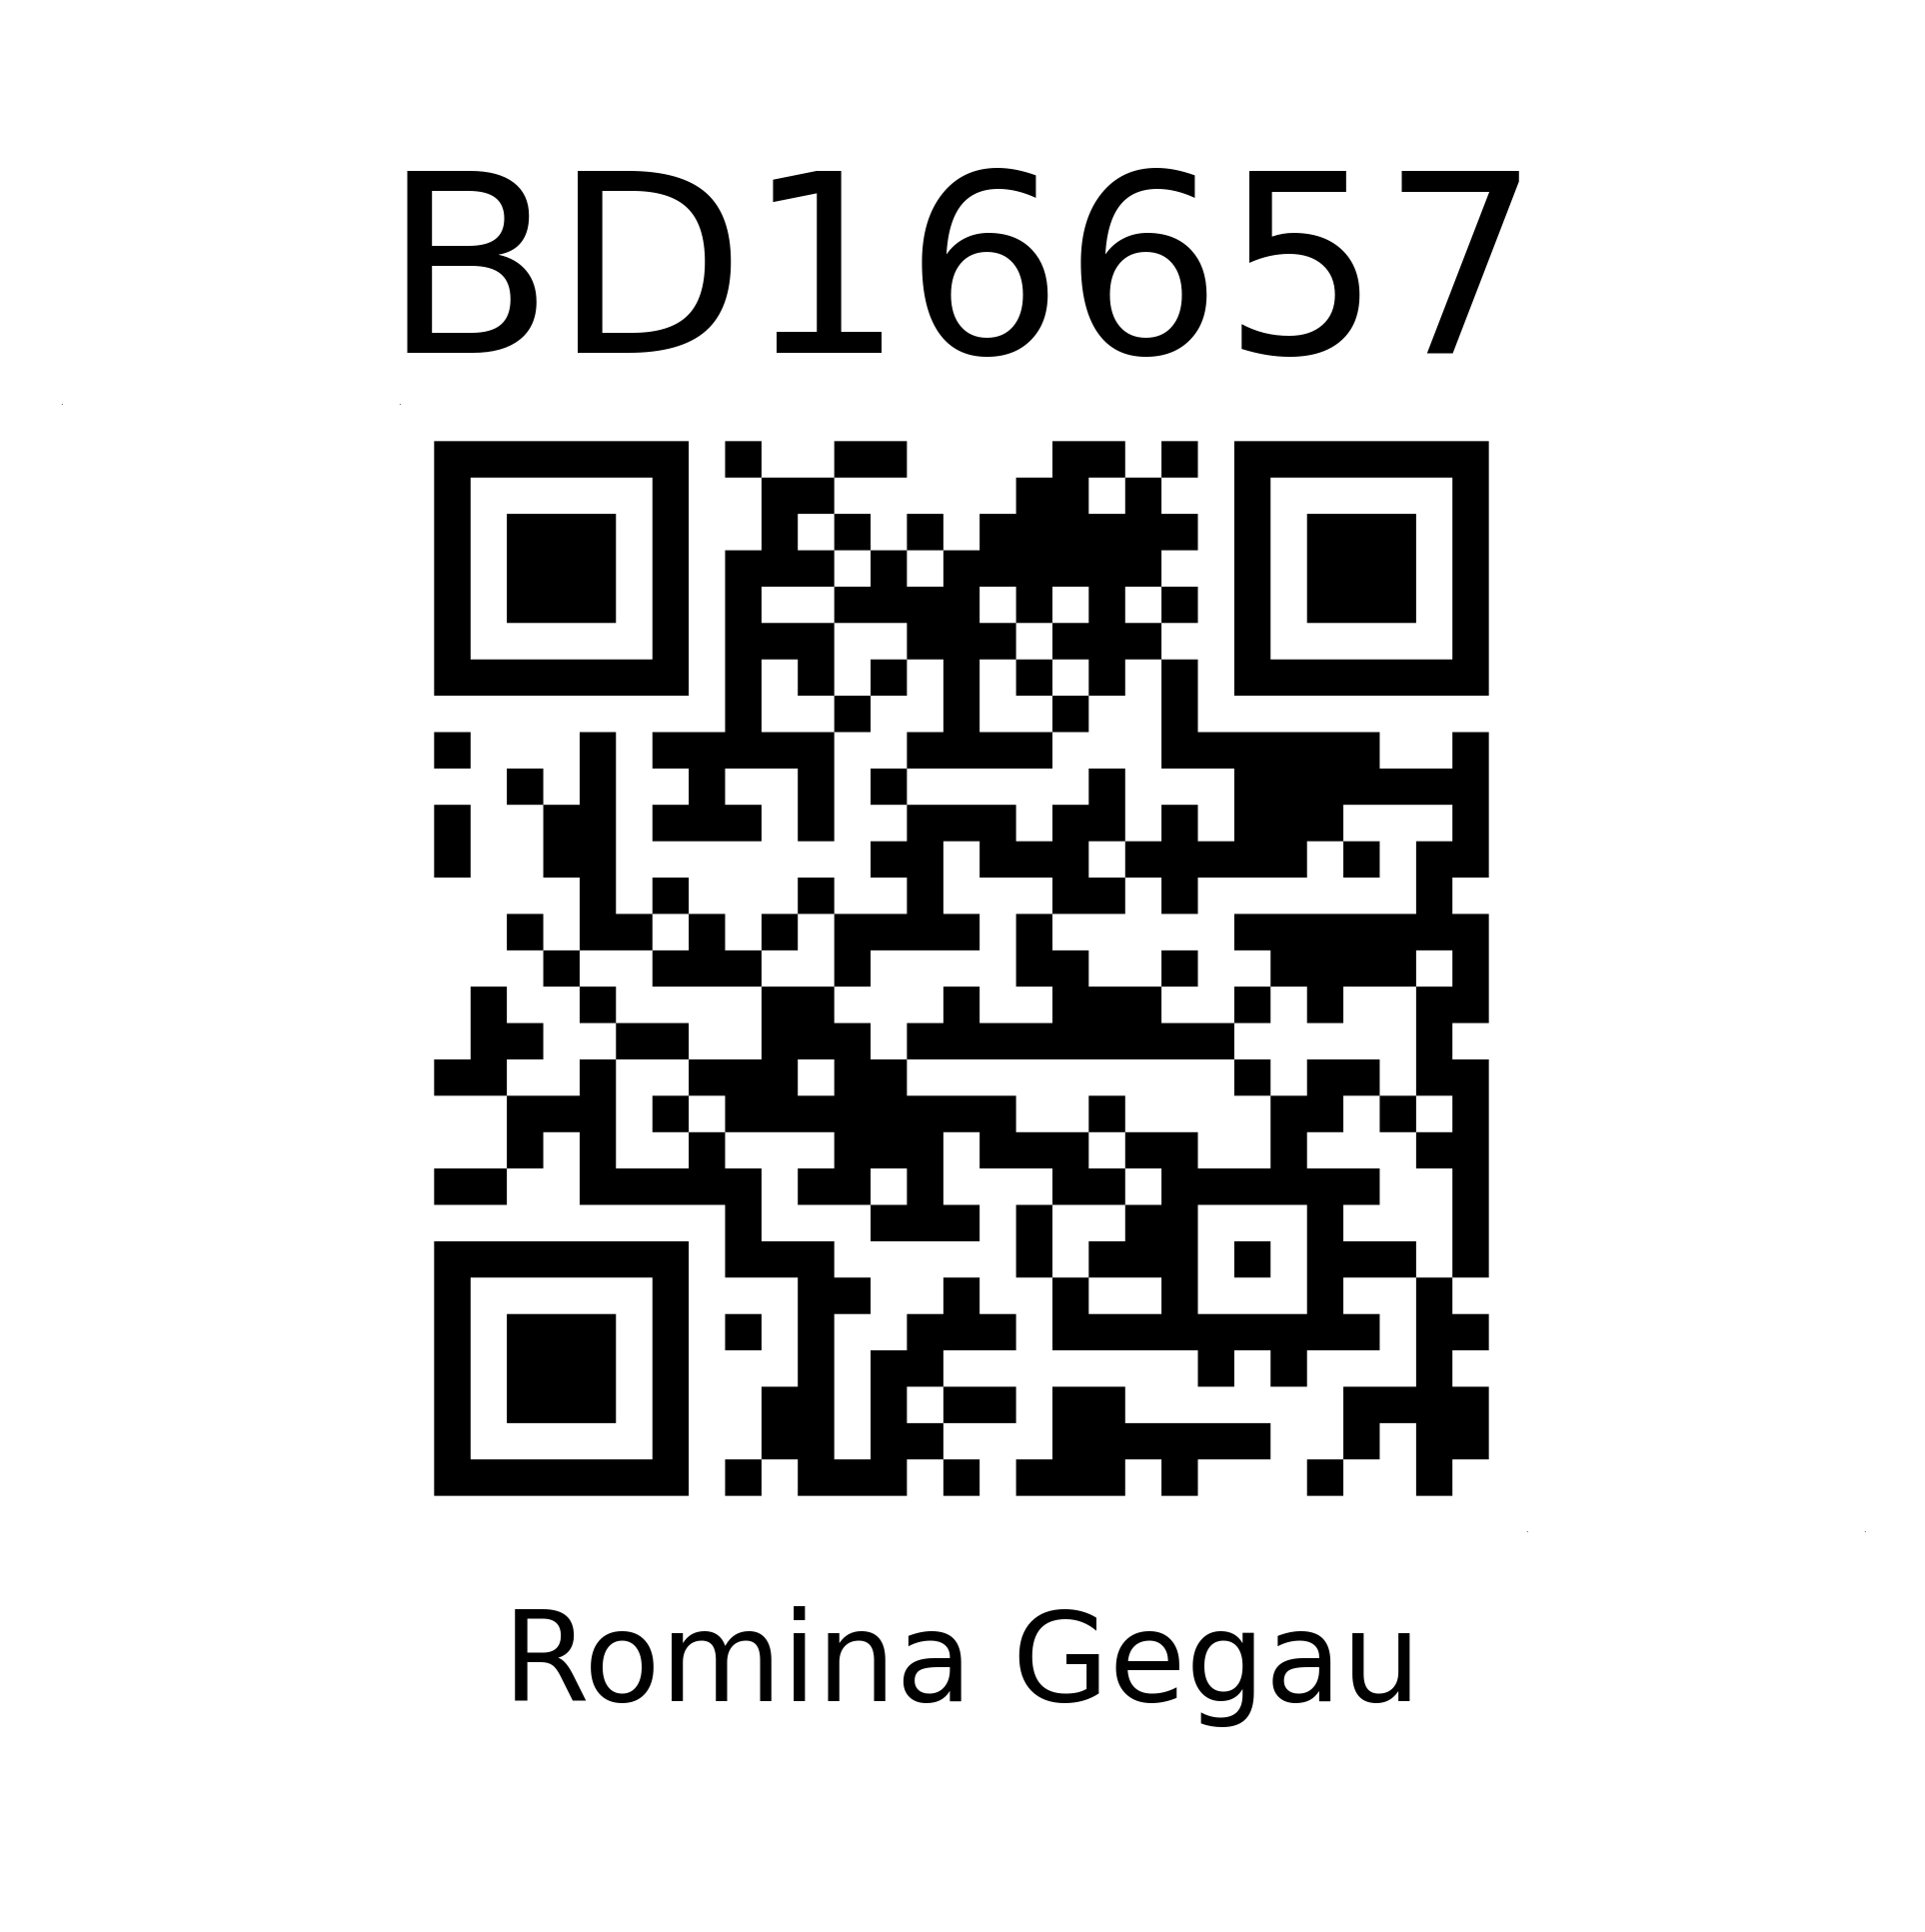

<Figure size 244.094x244.094 with 0 Axes>

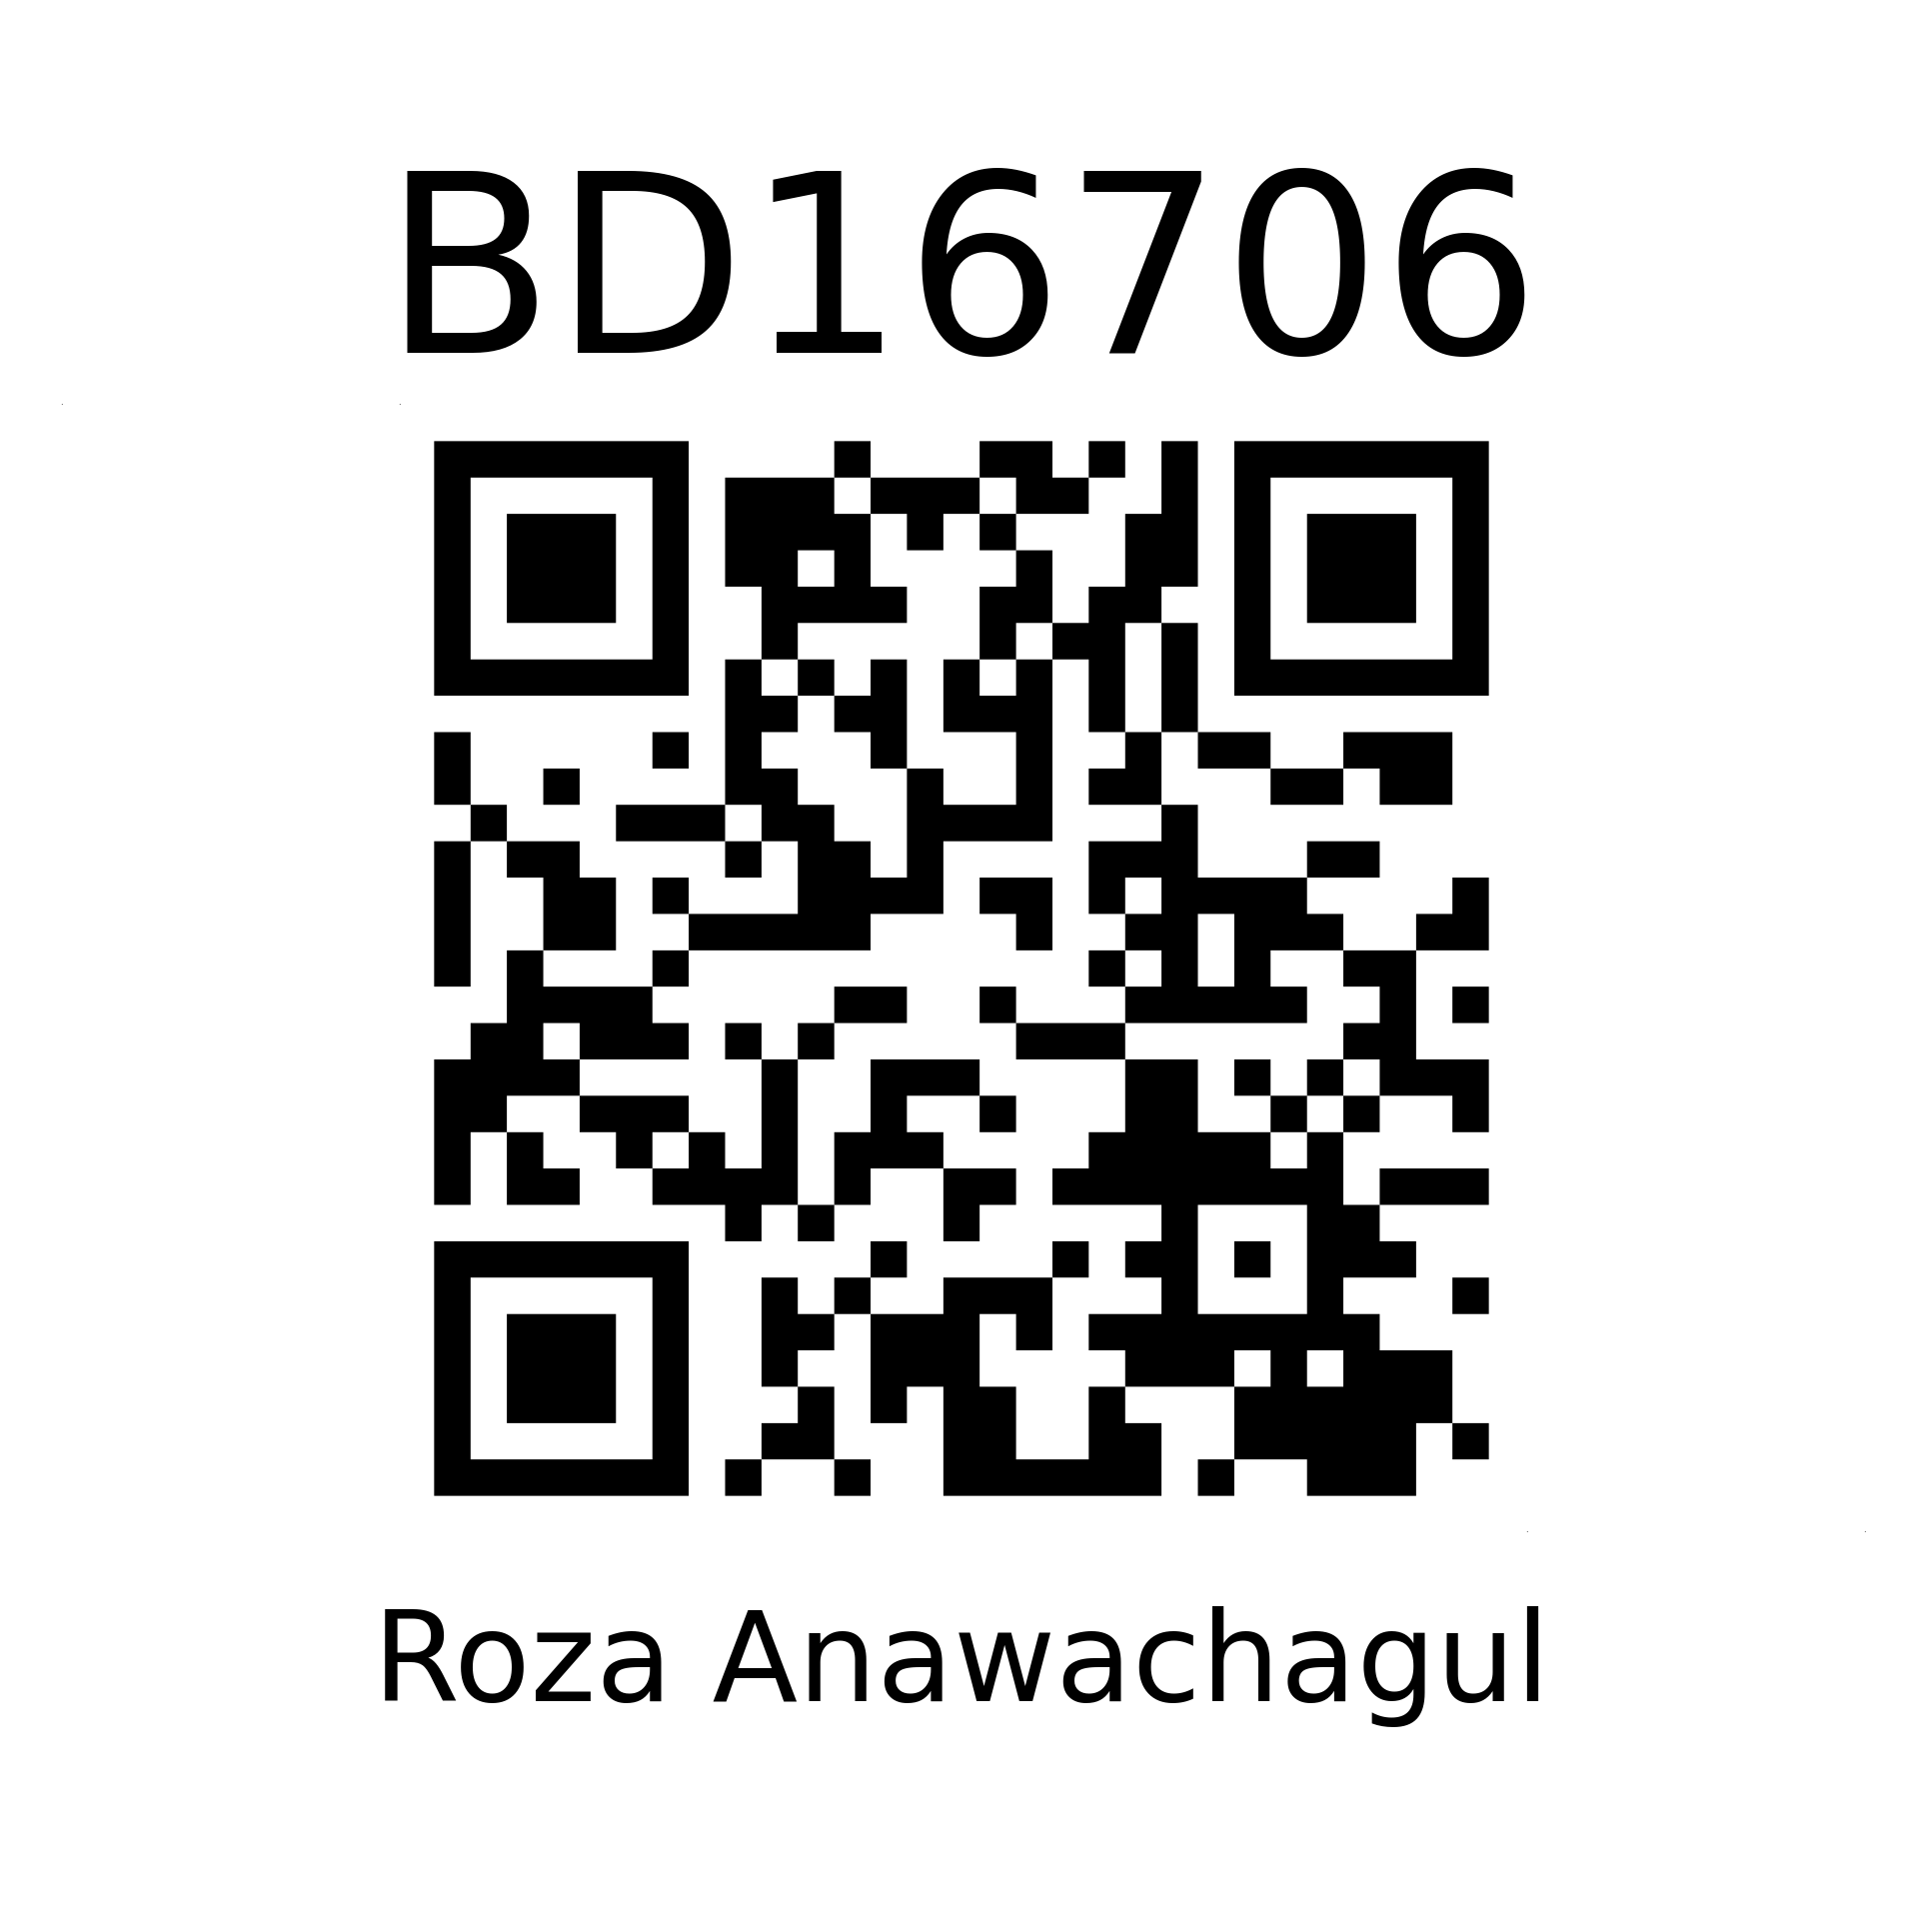

<Figure size 244.094x244.094 with 0 Axes>

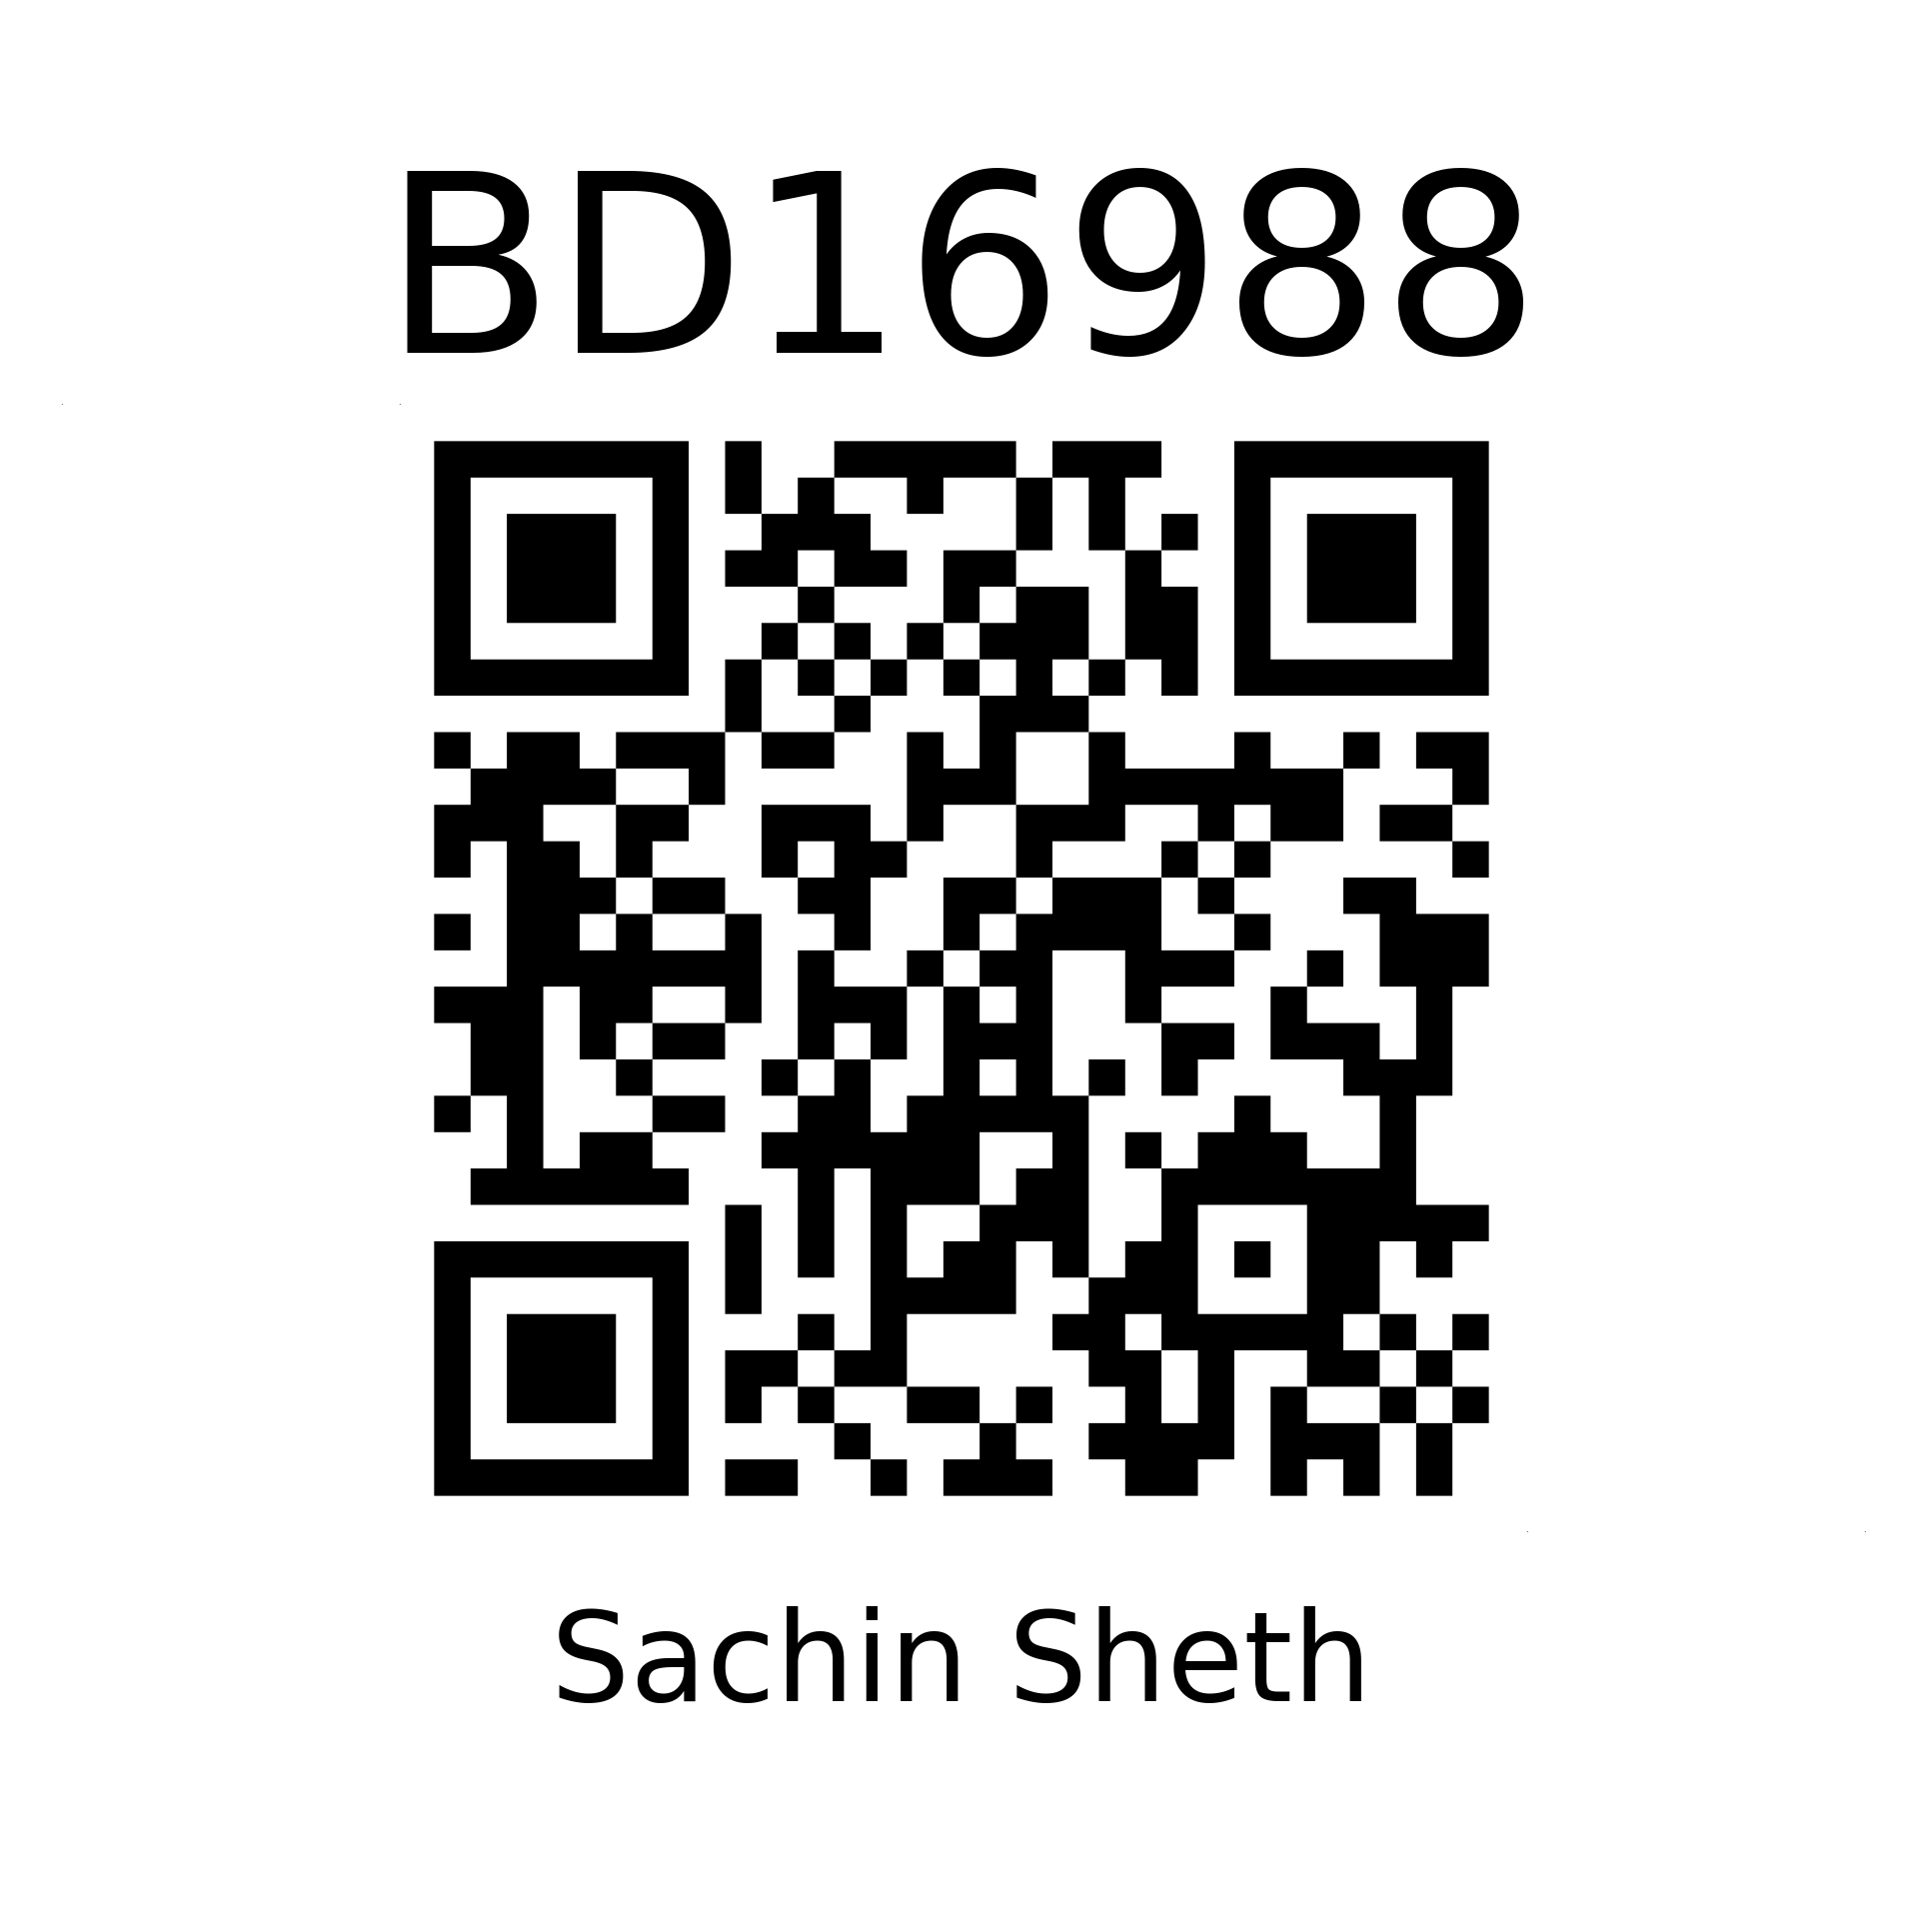

<Figure size 244.094x244.094 with 0 Axes>

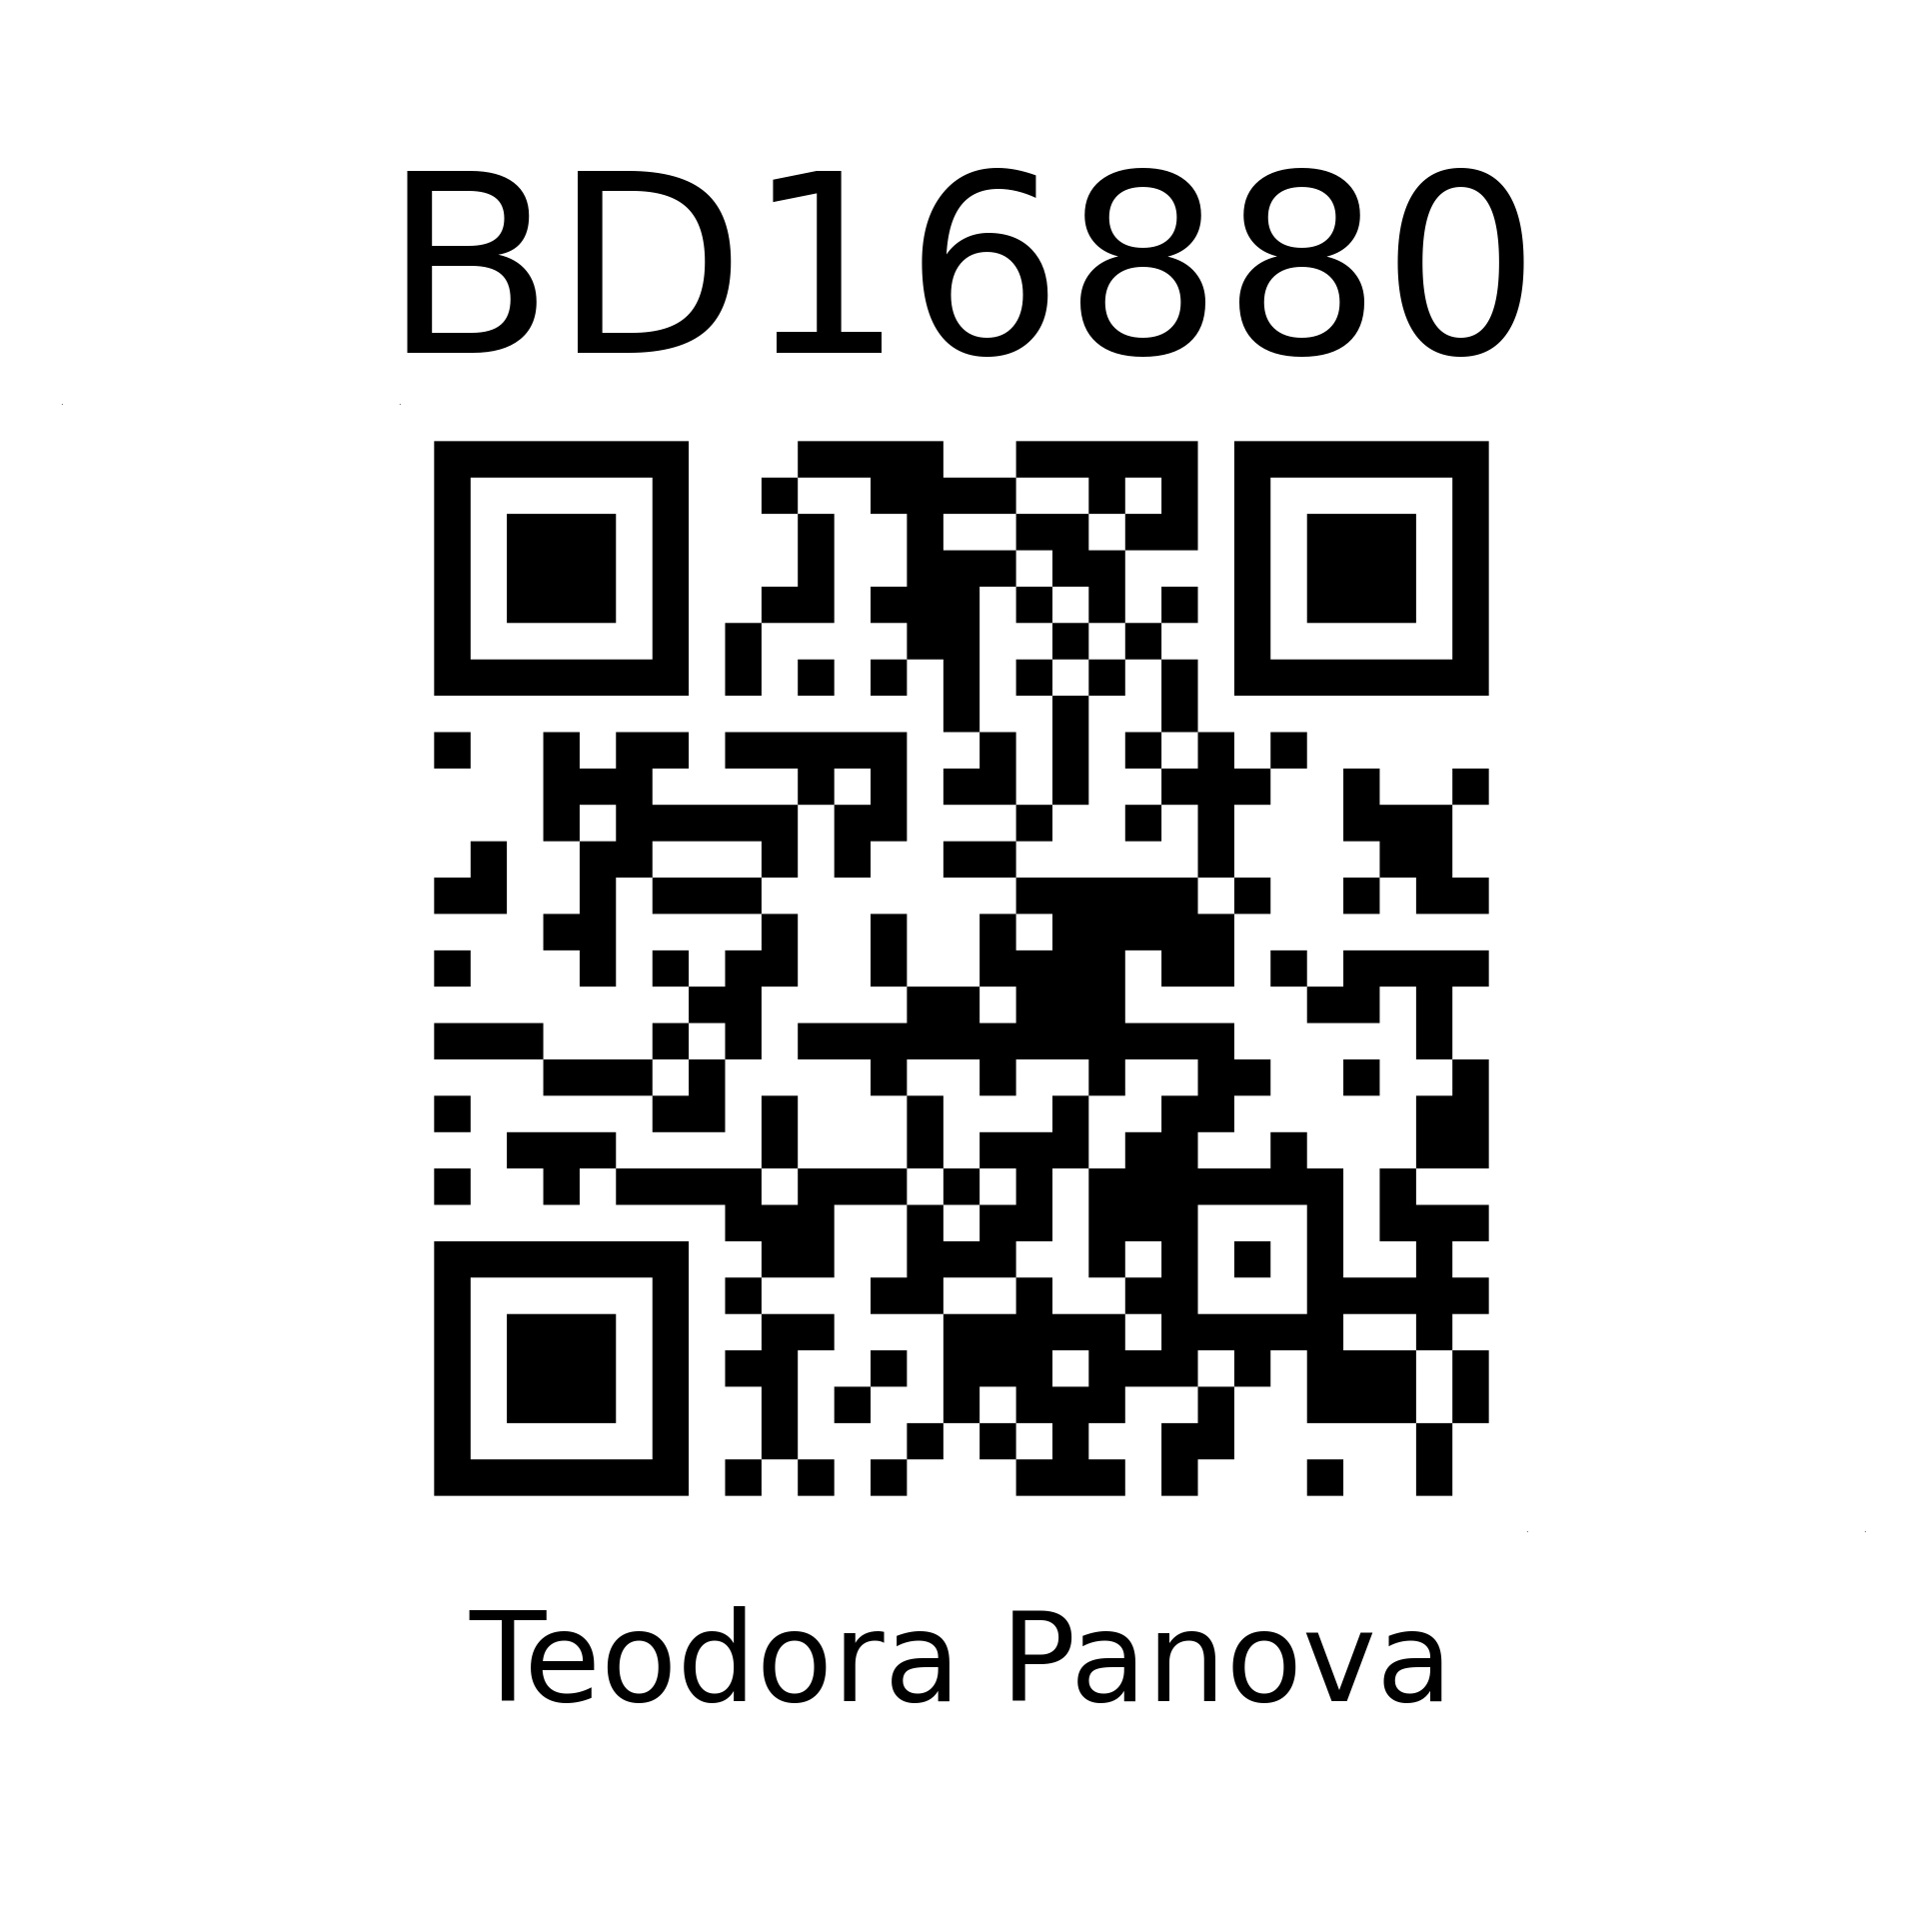

<Figure size 244.094x244.094 with 0 Axes>

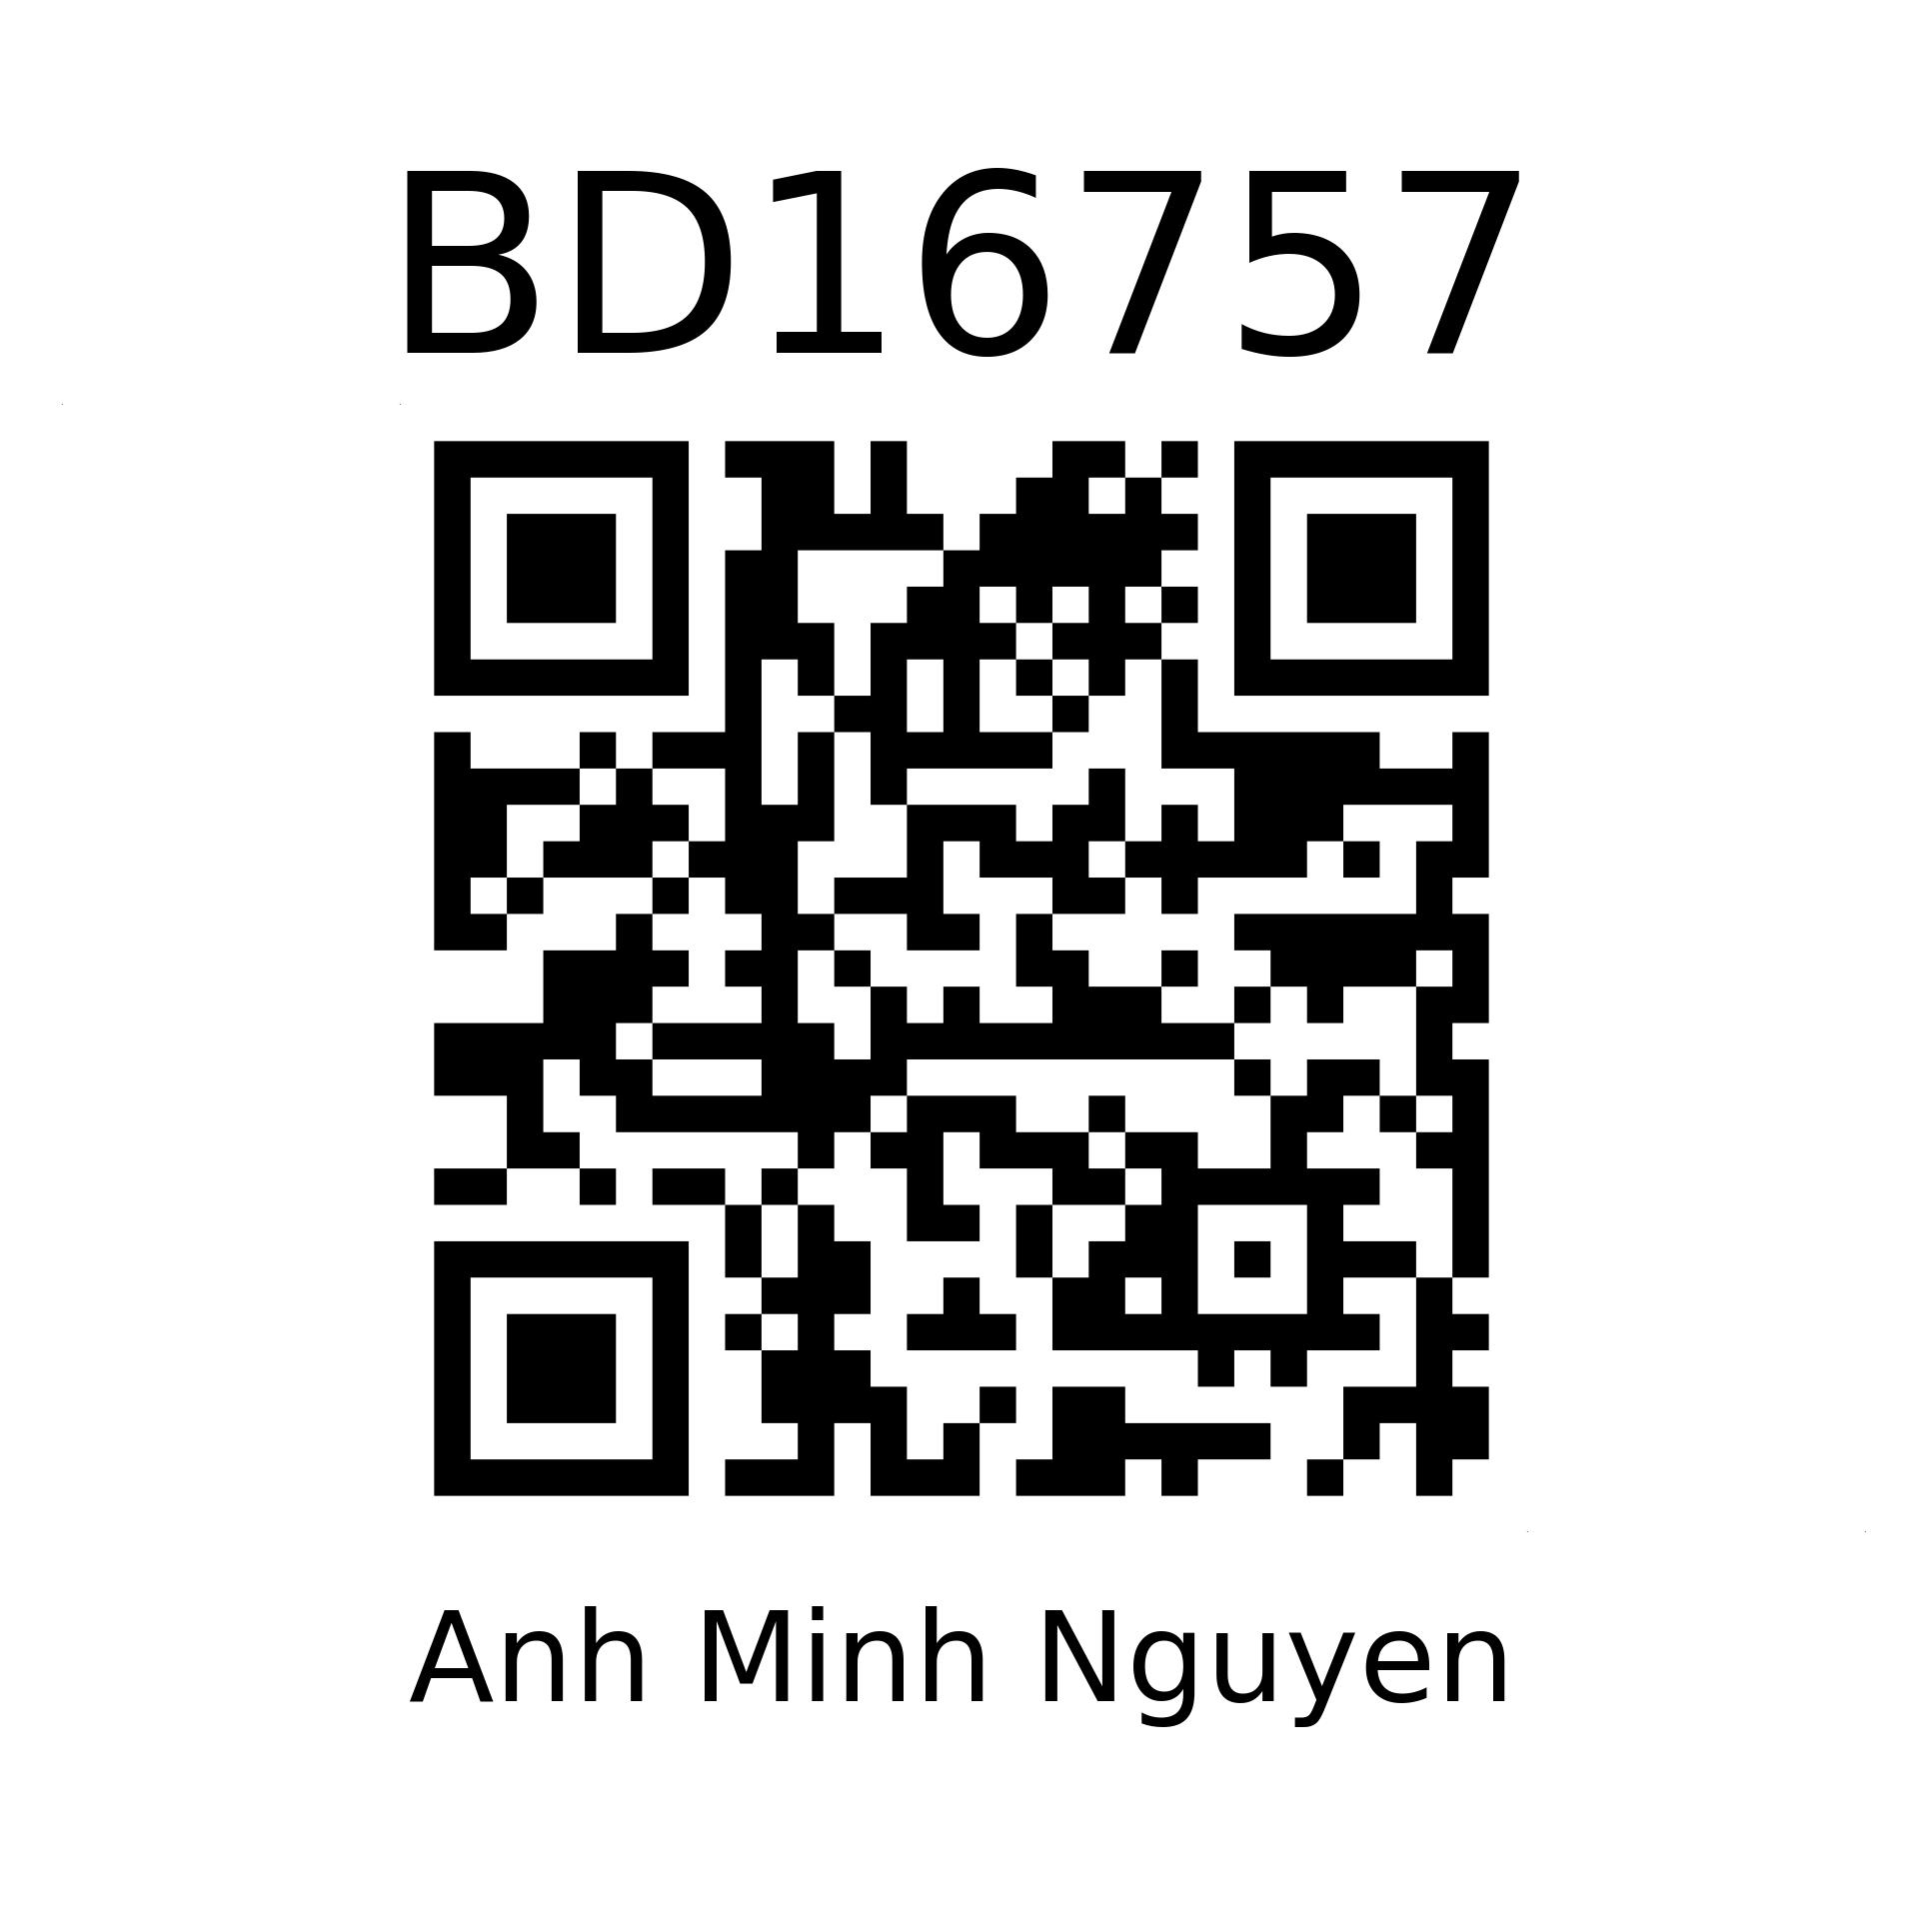

<Figure size 244.094x244.094 with 0 Axes>

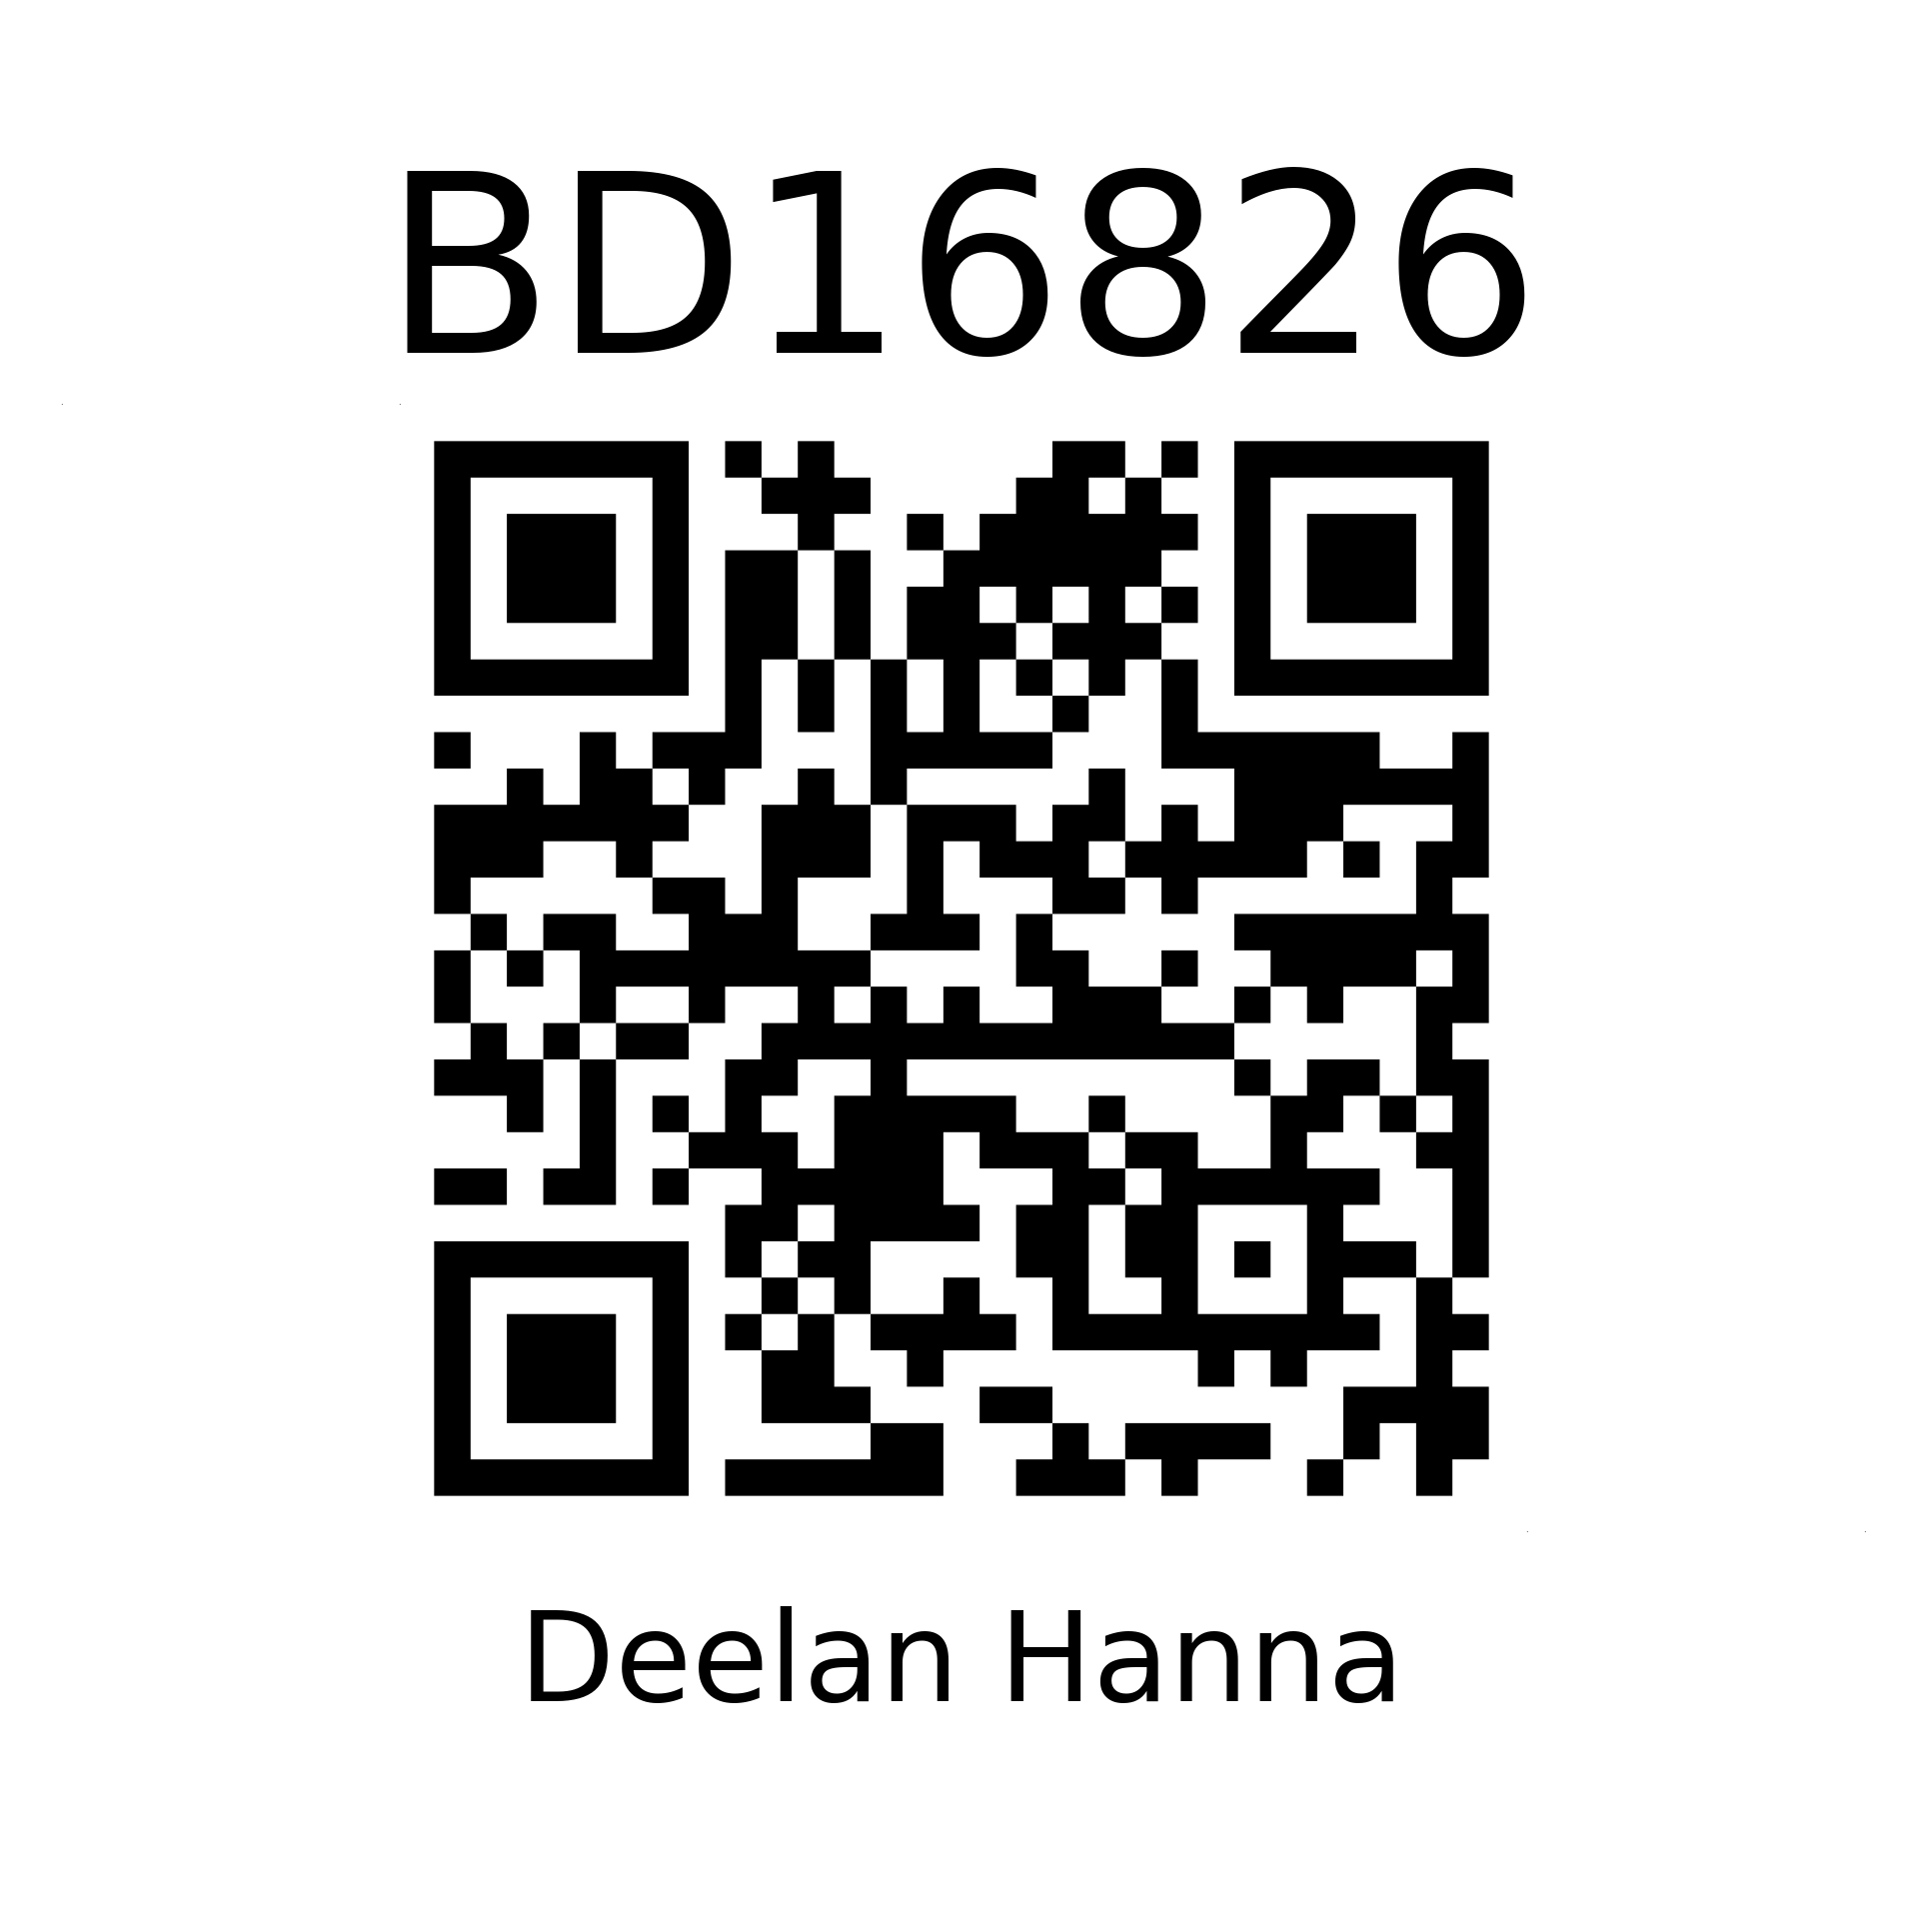

<Figure size 244.094x244.094 with 0 Axes>

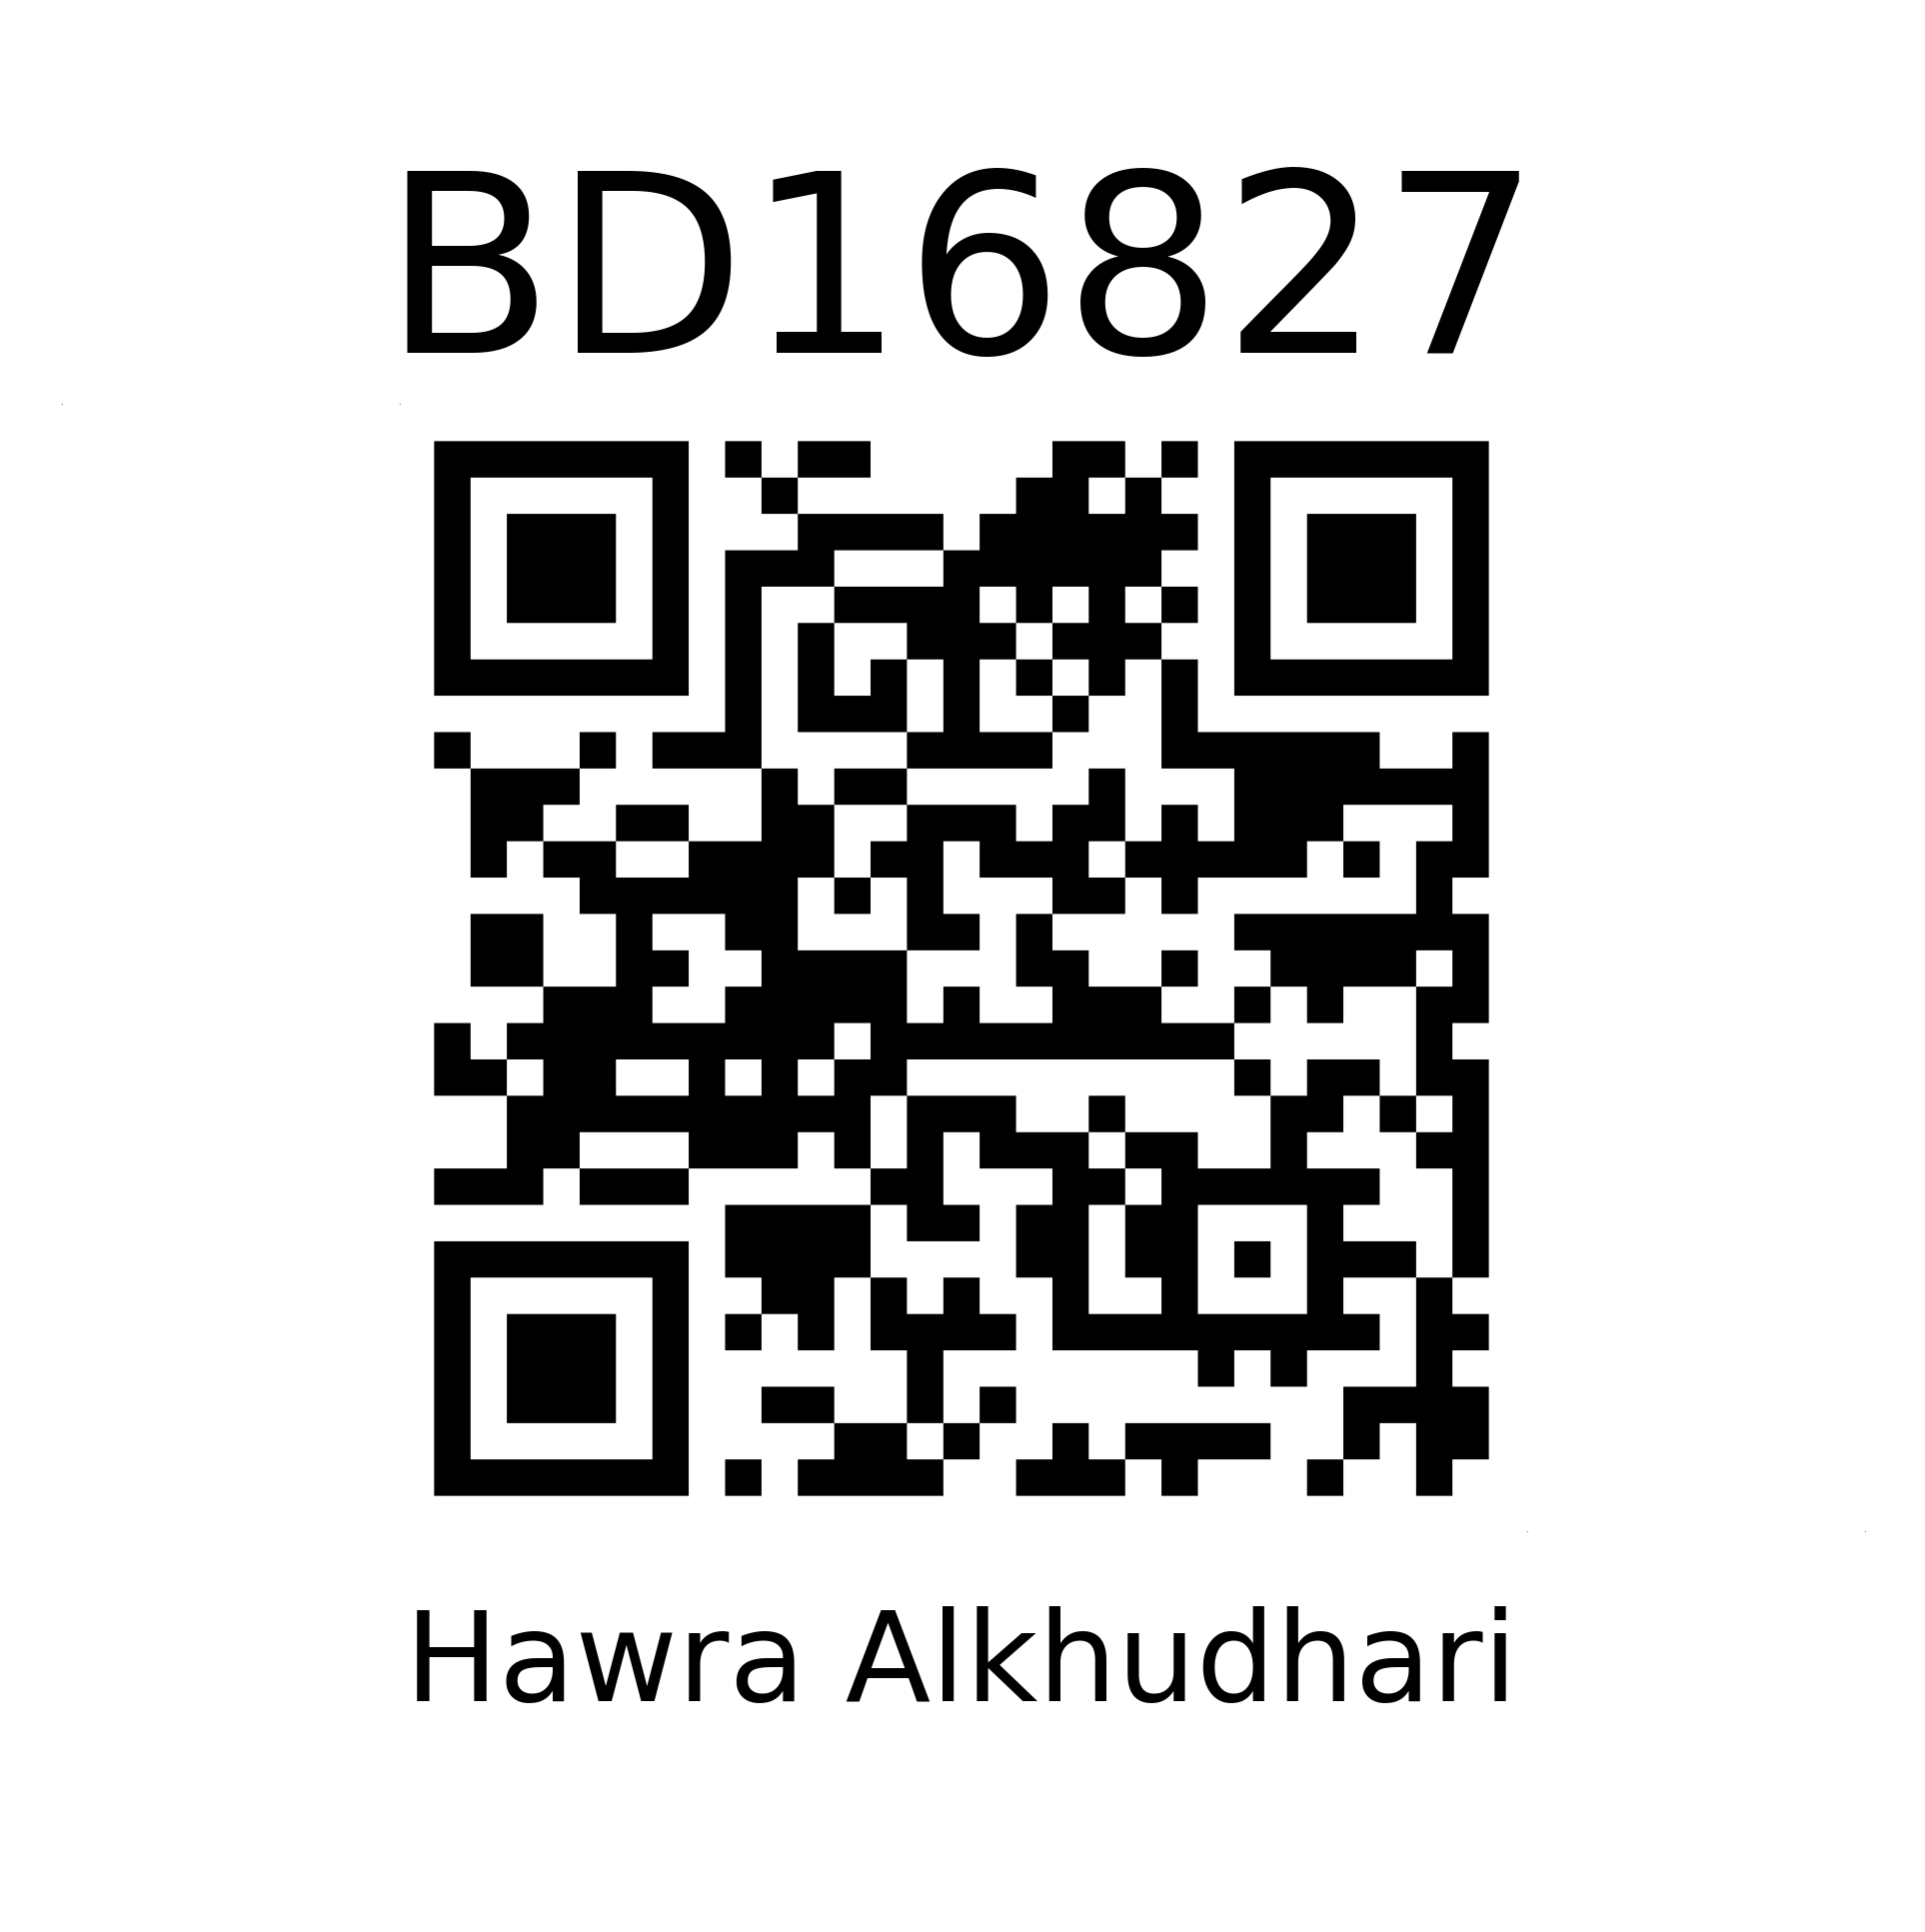

<Figure size 244.094x244.094 with 0 Axes>

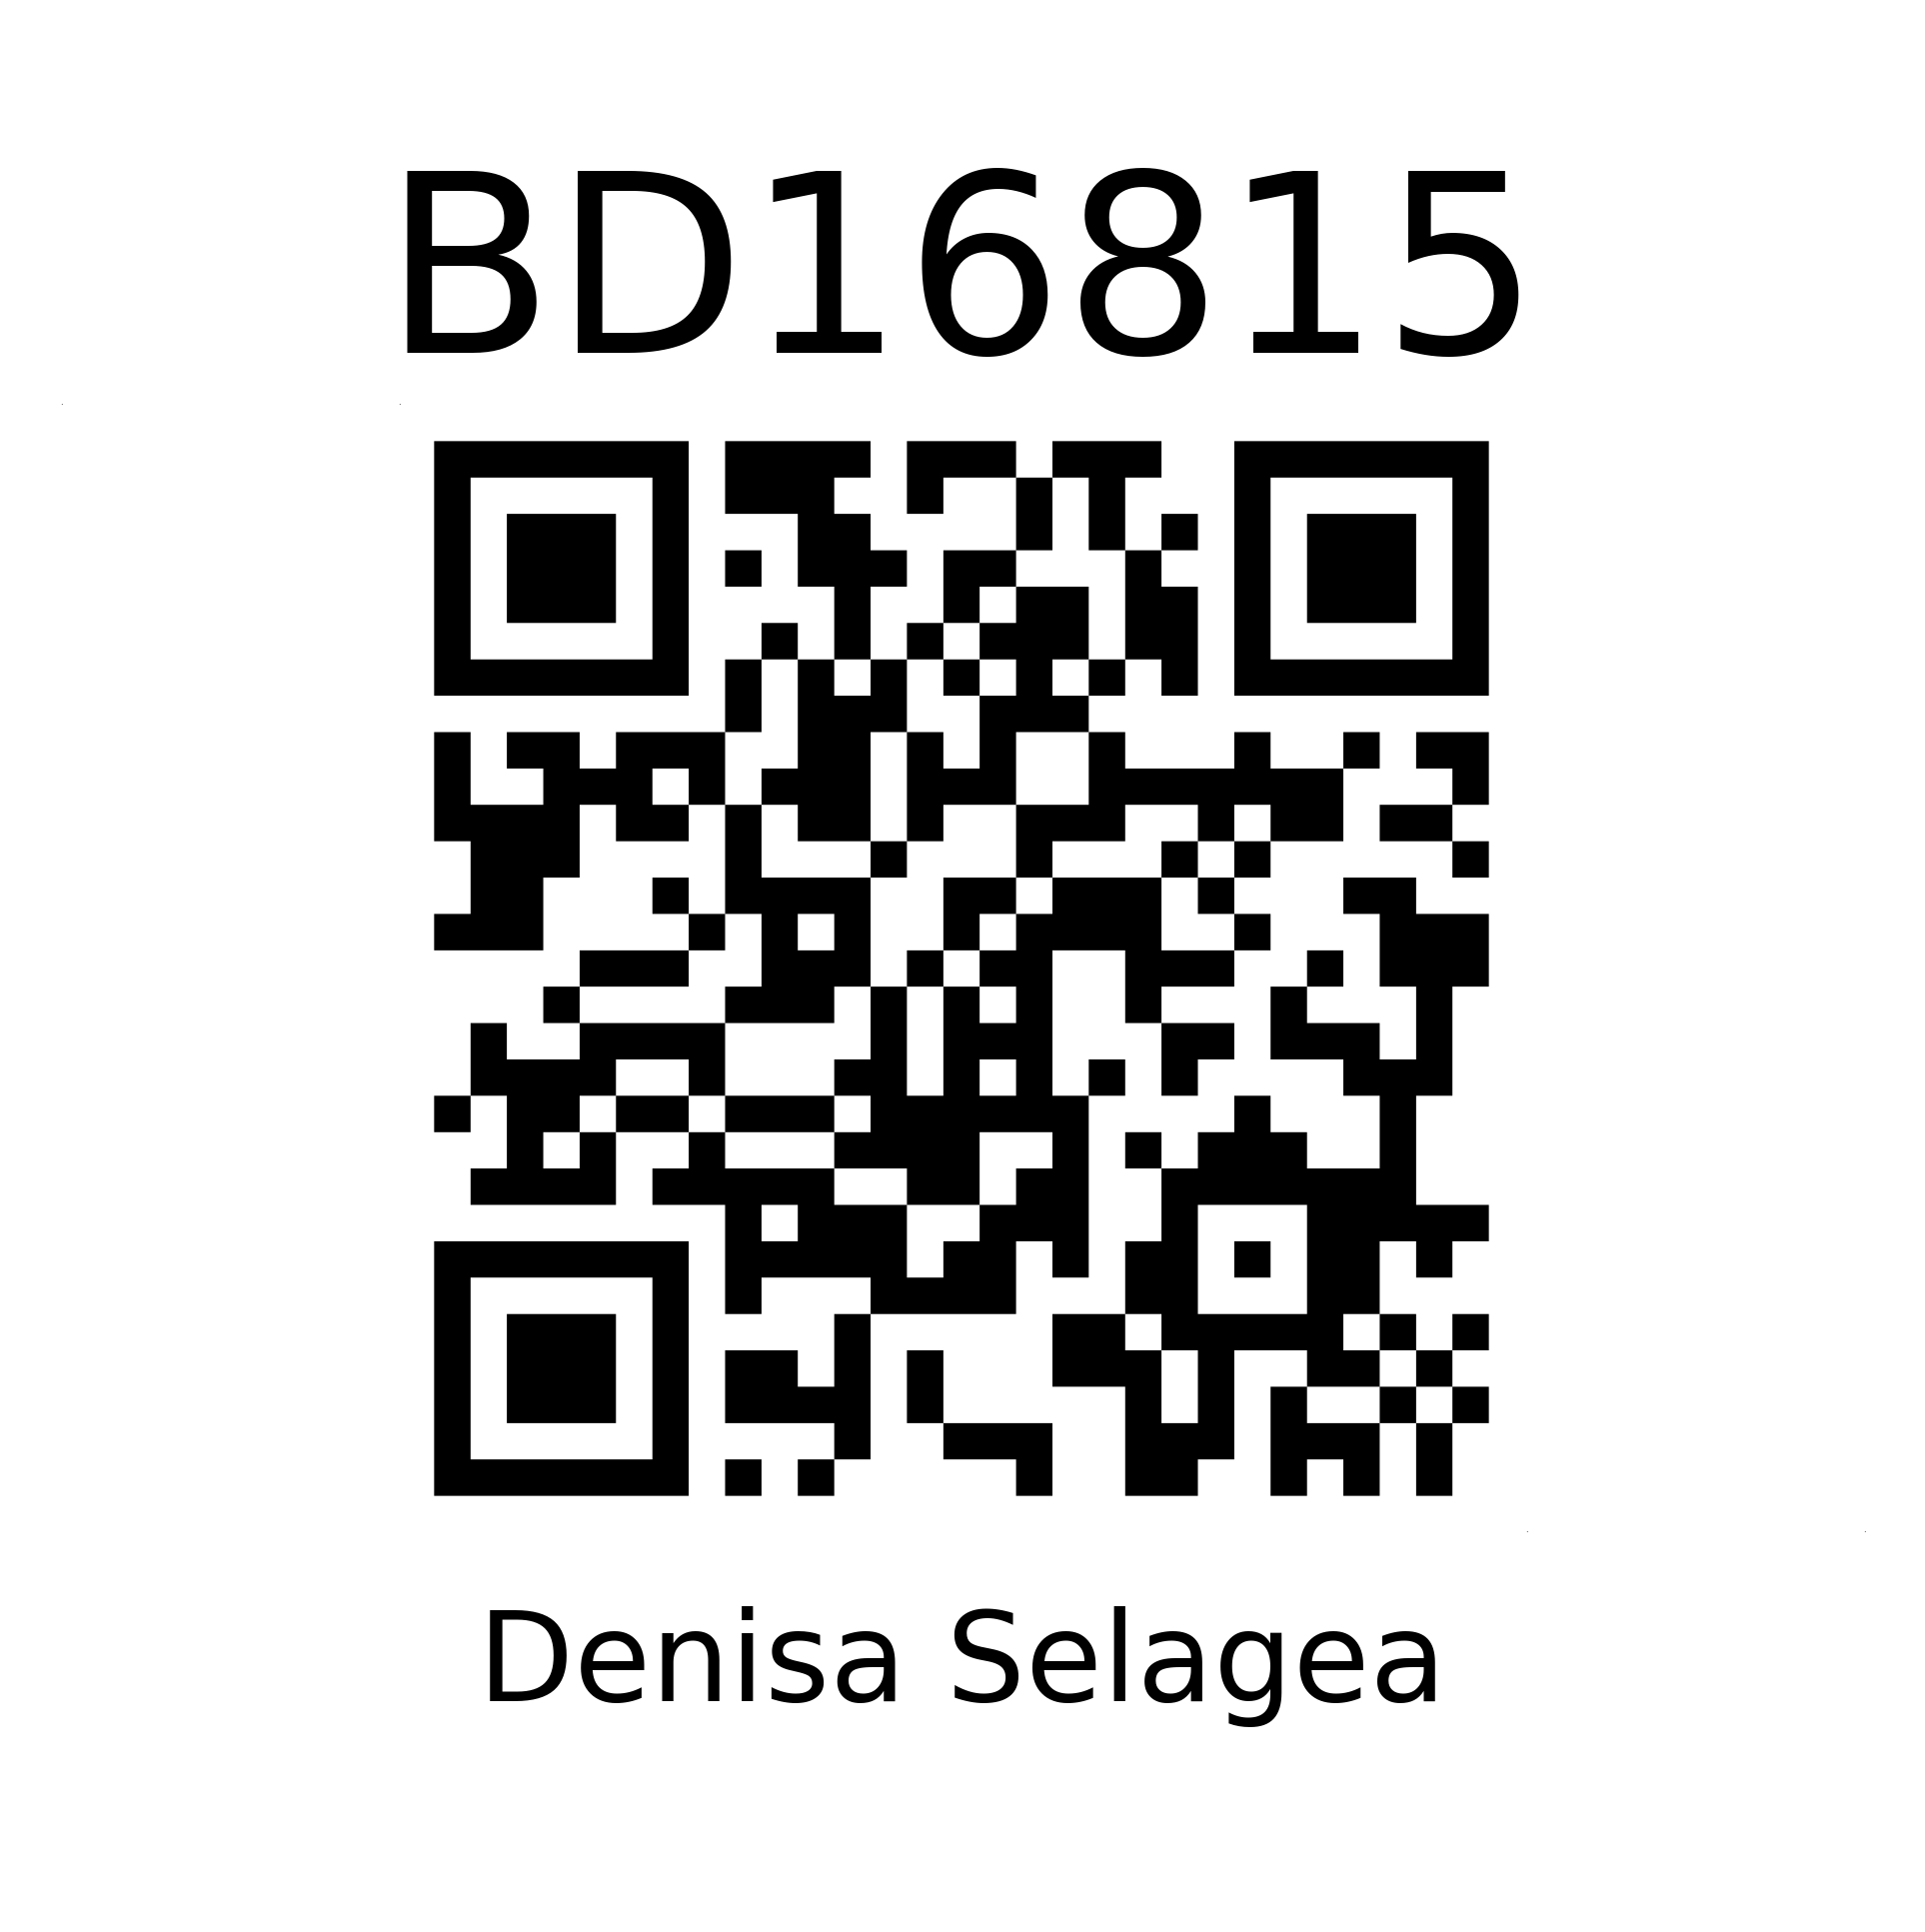

<Figure size 244.094x244.094 with 0 Axes>

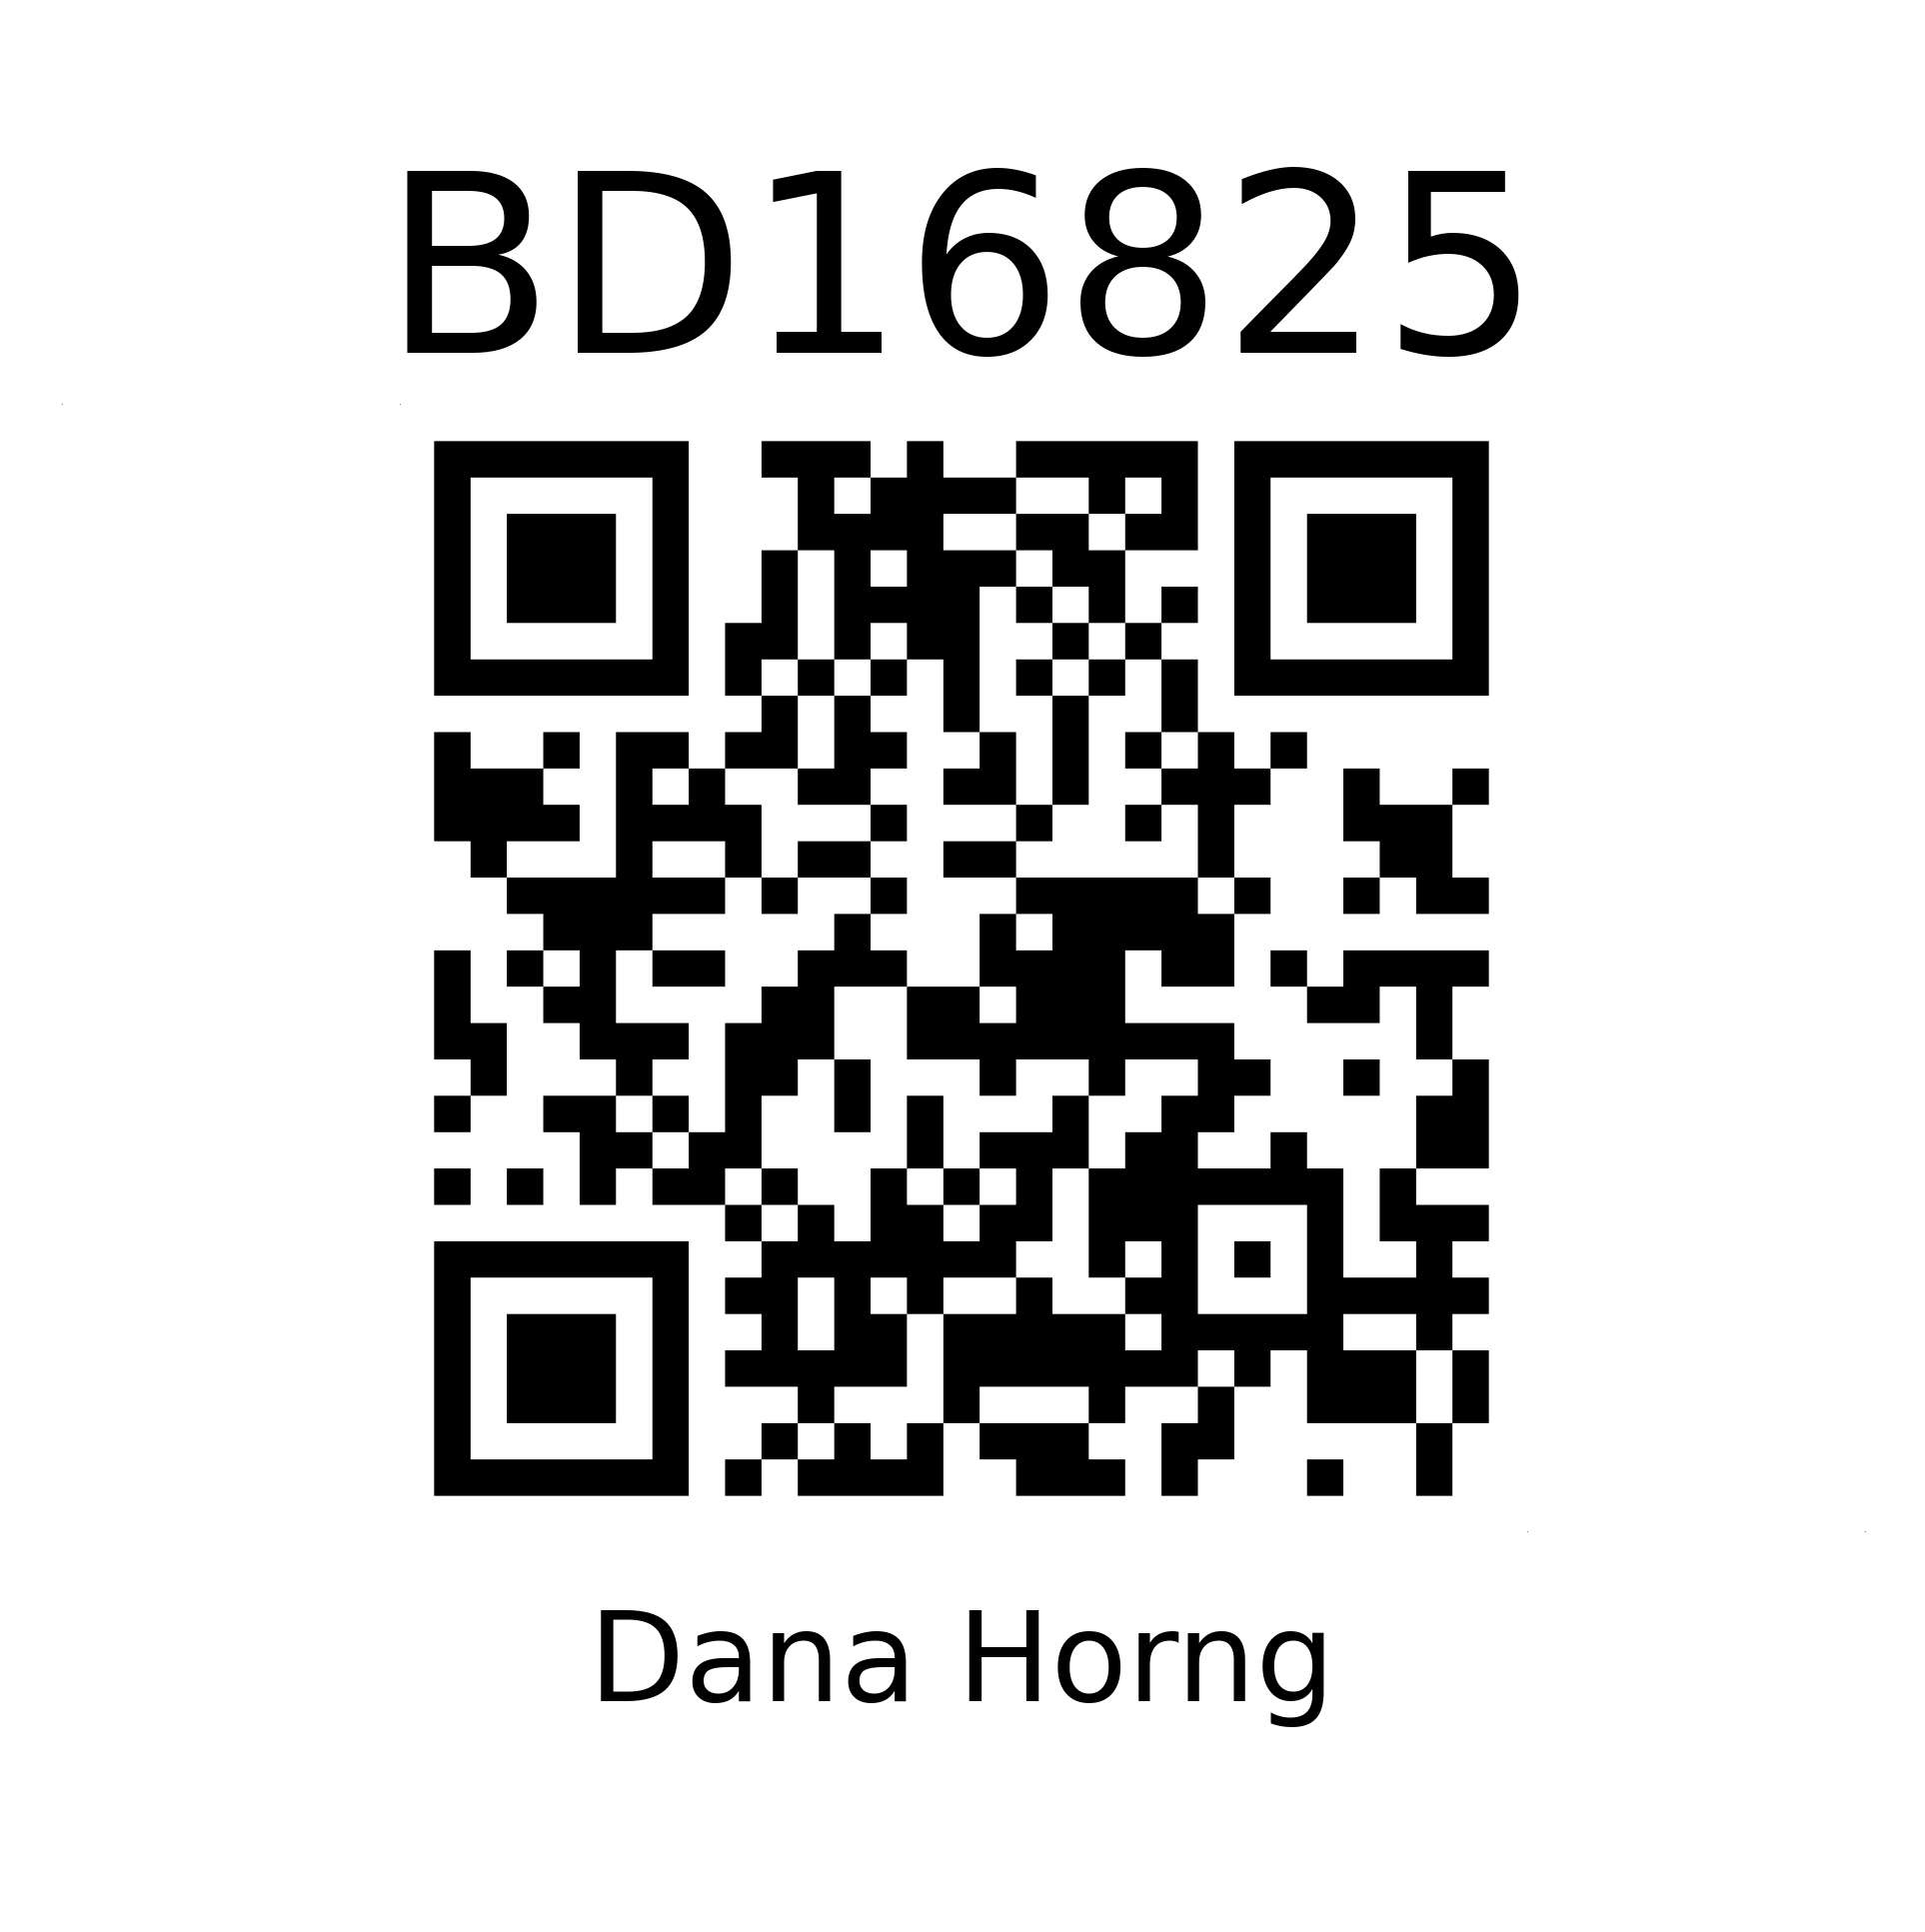

<Figure size 244.094x244.094 with 0 Axes>

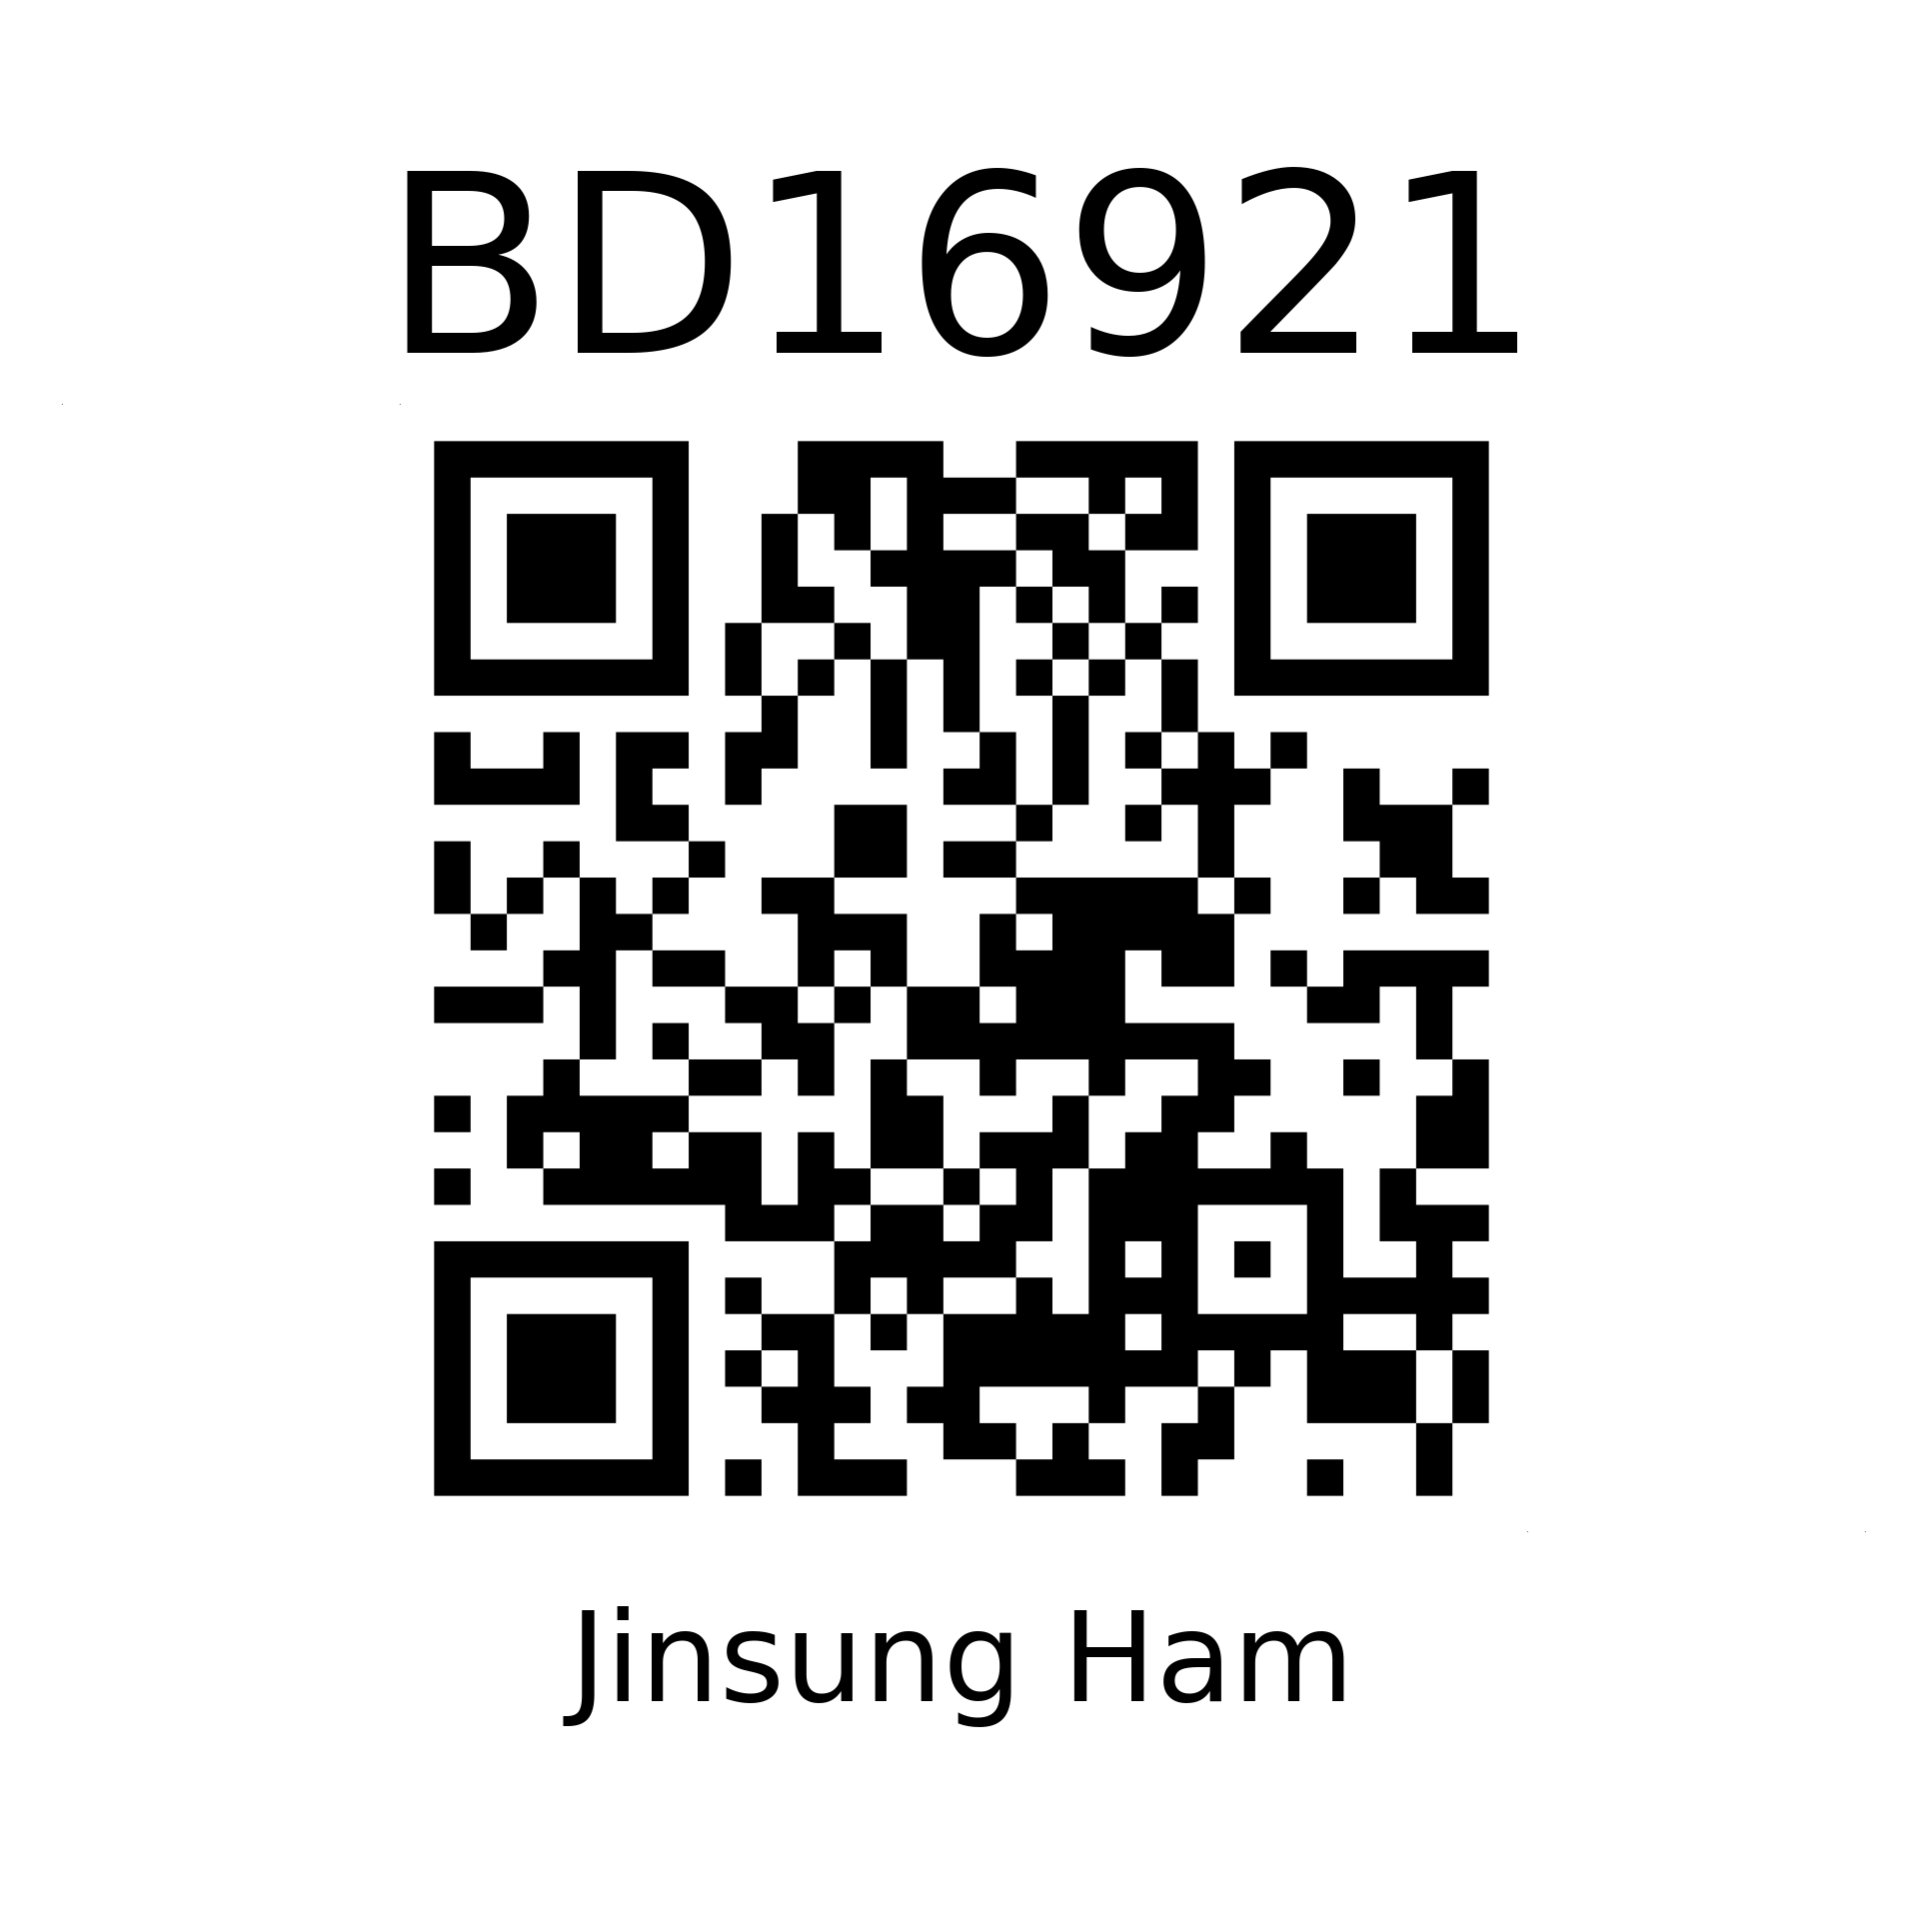

<Figure size 244.094x244.094 with 0 Axes>

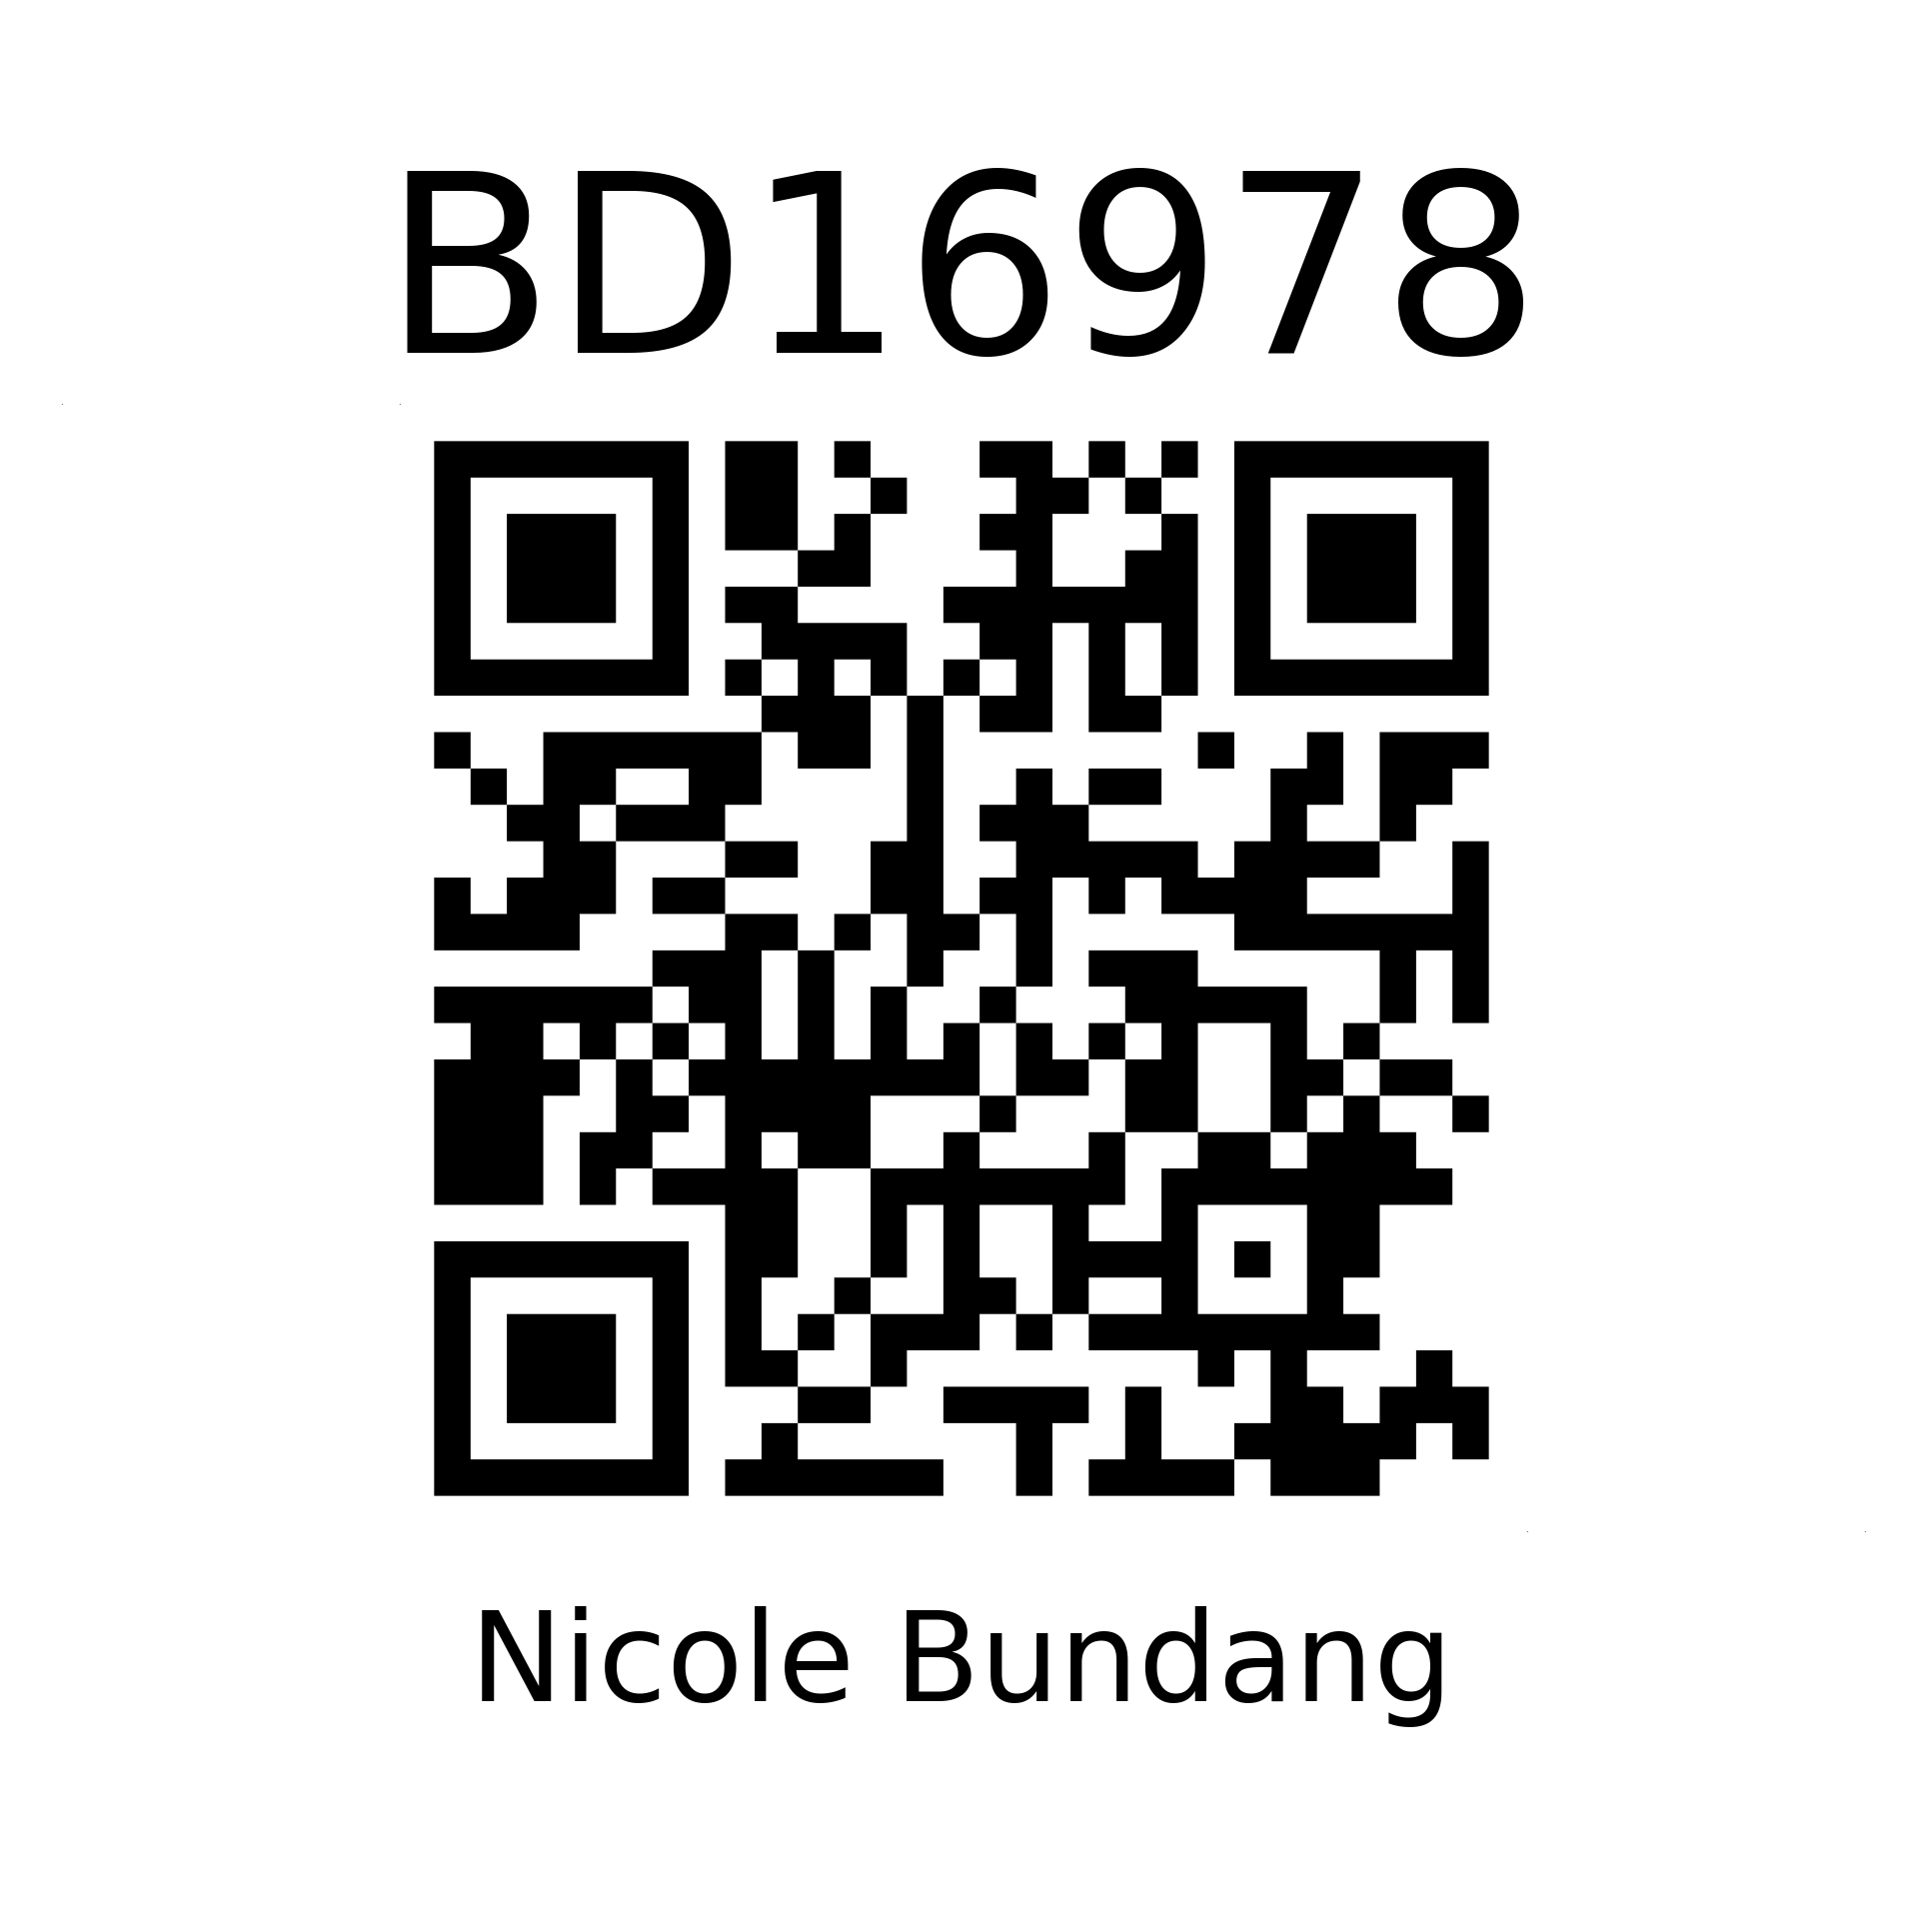

<Figure size 244.094x244.094 with 0 Axes>

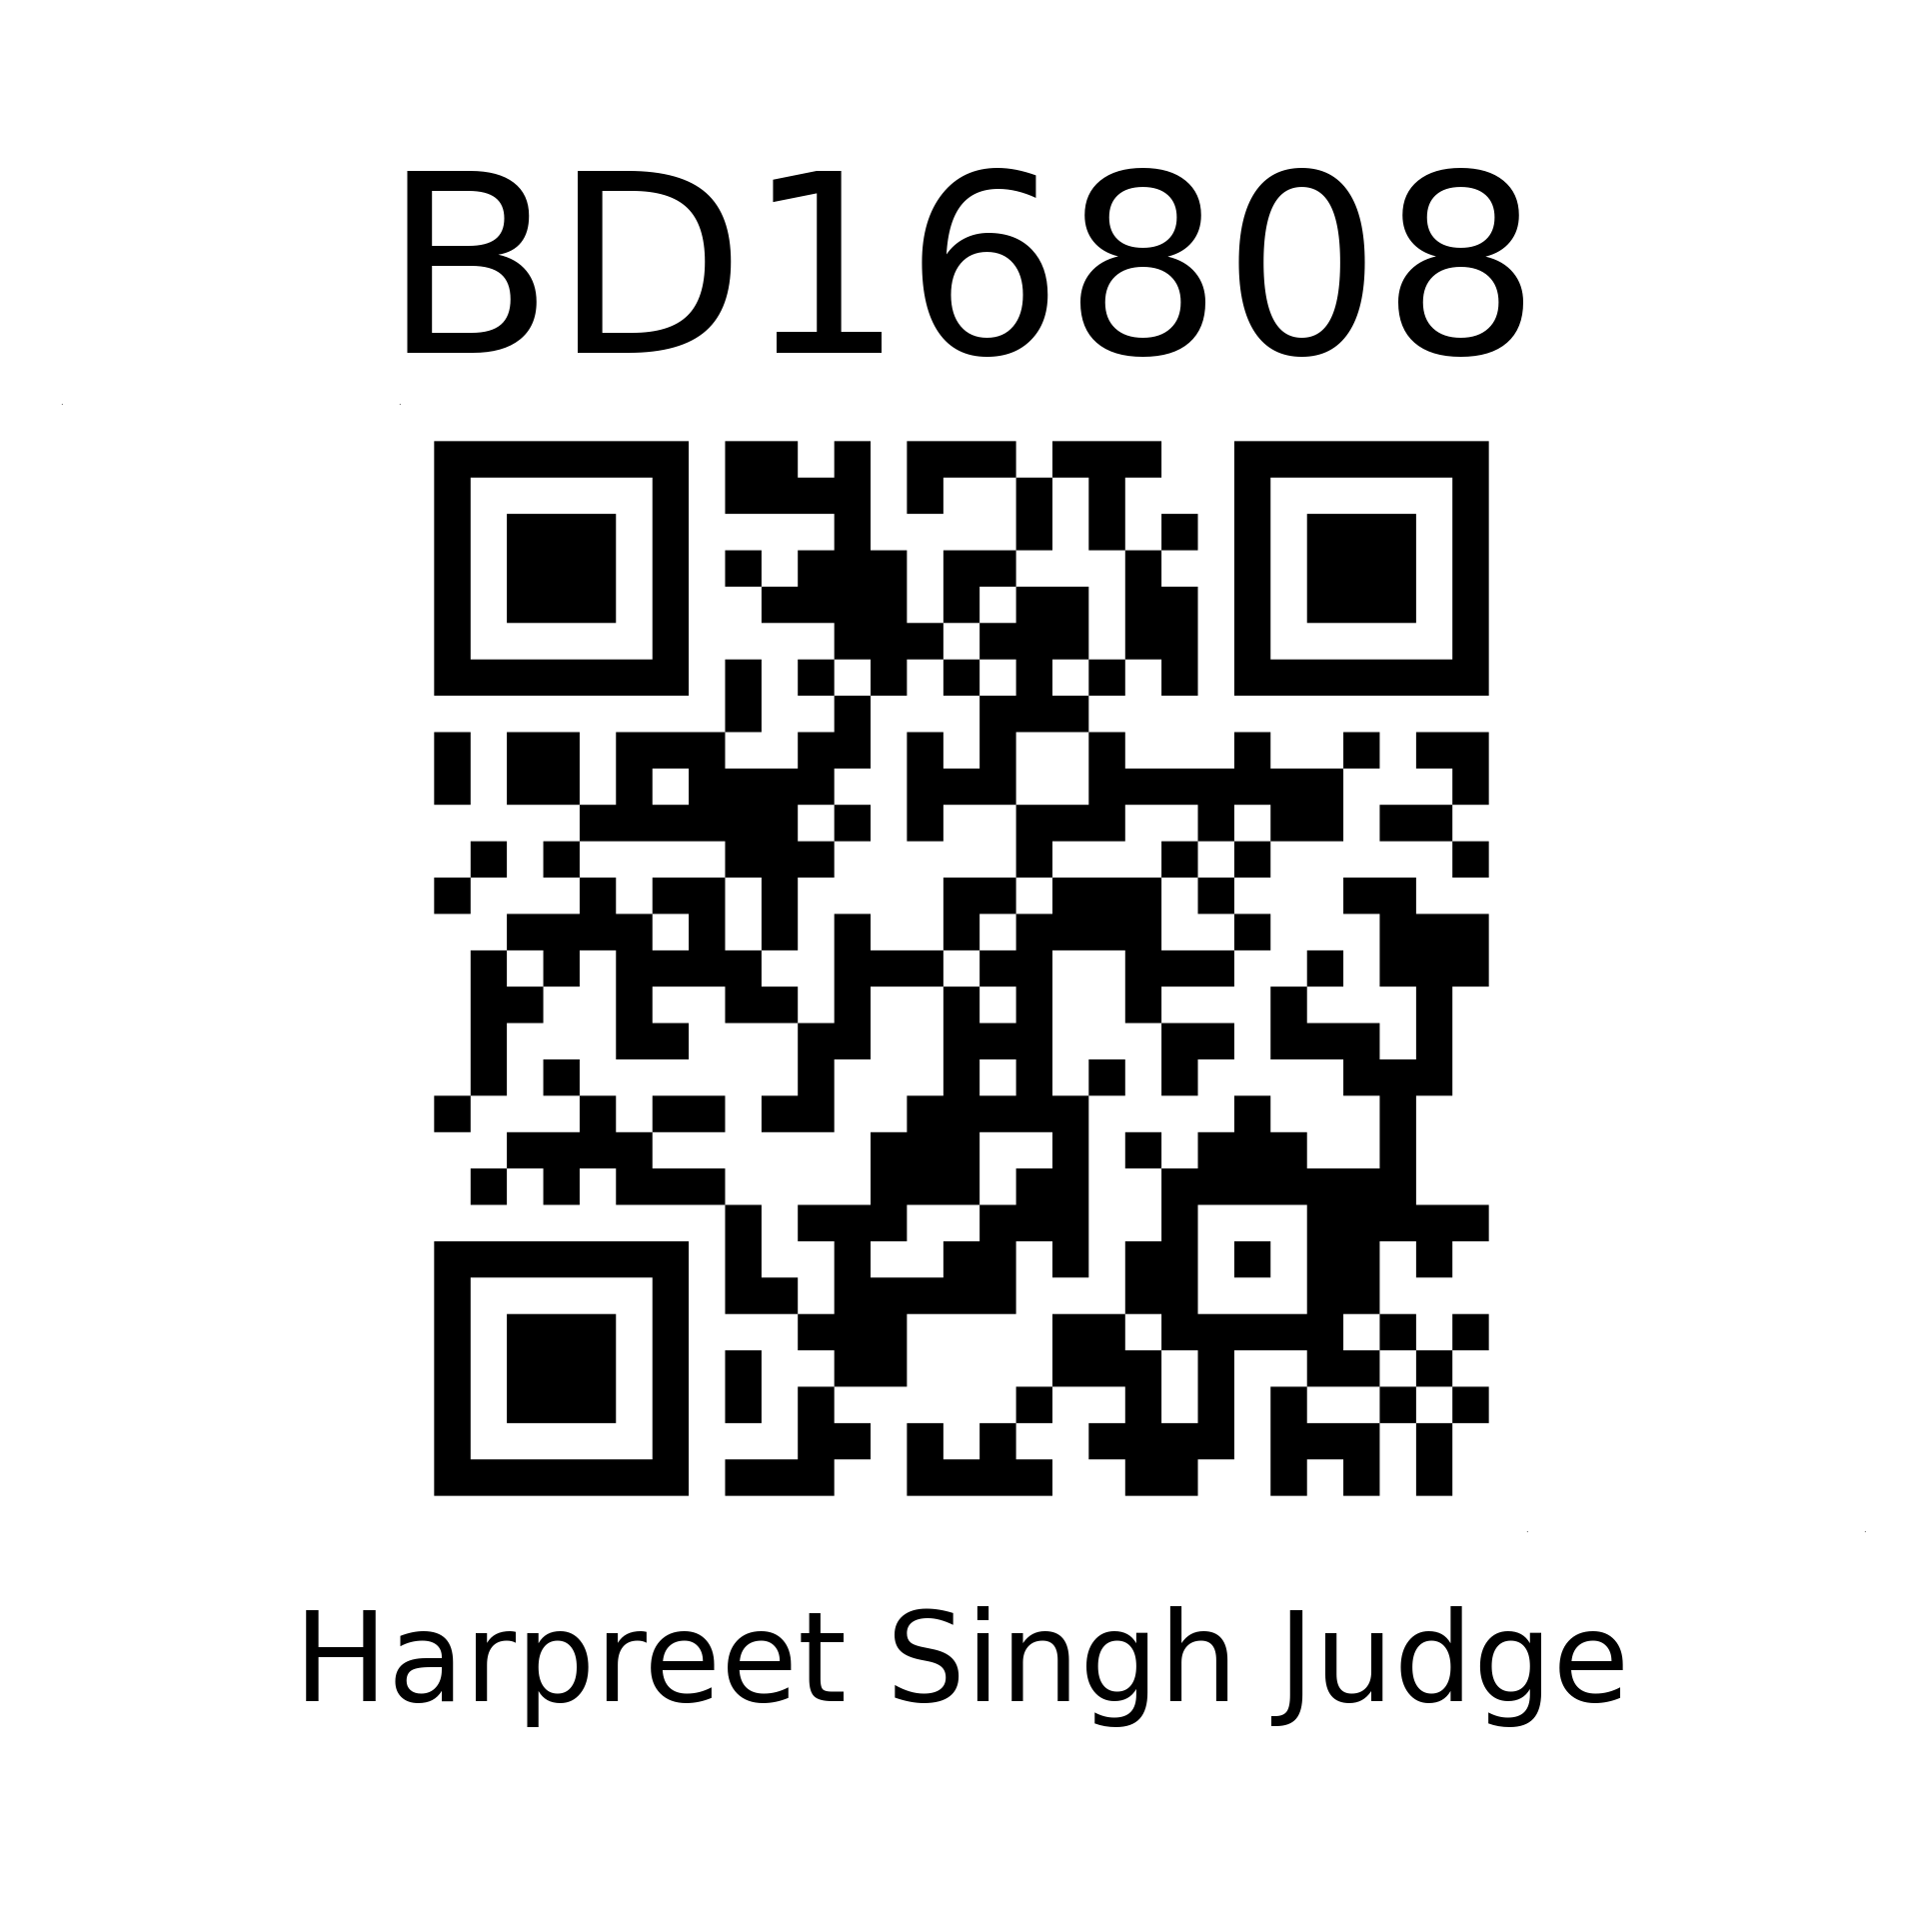

<Figure size 244.094x244.094 with 0 Axes>

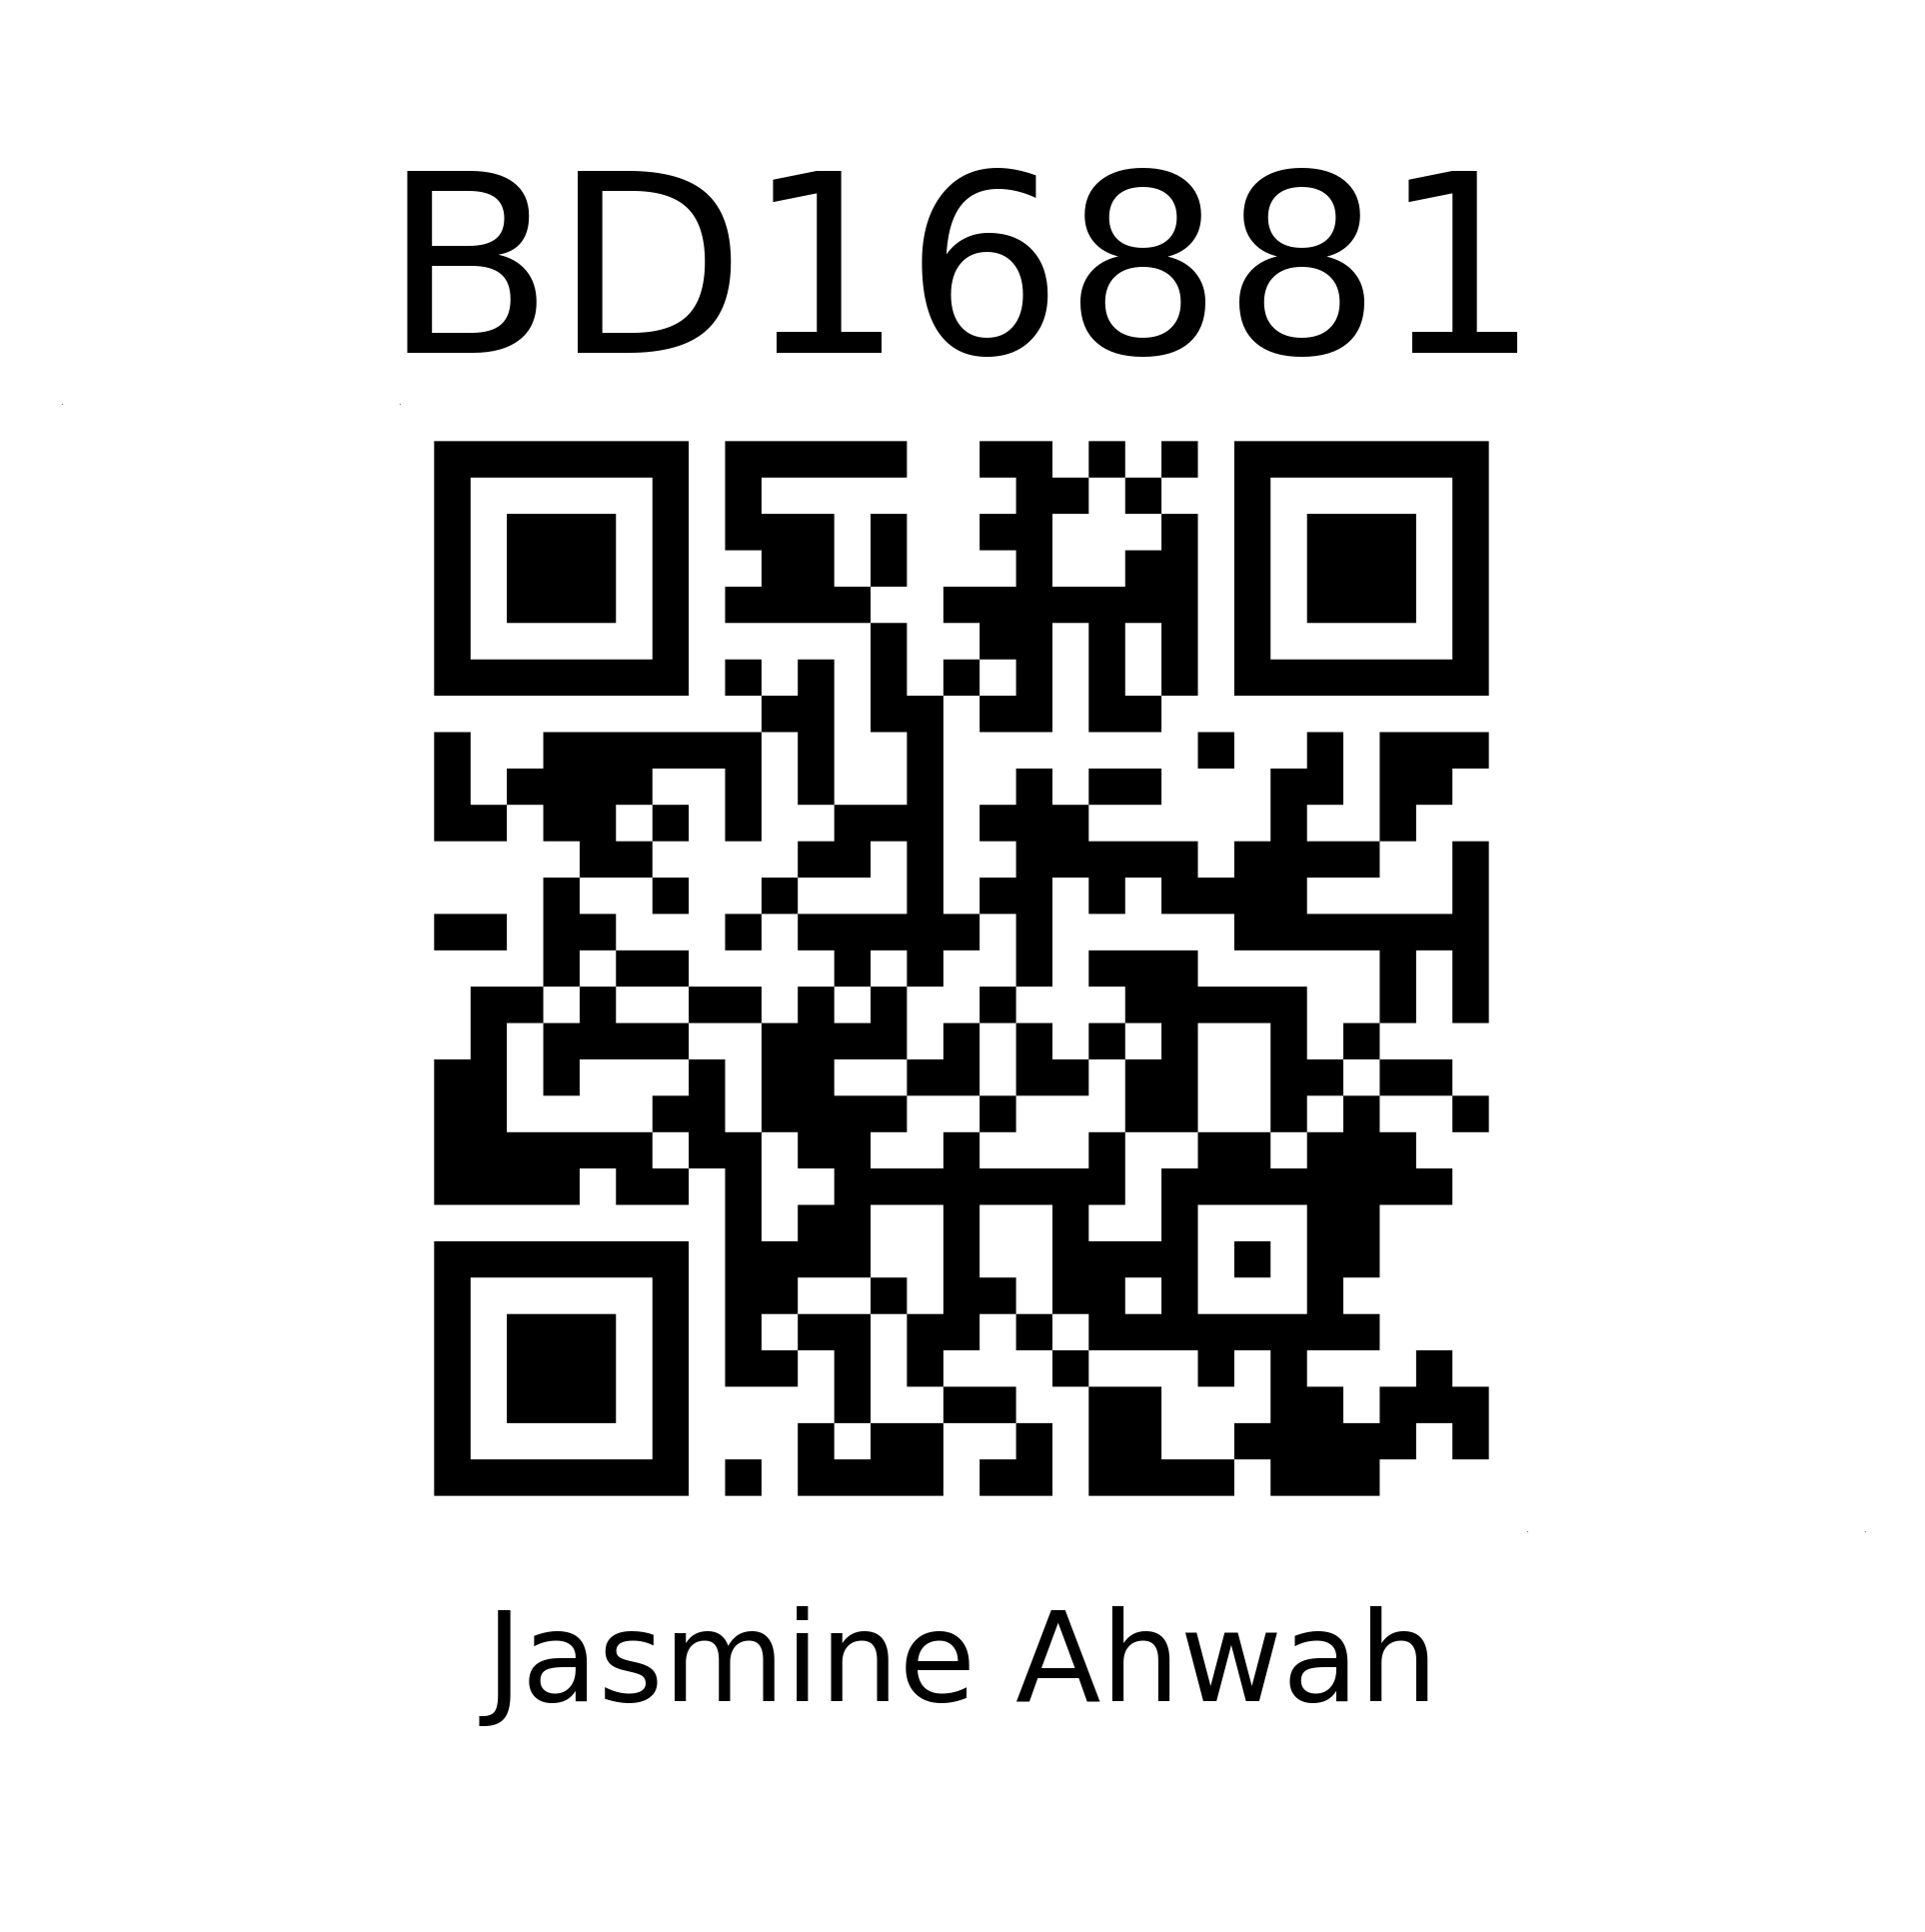

<Figure size 244.094x244.094 with 0 Axes>

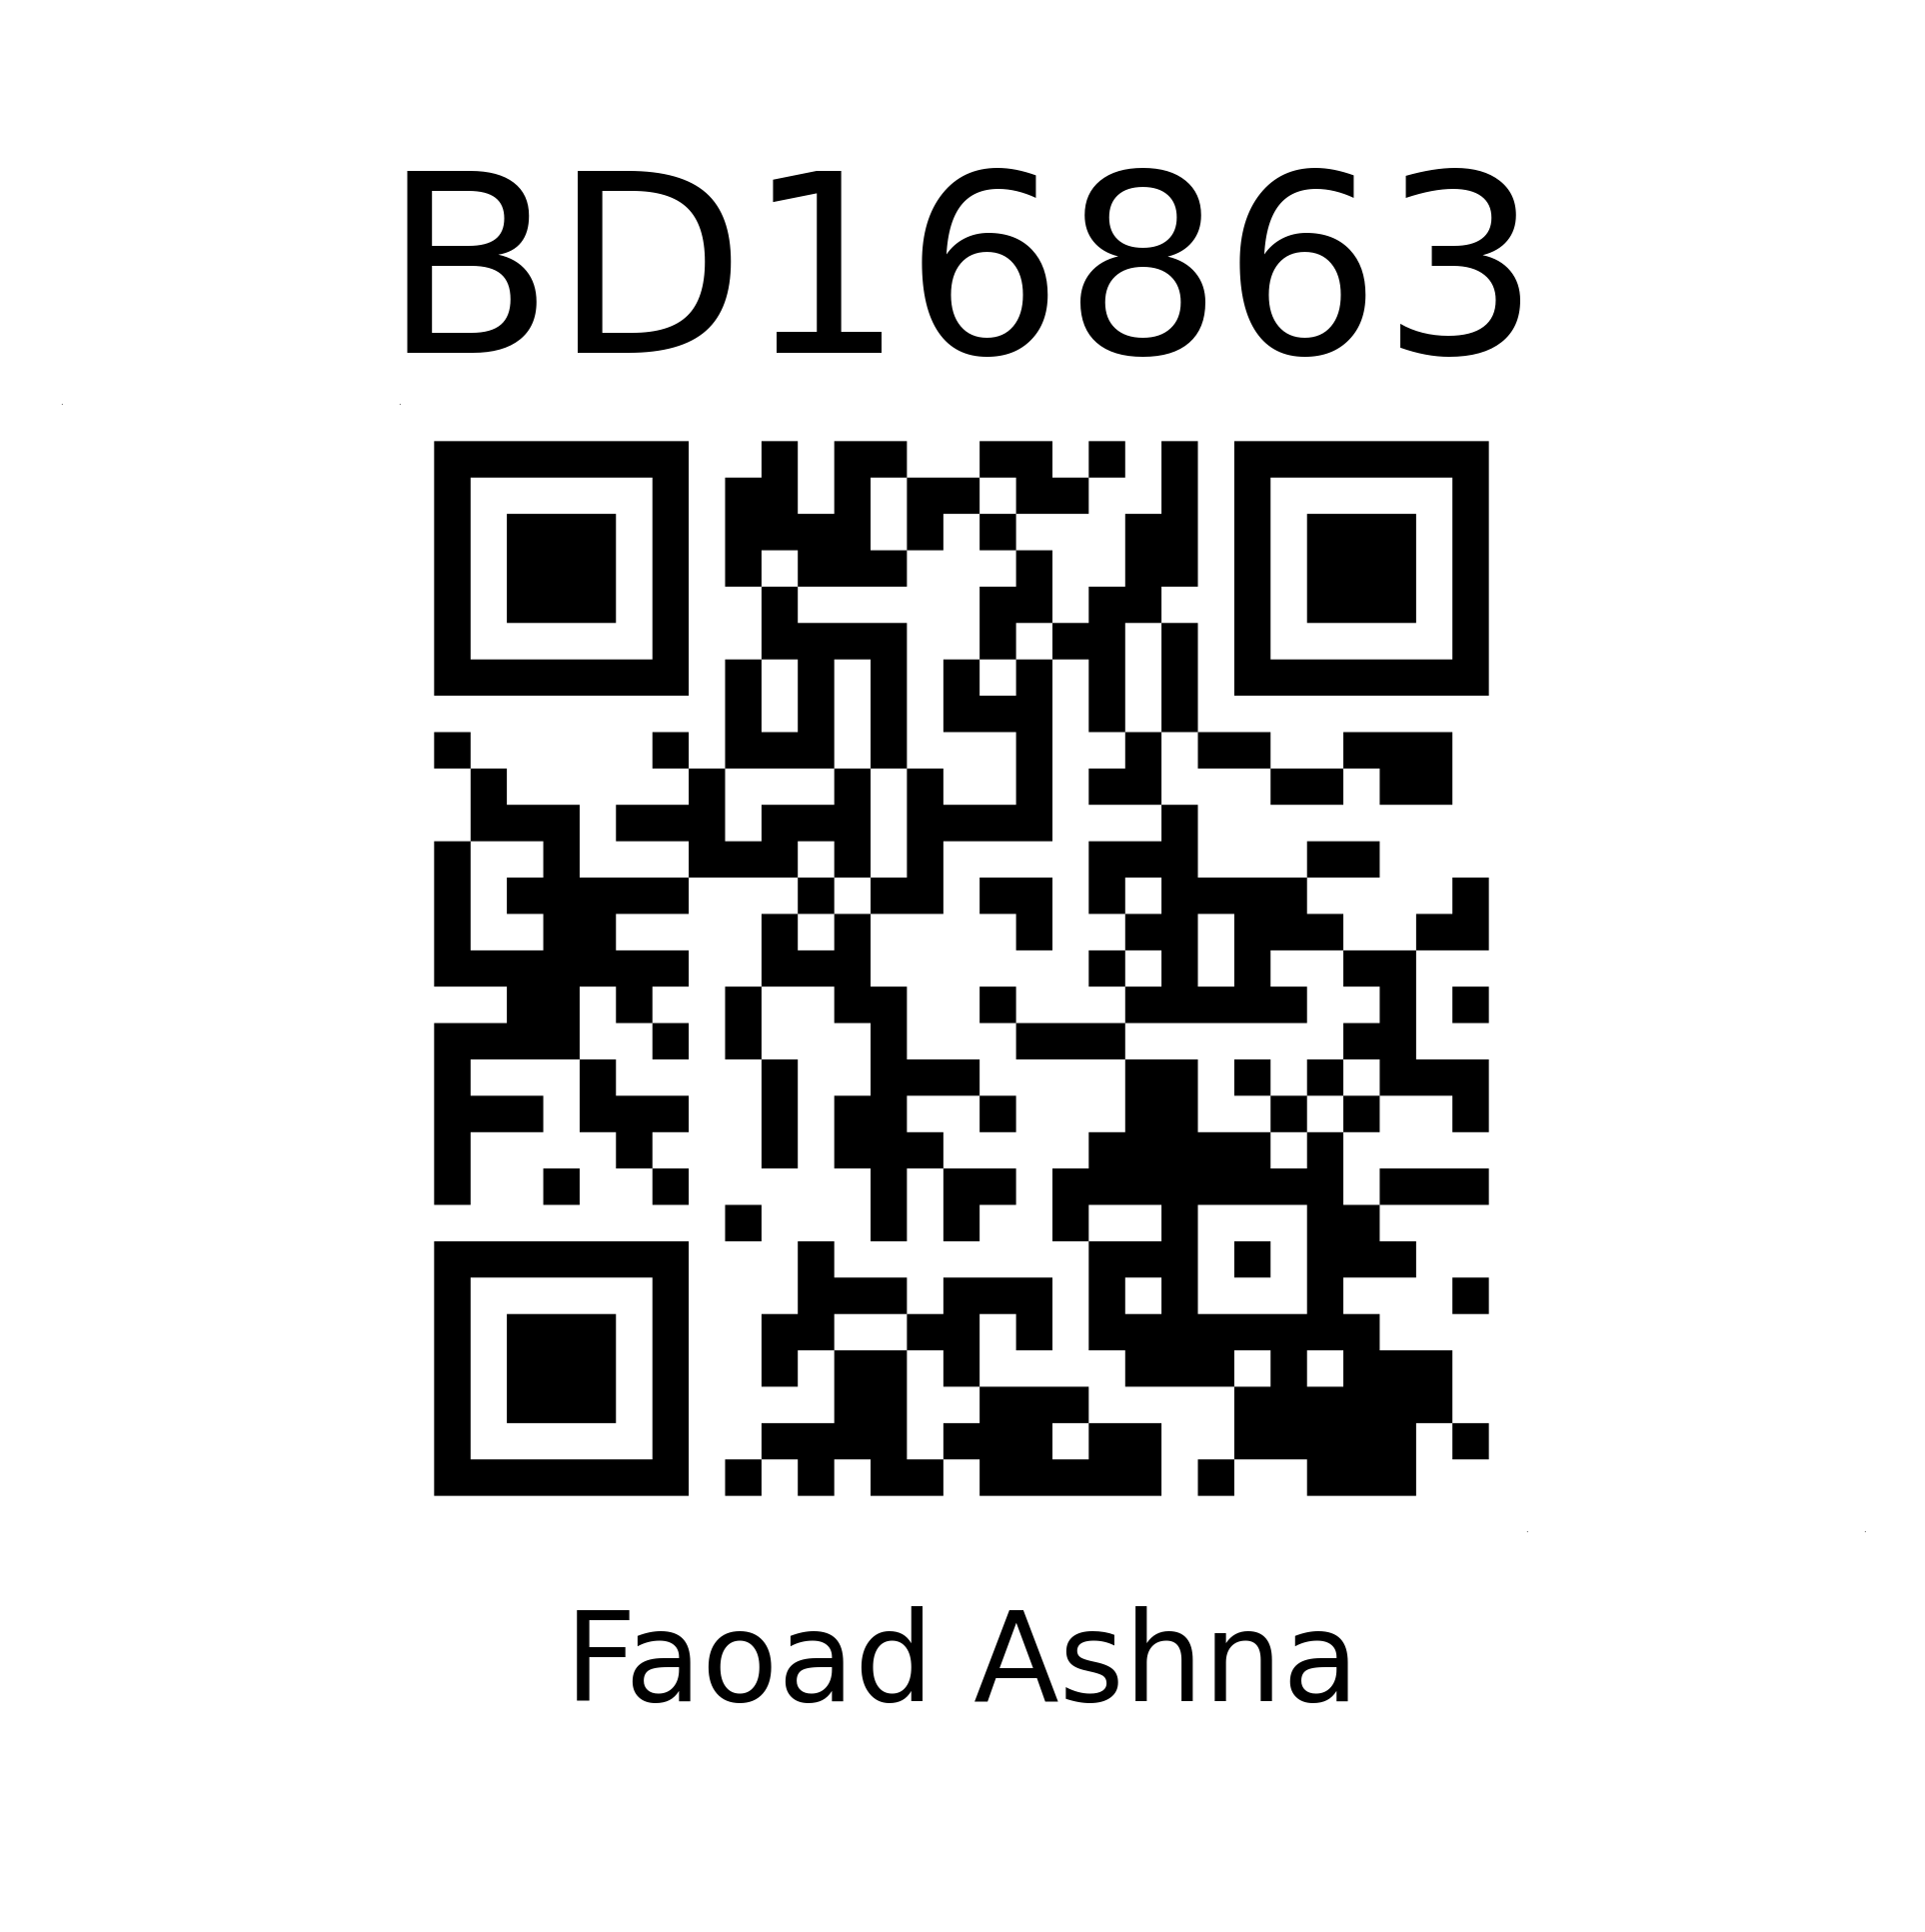

<Figure size 244.094x244.094 with 0 Axes>

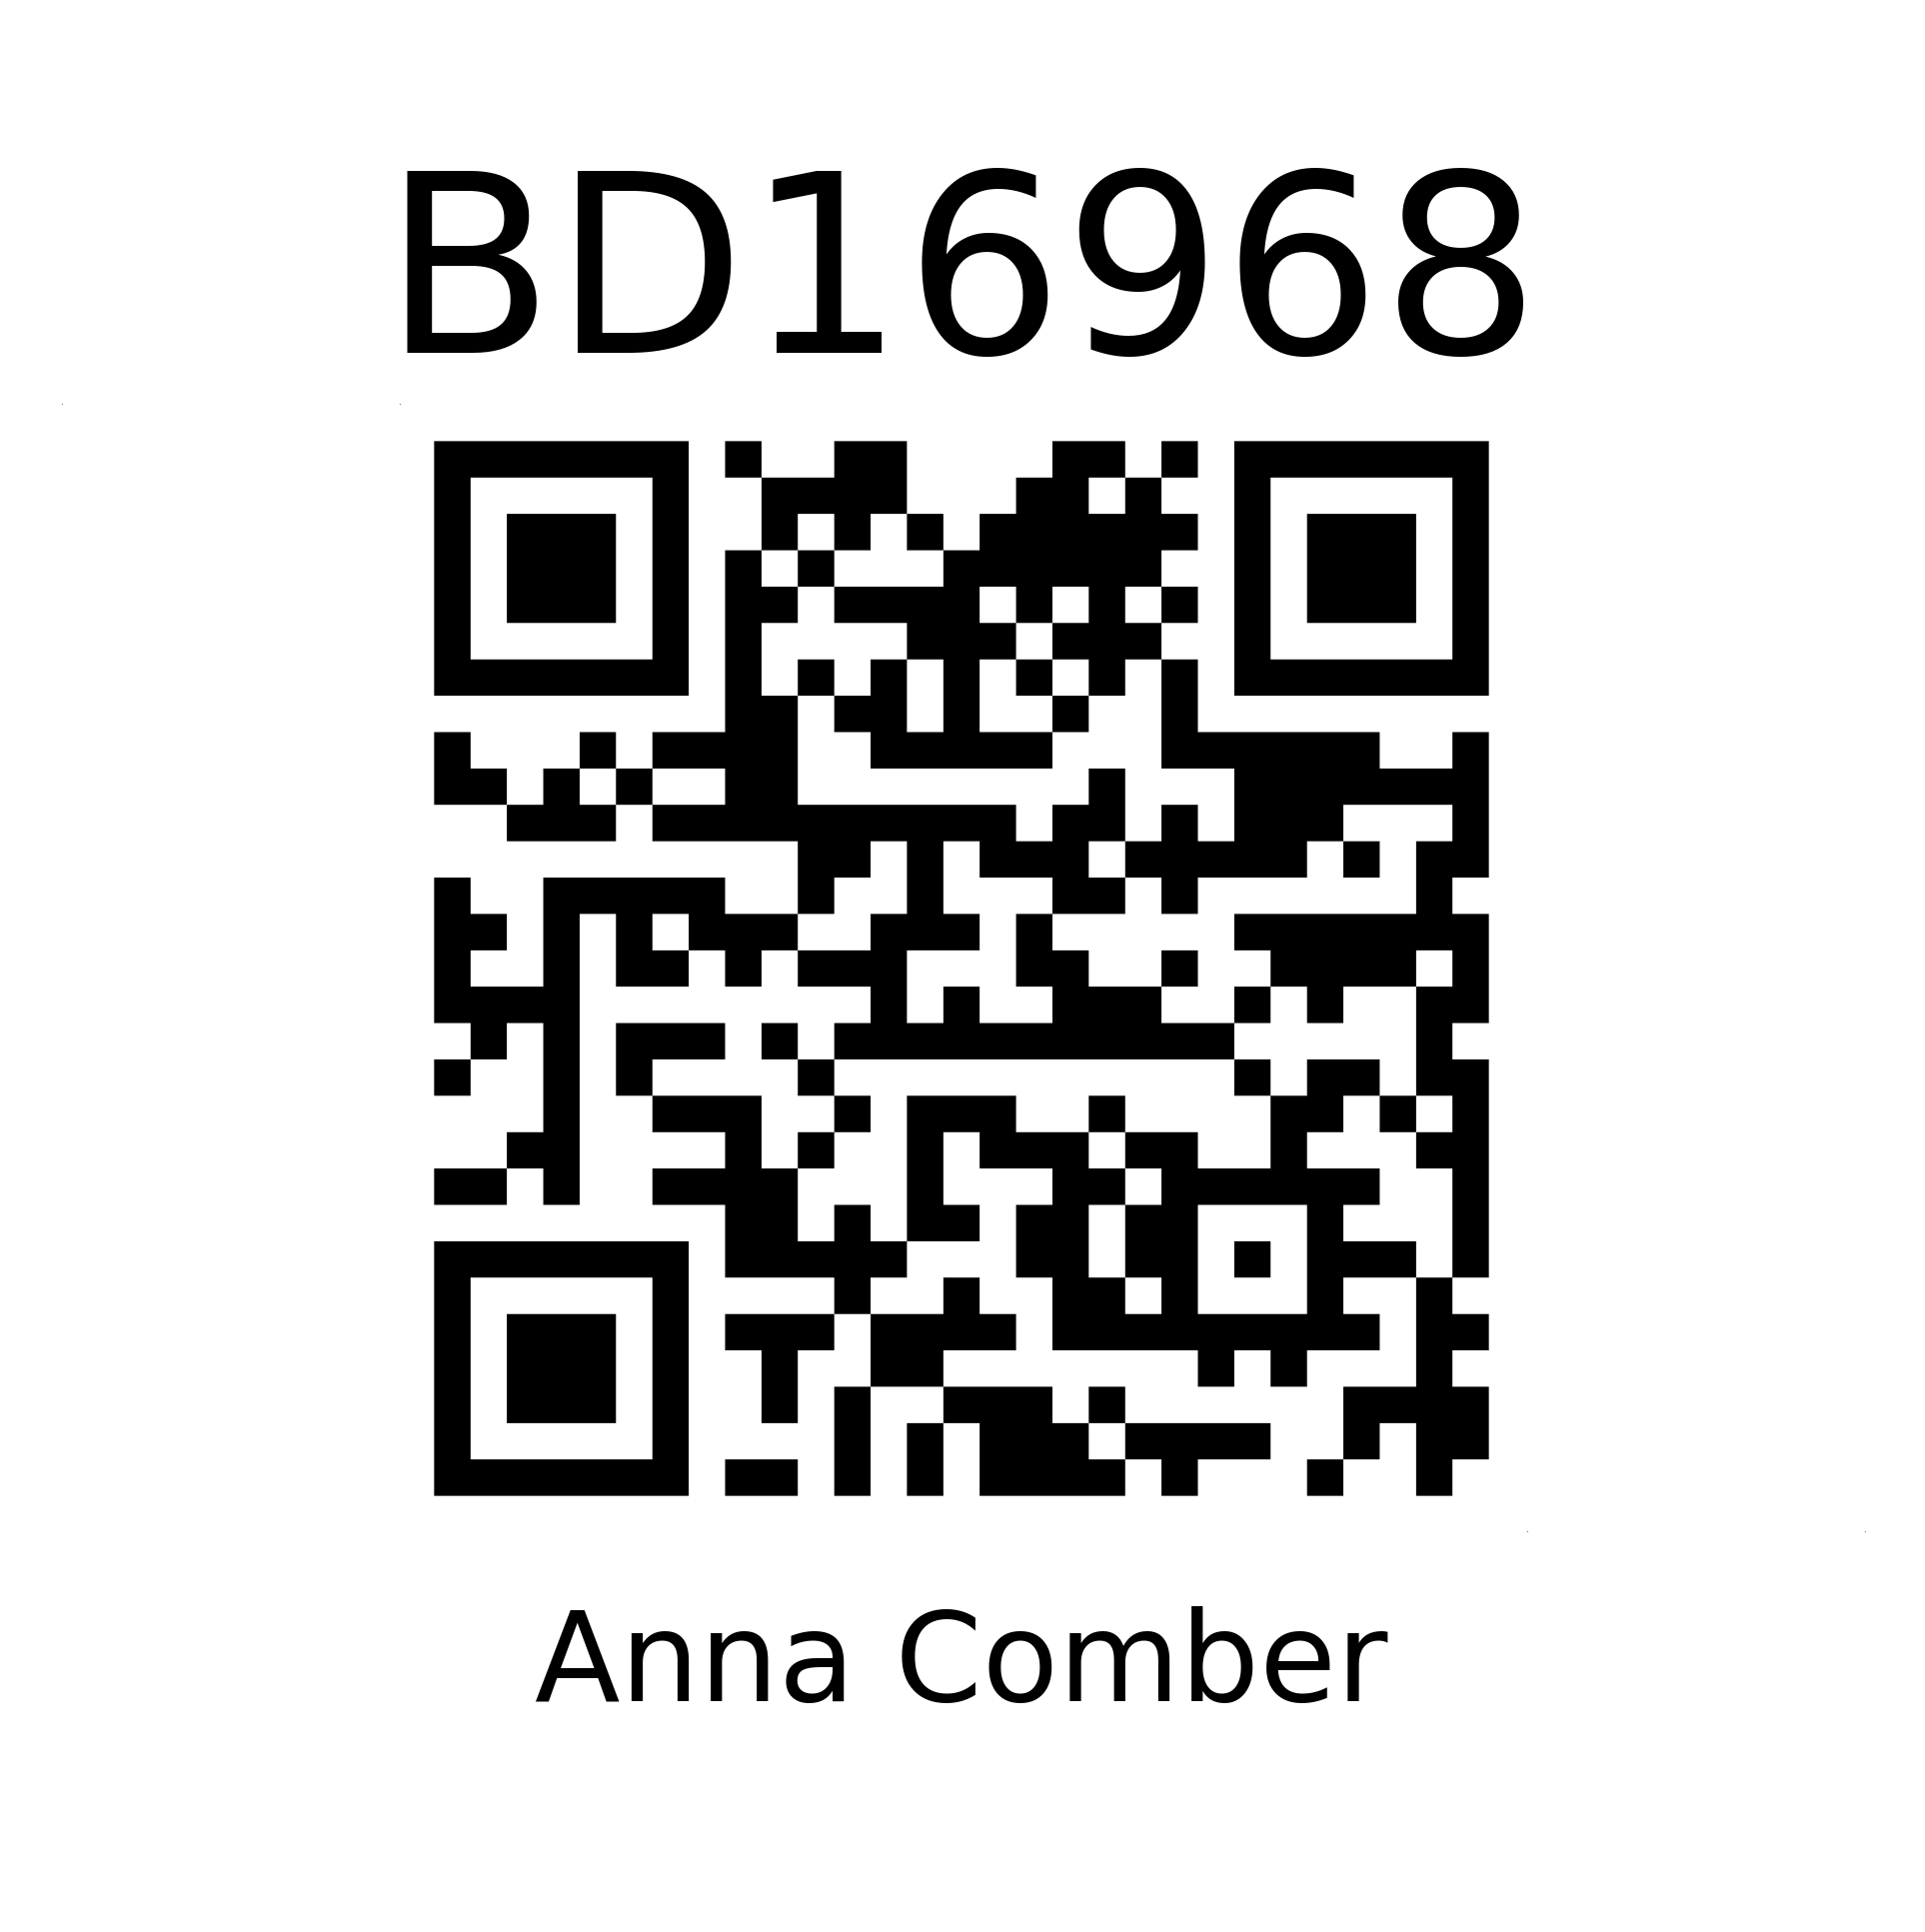

<Figure size 244.094x244.094 with 0 Axes>

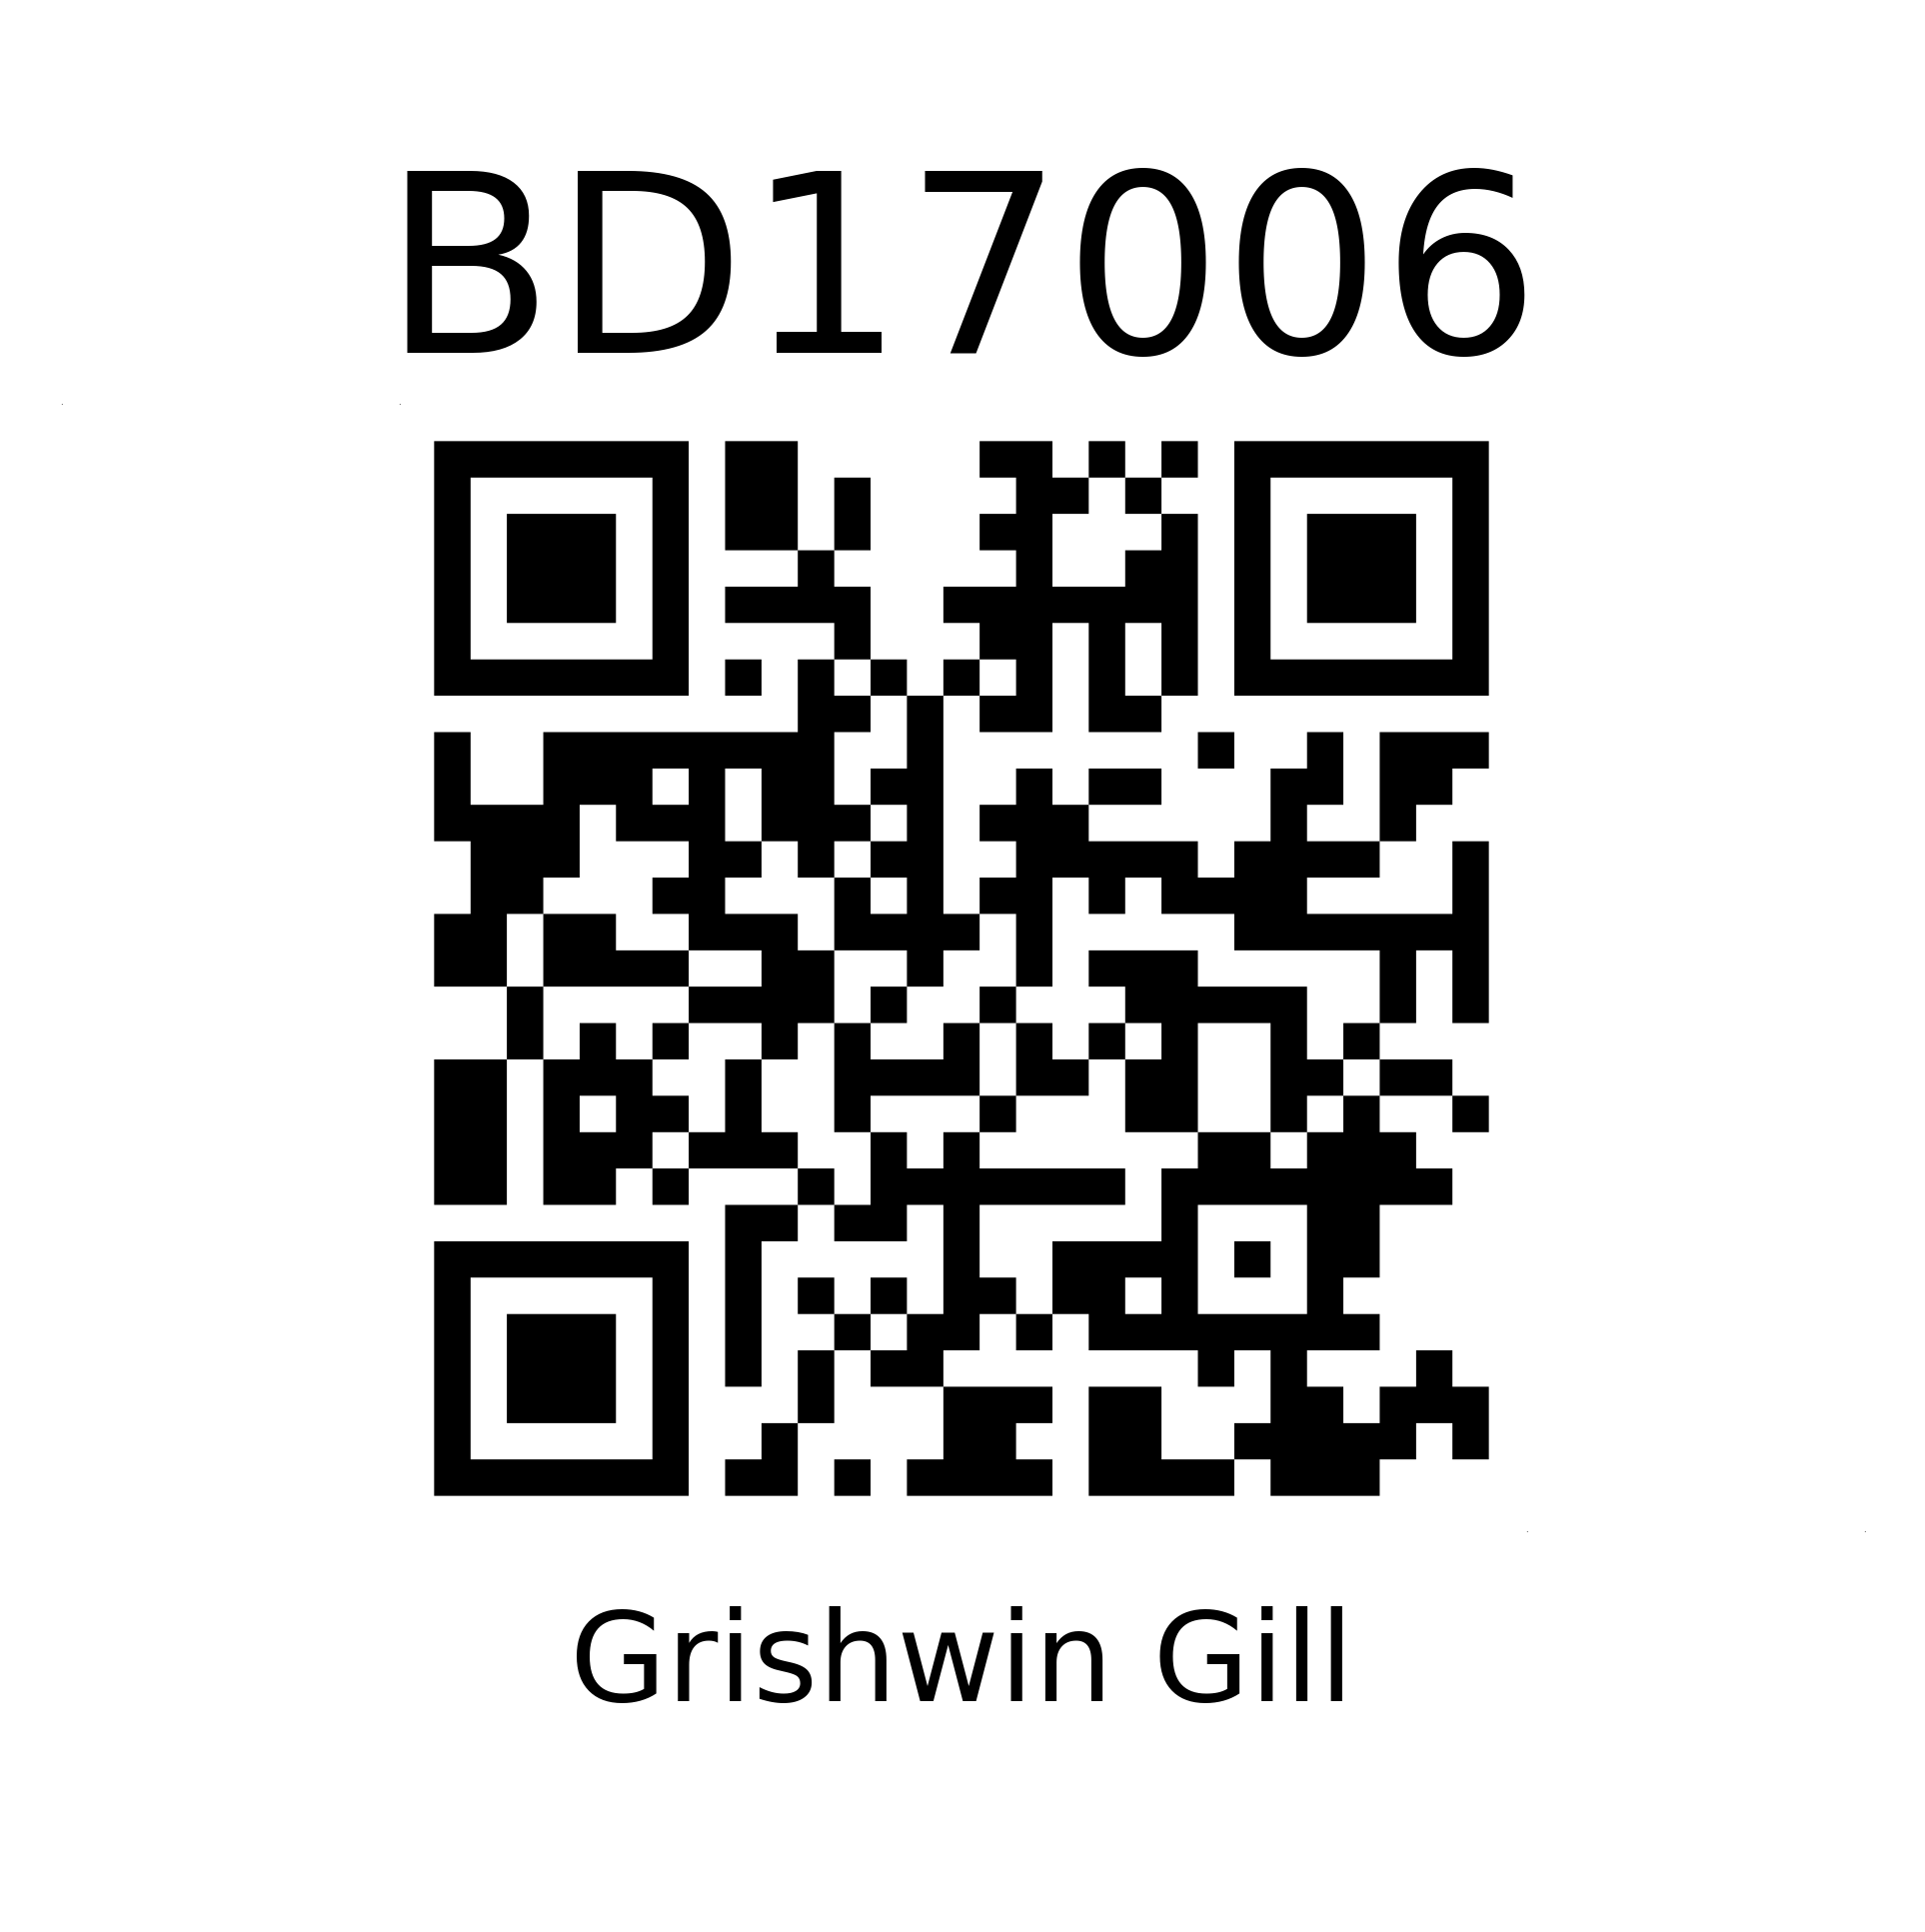

<Figure size 244.094x244.094 with 0 Axes>

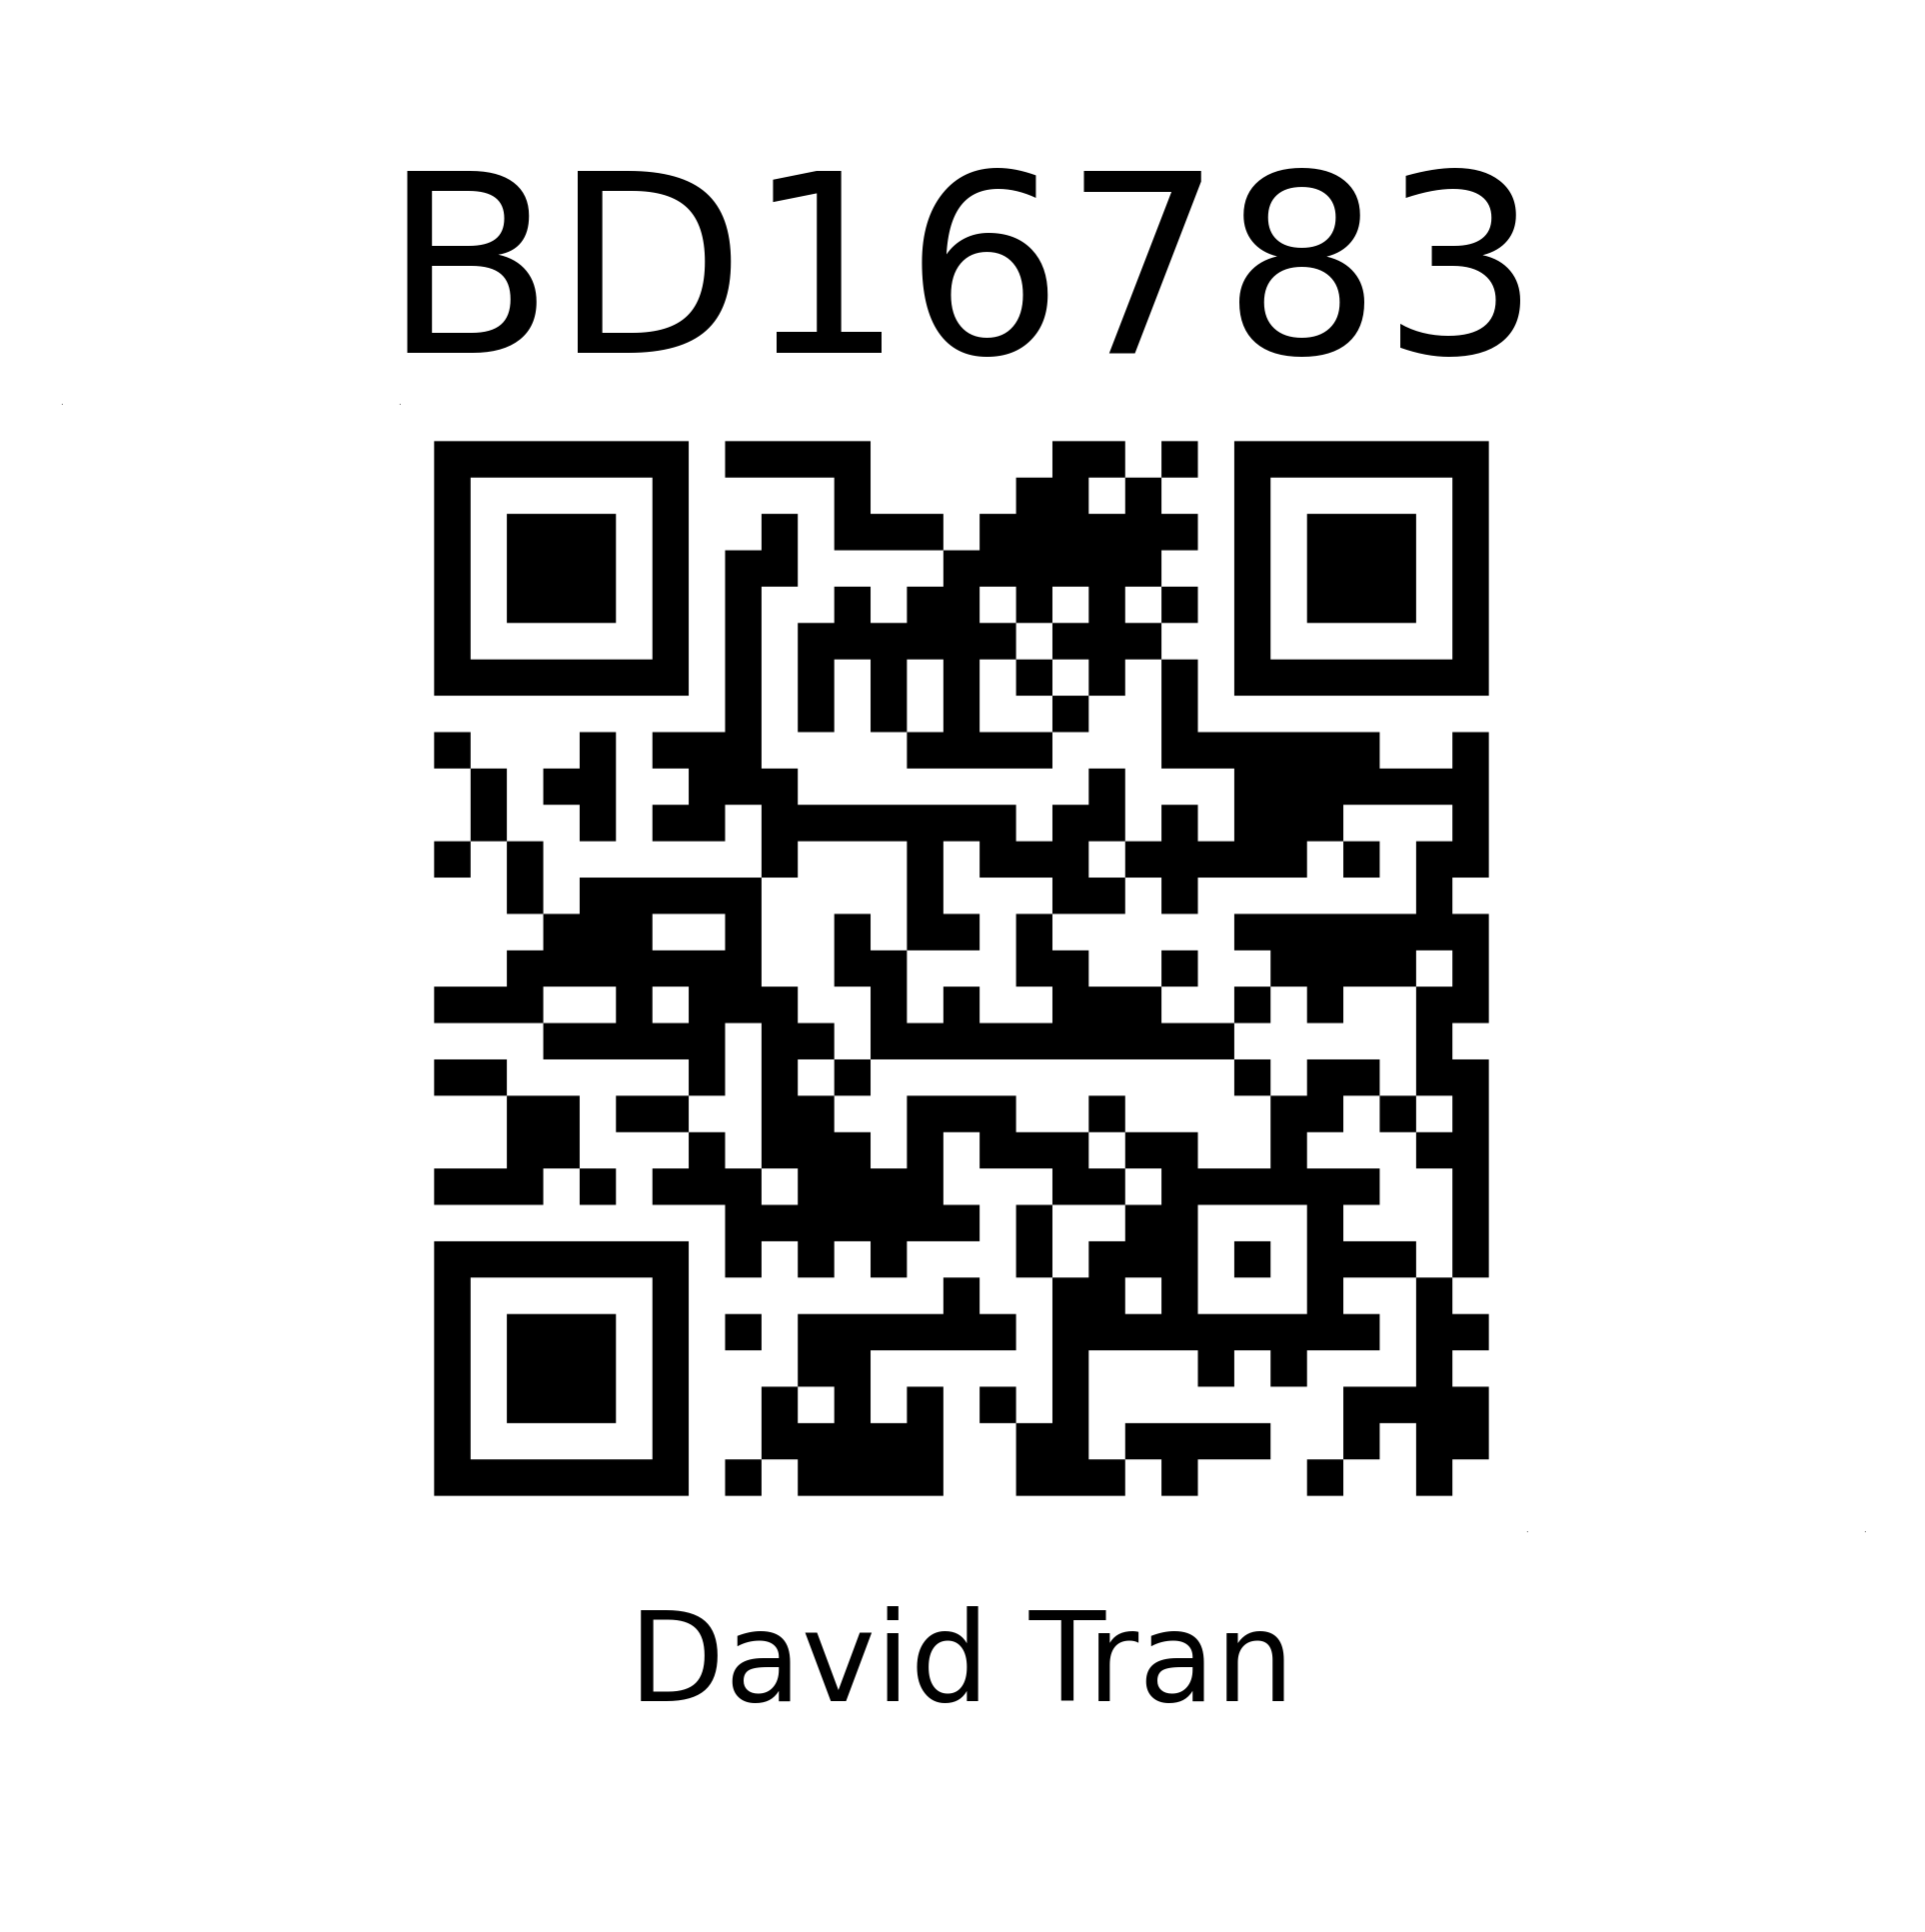

<Figure size 244.094x244.094 with 0 Axes>

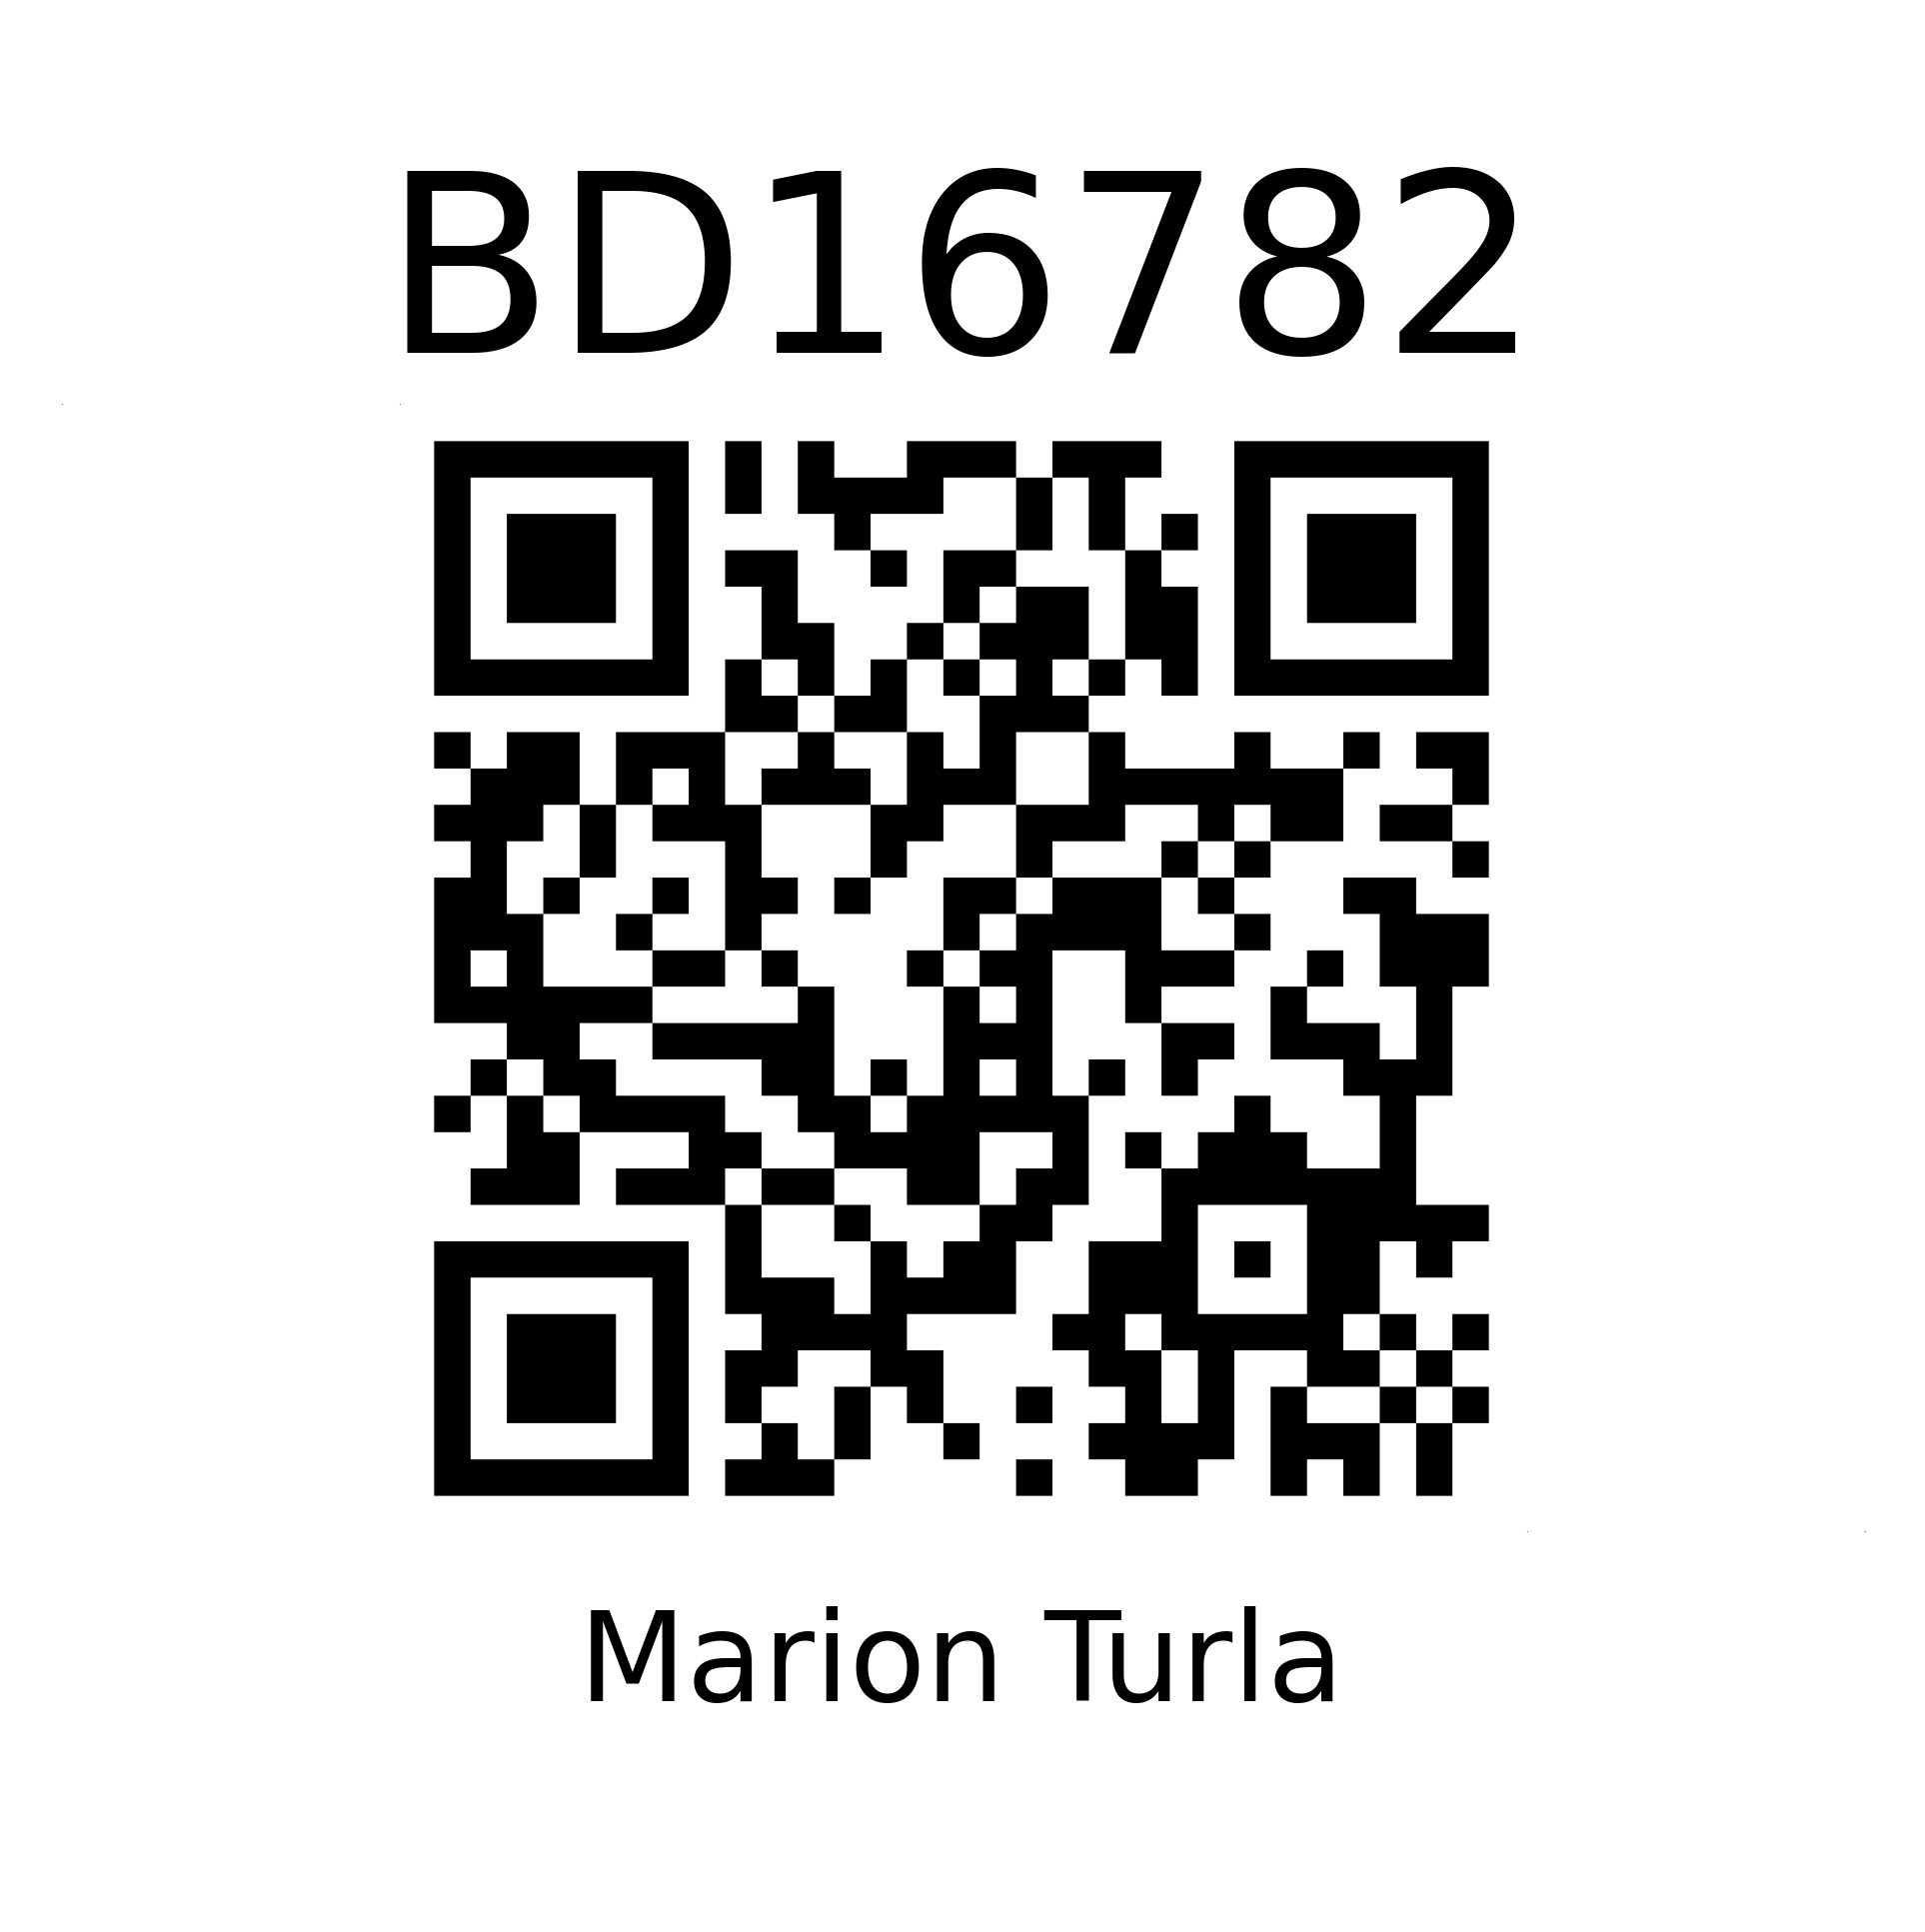

<Figure size 244.094x244.094 with 0 Axes>

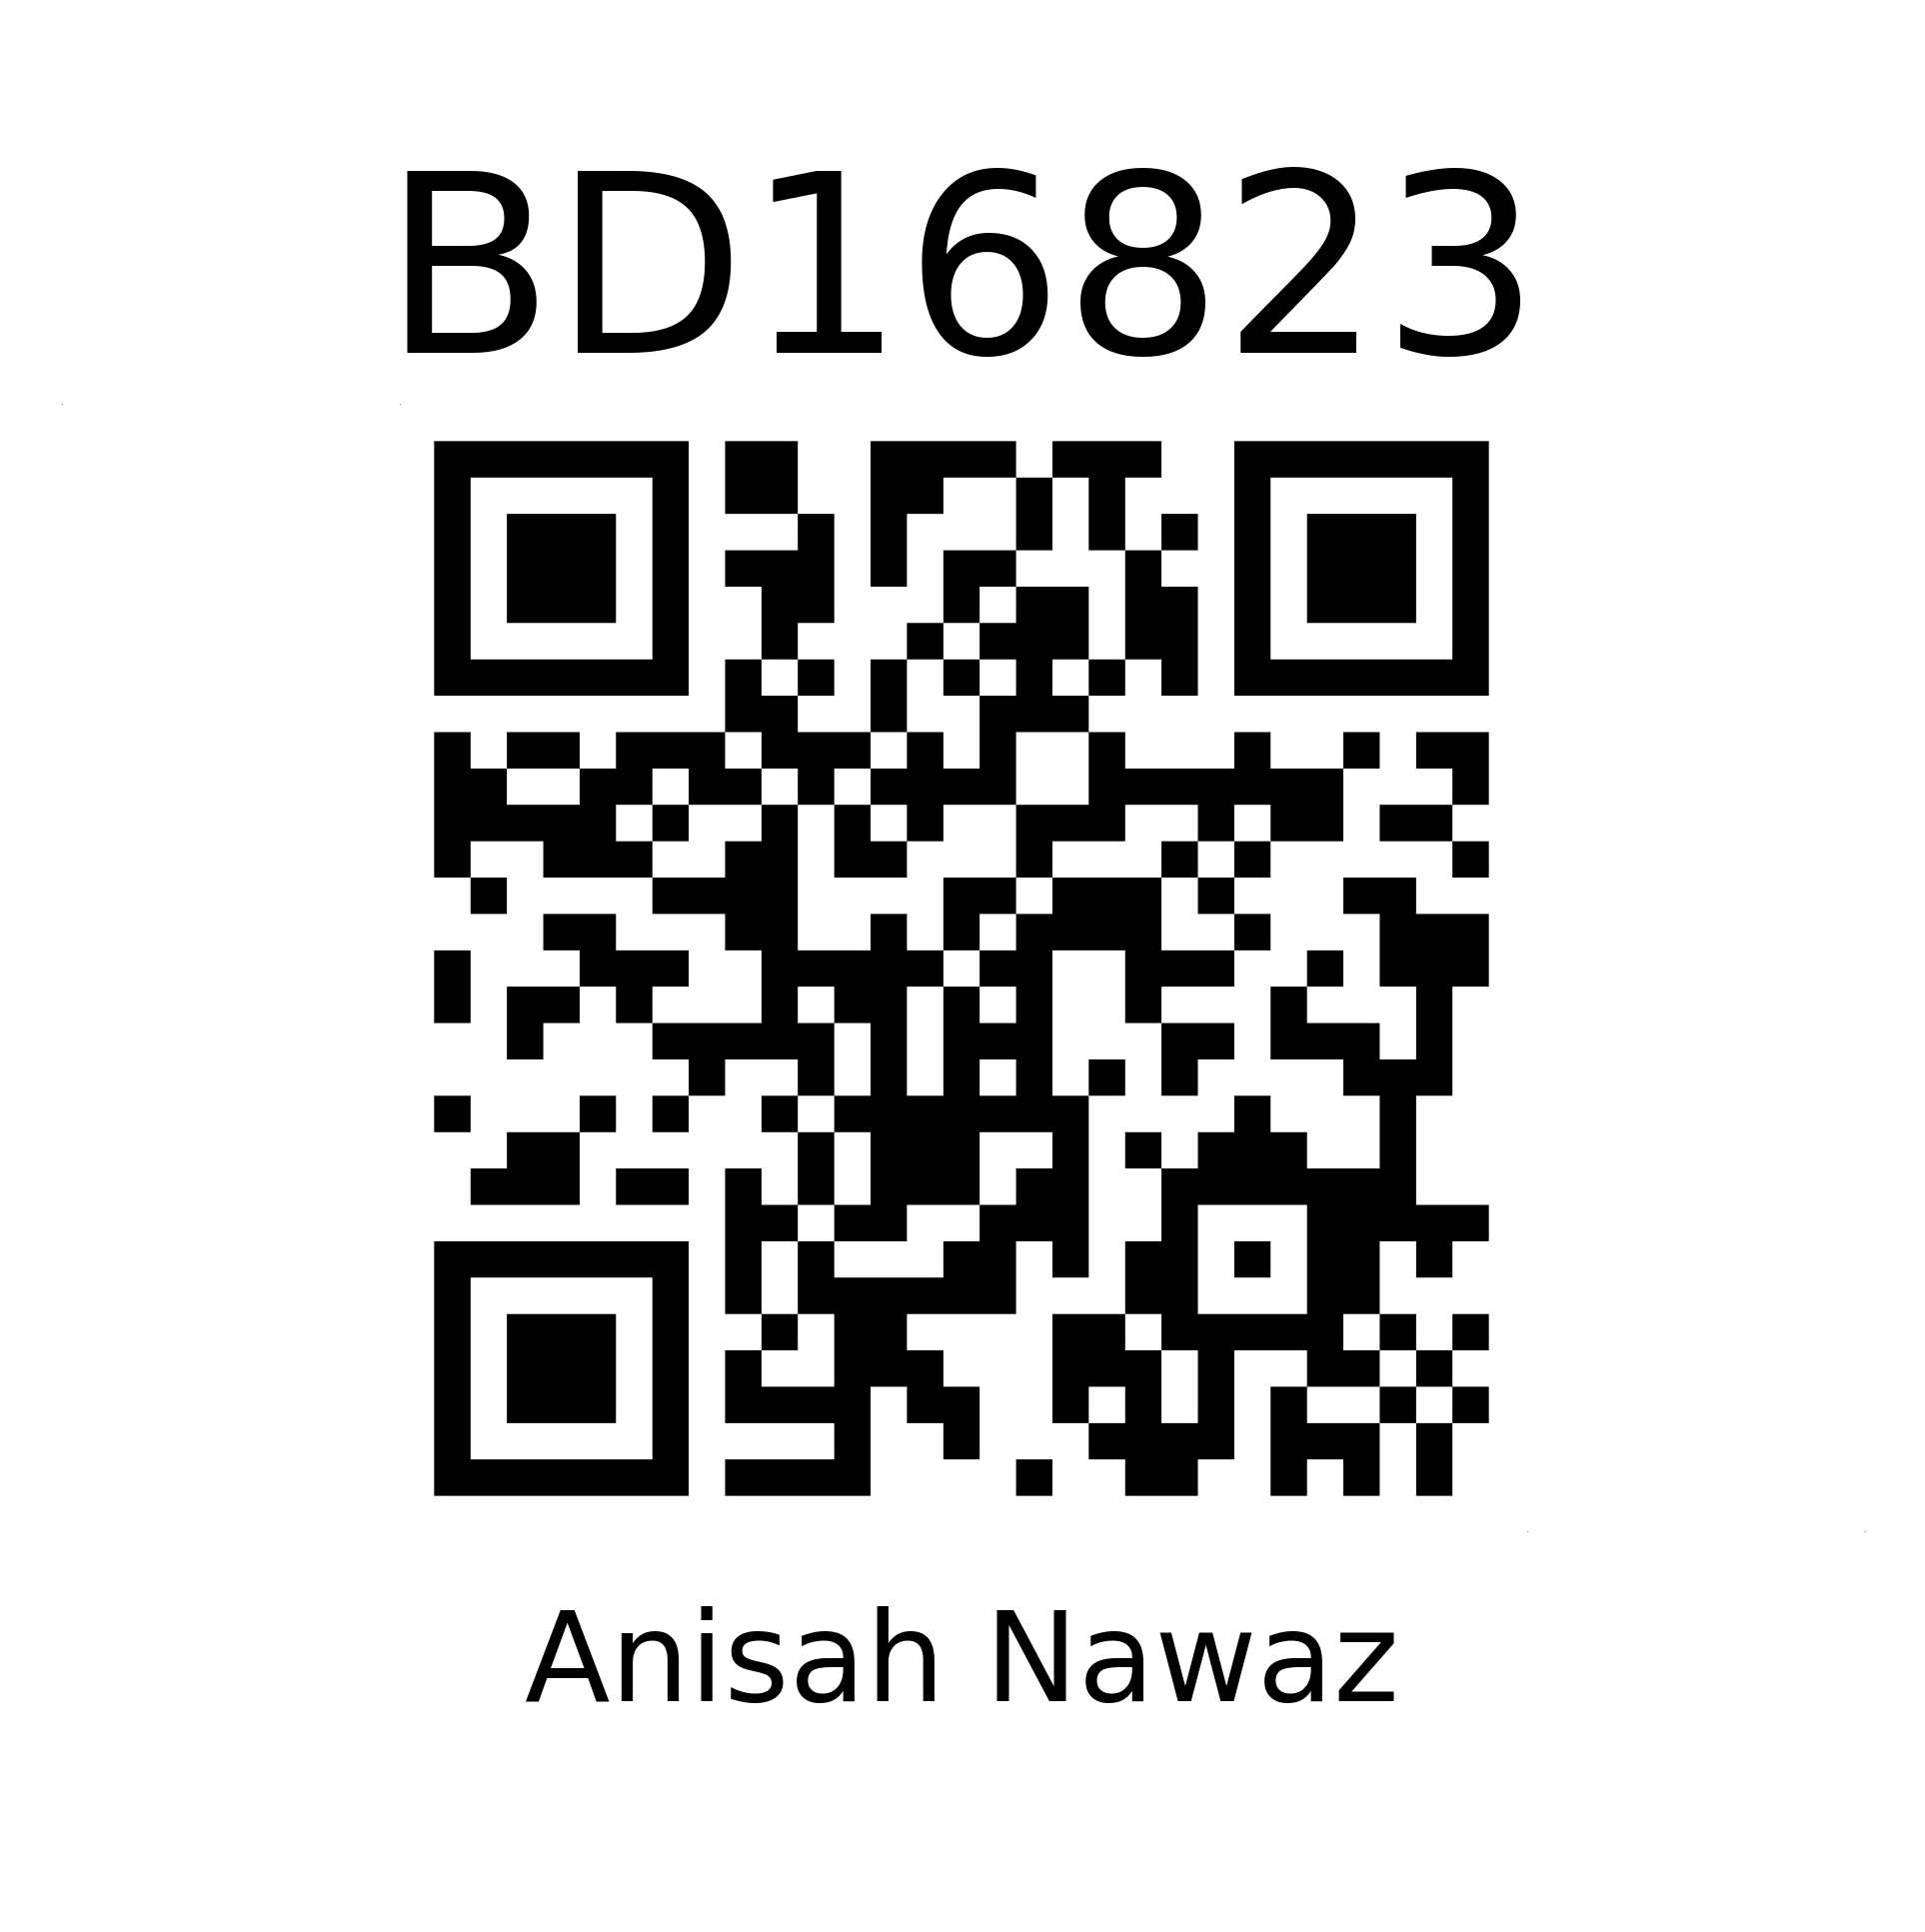

<Figure size 244.094x244.094 with 0 Axes>

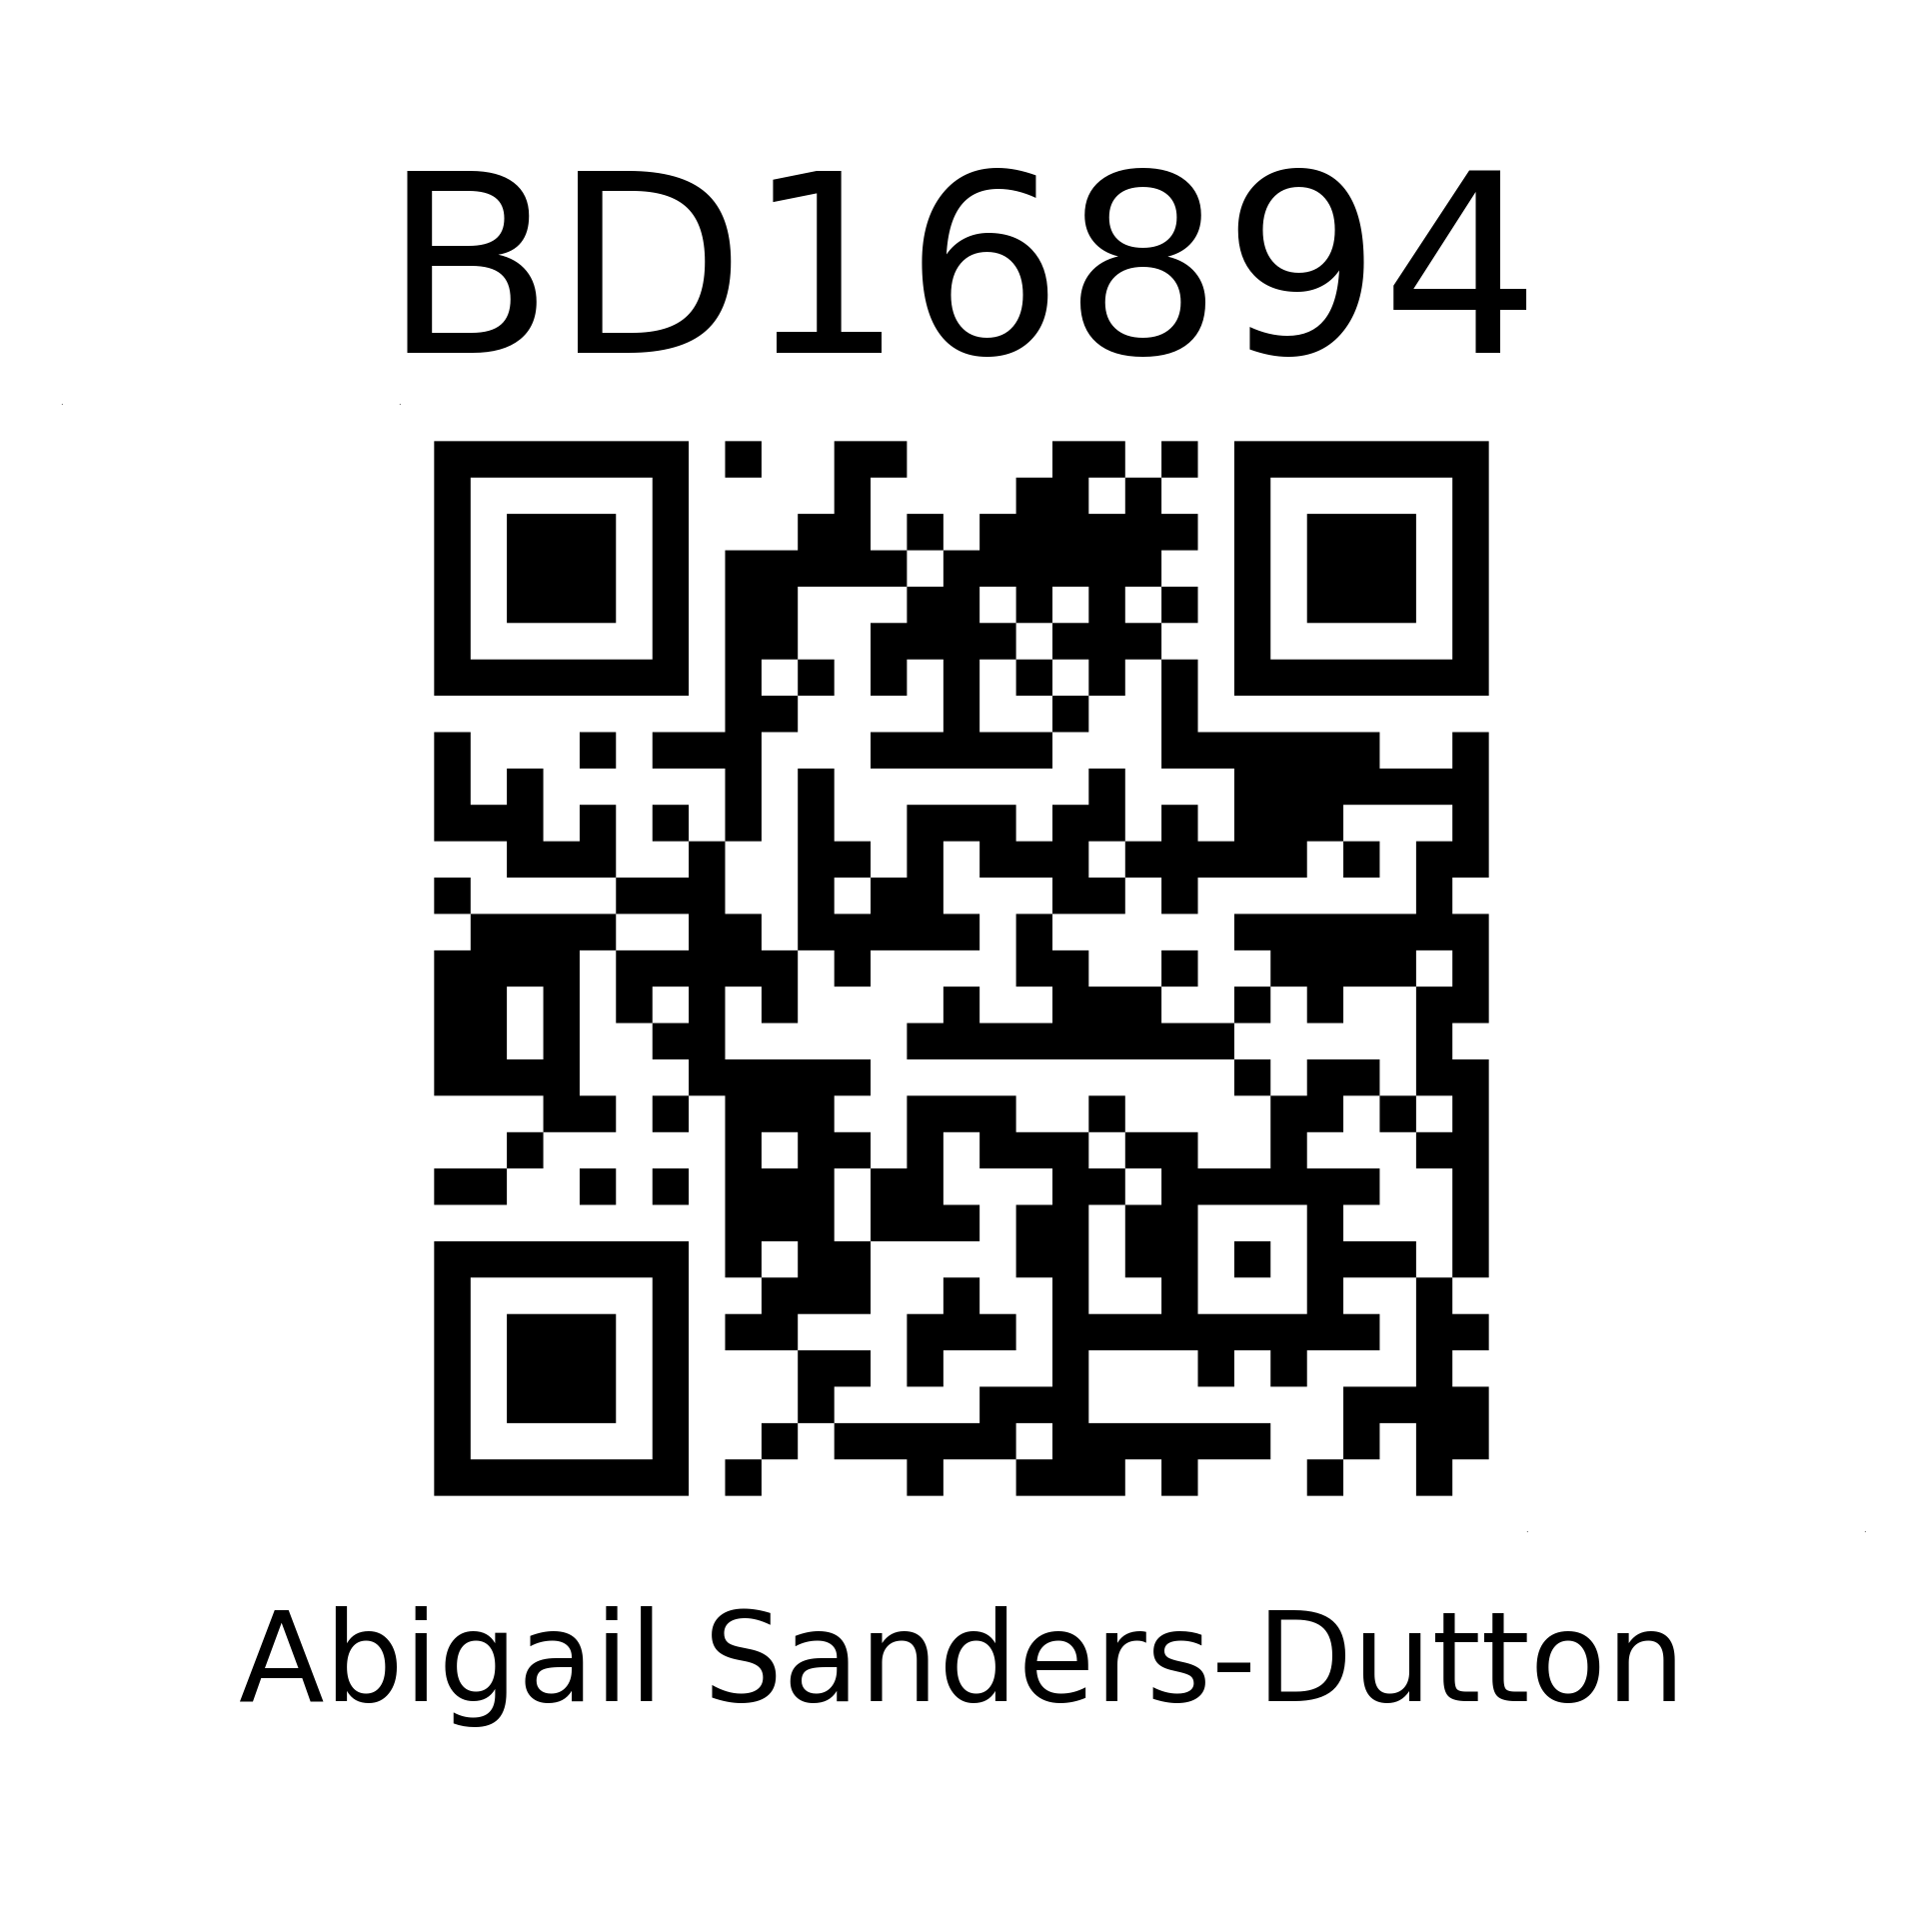

<Figure size 244.094x244.094 with 0 Axes>

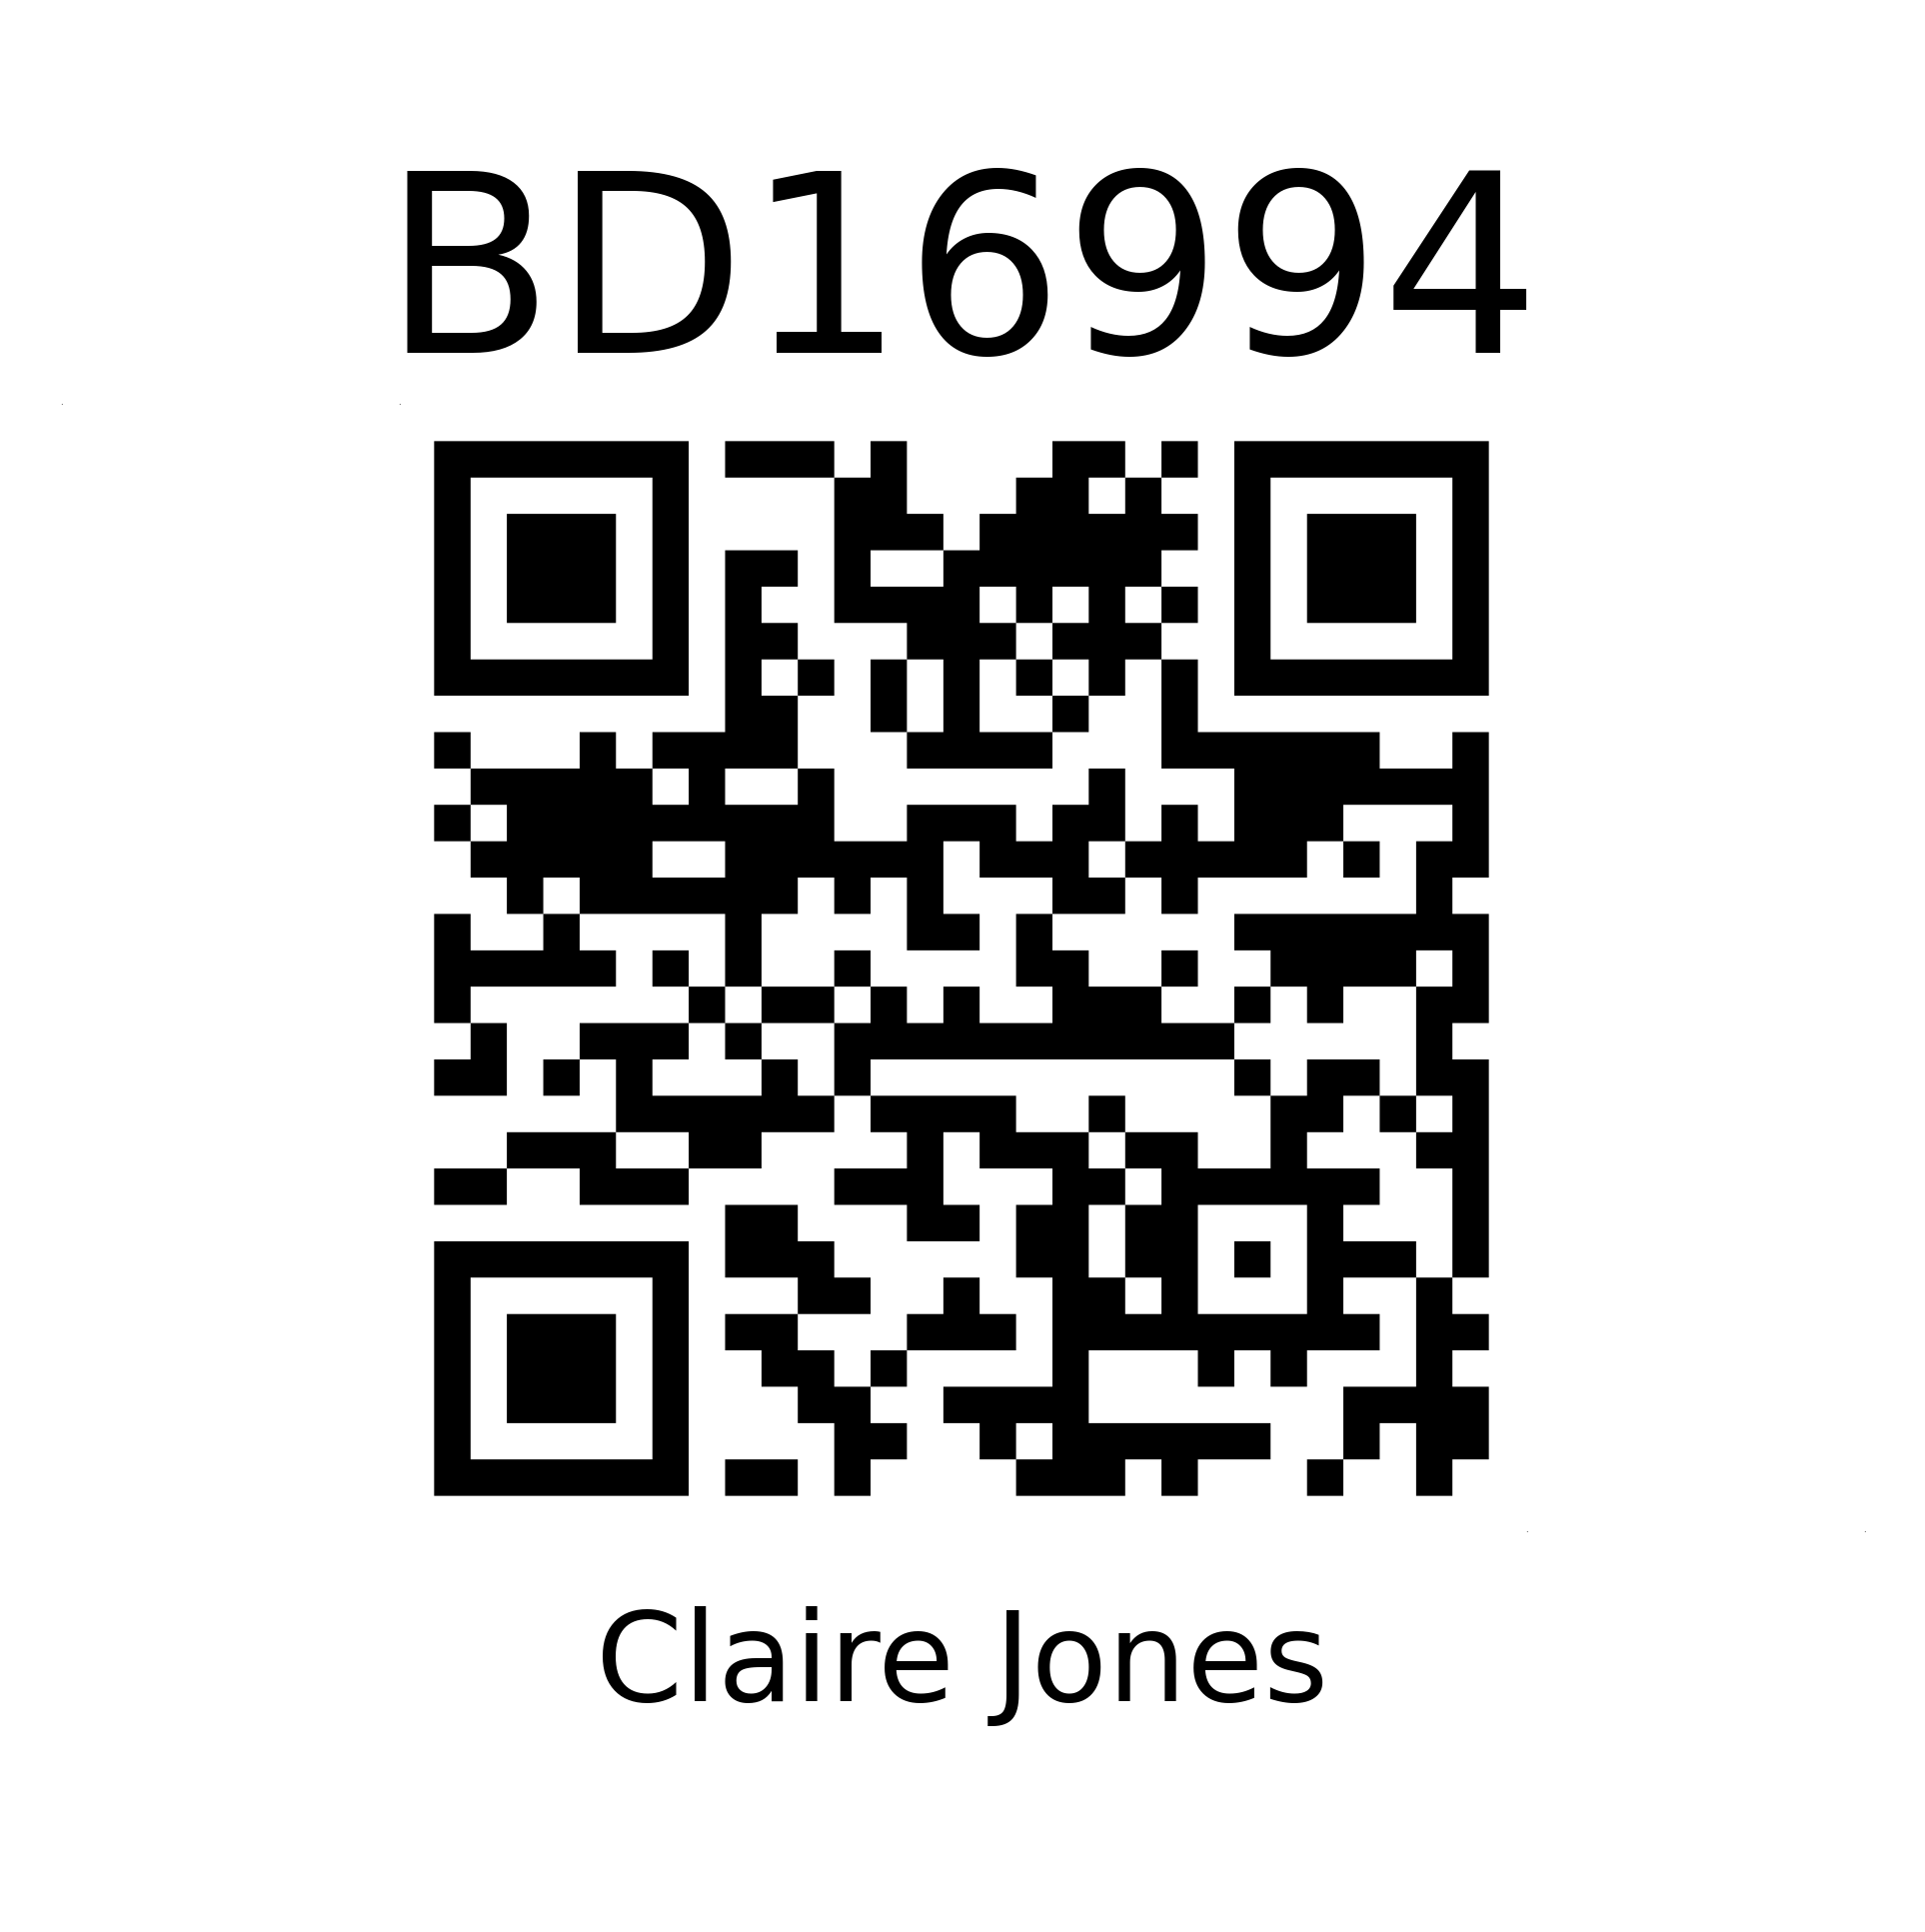

<Figure size 244.094x244.094 with 0 Axes>

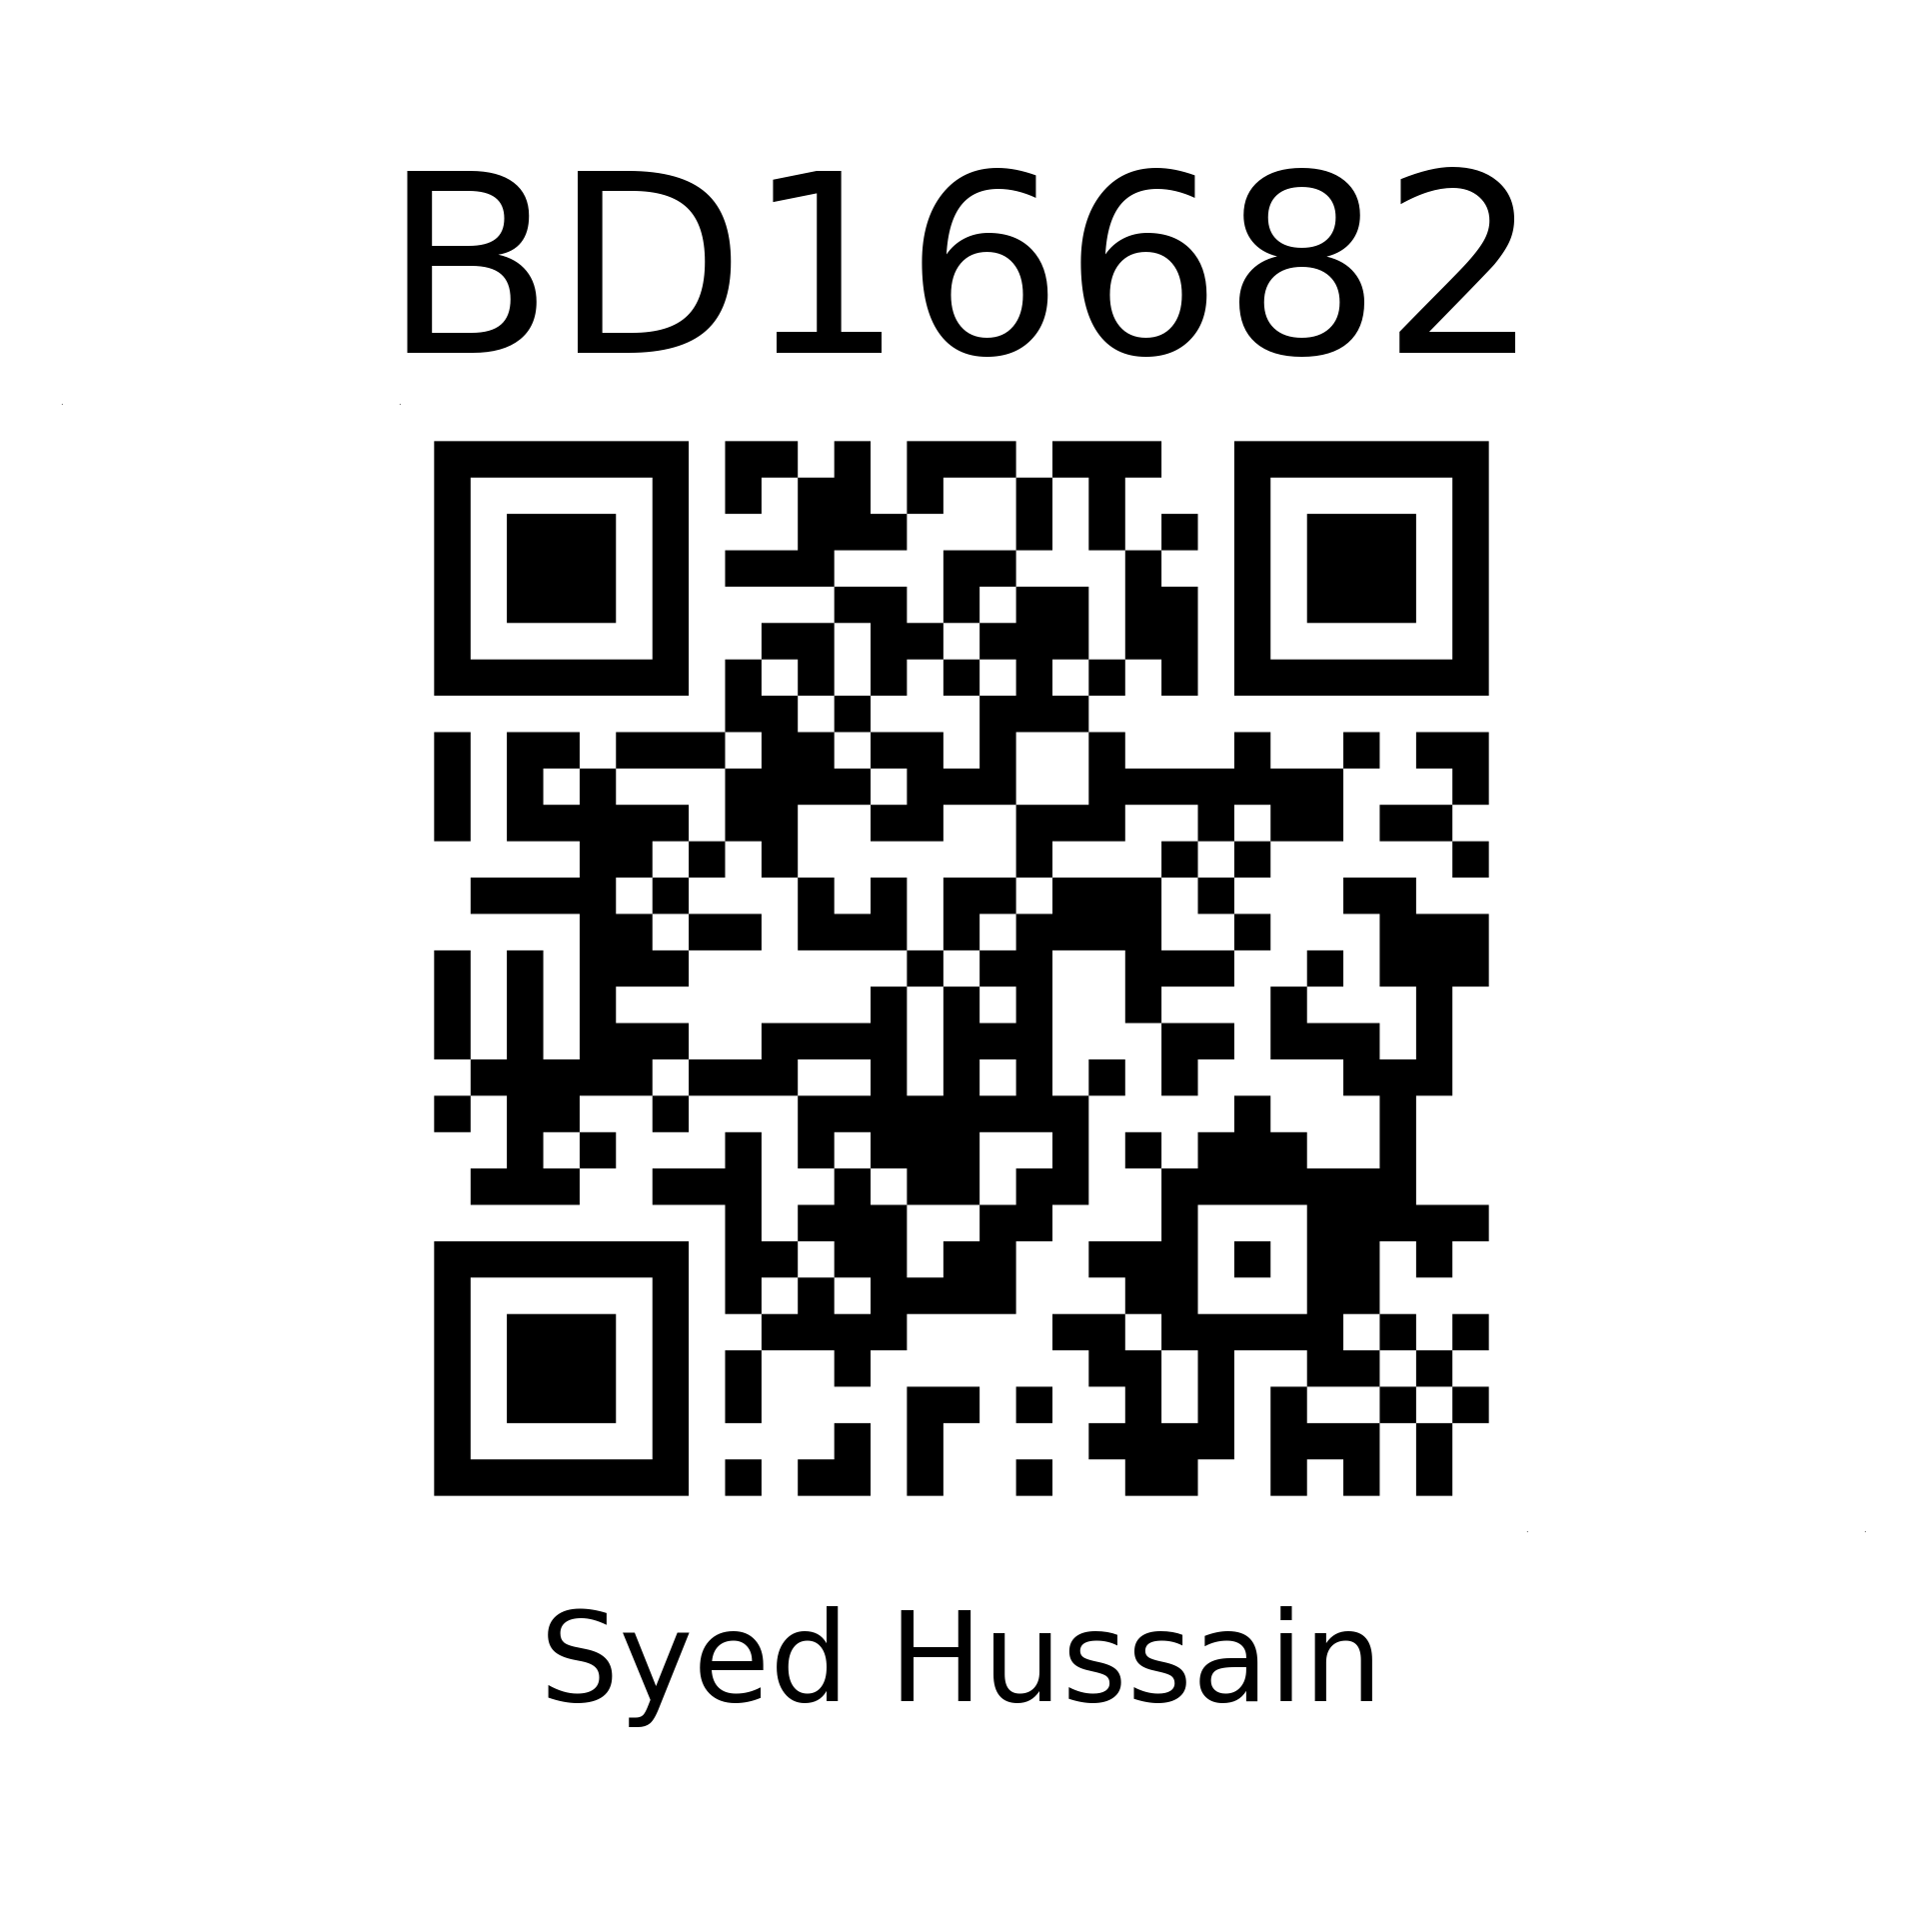

<Figure size 244.094x244.094 with 0 Axes>

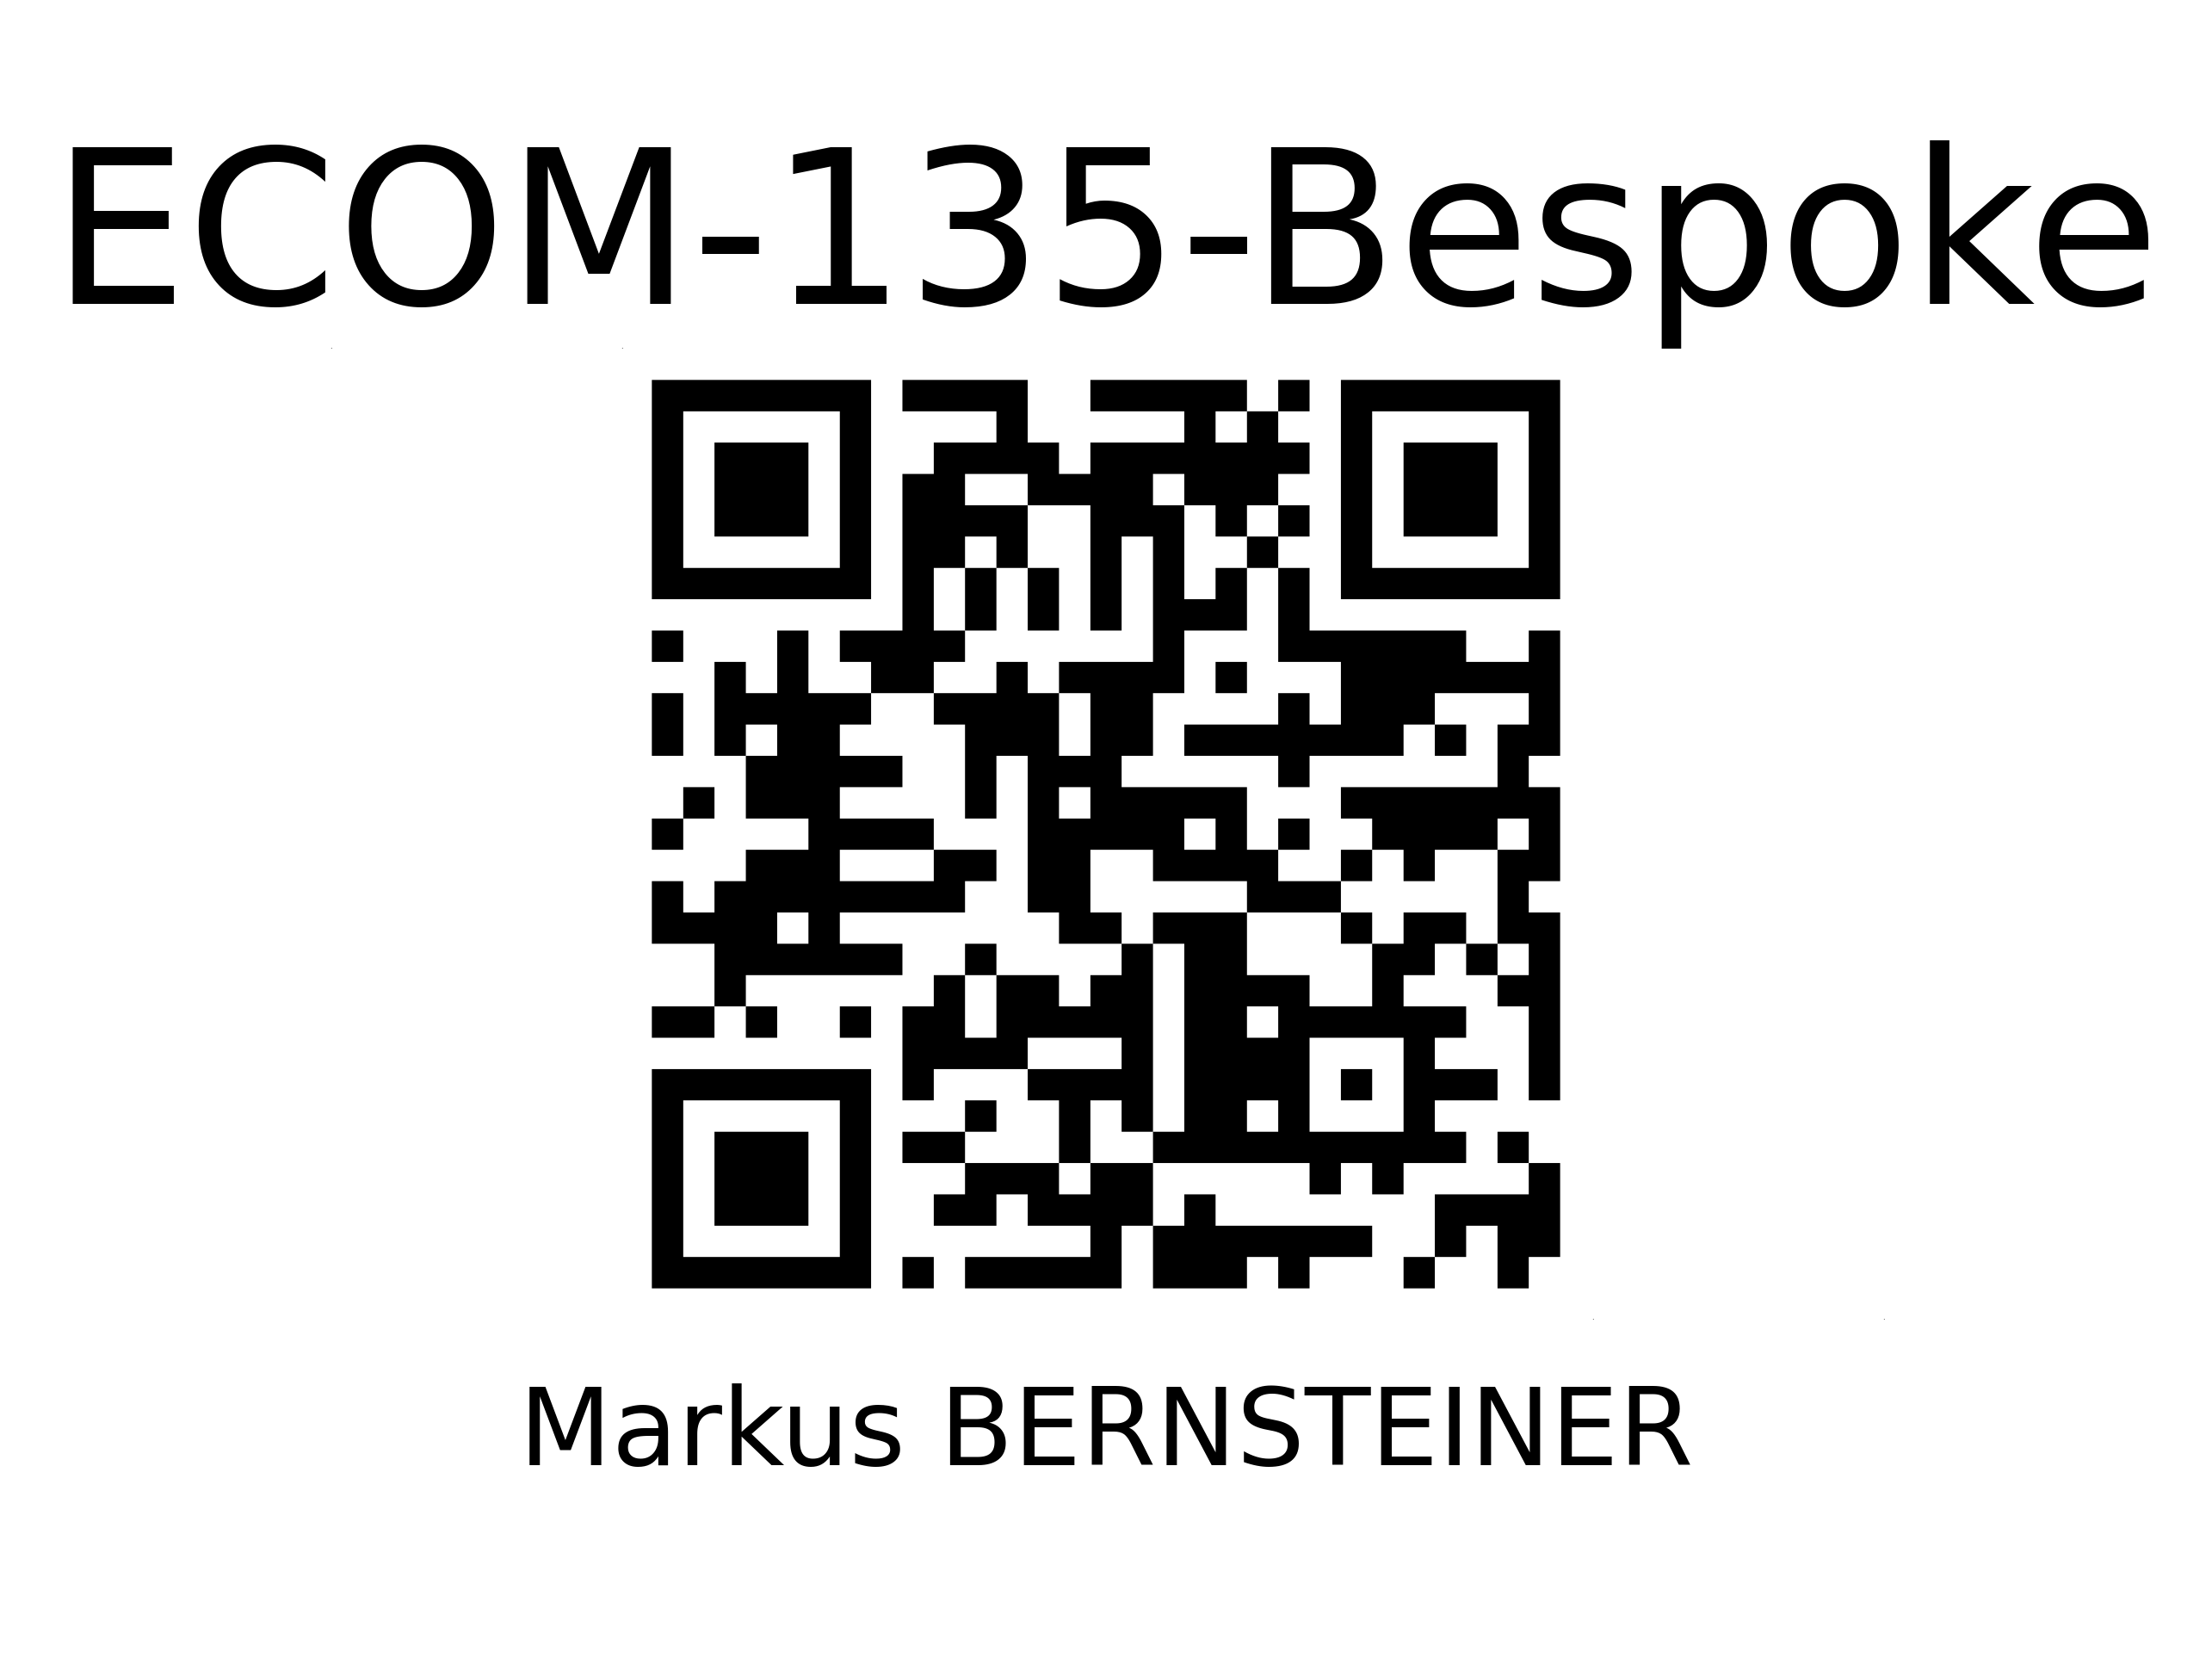

<Figure size 244.094x244.094 with 0 Axes>

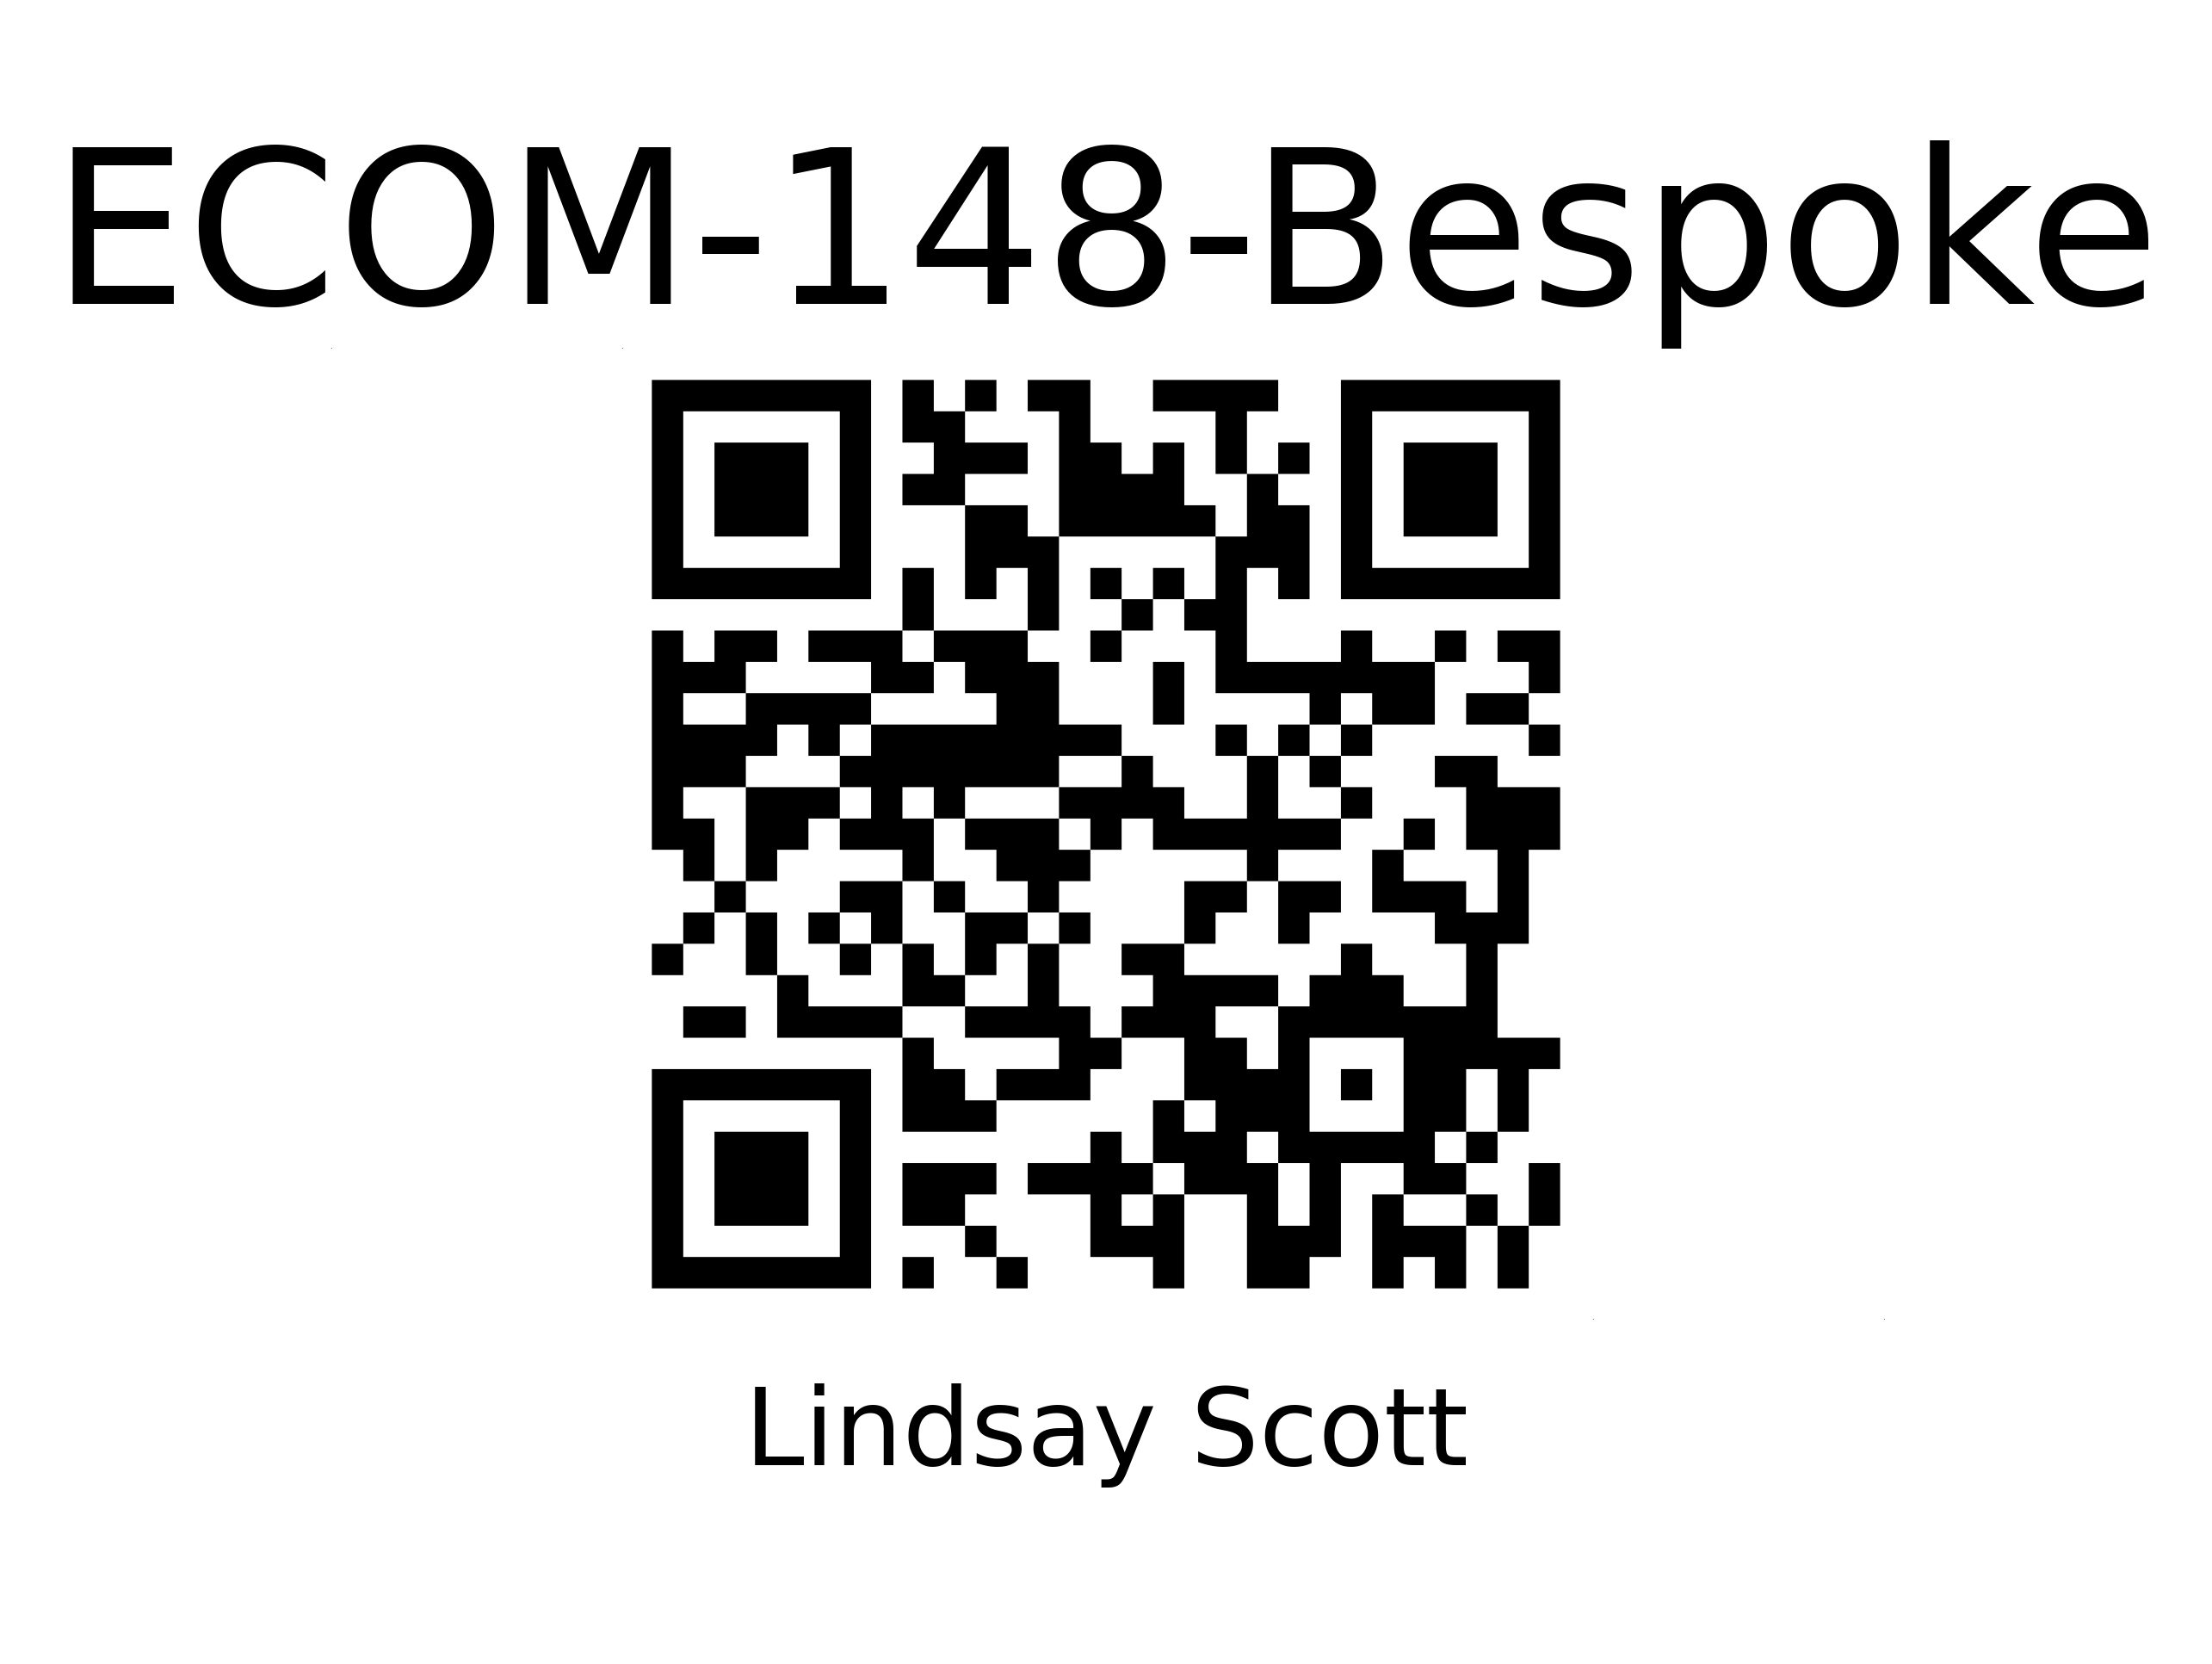

<Figure size 244.094x244.094 with 0 Axes>

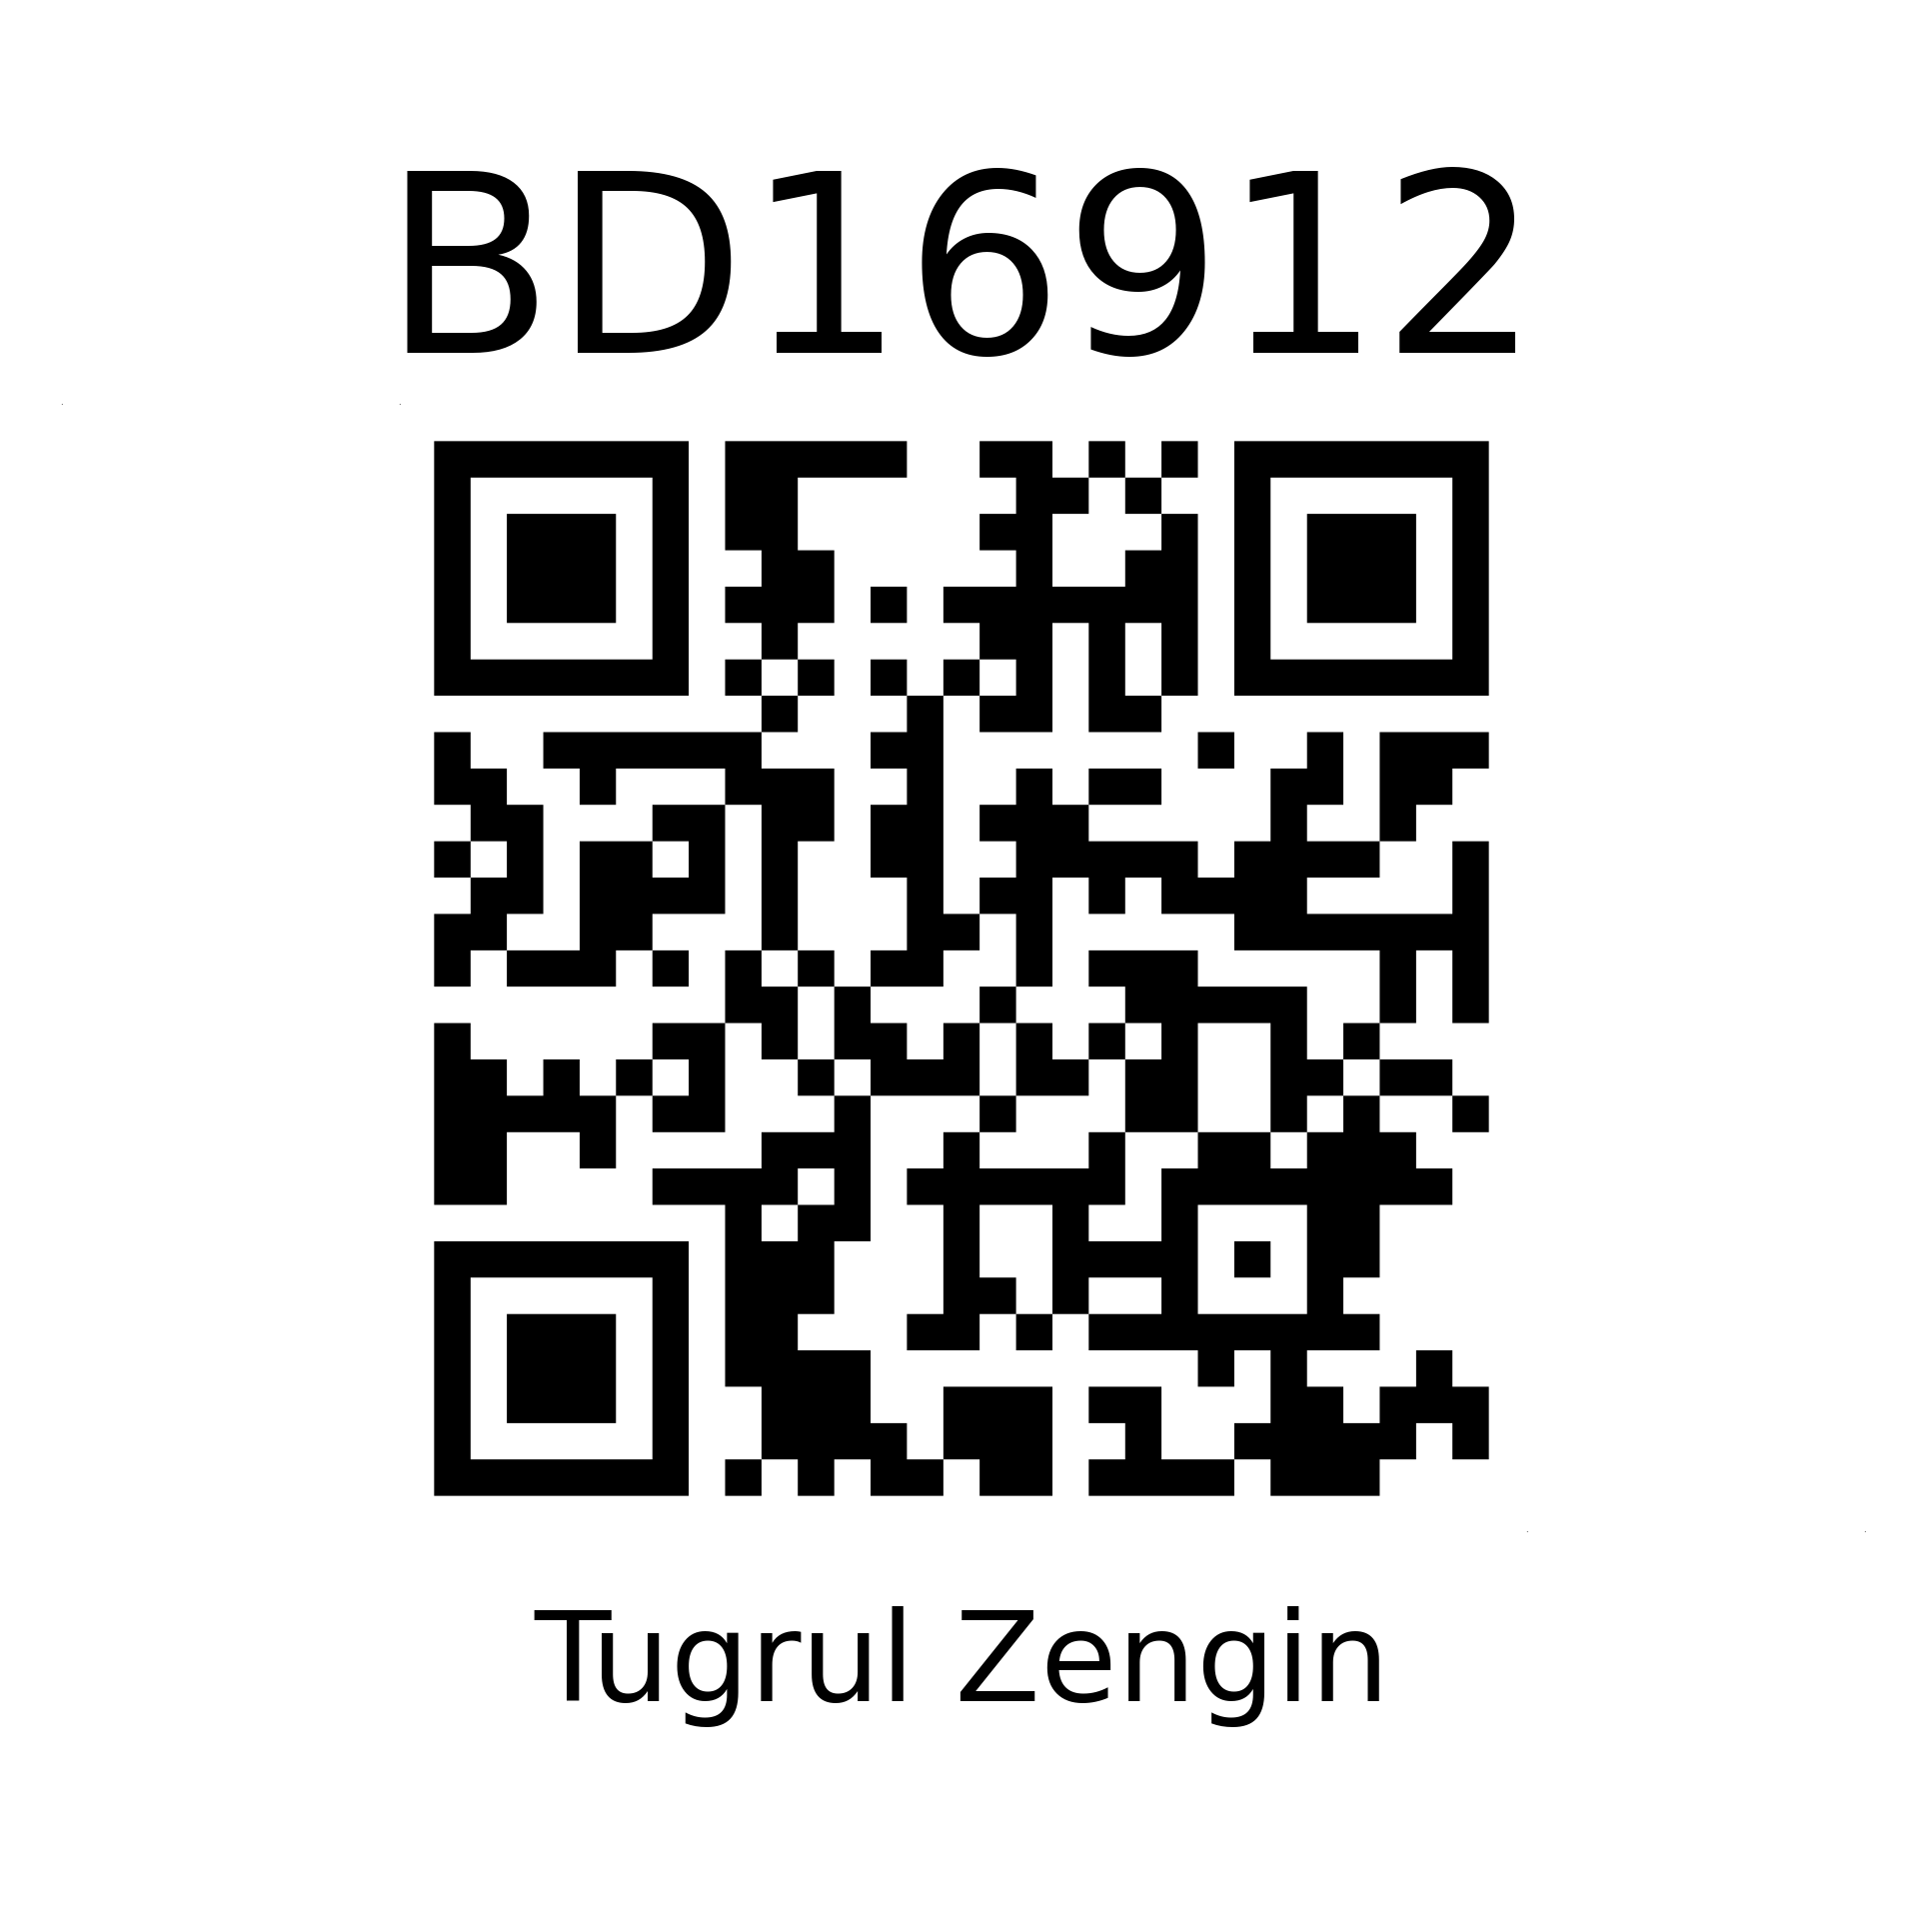

<Figure size 244.094x244.094 with 0 Axes>

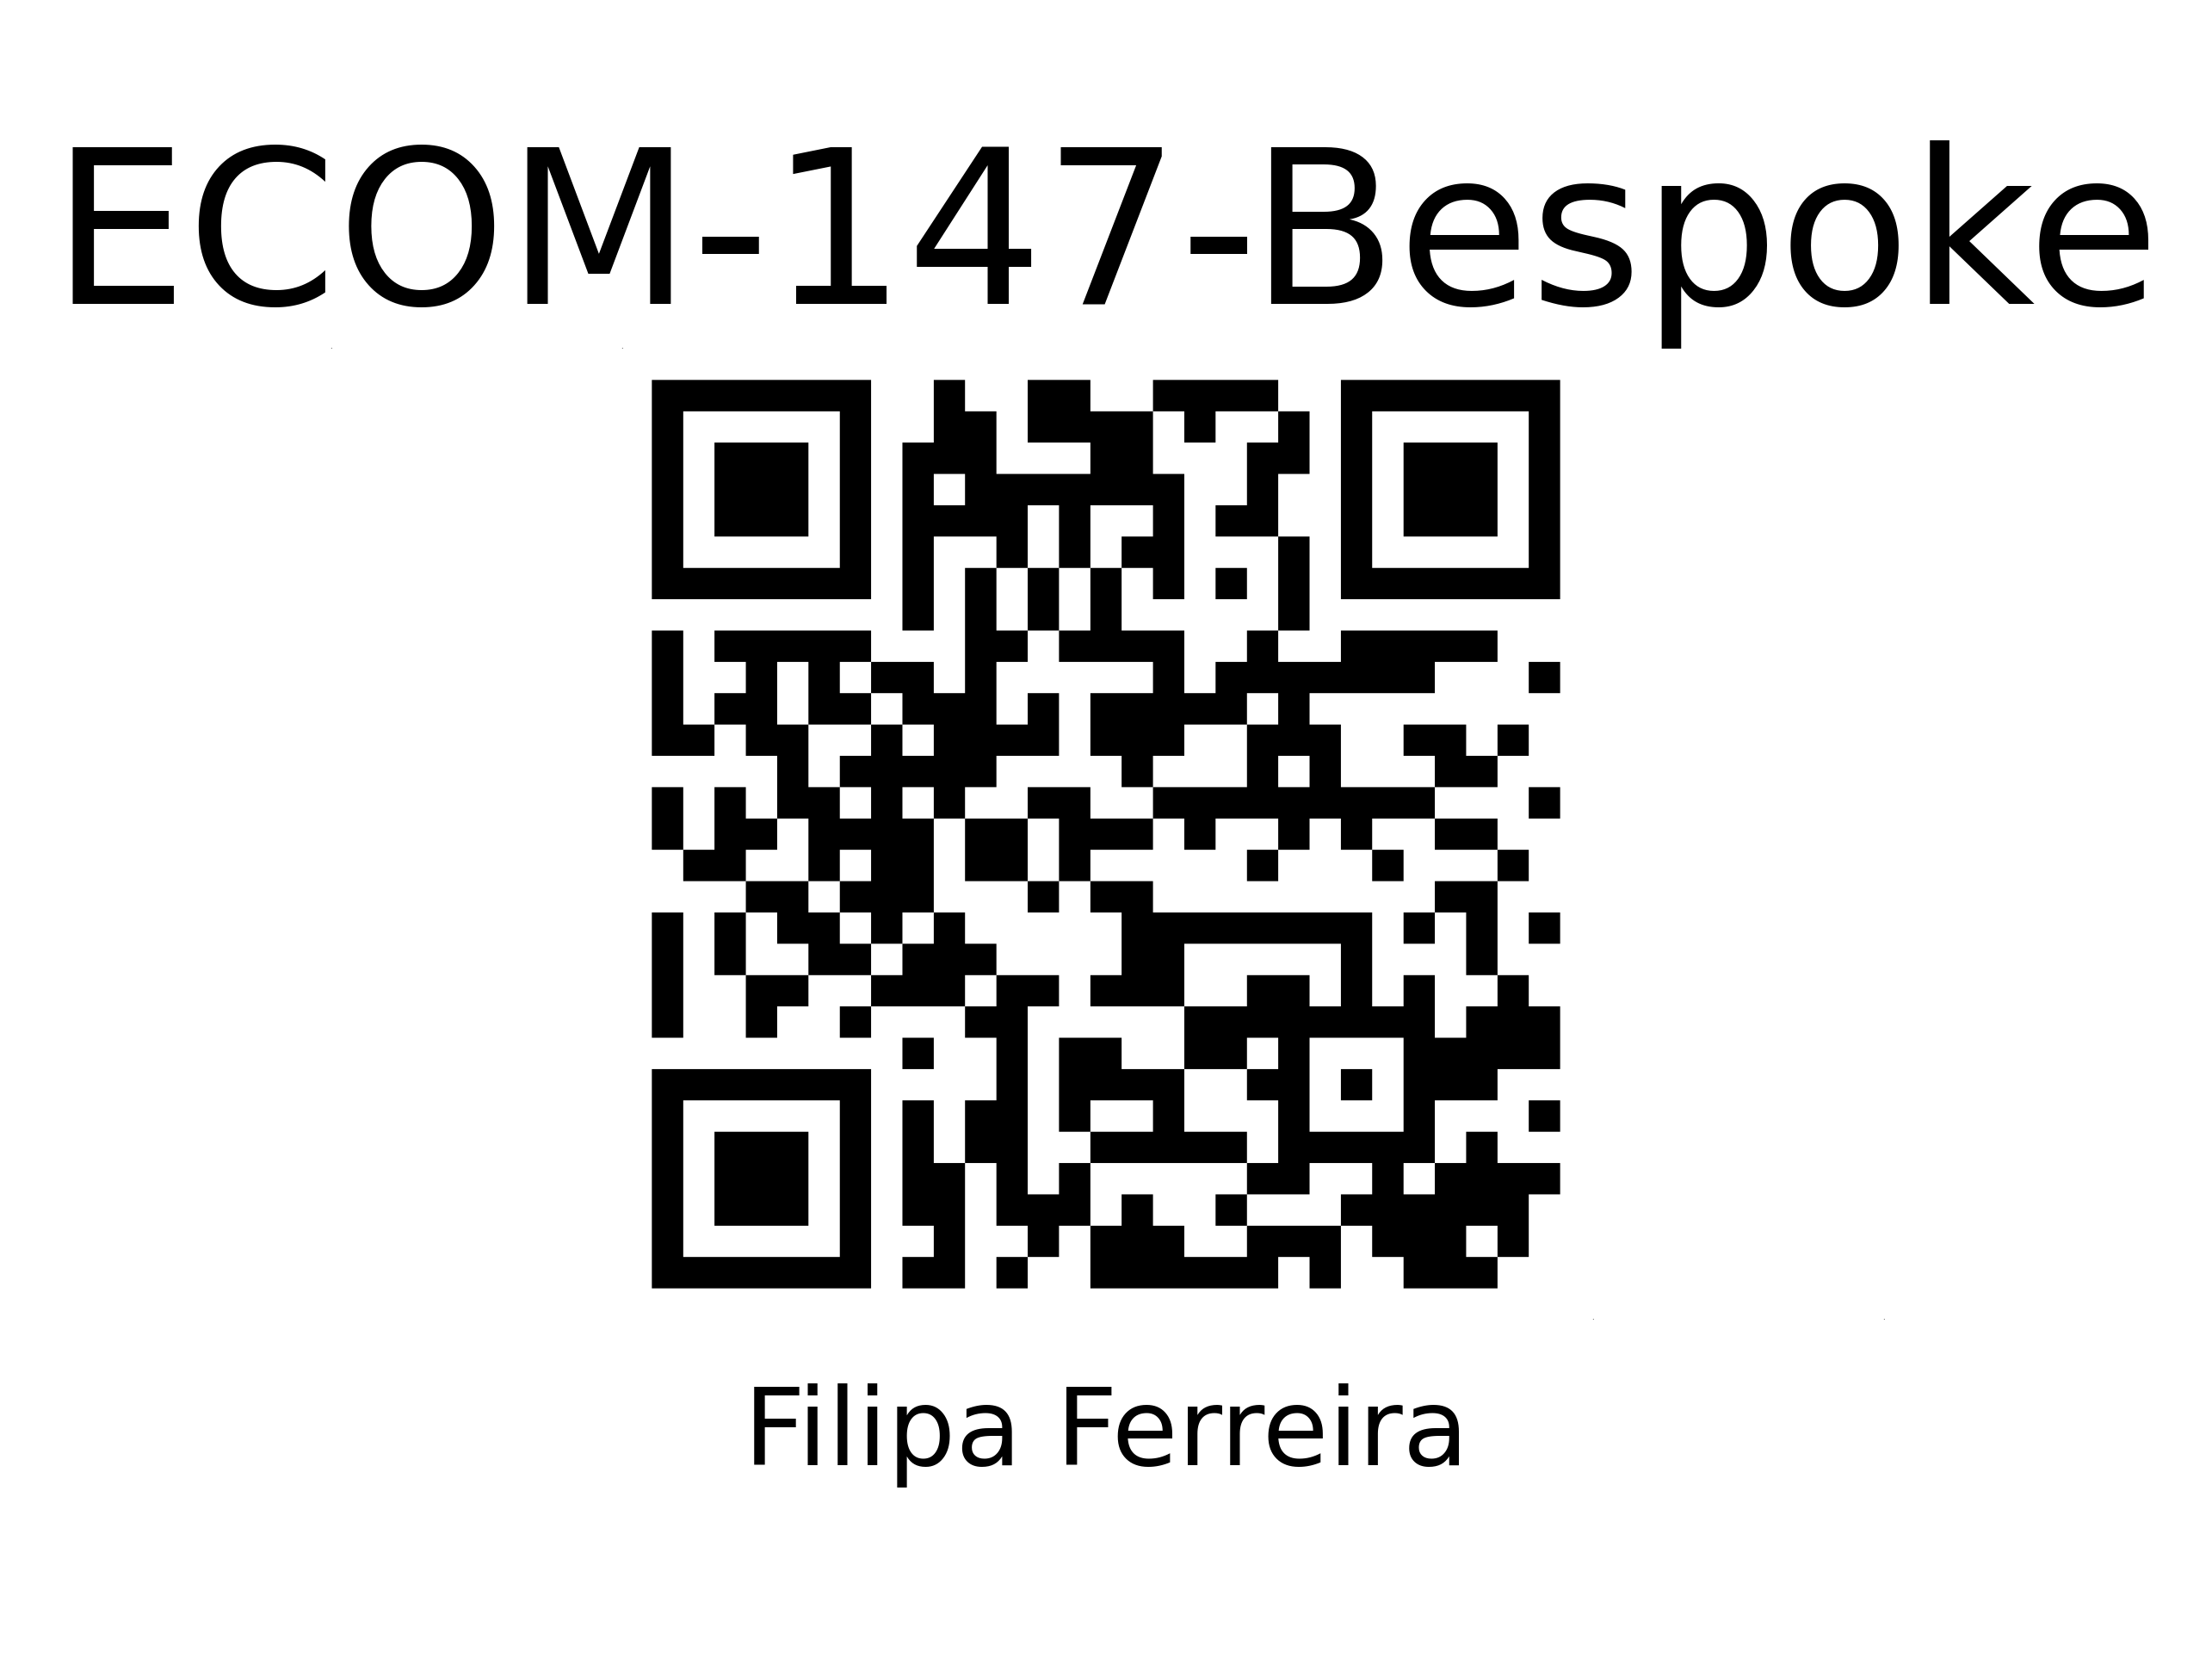

<Figure size 244.094x244.094 with 0 Axes>

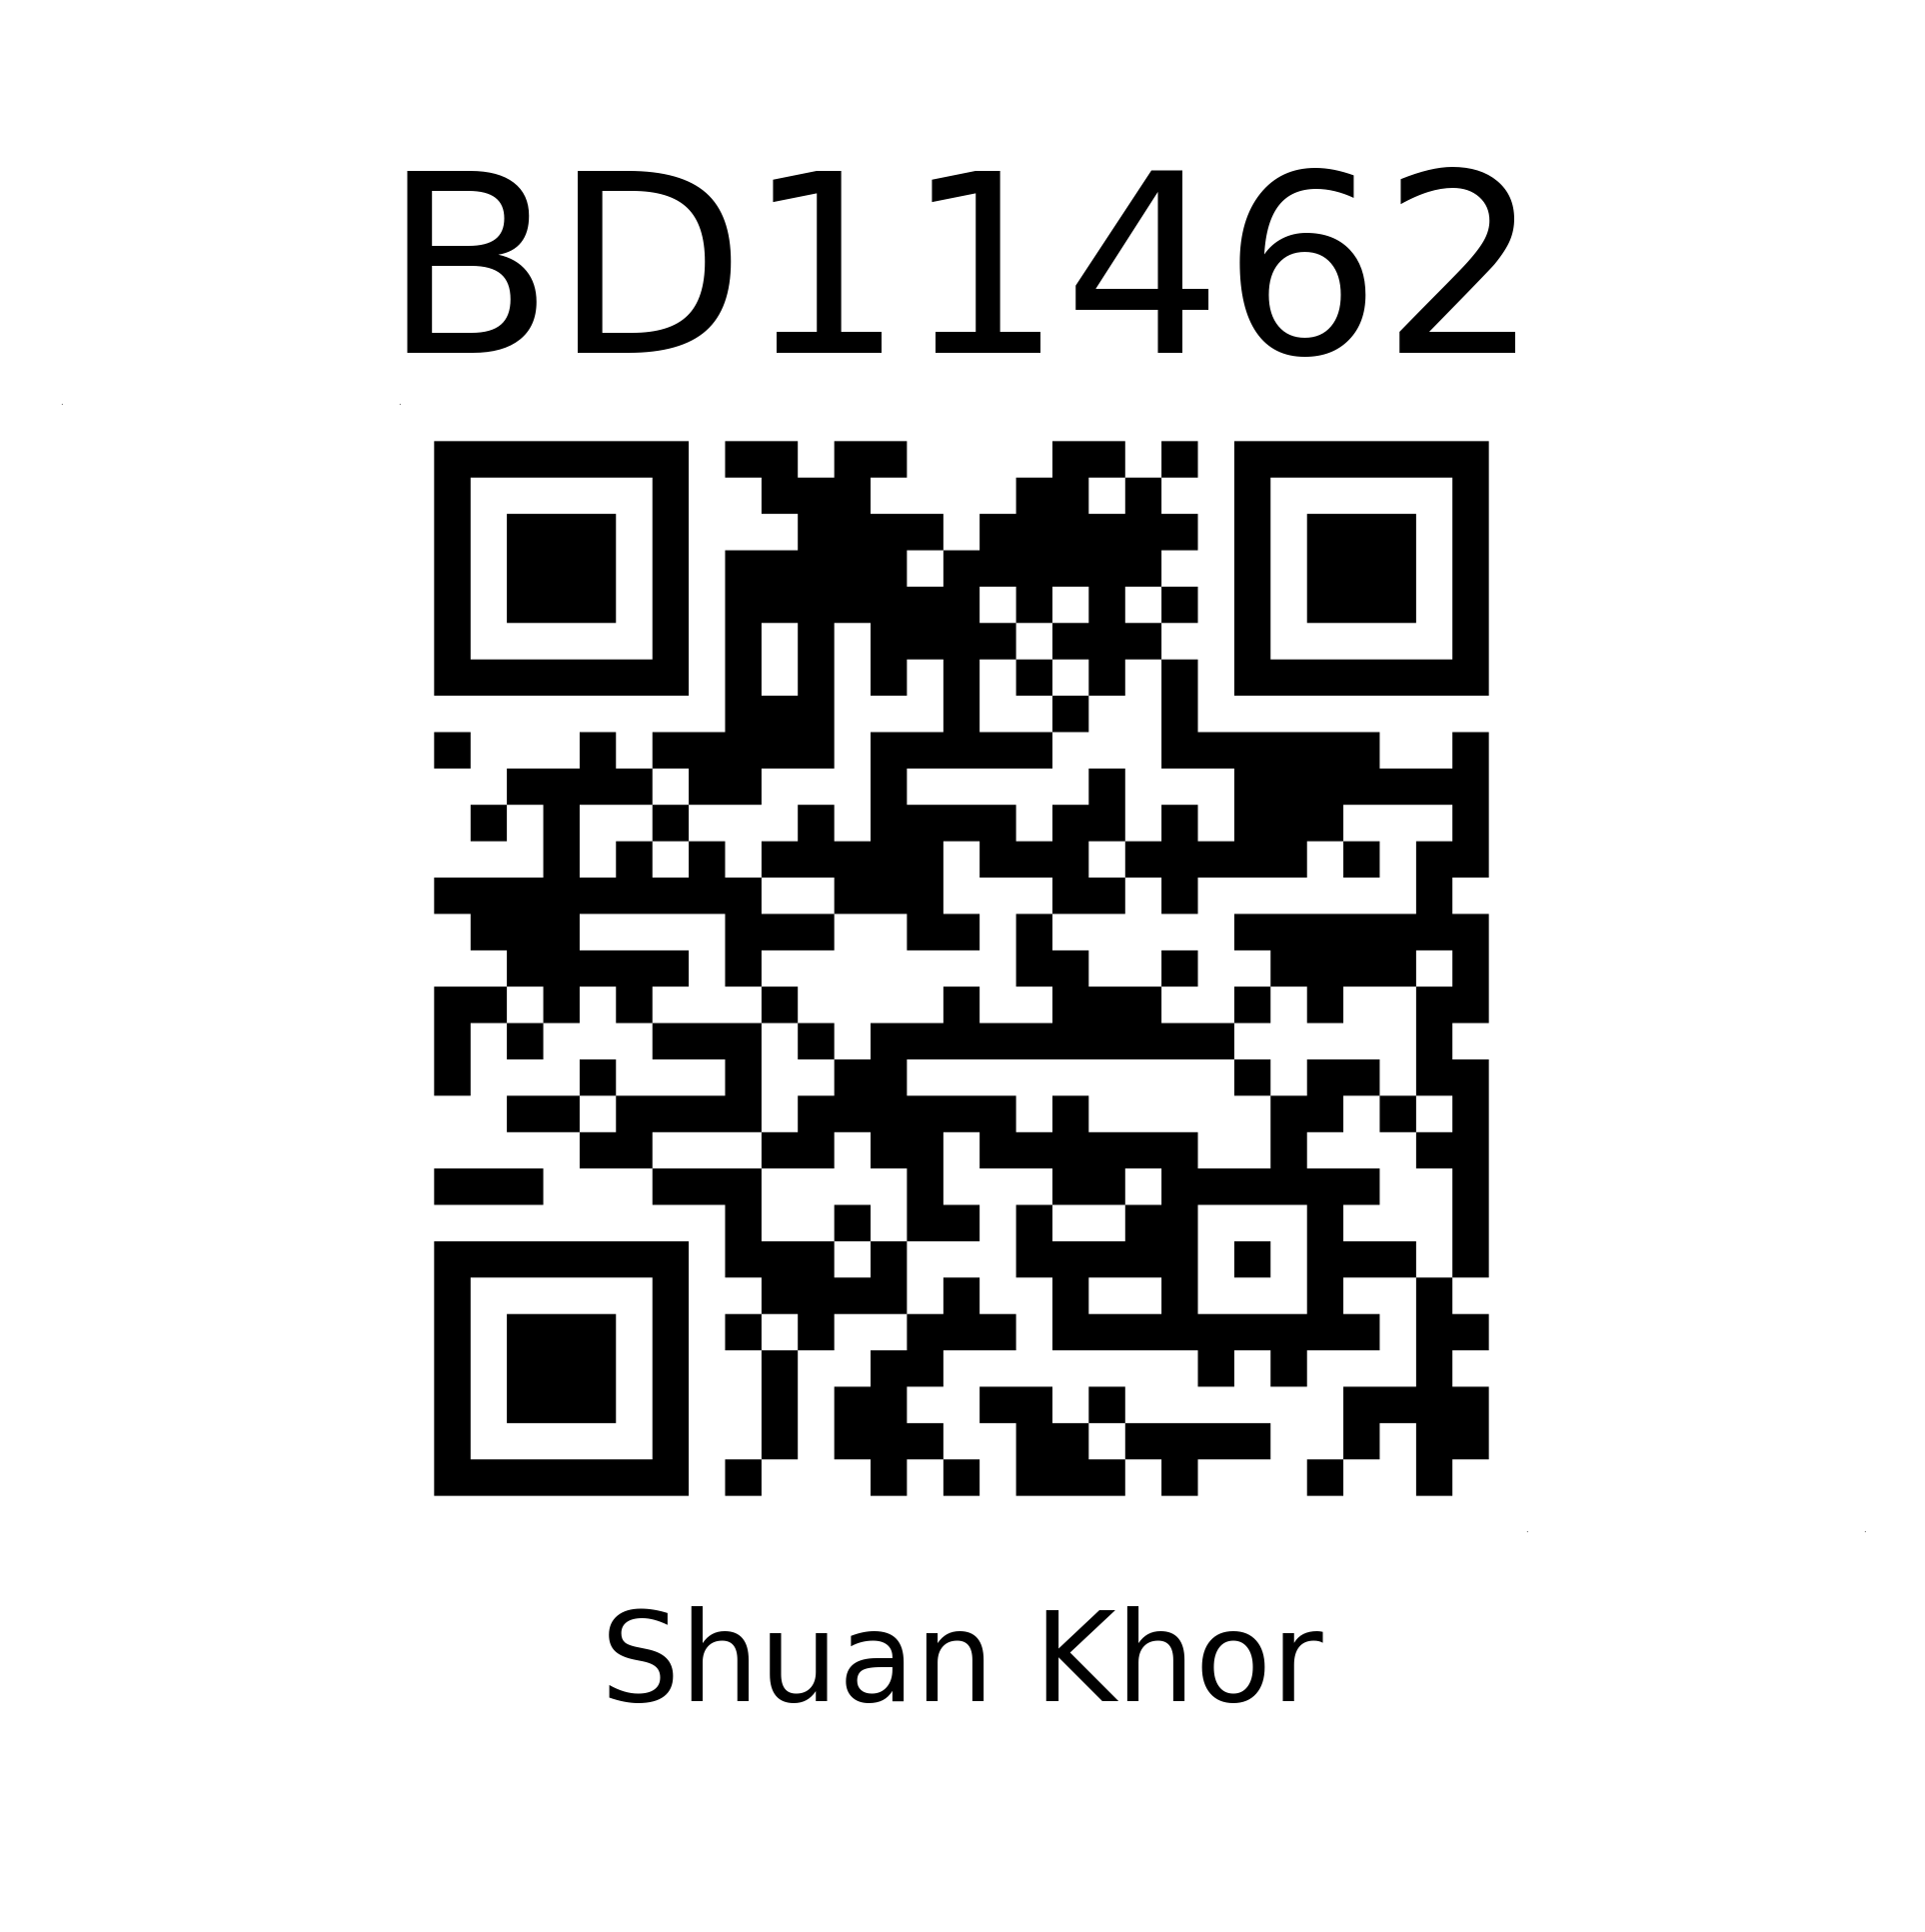

In [9]:
file_name_list = []
!rm -r {img_folder_path+'*'}
for i in range(len(df)):
    unique_id_temp = str(df[column_name_for_unique_ID].iloc[i])
    customer_name_temp = str(df[column_name_for_customer_name].iloc[i])
    if len(unique_id_temp) > 2:
        qr_code_message = url_app_0 + '/' + unique_id_temp
        qr_code_title_top = unique_id_temp
        qr_code_title_bottom = customer_name_temp
        # 
        im, filename = generate_qr_code(qr_code_message, qr_code_title_top, qr_code_title_bottom, img_folder_path, logo = False)
        file_name_list.append(filename)
        plt.show()

In [10]:
!rm -r {pdf_path+'*'}
images = [Image.open(img_folder_path + f) for f in file_name_list]
images[0].save(pdf_path, "PDF" ,resolution=resolution_dymo_w, save_all=True, append_images=images[1:])

zsh:1: no matches found: /Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/ouput_pdf/qr_codes.pdf*
